In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.43


In [3]:
import torch
from gcpds_cv_pykit.datasets import BreastCancer
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import UNet
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
BreastCancer()

Path to downloaded dataset files: /kaggle/input/breast-cancer-ss
Dataset copied to: /content/datasets/breast-cancer-ss
Could not delete original download folder '/kaggle/input/breast-cancer-ss': [Errno 30] Read-only file system: 'core_A04P_A2_patch_0066.png'


'/content/datasets/breast-cancer-ss'

In [6]:
config = {"Dir of dataset": "./datasets/breast-cancer-ss", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 3, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "patches",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "UNet", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-UNet-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Train/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 8582


Organizing masks: 100%|██████████| 8582/8582 [00:00<00:00, 33238.94it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Valid/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1074


Organizing masks: 100%|██████████| 1074/1074 [00:00<00:00, 81833.39it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/breast-cancer-ss/Test/patches
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 1072


Organizing masks: 100%|██████████| 1072/1072 [00:00<00:00, 82966.64it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 3, 256, 256])


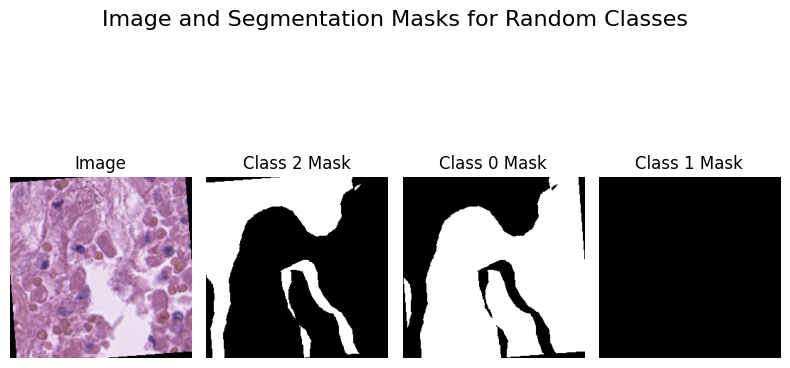

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 192MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


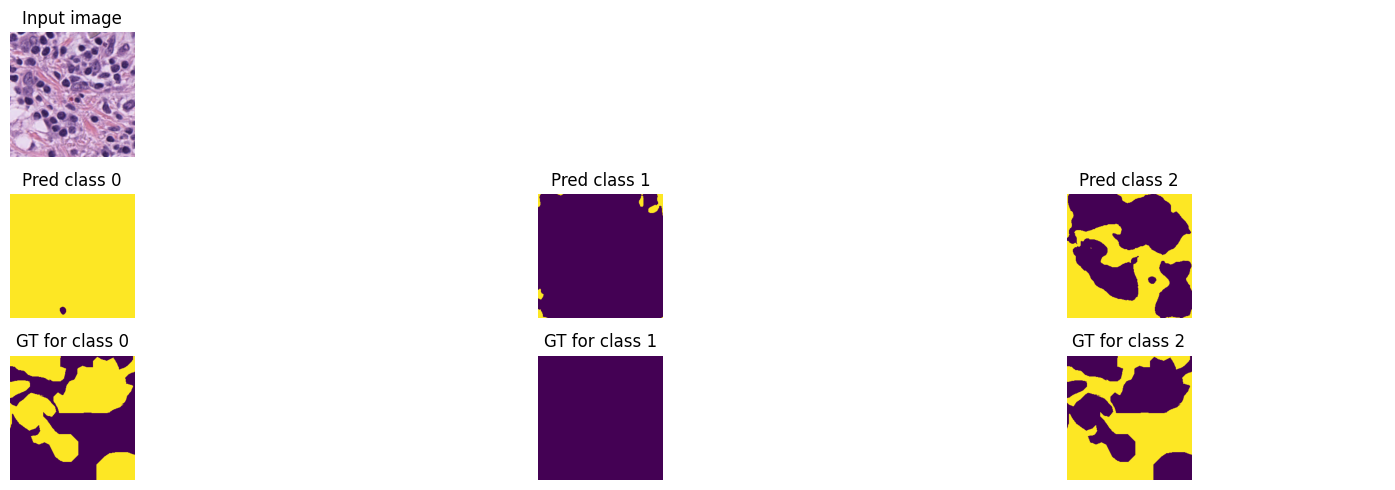

Train loss: 0.63851 | Time: 2m 8s | Val loss: 0.60563
Train_DICE_avg: 0.40476 | Train_Jaccard_avg: 0.33314 | Train_Sensitivity_avg: 0.39875 | Train_Specificity_avg: 0.81522 
Class 0 - Train_DICE: 0.30019 | Train_Jaccard: 0.23870 | Train_Sensitivity: 0.27759 | Train_Specificity: 0.87512 
Class 1 - Train_DICE: 0.47708 | Train_Jaccard: 0.40722 | Train_Sensitivity: 0.49749 | Train_Specificity: 0.76088 
Class 2 - Train_DICE: 0.43700 | Train_Jaccard: 0.35350 | Train_Sensitivity: 0.42118 | Train_Specificity: 0.80966 
Val_DICE_avg: 0.43922 | Val_Jaccard_avg: 0.37296 | Val_Sensitivity_avg: 0.40829 | Val_Specificity_avg: 0.84133 
Class 0 - Val_DICE: 0.31759 | Val_Jaccard: 0.25879 | Val_Sensitivity: 0.27619 | Val_Specificity: 0.90759 
Class 1 - Val_DICE: 0.53444 | Val_Jaccard: 0.47337 | Val_Sensitivity: 0.52518 | Val_Specificity: 0.75747 
Class 2 - Val_DICE: 0.46564 | Val_Jaccard: 0.38671 | Val_Sensitivity: 0.42351 | Val_Specificity: 0.85893 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.61123 | Time: 4m 13s | Val loss: 0.59145
Train_DICE_avg: 0.42535 | Train_Jaccard_avg: 0.35523 | Train_Sensitivity_avg: 0.40388 | Train_Specificity_avg: 0.83981 
Class 0 - Train_DICE: 0.31341 | Train_Jaccard: 0.25222 | Train_Sensitivity: 0.28338 | Train_Specificity: 0.88899 
Class 1 - Train_DICE: 0.50616 | Train_Jaccard: 0.43948 | Train_Sensitivity: 0.50319 | Train_Specificity: 0.79400 
Class 2 - Train_DICE: 0.45647 | Train_Jaccard: 0.37397 | Train_Sensitivity: 0.42508 | Train_Specificity: 0.83643 
Val_DICE_avg: 0.44235 | Val_Jaccard_avg: 0.37692 | Val_Sensitivity_avg: 0.40555 | Val_Specificity_avg: 0.85014 
Class 0 - Val_DICE: 0.31836 | Val_Jaccard: 0.25959 | Val_Sensitivity: 0.27729 | Val_Specificity: 0.90201 
Class 1 - Val_DICE: 0.53648 | Val_Jaccard: 0.47791 | Val_Sensitivity: 0.51192 | Val_Specificity: 0.78952 
Class 2 - Val_DICE: 0.47222 | Val_Jaccard: 0.39328 | Val_Sensitivity: 0.42745 | Val_Specificity: 0.85888 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.59903 | Time: 6m 19s | Val loss: 0.58284
Train_DICE_avg: 0.42930 | Train_Jaccard_avg: 0.35994 | Train_Sensitivity_avg: 0.40327 | Train_Specificity_avg: 0.85076 
Class 0 - Train_DICE: 0.31599 | Train_Jaccard: 0.25515 | Train_Sensitivity: 0.28320 | Train_Specificity: 0.89644 
Class 1 - Train_DICE: 0.51038 | Train_Jaccard: 0.44502 | Train_Sensitivity: 0.50200 | Train_Specificity: 0.80850 
Class 2 - Train_DICE: 0.46154 | Train_Jaccard: 0.37963 | Train_Sensitivity: 0.42461 | Train_Specificity: 0.84732 
Val_DICE_avg: 0.44467 | Val_Jaccard_avg: 0.37935 | Val_Sensitivity_avg: 0.40902 | Val_Specificity_avg: 0.85422 
Class 0 - Val_DICE: 0.32165 | Val_Jaccard: 0.26242 | Val_Sensitivity: 0.28639 | Val_Specificity: 0.89193 
Class 1 - Val_DICE: 0.53922 | Val_Jaccard: 0.48096 | Val_Sensitivity: 0.50666 | Val_Specificity: 0.80605 
Class 2 - Val_DICE: 0.47314 | Val_Jaccard: 0.39468 | Val_Sensitivity: 0.43402 | Val_Specificity: 0.86468 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.59089 | Time: 8m 24s | Val loss: 0.57584
Train_DICE_avg: 0.43206 | Train_Jaccard_avg: 0.36302 | Train_Sensitivity_avg: 0.40450 | Train_Specificity_avg: 0.85469 
Class 0 - Train_DICE: 0.31830 | Train_Jaccard: 0.25729 | Train_Sensitivity: 0.28397 | Train_Specificity: 0.89849 
Class 1 - Train_DICE: 0.51366 | Train_Jaccard: 0.44881 | Train_Sensitivity: 0.50286 | Train_Specificity: 0.81287 
Class 2 - Train_DICE: 0.46422 | Train_Jaccard: 0.38297 | Train_Sensitivity: 0.42665 | Train_Specificity: 0.85272 
Val_DICE_avg: 0.44513 | Val_Jaccard_avg: 0.37987 | Val_Sensitivity_avg: 0.40877 | Val_Specificity_avg: 0.86494 
Class 0 - Val_DICE: 0.32847 | Val_Jaccard: 0.26896 | Val_Sensitivity: 0.28899 | Val_Specificity: 0.89901 
Class 1 - Val_DICE: 0.52704 | Val_Jaccard: 0.46978 | Val_Sensitivity: 0.48412 | Val_Specificity: 0.85032 
Class 2 - Val_DICE: 0.47989 | Val_Jaccard: 0.40087 | Val_Sensitivity: 0.45319 | Val_Specificity: 0.84550 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.58429 | Time: 10m 30s | Val loss: 0.57021
Train_DICE_avg: 0.43454 | Train_Jaccard_avg: 0.36585 | Train_Sensitivity_avg: 0.40572 | Train_Specificity_avg: 0.85785 
Class 0 - Train_DICE: 0.32046 | Train_Jaccard: 0.25937 | Train_Sensitivity: 0.28676 | Train_Specificity: 0.89644 
Class 1 - Train_DICE: 0.51620 | Train_Jaccard: 0.45222 | Train_Sensitivity: 0.50286 | Train_Specificity: 0.81863 
Class 2 - Train_DICE: 0.46696 | Train_Jaccard: 0.38596 | Train_Sensitivity: 0.42754 | Train_Specificity: 0.85848 
Val_DICE_avg: 0.44864 | Val_Jaccard_avg: 0.38362 | Val_Sensitivity_avg: 0.41458 | Val_Specificity_avg: 0.86820 
Class 0 - Val_DICE: 0.33226 | Val_Jaccard: 0.27229 | Val_Sensitivity: 0.29638 | Val_Specificity: 0.88995 
Class 1 - Val_DICE: 0.53152 | Val_Jaccard: 0.47529 | Val_Sensitivity: 0.48785 | Val_Specificity: 0.87163 
Class 2 - Val_DICE: 0.48213 | Val_Jaccard: 0.40327 | Val_Sensitivity: 0.45952 | Val_Specificity: 0.84303 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


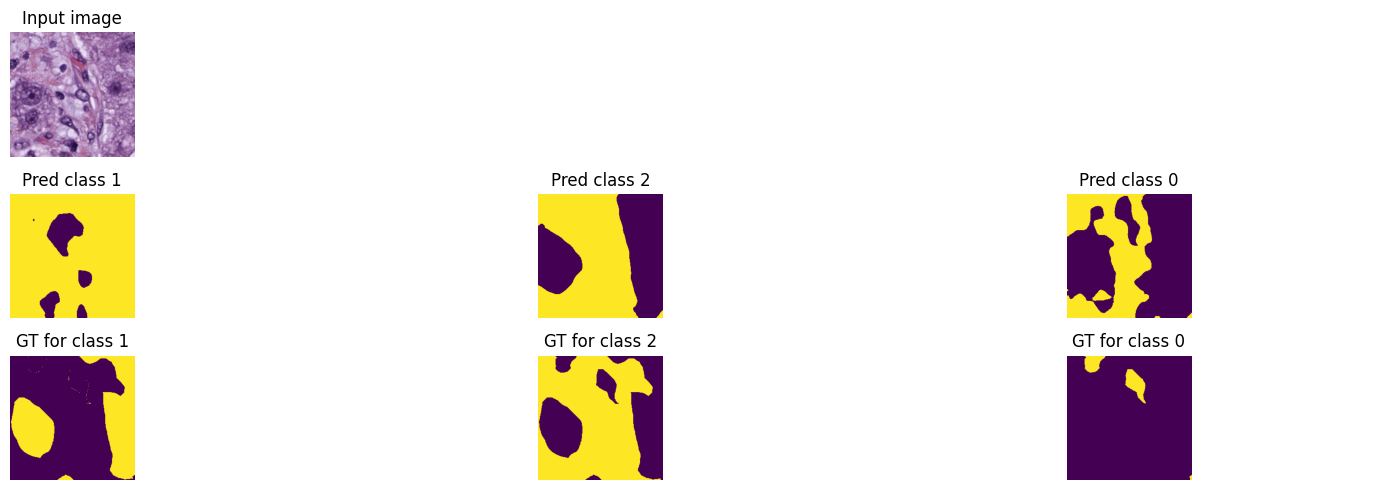

Train loss: 0.57921 | Time: 12m 36s | Val loss: 0.56525
Train_DICE_avg: 0.43674 | Train_Jaccard_avg: 0.36837 | Train_Sensitivity_avg: 0.40831 | Train_Specificity_avg: 0.86227 
Class 0 - Train_DICE: 0.32191 | Train_Jaccard: 0.26090 | Train_Sensitivity: 0.28898 | Train_Specificity: 0.89939 
Class 1 - Train_DICE: 0.51918 | Train_Jaccard: 0.45584 | Train_Sensitivity: 0.50561 | Train_Specificity: 0.82664 
Class 2 - Train_DICE: 0.46911 | Train_Jaccard: 0.38836 | Train_Sensitivity: 0.43035 | Train_Specificity: 0.86078 
Val_DICE_avg: 0.45144 | Val_Jaccard_avg: 0.38660 | Val_Sensitivity_avg: 0.41590 | Val_Specificity_avg: 0.87237 
Class 0 - Val_DICE: 0.33067 | Val_Jaccard: 0.27137 | Val_Sensitivity: 0.29096 | Val_Specificity: 0.89769 
Class 1 - Val_DICE: 0.53889 | Val_Jaccard: 0.48242 | Val_Sensitivity: 0.49636 | Val_Specificity: 0.87909 
Class 2 - Val_DICE: 0.48476 | Val_Jaccard: 0.40602 | Val_Sensitivity: 0.46039 | Val_Specificity: 0.84034 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.57497 | Time: 14m 42s | Val loss: 0.56332
Train_DICE_avg: 0.44035 | Train_Jaccard_avg: 0.37232 | Train_Sensitivity_avg: 0.41243 | Train_Specificity_avg: 0.86566 
Class 0 - Train_DICE: 0.32452 | Train_Jaccard: 0.26347 | Train_Sensitivity: 0.29202 | Train_Specificity: 0.90102 
Class 1 - Train_DICE: 0.52480 | Train_Jaccard: 0.46194 | Train_Sensitivity: 0.51161 | Train_Specificity: 0.83193 
Class 2 - Train_DICE: 0.47172 | Train_Jaccard: 0.39154 | Train_Sensitivity: 0.43367 | Train_Specificity: 0.86404 
Val_DICE_avg: 0.45281 | Val_Jaccard_avg: 0.38825 | Val_Sensitivity_avg: 0.42086 | Val_Specificity_avg: 0.86966 
Class 0 - Val_DICE: 0.33394 | Val_Jaccard: 0.27406 | Val_Sensitivity: 0.29999 | Val_Specificity: 0.88861 
Class 1 - Val_DICE: 0.53929 | Val_Jaccard: 0.48360 | Val_Sensitivity: 0.49760 | Val_Specificity: 0.88342 
Class 2 - Val_DICE: 0.48519 | Val_Jaccard: 0.40708 | Val_Sensitivity: 0.46498 | Val_Specificity: 0.83695 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.57182 | Time: 16m 48s | Val loss: 0.56114
Train_DICE_avg: 0.44108 | Train_Jaccard_avg: 0.37280 | Train_Sensitivity_avg: 0.41330 | Train_Specificity_avg: 0.86404 
Class 0 - Train_DICE: 0.32596 | Train_Jaccard: 0.26468 | Train_Sensitivity: 0.29467 | Train_Specificity: 0.89870 
Class 1 - Train_DICE: 0.52431 | Train_Jaccard: 0.46129 | Train_Sensitivity: 0.51070 | Train_Specificity: 0.83183 
Class 2 - Train_DICE: 0.47296 | Train_Jaccard: 0.39244 | Train_Sensitivity: 0.43454 | Train_Specificity: 0.86158 
Val_DICE_avg: 0.45376 | Val_Jaccard_avg: 0.38906 | Val_Sensitivity_avg: 0.42283 | Val_Specificity_avg: 0.87217 
Class 0 - Val_DICE: 0.33945 | Val_Jaccard: 0.27908 | Val_Sensitivity: 0.30745 | Val_Specificity: 0.88174 
Class 1 - Val_DICE: 0.53541 | Val_Jaccard: 0.47965 | Val_Sensitivity: 0.49295 | Val_Specificity: 0.89315 
Class 2 - Val_DICE: 0.48641 | Val_Jaccard: 0.40845 | Val_Sensitivity: 0.46811 | Val_Specificity: 0.84163 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.56878 | Time: 18m 55s | Val loss: 0.55867
Train_DICE_avg: 0.44365 | Train_Jaccard_avg: 0.37554 | Train_Sensitivity_avg: 0.41725 | Train_Specificity_avg: 0.86526 
Class 0 - Train_DICE: 0.32945 | Train_Jaccard: 0.26795 | Train_Sensitivity: 0.29944 | Train_Specificity: 0.89894 
Class 1 - Train_DICE: 0.52761 | Train_Jaccard: 0.46485 | Train_Sensitivity: 0.51629 | Train_Specificity: 0.83234 
Class 2 - Train_DICE: 0.47390 | Train_Jaccard: 0.39381 | Train_Sensitivity: 0.43603 | Train_Specificity: 0.86449 
Val_DICE_avg: 0.45459 | Val_Jaccard_avg: 0.39002 | Val_Sensitivity_avg: 0.42316 | Val_Specificity_avg: 0.87449 
Class 0 - Val_DICE: 0.34103 | Val_Jaccard: 0.28083 | Val_Sensitivity: 0.31225 | Val_Specificity: 0.88503 
Class 1 - Val_DICE: 0.53657 | Val_Jaccard: 0.48070 | Val_Sensitivity: 0.49192 | Val_Specificity: 0.89461 
Class 2 - Val_DICE: 0.48616 | Val_Jaccard: 0.40854 | Val_Sensitivity: 0.46531 | Val_Specificity: 0.84385 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.56650 | Time: 21m 2s | Val loss: 0.55790
Train_DICE_avg: 0.44465 | Train_Jaccard_avg: 0.37663 | Train_Sensitivity_avg: 0.41861 | Train_Specificity_avg: 0.86585 
Class 0 - Train_DICE: 0.33013 | Train_Jaccard: 0.26853 | Train_Sensitivity: 0.30113 | Train_Specificity: 0.89704 
Class 1 - Train_DICE: 0.52810 | Train_Jaccard: 0.46547 | Train_Sensitivity: 0.51713 | Train_Specificity: 0.83217 
Class 2 - Train_DICE: 0.47572 | Train_Jaccard: 0.39591 | Train_Sensitivity: 0.43758 | Train_Specificity: 0.86834 
Val_DICE_avg: 0.45631 | Val_Jaccard_avg: 0.39179 | Val_Sensitivity_avg: 0.42666 | Val_Specificity_avg: 0.87086 
Class 0 - Val_DICE: 0.33588 | Val_Jaccard: 0.27657 | Val_Sensitivity: 0.29832 | Val_Specificity: 0.90111 
Class 1 - Val_DICE: 0.54666 | Val_Jaccard: 0.49110 | Val_Sensitivity: 0.50745 | Val_Specificity: 0.87702 
Class 2 - Val_DICE: 0.48641 | Val_Jaccard: 0.40772 | Val_Sensitivity: 0.47422 | Val_Specificity: 0.83445 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


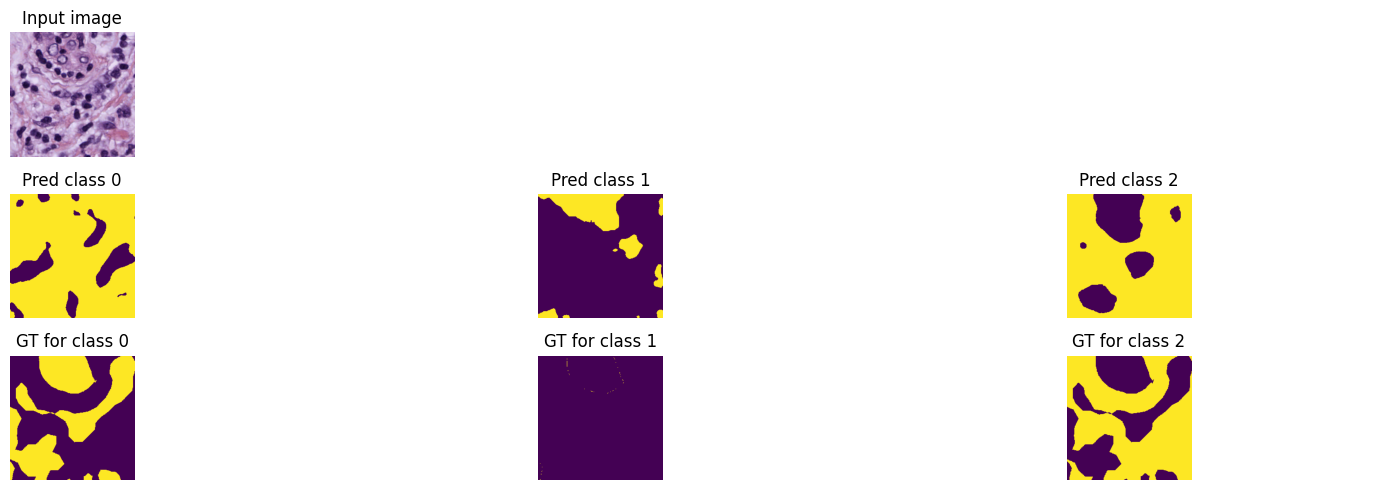

Train loss: 0.56416 | Time: 23m 12s | Val loss: 0.55298
Train_DICE_avg: 0.44705 | Train_Jaccard_avg: 0.37910 | Train_Sensitivity_avg: 0.42128 | Train_Specificity_avg: 0.86586 
Class 0 - Train_DICE: 0.33286 | Train_Jaccard: 0.27128 | Train_Sensitivity: 0.30441 | Train_Specificity: 0.89724 
Class 1 - Train_DICE: 0.53161 | Train_Jaccard: 0.46901 | Train_Sensitivity: 0.51966 | Train_Specificity: 0.83341 
Class 2 - Train_DICE: 0.47667 | Train_Jaccard: 0.39702 | Train_Sensitivity: 0.43979 | Train_Specificity: 0.86693 
Val_DICE_avg: 0.46230 | Val_Jaccard_avg: 0.39817 | Val_Sensitivity_avg: 0.43074 | Val_Specificity_avg: 0.88314 
Class 0 - Val_DICE: 0.34932 | Val_Jaccard: 0.28945 | Val_Sensitivity: 0.31870 | Val_Specificity: 0.89677 
Class 1 - Val_DICE: 0.54862 | Val_Jaccard: 0.49305 | Val_Sensitivity: 0.50877 | Val_Specificity: 0.89303 
Class 2 - Val_DICE: 0.48897 | Val_Jaccard: 0.41202 | Val_Sensitivity: 0.46474 | Val_Specificity: 0.85963 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.56179 | Time: 25m 23s | Val loss: 0.55281
Train_DICE_avg: 0.44779 | Train_Jaccard_avg: 0.37986 | Train_Sensitivity_avg: 0.42338 | Train_Specificity_avg: 0.86507 
Class 0 - Train_DICE: 0.33469 | Train_Jaccard: 0.27270 | Train_Sensitivity: 0.30868 | Train_Specificity: 0.89491 
Class 1 - Train_DICE: 0.53142 | Train_Jaccard: 0.46950 | Train_Sensitivity: 0.52018 | Train_Specificity: 0.83556 
Class 2 - Train_DICE: 0.47726 | Train_Jaccard: 0.39739 | Train_Sensitivity: 0.44129 | Train_Specificity: 0.86474 
Val_DICE_avg: 0.46013 | Val_Jaccard_avg: 0.39608 | Val_Sensitivity_avg: 0.42957 | Val_Specificity_avg: 0.88109 
Class 0 - Val_DICE: 0.34629 | Val_Jaccard: 0.28705 | Val_Sensitivity: 0.31055 | Val_Specificity: 0.90343 
Class 1 - Val_DICE: 0.54289 | Val_Jaccard: 0.48837 | Val_Sensitivity: 0.50382 | Val_Specificity: 0.89640 
Class 2 - Val_DICE: 0.49120 | Val_Jaccard: 0.41282 | Val_Sensitivity: 0.47434 | Val_Specificity: 0.84343 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.55947 | Time: 27m 33s | Val loss: 0.54841
Train_DICE_avg: 0.45037 | Train_Jaccard_avg: 0.38255 | Train_Sensitivity_avg: 0.42666 | Train_Specificity_avg: 0.86680 
Class 0 - Train_DICE: 0.33702 | Train_Jaccard: 0.27528 | Train_Sensitivity: 0.31140 | Train_Specificity: 0.89891 
Class 1 - Train_DICE: 0.53560 | Train_Jaccard: 0.47359 | Train_Sensitivity: 0.52591 | Train_Specificity: 0.83509 
Class 2 - Train_DICE: 0.47850 | Train_Jaccard: 0.39878 | Train_Sensitivity: 0.44267 | Train_Specificity: 0.86640 
Val_DICE_avg: 0.46403 | Val_Jaccard_avg: 0.39992 | Val_Sensitivity_avg: 0.43465 | Val_Specificity_avg: 0.87298 
Class 0 - Val_DICE: 0.34671 | Val_Jaccard: 0.28685 | Val_Sensitivity: 0.31449 | Val_Specificity: 0.89864 
Class 1 - Val_DICE: 0.55550 | Val_Jaccard: 0.50080 | Val_Sensitivity: 0.52062 | Val_Specificity: 0.86922 
Class 2 - Val_DICE: 0.48990 | Val_Jaccard: 0.41212 | Val_Sensitivity: 0.46884 | Val_Specificity: 0.85107 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.55760 | Time: 29m 44s | Val loss: 0.54614
Train_DICE_avg: 0.45222 | Train_Jaccard_avg: 0.38431 | Train_Sensitivity_avg: 0.42890 | Train_Specificity_avg: 0.86647 
Class 0 - Train_DICE: 0.33747 | Train_Jaccard: 0.27548 | Train_Sensitivity: 0.31301 | Train_Specificity: 0.89570 
Class 1 - Train_DICE: 0.53833 | Train_Jaccard: 0.47629 | Train_Sensitivity: 0.53003 | Train_Specificity: 0.83424 
Class 2 - Train_DICE: 0.48086 | Train_Jaccard: 0.40115 | Train_Sensitivity: 0.44365 | Train_Specificity: 0.86947 
Val_DICE_avg: 0.46898 | Val_Jaccard_avg: 0.40472 | Val_Sensitivity_avg: 0.44211 | Val_Specificity_avg: 0.86844 
Class 0 - Val_DICE: 0.34808 | Val_Jaccard: 0.28836 | Val_Sensitivity: 0.31639 | Val_Specificity: 0.89494 
Class 1 - Val_DICE: 0.56597 | Val_Jaccard: 0.51120 | Val_Sensitivity: 0.53715 | Val_Specificity: 0.86120 
Class 2 - Val_DICE: 0.49288 | Val_Jaccard: 0.41460 | Val_Sensitivity: 0.47279 | Val_Specificity: 0.84917 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.55583 | Time: 31m 52s | Val loss: 0.54675
Train_DICE_avg: 0.45427 | Train_Jaccard_avg: 0.38642 | Train_Sensitivity_avg: 0.43194 | Train_Specificity_avg: 0.86626 
Class 0 - Train_DICE: 0.33954 | Train_Jaccard: 0.27781 | Train_Sensitivity: 0.31618 | Train_Specificity: 0.89705 
Class 1 - Train_DICE: 0.54218 | Train_Jaccard: 0.48022 | Train_Sensitivity: 0.53428 | Train_Specificity: 0.83304 
Class 2 - Train_DICE: 0.48109 | Train_Jaccard: 0.40124 | Train_Sensitivity: 0.44536 | Train_Specificity: 0.86870 
Val_DICE_avg: 0.46739 | Val_Jaccard_avg: 0.40319 | Val_Sensitivity_avg: 0.44214 | Val_Specificity_avg: 0.87499 
Class 0 - Val_DICE: 0.34491 | Val_Jaccard: 0.28522 | Val_Sensitivity: 0.31229 | Val_Specificity: 0.90559 
Class 1 - Val_DICE: 0.56679 | Val_Jaccard: 0.51212 | Val_Sensitivity: 0.53266 | Val_Specificity: 0.87752 
Class 2 - Val_DICE: 0.49046 | Val_Jaccard: 0.41224 | Val_Sensitivity: 0.48146 | Val_Specificity: 0.84185 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


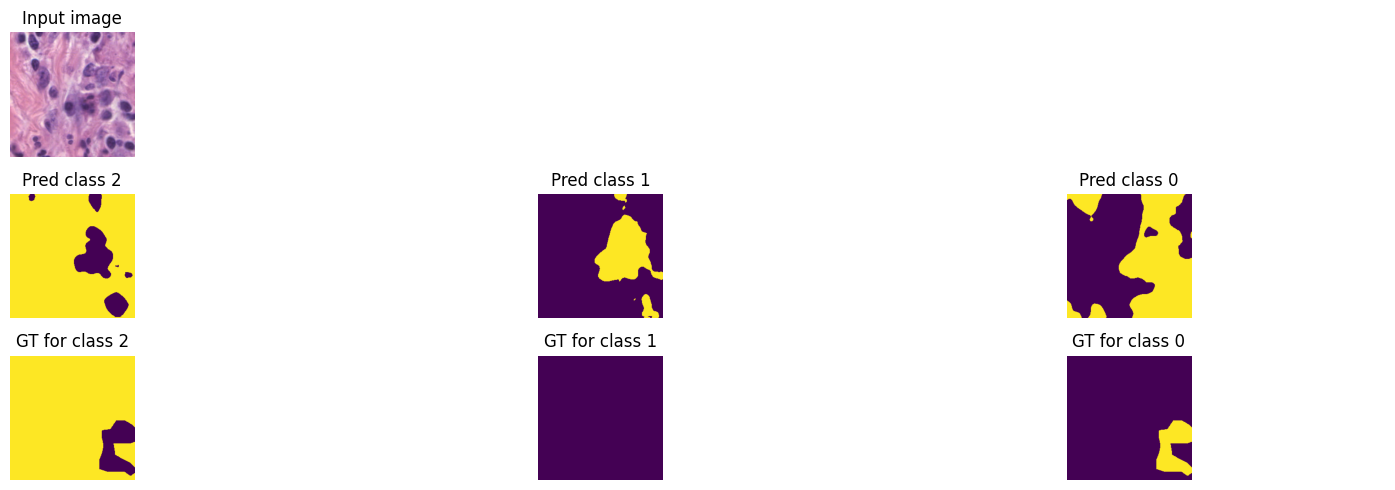

Train loss: 0.55443 | Time: 34m 1s | Val loss: 0.54436
Train_DICE_avg: 0.45656 | Train_Jaccard_avg: 0.38888 | Train_Sensitivity_avg: 0.43430 | Train_Specificity_avg: 0.86776 
Class 0 - Train_DICE: 0.34267 | Train_Jaccard: 0.28062 | Train_Sensitivity: 0.31984 | Train_Specificity: 0.89663 
Class 1 - Train_DICE: 0.54568 | Train_Jaccard: 0.48432 | Train_Sensitivity: 0.53812 | Train_Specificity: 0.83618 
Class 2 - Train_DICE: 0.48134 | Train_Jaccard: 0.40171 | Train_Sensitivity: 0.44494 | Train_Specificity: 0.87049 
Val_DICE_avg: 0.47167 | Val_Jaccard_avg: 0.40779 | Val_Sensitivity_avg: 0.44454 | Val_Specificity_avg: 0.87359 
Class 0 - Val_DICE: 0.34593 | Val_Jaccard: 0.28651 | Val_Sensitivity: 0.31241 | Val_Specificity: 0.91065 
Class 1 - Val_DICE: 0.57631 | Val_Jaccard: 0.52190 | Val_Sensitivity: 0.55141 | Val_Specificity: 0.85692 
Class 2 - Val_DICE: 0.49278 | Val_Jaccard: 0.41495 | Val_Sensitivity: 0.46980 | Val_Specificity: 0.85322 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.55315 | Time: 36m 10s | Val loss: 0.54342
Train_DICE_avg: 0.45823 | Train_Jaccard_avg: 0.39082 | Train_Sensitivity_avg: 0.43666 | Train_Specificity_avg: 0.86848 
Class 0 - Train_DICE: 0.34300 | Train_Jaccard: 0.28108 | Train_Sensitivity: 0.32166 | Train_Specificity: 0.89772 
Class 1 - Train_DICE: 0.54978 | Train_Jaccard: 0.48901 | Train_Sensitivity: 0.54235 | Train_Specificity: 0.83790 
Class 2 - Train_DICE: 0.48190 | Train_Jaccard: 0.40237 | Train_Sensitivity: 0.44598 | Train_Specificity: 0.86982 
Val_DICE_avg: 0.47118 | Val_Jaccard_avg: 0.40697 | Val_Sensitivity_avg: 0.44452 | Val_Specificity_avg: 0.87213 
Class 0 - Val_DICE: 0.35543 | Val_Jaccard: 0.29552 | Val_Sensitivity: 0.32758 | Val_Specificity: 0.89902 
Class 1 - Val_DICE: 0.56193 | Val_Jaccard: 0.50672 | Val_Sensitivity: 0.53195 | Val_Specificity: 0.85930 
Class 2 - Val_DICE: 0.49619 | Val_Jaccard: 0.41866 | Val_Sensitivity: 0.47403 | Val_Specificity: 0.85806 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.55158 | Time: 38m 20s | Val loss: 0.54243
Train_DICE_avg: 0.45907 | Train_Jaccard_avg: 0.39164 | Train_Sensitivity_avg: 0.43722 | Train_Specificity_avg: 0.86982 
Class 0 - Train_DICE: 0.34434 | Train_Jaccard: 0.28233 | Train_Sensitivity: 0.32233 | Train_Specificity: 0.89816 
Class 1 - Train_DICE: 0.54873 | Train_Jaccard: 0.48766 | Train_Sensitivity: 0.54137 | Train_Specificity: 0.83907 
Class 2 - Train_DICE: 0.48415 | Train_Jaccard: 0.40493 | Train_Sensitivity: 0.44795 | Train_Specificity: 0.87224 
Val_DICE_avg: 0.47609 | Val_Jaccard_avg: 0.41196 | Val_Sensitivity_avg: 0.44975 | Val_Specificity_avg: 0.87261 
Class 0 - Val_DICE: 0.35504 | Val_Jaccard: 0.29486 | Val_Sensitivity: 0.32522 | Val_Specificity: 0.90624 
Class 1 - Val_DICE: 0.57437 | Val_Jaccard: 0.51923 | Val_Sensitivity: 0.54528 | Val_Specificity: 0.85340 
Class 2 - Val_DICE: 0.49887 | Val_Jaccard: 0.42180 | Val_Sensitivity: 0.47874 | Val_Specificity: 0.85821 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.55043 | Time: 40m 29s | Val loss: 0.54017
Train_DICE_avg: 0.46196 | Train_Jaccard_avg: 0.39486 | Train_Sensitivity_avg: 0.44075 | Train_Specificity_avg: 0.86905 
Class 0 - Train_DICE: 0.34374 | Train_Jaccard: 0.28171 | Train_Sensitivity: 0.32246 | Train_Specificity: 0.89766 
Class 1 - Train_DICE: 0.55751 | Train_Jaccard: 0.49743 | Train_Sensitivity: 0.55194 | Train_Specificity: 0.83586 
Class 2 - Train_DICE: 0.48463 | Train_Jaccard: 0.40543 | Train_Sensitivity: 0.44785 | Train_Specificity: 0.87362 
Val_DICE_avg: 0.48114 | Val_Jaccard_avg: 0.41738 | Val_Sensitivity_avg: 0.45707 | Val_Specificity_avg: 0.86341 
Class 0 - Val_DICE: 0.34820 | Val_Jaccard: 0.28902 | Val_Sensitivity: 0.31223 | Val_Specificity: 0.90892 
Class 1 - Val_DICE: 0.59525 | Val_Jaccard: 0.54064 | Val_Sensitivity: 0.58088 | Val_Specificity: 0.82447 
Class 2 - Val_DICE: 0.49996 | Val_Jaccard: 0.42248 | Val_Sensitivity: 0.47810 | Val_Specificity: 0.85685 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.54886 | Time: 42m 39s | Val loss: 0.53855
Train_DICE_avg: 0.46538 | Train_Jaccard_avg: 0.39824 | Train_Sensitivity_avg: 0.44504 | Train_Specificity_avg: 0.86770 
Class 0 - Train_DICE: 0.34641 | Train_Jaccard: 0.28423 | Train_Sensitivity: 0.32547 | Train_Specificity: 0.89666 
Class 1 - Train_DICE: 0.56474 | Train_Jaccard: 0.50459 | Train_Sensitivity: 0.56004 | Train_Specificity: 0.83442 
Class 2 - Train_DICE: 0.48499 | Train_Jaccard: 0.40591 | Train_Sensitivity: 0.44962 | Train_Specificity: 0.87203 
Val_DICE_avg: 0.48920 | Val_Jaccard_avg: 0.42510 | Val_Sensitivity_avg: 0.47037 | Val_Specificity_avg: 0.85331 
Class 0 - Val_DICE: 0.34574 | Val_Jaccard: 0.28617 | Val_Sensitivity: 0.30872 | Val_Specificity: 0.92127 
Class 1 - Val_DICE: 0.62418 | Val_Jaccard: 0.56926 | Val_Sensitivity: 0.61809 | Val_Specificity: 0.79802 
Class 2 - Val_DICE: 0.49767 | Val_Jaccard: 0.41987 | Val_Sensitivity: 0.48429 | Val_Specificity: 0.84065 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


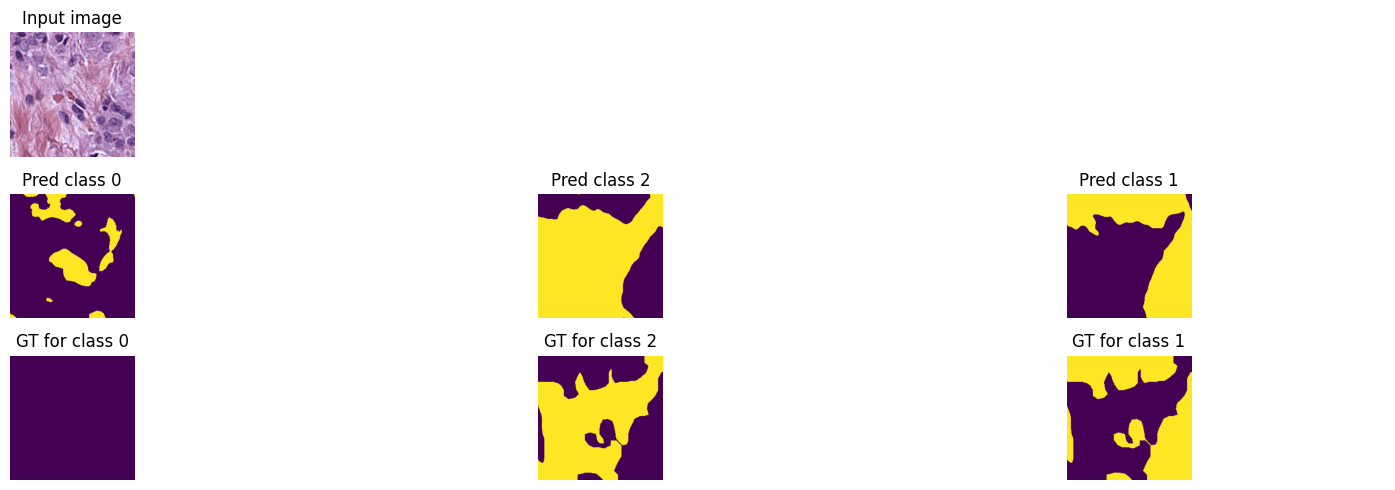

Train loss: 0.54526 | Time: 44m 48s | Val loss: 0.53126
Train_DICE_avg: 0.47224 | Train_Jaccard_avg: 0.40533 | Train_Sensitivity_avg: 0.45360 | Train_Specificity_avg: 0.87026 
Class 0 - Train_DICE: 0.34838 | Train_Jaccard: 0.28658 | Train_Sensitivity: 0.32658 | Train_Specificity: 0.90296 
Class 1 - Train_DICE: 0.58201 | Train_Jaccard: 0.52232 | Train_Sensitivity: 0.58468 | Train_Specificity: 0.83448 
Class 2 - Train_DICE: 0.48634 | Train_Jaccard: 0.40709 | Train_Sensitivity: 0.44952 | Train_Specificity: 0.87334 
Val_DICE_avg: 0.49491 | Val_Jaccard_avg: 0.43107 | Val_Sensitivity_avg: 0.47221 | Val_Specificity_avg: 0.86442 
Class 0 - Val_DICE: 0.35132 | Val_Jaccard: 0.29165 | Val_Sensitivity: 0.31628 | Val_Specificity: 0.91854 
Class 1 - Val_DICE: 0.63431 | Val_Jaccard: 0.57958 | Val_Sensitivity: 0.63094 | Val_Specificity: 0.80409 
Class 2 - Val_DICE: 0.49908 | Val_Jaccard: 0.42197 | Val_Sensitivity: 0.46942 | Val_Specificity: 0.87063 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.54188 | Time: 46m 57s | Val loss: 0.52242
Train_DICE_avg: 0.47743 | Train_Jaccard_avg: 0.41076 | Train_Sensitivity_avg: 0.46095 | Train_Specificity_avg: 0.87088 
Class 0 - Train_DICE: 0.34907 | Train_Jaccard: 0.28726 | Train_Sensitivity: 0.32857 | Train_Specificity: 0.90398 
Class 1 - Train_DICE: 0.59691 | Train_Jaccard: 0.53781 | Train_Sensitivity: 0.60408 | Train_Specificity: 0.83062 
Class 2 - Train_DICE: 0.48630 | Train_Jaccard: 0.40722 | Train_Sensitivity: 0.45020 | Train_Specificity: 0.87803 
Val_DICE_avg: 0.50873 | Val_Jaccard_avg: 0.44509 | Val_Sensitivity_avg: 0.49915 | Val_Specificity_avg: 0.84391 
Class 0 - Val_DICE: 0.34819 | Val_Jaccard: 0.28884 | Val_Sensitivity: 0.31334 | Val_Specificity: 0.91749 
Class 1 - Val_DICE: 0.68170 | Val_Jaccard: 0.62861 | Val_Sensitivity: 0.70409 | Val_Specificity: 0.77168 
Class 2 - Val_DICE: 0.49629 | Val_Jaccard: 0.41783 | Val_Sensitivity: 0.48001 | Val_Specificity: 0.84256 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.53851 | Time: 49m 6s | Val loss: 0.50451
Train_DICE_avg: 0.47796 | Train_Jaccard_avg: 0.41114 | Train_Sensitivity_avg: 0.46580 | Train_Specificity_avg: 0.86732 
Class 0 - Train_DICE: 0.34575 | Train_Jaccard: 0.28403 | Train_Sensitivity: 0.32430 | Train_Specificity: 0.90435 
Class 1 - Train_DICE: 0.60337 | Train_Jaccard: 0.54374 | Train_Sensitivity: 0.62449 | Train_Specificity: 0.81820 
Class 2 - Train_DICE: 0.48475 | Train_Jaccard: 0.40565 | Train_Sensitivity: 0.44860 | Train_Specificity: 0.87943 
Val_DICE_avg: 0.50788 | Val_Jaccard_avg: 0.44478 | Val_Sensitivity_avg: 0.49369 | Val_Specificity_avg: 0.86450 
Class 0 - Val_DICE: 0.35020 | Val_Jaccard: 0.29158 | Val_Sensitivity: 0.31280 | Val_Specificity: 0.92608 
Class 1 - Val_DICE: 0.68305 | Val_Jaccard: 0.62964 | Val_Sensitivity: 0.71124 | Val_Specificity: 0.78801 
Class 2 - Val_DICE: 0.49039 | Val_Jaccard: 0.41311 | Val_Sensitivity: 0.45704 | Val_Specificity: 0.87941 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.53013 | Time: 51m 14s | Val loss: 0.50412
Train_DICE_avg: 0.48552 | Train_Jaccard_avg: 0.41907 | Train_Sensitivity_avg: 0.47929 | Train_Specificity_avg: 0.86548 
Class 0 - Train_DICE: 0.34819 | Train_Jaccard: 0.28683 | Train_Sensitivity: 0.32646 | Train_Specificity: 0.90360 
Class 1 - Train_DICE: 0.62503 | Train_Jaccard: 0.56599 | Train_Sensitivity: 0.66521 | Train_Specificity: 0.81150 
Class 2 - Train_DICE: 0.48334 | Train_Jaccard: 0.40438 | Train_Sensitivity: 0.44619 | Train_Specificity: 0.88135 
Val_DICE_avg: 0.50704 | Val_Jaccard_avg: 0.44342 | Val_Sensitivity_avg: 0.49482 | Val_Specificity_avg: 0.85563 
Class 0 - Val_DICE: 0.35735 | Val_Jaccard: 0.29752 | Val_Sensitivity: 0.32948 | Val_Specificity: 0.90828 
Class 1 - Val_DICE: 0.67544 | Val_Jaccard: 0.62258 | Val_Sensitivity: 0.68974 | Val_Specificity: 0.79689 
Class 2 - Val_DICE: 0.48832 | Val_Jaccard: 0.41017 | Val_Sensitivity: 0.46524 | Val_Specificity: 0.86172 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.52135 | Time: 53m 23s | Val loss: 0.48944
Train_DICE_avg: 0.49146 | Train_Jaccard_avg: 0.42514 | Train_Sensitivity_avg: 0.49035 | Train_Specificity_avg: 0.86369 
Class 0 - Train_DICE: 0.34588 | Train_Jaccard: 0.28464 | Train_Sensitivity: 0.32360 | Train_Specificity: 0.90735 
Class 1 - Train_DICE: 0.64622 | Train_Jaccard: 0.58766 | Train_Sensitivity: 0.70330 | Train_Specificity: 0.80267 
Class 2 - Train_DICE: 0.48226 | Train_Jaccard: 0.40313 | Train_Sensitivity: 0.44416 | Train_Specificity: 0.88105 
Val_DICE_avg: 0.51802 | Val_Jaccard_avg: 0.45463 | Val_Sensitivity_avg: 0.51709 | Val_Specificity_avg: 0.85723 
Class 0 - Val_DICE: 0.35228 | Val_Jaccard: 0.29228 | Val_Sensitivity: 0.31845 | Val_Specificity: 0.91927 
Class 1 - Val_DICE: 0.70839 | Val_Jaccard: 0.65619 | Val_Sensitivity: 0.76816 | Val_Specificity: 0.78484 
Class 2 - Val_DICE: 0.49340 | Val_Jaccard: 0.41541 | Val_Sensitivity: 0.46464 | Val_Specificity: 0.86760 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


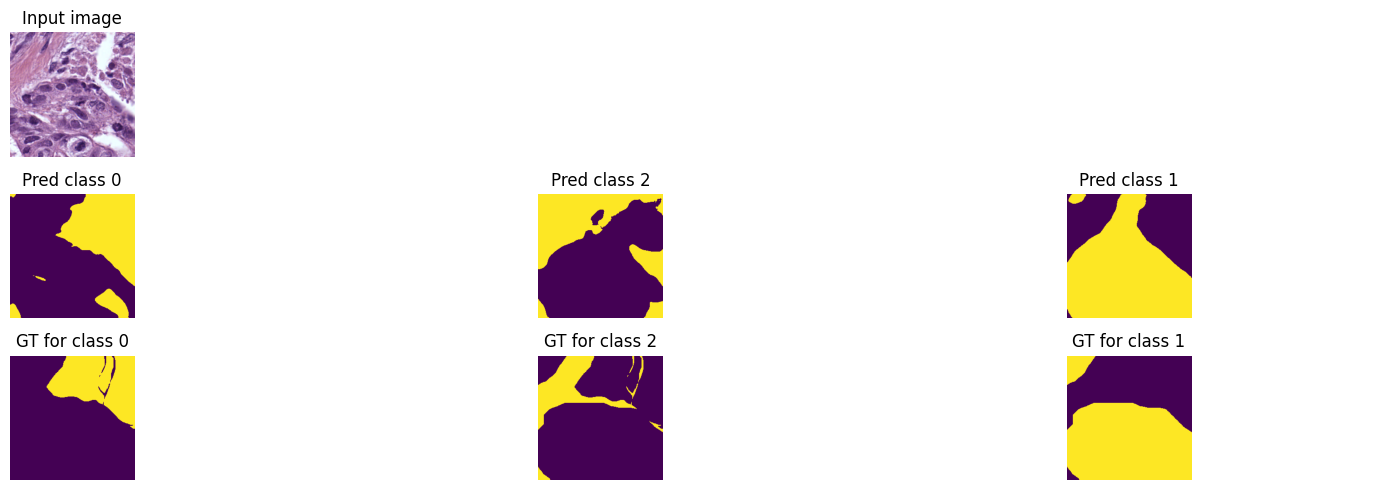

Train loss: 0.51628 | Time: 55m 33s | Val loss: 0.49346
Train_DICE_avg: 0.49461 | Train_Jaccard_avg: 0.42813 | Train_Sensitivity_avg: 0.50193 | Train_Specificity_avg: 0.86016 
Class 0 - Train_DICE: 0.34534 | Train_Jaccard: 0.28376 | Train_Sensitivity: 0.32345 | Train_Specificity: 0.90646 
Class 1 - Train_DICE: 0.65625 | Train_Jaccard: 0.59772 | Train_Sensitivity: 0.73658 | Train_Specificity: 0.79261 
Class 2 - Train_DICE: 0.48223 | Train_Jaccard: 0.40292 | Train_Sensitivity: 0.44577 | Train_Specificity: 0.88140 
Val_DICE_avg: 0.51710 | Val_Jaccard_avg: 0.45400 | Val_Sensitivity_avg: 0.51921 | Val_Specificity_avg: 0.85484 
Class 0 - Val_DICE: 0.35705 | Val_Jaccard: 0.29753 | Val_Sensitivity: 0.32944 | Val_Specificity: 0.91713 
Class 1 - Val_DICE: 0.70364 | Val_Jaccard: 0.65240 | Val_Sensitivity: 0.75418 | Val_Specificity: 0.78716 
Class 2 - Val_DICE: 0.49061 | Val_Jaccard: 0.41206 | Val_Sensitivity: 0.47401 | Val_Specificity: 0.86025 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.51144 | Time: 57m 42s | Val loss: 0.48684
Train_DICE_avg: 0.50038 | Train_Jaccard_avg: 0.43422 | Train_Sensitivity_avg: 0.51540 | Train_Specificity_avg: 0.85799 
Class 0 - Train_DICE: 0.35114 | Train_Jaccard: 0.28967 | Train_Sensitivity: 0.33075 | Train_Specificity: 0.90776 
Class 1 - Train_DICE: 0.66756 | Train_Jaccard: 0.61011 | Train_Sensitivity: 0.76919 | Train_Specificity: 0.78671 
Class 2 - Train_DICE: 0.48245 | Train_Jaccard: 0.40290 | Train_Sensitivity: 0.44625 | Train_Specificity: 0.87949 
Val_DICE_avg: 0.52048 | Val_Jaccard_avg: 0.45733 | Val_Sensitivity_avg: 0.52471 | Val_Specificity_avg: 0.86022 
Class 0 - Val_DICE: 0.35641 | Val_Jaccard: 0.29687 | Val_Sensitivity: 0.32733 | Val_Specificity: 0.91935 
Class 1 - Val_DICE: 0.71628 | Val_Jaccard: 0.66449 | Val_Sensitivity: 0.77720 | Val_Specificity: 0.79906 
Class 2 - Val_DICE: 0.48874 | Val_Jaccard: 0.41064 | Val_Sensitivity: 0.46959 | Val_Specificity: 0.86224 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.50783 | Time: 59m 51s | Val loss: 0.48474
Train_DICE_avg: 0.50062 | Train_Jaccard_avg: 0.43456 | Train_Sensitivity_avg: 0.51369 | Train_Specificity_avg: 0.85685 
Class 0 - Train_DICE: 0.34919 | Train_Jaccard: 0.28802 | Train_Sensitivity: 0.33044 | Train_Specificity: 0.90607 
Class 1 - Train_DICE: 0.67019 | Train_Jaccard: 0.61264 | Train_Sensitivity: 0.76399 | Train_Specificity: 0.79252 
Class 2 - Train_DICE: 0.48248 | Train_Jaccard: 0.40302 | Train_Sensitivity: 0.44665 | Train_Specificity: 0.87195 
Val_DICE_avg: 0.52269 | Val_Jaccard_avg: 0.45960 | Val_Sensitivity_avg: 0.52788 | Val_Specificity_avg: 0.85098 
Class 0 - Val_DICE: 0.35373 | Val_Jaccard: 0.29396 | Val_Sensitivity: 0.32501 | Val_Specificity: 0.91516 
Class 1 - Val_DICE: 0.72180 | Val_Jaccard: 0.67045 | Val_Sensitivity: 0.78386 | Val_Specificity: 0.78240 
Class 2 - Val_DICE: 0.49253 | Val_Jaccard: 0.41439 | Val_Sensitivity: 0.47477 | Val_Specificity: 0.85538 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.50583 | Time: 62m 0s | Val loss: 0.48335
Train_DICE_avg: 0.50312 | Train_Jaccard_avg: 0.43672 | Train_Sensitivity_avg: 0.51993 | Train_Specificity_avg: 0.85507 
Class 0 - Train_DICE: 0.35003 | Train_Jaccard: 0.28840 | Train_Sensitivity: 0.33002 | Train_Specificity: 0.90344 
Class 1 - Train_DICE: 0.67495 | Train_Jaccard: 0.61663 | Train_Sensitivity: 0.78142 | Train_Specificity: 0.78410 
Class 2 - Train_DICE: 0.48438 | Train_Jaccard: 0.40511 | Train_Sensitivity: 0.44834 | Train_Specificity: 0.87769 
Val_DICE_avg: 0.52510 | Val_Jaccard_avg: 0.46217 | Val_Sensitivity_avg: 0.54218 | Val_Specificity_avg: 0.84297 
Class 0 - Val_DICE: 0.35402 | Val_Jaccard: 0.29437 | Val_Sensitivity: 0.32250 | Val_Specificity: 0.92234 
Class 1 - Val_DICE: 0.73095 | Val_Jaccard: 0.67973 | Val_Sensitivity: 0.82734 | Val_Specificity: 0.75090 
Class 2 - Val_DICE: 0.49032 | Val_Jaccard: 0.41240 | Val_Sensitivity: 0.47670 | Val_Specificity: 0.85569 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.50569 | Time: 64m 8s | Val loss: 0.48208
Train_DICE_avg: 0.50225 | Train_Jaccard_avg: 0.43628 | Train_Sensitivity_avg: 0.52012 | Train_Specificity_avg: 0.85497 
Class 0 - Train_DICE: 0.34806 | Train_Jaccard: 0.28676 | Train_Sensitivity: 0.32937 | Train_Specificity: 0.90479 
Class 1 - Train_DICE: 0.67358 | Train_Jaccard: 0.61607 | Train_Sensitivity: 0.78141 | Train_Specificity: 0.78287 
Class 2 - Train_DICE: 0.48512 | Train_Jaccard: 0.40601 | Train_Sensitivity: 0.44958 | Train_Specificity: 0.87724 
Val_DICE_avg: 0.52457 | Val_Jaccard_avg: 0.46202 | Val_Sensitivity_avg: 0.53656 | Val_Specificity_avg: 0.84338 
Class 0 - Val_DICE: 0.35315 | Val_Jaccard: 0.29343 | Val_Sensitivity: 0.32300 | Val_Specificity: 0.90668 
Class 1 - Val_DICE: 0.72908 | Val_Jaccard: 0.67860 | Val_Sensitivity: 0.82178 | Val_Specificity: 0.74898 
Class 2 - Val_DICE: 0.49147 | Val_Jaccard: 0.41402 | Val_Sensitivity: 0.46491 | Val_Specificity: 0.87447 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


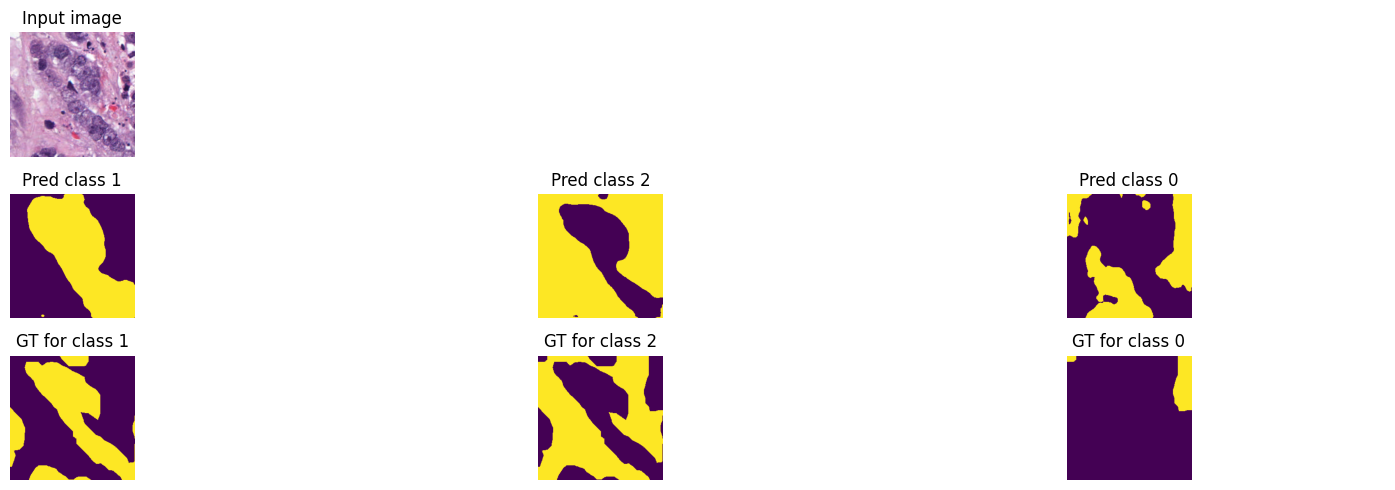

Train loss: 0.50084 | Time: 66m 20s | Val loss: 0.48150
Train_DICE_avg: 0.50652 | Train_Jaccard_avg: 0.44071 | Train_Sensitivity_avg: 0.52254 | Train_Specificity_avg: 0.85436 
Class 0 - Train_DICE: 0.35070 | Train_Jaccard: 0.28949 | Train_Sensitivity: 0.33108 | Train_Specificity: 0.90381 
Class 1 - Train_DICE: 0.68426 | Train_Jaccard: 0.62719 | Train_Sensitivity: 0.78827 | Train_Specificity: 0.78492 
Class 2 - Train_DICE: 0.48461 | Train_Jaccard: 0.40544 | Train_Sensitivity: 0.44829 | Train_Specificity: 0.87436 
Val_DICE_avg: 0.52991 | Val_Jaccard_avg: 0.46737 | Val_Sensitivity_avg: 0.55052 | Val_Specificity_avg: 0.83578 
Class 0 - Val_DICE: 0.36218 | Val_Jaccard: 0.30275 | Val_Sensitivity: 0.32948 | Val_Specificity: 0.92051 
Class 1 - Val_DICE: 0.73244 | Val_Jaccard: 0.68211 | Val_Sensitivity: 0.85114 | Val_Specificity: 0.72139 
Class 2 - Val_DICE: 0.49512 | Val_Jaccard: 0.41727 | Val_Sensitivity: 0.47093 | Val_Specificity: 0.86544 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.49860 | Time: 68m 31s | Val loss: 0.47033
Train_DICE_avg: 0.51327 | Train_Jaccard_avg: 0.44761 | Train_Sensitivity_avg: 0.53627 | Train_Specificity_avg: 0.85486 
Class 0 - Train_DICE: 0.36490 | Train_Jaccard: 0.30405 | Train_Sensitivity: 0.35134 | Train_Specificity: 0.90286 
Class 1 - Train_DICE: 0.68726 | Train_Jaccard: 0.63023 | Train_Sensitivity: 0.80192 | Train_Specificity: 0.78801 
Class 2 - Train_DICE: 0.48765 | Train_Jaccard: 0.40854 | Train_Sensitivity: 0.45554 | Train_Specificity: 0.87370 
Val_DICE_avg: 0.54629 | Val_Jaccard_avg: 0.48417 | Val_Sensitivity_avg: 0.56826 | Val_Specificity_avg: 0.84012 
Class 0 - Val_DICE: 0.40065 | Val_Jaccard: 0.34178 | Val_Sensitivity: 0.37792 | Val_Specificity: 0.91233 
Class 1 - Val_DICE: 0.73860 | Val_Jaccard: 0.68829 | Val_Sensitivity: 0.84284 | Val_Specificity: 0.74723 
Class 2 - Val_DICE: 0.49960 | Val_Jaccard: 0.42246 | Val_Sensitivity: 0.48401 | Val_Specificity: 0.86081 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.48098 | Time: 70m 42s | Val loss: 0.44260
Train_DICE_avg: 0.53645 | Train_Jaccard_avg: 0.47273 | Train_Sensitivity_avg: 0.56222 | Train_Specificity_avg: 0.85410 
Class 0 - Train_DICE: 0.42372 | Train_Jaccard: 0.36683 | Train_Sensitivity: 0.43725 | Train_Specificity: 0.89602 
Class 1 - Train_DICE: 0.69762 | Train_Jaccard: 0.64232 | Train_Sensitivity: 0.79437 | Train_Specificity: 0.79333 
Class 2 - Train_DICE: 0.48802 | Train_Jaccard: 0.40904 | Train_Sensitivity: 0.45505 | Train_Specificity: 0.87295 
Val_DICE_avg: 0.58210 | Val_Jaccard_avg: 0.52178 | Val_Sensitivity_avg: 0.61626 | Val_Specificity_avg: 0.82477 
Class 0 - Val_DICE: 0.51892 | Val_Jaccard: 0.46523 | Val_Sensitivity: 0.52037 | Val_Specificity: 0.88849 
Class 1 - Val_DICE: 0.73669 | Val_Jaccard: 0.68739 | Val_Sensitivity: 0.85986 | Val_Specificity: 0.71833 
Class 2 - Val_DICE: 0.49069 | Val_Jaccard: 0.41273 | Val_Sensitivity: 0.46854 | Val_Specificity: 0.86747 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.45536 | Time: 72m 53s | Val loss: 0.40886
Train_DICE_avg: 0.55846 | Train_Jaccard_avg: 0.49639 | Train_Sensitivity_avg: 0.60072 | Train_Specificity_avg: 0.85251 
Class 0 - Train_DICE: 0.48007 | Train_Jaccard: 0.42766 | Train_Sensitivity: 0.53803 | Train_Specificity: 0.88250 
Class 1 - Train_DICE: 0.70843 | Train_Jaccard: 0.65384 | Train_Sensitivity: 0.81058 | Train_Specificity: 0.79615 
Class 2 - Train_DICE: 0.48687 | Train_Jaccard: 0.40766 | Train_Sensitivity: 0.45355 | Train_Specificity: 0.87887 
Val_DICE_avg: 0.60047 | Val_Jaccard_avg: 0.54063 | Val_Sensitivity_avg: 0.63416 | Val_Specificity_avg: 0.82203 
Class 0 - Val_DICE: 0.55855 | Val_Jaccard: 0.50754 | Val_Sensitivity: 0.58716 | Val_Specificity: 0.87309 
Class 1 - Val_DICE: 0.75172 | Val_Jaccard: 0.70067 | Val_Sensitivity: 0.84903 | Val_Specificity: 0.72448 
Class 2 - Val_DICE: 0.49113 | Val_Jaccard: 0.41369 | Val_Sensitivity: 0.46628 | Val_Specificity: 0.86853 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.44242 | Time: 75m 5s | Val loss: 0.39509
Train_DICE_avg: 0.56781 | Train_Jaccard_avg: 0.50614 | Train_Sensitivity_avg: 0.61906 | Train_Specificity_avg: 0.84937 
Class 0 - Train_DICE: 0.50462 | Train_Jaccard: 0.45260 | Train_Sensitivity: 0.57495 | Train_Specificity: 0.87563 
Class 1 - Train_DICE: 0.71432 | Train_Jaccard: 0.66031 | Train_Sensitivity: 0.83378 | Train_Specificity: 0.78804 
Class 2 - Train_DICE: 0.48450 | Train_Jaccard: 0.40551 | Train_Sensitivity: 0.44845 | Train_Specificity: 0.88445 
Val_DICE_avg: 0.61271 | Val_Jaccard_avg: 0.55423 | Val_Sensitivity_avg: 0.66457 | Val_Specificity_avg: 0.82168 
Class 0 - Val_DICE: 0.59823 | Val_Jaccard: 0.54891 | Val_Sensitivity: 0.65506 | Val_Specificity: 0.86735 
Class 1 - Val_DICE: 0.74855 | Val_Jaccard: 0.69957 | Val_Sensitivity: 0.87359 | Val_Specificity: 0.71996 
Class 2 - Val_DICE: 0.49134 | Val_Jaccard: 0.41421 | Val_Sensitivity: 0.46505 | Val_Specificity: 0.87773 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


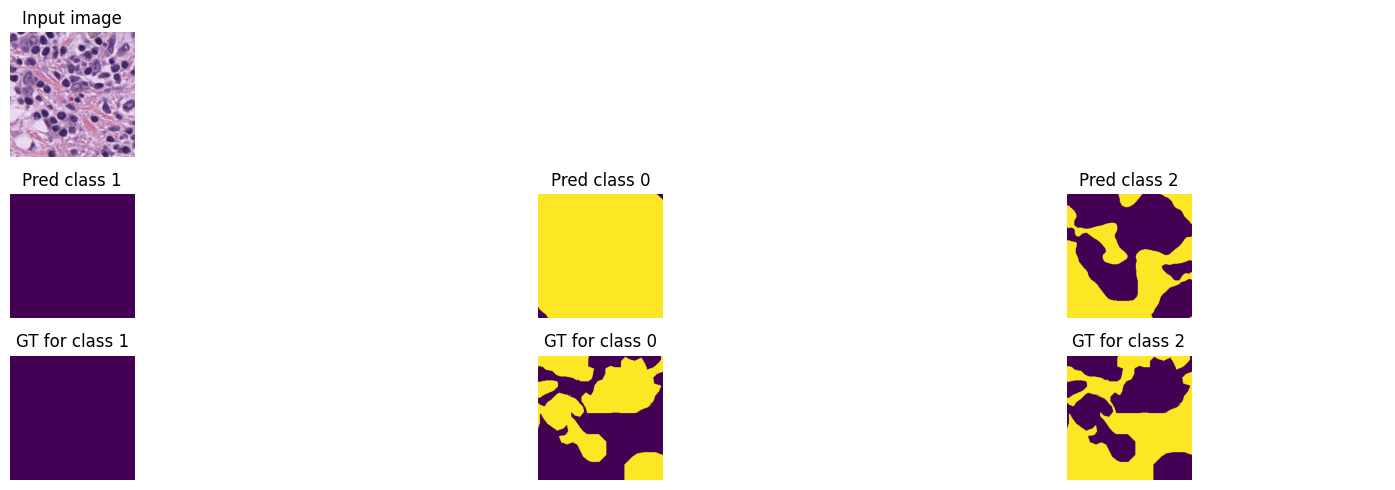

Train loss: 0.42904 | Time: 77m 16s | Val loss: 0.38831
Train_DICE_avg: 0.57992 | Train_Jaccard_avg: 0.51902 | Train_Sensitivity_avg: 0.63474 | Train_Specificity_avg: 0.85180 
Class 0 - Train_DICE: 0.53094 | Train_Jaccard: 0.48068 | Train_Sensitivity: 0.62159 | Train_Specificity: 0.87403 
Class 1 - Train_DICE: 0.72085 | Train_Jaccard: 0.66729 | Train_Sensitivity: 0.83122 | Train_Specificity: 0.79616 
Class 2 - Train_DICE: 0.48797 | Train_Jaccard: 0.40908 | Train_Sensitivity: 0.45142 | Train_Specificity: 0.88520 
Val_DICE_avg: 0.61861 | Val_Jaccard_avg: 0.55990 | Val_Sensitivity_avg: 0.67198 | Val_Specificity_avg: 0.82083 
Class 0 - Val_DICE: 0.61803 | Val_Jaccard: 0.56972 | Val_Sensitivity: 0.70188 | Val_Specificity: 0.85944 
Class 1 - Val_DICE: 0.74852 | Val_Jaccard: 0.69839 | Val_Sensitivity: 0.84480 | Val_Specificity: 0.73362 
Class 2 - Val_DICE: 0.48929 | Val_Jaccard: 0.41157 | Val_Sensitivity: 0.46926 | Val_Specificity: 0.86943 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.42790 | Time: 79m 27s | Val loss: 0.39012
Train_DICE_avg: 0.57896 | Train_Jaccard_avg: 0.51792 | Train_Sensitivity_avg: 0.63659 | Train_Specificity_avg: 0.84903 
Class 0 - Train_DICE: 0.53304 | Train_Jaccard: 0.48277 | Train_Sensitivity: 0.63156 | Train_Specificity: 0.87087 
Class 1 - Train_DICE: 0.71666 | Train_Jaccard: 0.66299 | Train_Sensitivity: 0.82575 | Train_Specificity: 0.79519 
Class 2 - Train_DICE: 0.48718 | Train_Jaccard: 0.40799 | Train_Sensitivity: 0.45247 | Train_Specificity: 0.88104 
Val_DICE_avg: 0.61515 | Val_Jaccard_avg: 0.55751 | Val_Sensitivity_avg: 0.67134 | Val_Specificity_avg: 0.81699 
Class 0 - Val_DICE: 0.60852 | Val_Jaccard: 0.56329 | Val_Sensitivity: 0.71459 | Val_Specificity: 0.85123 
Class 1 - Val_DICE: 0.74647 | Val_Jaccard: 0.69629 | Val_Sensitivity: 0.83742 | Val_Specificity: 0.73549 
Class 2 - Val_DICE: 0.49046 | Val_Jaccard: 0.41294 | Val_Sensitivity: 0.46202 | Val_Specificity: 0.86424 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.41854 | Time: 81m 39s | Val loss: 0.38541
Train_DICE_avg: 0.58991 | Train_Jaccard_avg: 0.52957 | Train_Sensitivity_avg: 0.65625 | Train_Specificity_avg: 0.85014 
Class 0 - Train_DICE: 0.56035 | Train_Jaccard: 0.51221 | Train_Sensitivity: 0.68558 | Train_Specificity: 0.86379 
Class 1 - Train_DICE: 0.72137 | Train_Jaccard: 0.66738 | Train_Sensitivity: 0.83109 | Train_Specificity: 0.80001 
Class 2 - Train_DICE: 0.48800 | Train_Jaccard: 0.40913 | Train_Sensitivity: 0.45208 | Train_Specificity: 0.88661 
Val_DICE_avg: 0.62148 | Val_Jaccard_avg: 0.56402 | Val_Sensitivity_avg: 0.68560 | Val_Specificity_avg: 0.82152 
Class 0 - Val_DICE: 0.62188 | Val_Jaccard: 0.57522 | Val_Sensitivity: 0.71626 | Val_Specificity: 0.86249 
Class 1 - Val_DICE: 0.74939 | Val_Jaccard: 0.70055 | Val_Sensitivity: 0.86640 | Val_Specificity: 0.73293 
Class 2 - Val_DICE: 0.49317 | Val_Jaccard: 0.41629 | Val_Sensitivity: 0.47413 | Val_Specificity: 0.86913 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.41172 | Time: 83m 50s | Val loss: 0.38050
Train_DICE_avg: 0.59565 | Train_Jaccard_avg: 0.53656 | Train_Sensitivity_avg: 0.66743 | Train_Specificity_avg: 0.85131 
Class 0 - Train_DICE: 0.56880 | Train_Jaccard: 0.52276 | Train_Sensitivity: 0.71423 | Train_Specificity: 0.85968 
Class 1 - Train_DICE: 0.73005 | Train_Jaccard: 0.67720 | Train_Sensitivity: 0.83505 | Train_Specificity: 0.80928 
Class 2 - Train_DICE: 0.48810 | Train_Jaccard: 0.40973 | Train_Sensitivity: 0.45300 | Train_Specificity: 0.88496 
Val_DICE_avg: 0.62779 | Val_Jaccard_avg: 0.57135 | Val_Sensitivity_avg: 0.70118 | Val_Specificity_avg: 0.82311 
Class 0 - Val_DICE: 0.63703 | Val_Jaccard: 0.59526 | Val_Sensitivity: 0.78388 | Val_Specificity: 0.84549 
Class 1 - Val_DICE: 0.74606 | Val_Jaccard: 0.69585 | Val_Sensitivity: 0.83010 | Val_Specificity: 0.75843 
Class 2 - Val_DICE: 0.50027 | Val_Jaccard: 0.42293 | Val_Sensitivity: 0.48958 | Val_Specificity: 0.86540 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.41148 | Time: 86m 2s | Val loss: 0.38014
Train_DICE_avg: 0.59412 | Train_Jaccard_avg: 0.53432 | Train_Sensitivity_avg: 0.66694 | Train_Specificity_avg: 0.84565 
Class 0 - Train_DICE: 0.57000 | Train_Jaccard: 0.52288 | Train_Sensitivity: 0.70599 | Train_Specificity: 0.86316 
Class 1 - Train_DICE: 0.72235 | Train_Jaccard: 0.66905 | Train_Sensitivity: 0.83992 | Train_Specificity: 0.79268 
Class 2 - Train_DICE: 0.49000 | Train_Jaccard: 0.41103 | Train_Sensitivity: 0.45490 | Train_Specificity: 0.88111 
Val_DICE_avg: 0.62960 | Val_Jaccard_avg: 0.57240 | Val_Sensitivity_avg: 0.69253 | Val_Specificity_avg: 0.83426 
Class 0 - Val_DICE: 0.64173 | Val_Jaccard: 0.59719 | Val_Sensitivity: 0.75092 | Val_Specificity: 0.86083 
Class 1 - Val_DICE: 0.74605 | Val_Jaccard: 0.69591 | Val_Sensitivity: 0.83338 | Val_Specificity: 0.78654 
Class 2 - Val_DICE: 0.50101 | Val_Jaccard: 0.42410 | Val_Sensitivity: 0.49327 | Val_Specificity: 0.85542 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


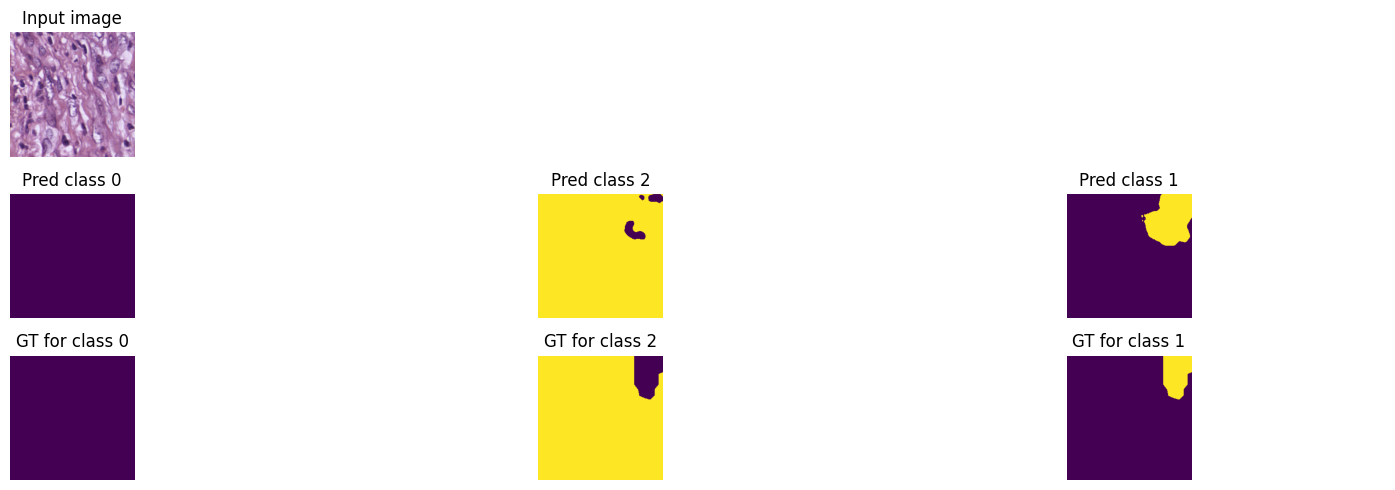

Train loss: 0.40790 | Time: 88m 13s | Val loss: 0.38569
Train_DICE_avg: 0.59710 | Train_Jaccard_avg: 0.53755 | Train_Sensitivity_avg: 0.66909 | Train_Specificity_avg: 0.84965 
Class 0 - Train_DICE: 0.57091 | Train_Jaccard: 0.52405 | Train_Sensitivity: 0.71040 | Train_Specificity: 0.86001 
Class 1 - Train_DICE: 0.72876 | Train_Jaccard: 0.67568 | Train_Sensitivity: 0.83762 | Train_Specificity: 0.80731 
Class 2 - Train_DICE: 0.49163 | Train_Jaccard: 0.41293 | Train_Sensitivity: 0.45924 | Train_Specificity: 0.88162 
Val_DICE_avg: 0.62282 | Val_Jaccard_avg: 0.56586 | Val_Sensitivity_avg: 0.68290 | Val_Specificity_avg: 0.84059 
Class 0 - Val_DICE: 0.64571 | Val_Jaccard: 0.60279 | Val_Sensitivity: 0.76598 | Val_Specificity: 0.86262 
Class 1 - Val_DICE: 0.72394 | Val_Jaccard: 0.67278 | Val_Sensitivity: 0.77734 | Val_Specificity: 0.81567 
Class 2 - Val_DICE: 0.49883 | Val_Jaccard: 0.42202 | Val_Sensitivity: 0.50537 | Val_Specificity: 0.84346 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.40386 | Time: 90m 25s | Val loss: 0.37762
Train_DICE_avg: 0.60154 | Train_Jaccard_avg: 0.54230 | Train_Sensitivity_avg: 0.67577 | Train_Specificity_avg: 0.85123 
Class 0 - Train_DICE: 0.58422 | Train_Jaccard: 0.53738 | Train_Sensitivity: 0.72847 | Train_Specificity: 0.86238 
Class 1 - Train_DICE: 0.72956 | Train_Jaccard: 0.67717 | Train_Sensitivity: 0.84402 | Train_Specificity: 0.80558 
Class 2 - Train_DICE: 0.49086 | Train_Jaccard: 0.41235 | Train_Sensitivity: 0.45482 | Train_Specificity: 0.88574 
Val_DICE_avg: 0.63037 | Val_Jaccard_avg: 0.57333 | Val_Sensitivity_avg: 0.69629 | Val_Specificity_avg: 0.83593 
Class 0 - Val_DICE: 0.64054 | Val_Jaccard: 0.59577 | Val_Sensitivity: 0.74928 | Val_Specificity: 0.86436 
Class 1 - Val_DICE: 0.74305 | Val_Jaccard: 0.69358 | Val_Sensitivity: 0.82743 | Val_Specificity: 0.79817 
Class 2 - Val_DICE: 0.50751 | Val_Jaccard: 0.43064 | Val_Sensitivity: 0.51217 | Val_Specificity: 0.84526 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.39915 | Time: 92m 37s | Val loss: 0.37114
Train_DICE_avg: 0.60561 | Train_Jaccard_avg: 0.54622 | Train_Sensitivity_avg: 0.67949 | Train_Specificity_avg: 0.85515 
Class 0 - Train_DICE: 0.59033 | Train_Jaccard: 0.54265 | Train_Sensitivity: 0.73533 | Train_Specificity: 0.86372 
Class 1 - Train_DICE: 0.73487 | Train_Jaccard: 0.68293 | Train_Sensitivity: 0.84469 | Train_Specificity: 0.81329 
Class 2 - Train_DICE: 0.49163 | Train_Jaccard: 0.41307 | Train_Sensitivity: 0.45845 | Train_Specificity: 0.88844 
Val_DICE_avg: 0.63739 | Val_Jaccard_avg: 0.58035 | Val_Sensitivity_avg: 0.70228 | Val_Specificity_avg: 0.83616 
Class 0 - Val_DICE: 0.65225 | Val_Jaccard: 0.60767 | Val_Sensitivity: 0.76496 | Val_Specificity: 0.86275 
Class 1 - Val_DICE: 0.75496 | Val_Jaccard: 0.70555 | Val_Sensitivity: 0.83328 | Val_Specificity: 0.79706 
Class 2 - Val_DICE: 0.50496 | Val_Jaccard: 0.42783 | Val_Sensitivity: 0.50860 | Val_Specificity: 0.84868 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.39790 | Time: 94m 48s | Val loss: 0.37096
Train_DICE_avg: 0.60768 | Train_Jaccard_avg: 0.54892 | Train_Sensitivity_avg: 0.68572 | Train_Specificity_avg: 0.85253 
Class 0 - Train_DICE: 0.58982 | Train_Jaccard: 0.54340 | Train_Sensitivity: 0.74332 | Train_Specificity: 0.86244 
Class 1 - Train_DICE: 0.73861 | Train_Jaccard: 0.68688 | Train_Sensitivity: 0.85323 | Train_Specificity: 0.80553 
Class 2 - Train_DICE: 0.49460 | Train_Jaccard: 0.41649 | Train_Sensitivity: 0.46060 | Train_Specificity: 0.88963 
Val_DICE_avg: 0.63683 | Val_Jaccard_avg: 0.58015 | Val_Sensitivity_avg: 0.71216 | Val_Specificity_avg: 0.83365 
Class 0 - Val_DICE: 0.65431 | Val_Jaccard: 0.61164 | Val_Sensitivity: 0.80453 | Val_Specificity: 0.84647 
Class 1 - Val_DICE: 0.74794 | Val_Jaccard: 0.69710 | Val_Sensitivity: 0.82128 | Val_Specificity: 0.80213 
Class 2 - Val_DICE: 0.50823 | Val_Jaccard: 0.43172 | Val_Sensitivity: 0.51065 | Val_Specificity: 0.85236 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.39339 | Time: 97m 0s | Val loss: 0.36461
Train_DICE_avg: 0.61231 | Train_Jaccard_avg: 0.55391 | Train_Sensitivity_avg: 0.68874 | Train_Specificity_avg: 0.85606 
Class 0 - Train_DICE: 0.59734 | Train_Jaccard: 0.55194 | Train_Sensitivity: 0.75753 | Train_Specificity: 0.86096 
Class 1 - Train_DICE: 0.74300 | Train_Jaccard: 0.69082 | Train_Sensitivity: 0.84151 | Train_Specificity: 0.81934 
Class 2 - Train_DICE: 0.49659 | Train_Jaccard: 0.41896 | Train_Sensitivity: 0.46718 | Train_Specificity: 0.88789 
Val_DICE_avg: 0.64299 | Val_Jaccard_avg: 0.58614 | Val_Sensitivity_avg: 0.72218 | Val_Specificity_avg: 0.82165 
Class 0 - Val_DICE: 0.65373 | Val_Jaccard: 0.61107 | Val_Sensitivity: 0.78595 | Val_Specificity: 0.85159 
Class 1 - Val_DICE: 0.76406 | Val_Jaccard: 0.71336 | Val_Sensitivity: 0.86594 | Val_Specificity: 0.76513 
Class 2 - Val_DICE: 0.51119 | Val_Jaccard: 0.43400 | Val_Sensitivity: 0.51466 | Val_Specificity: 0.84823 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


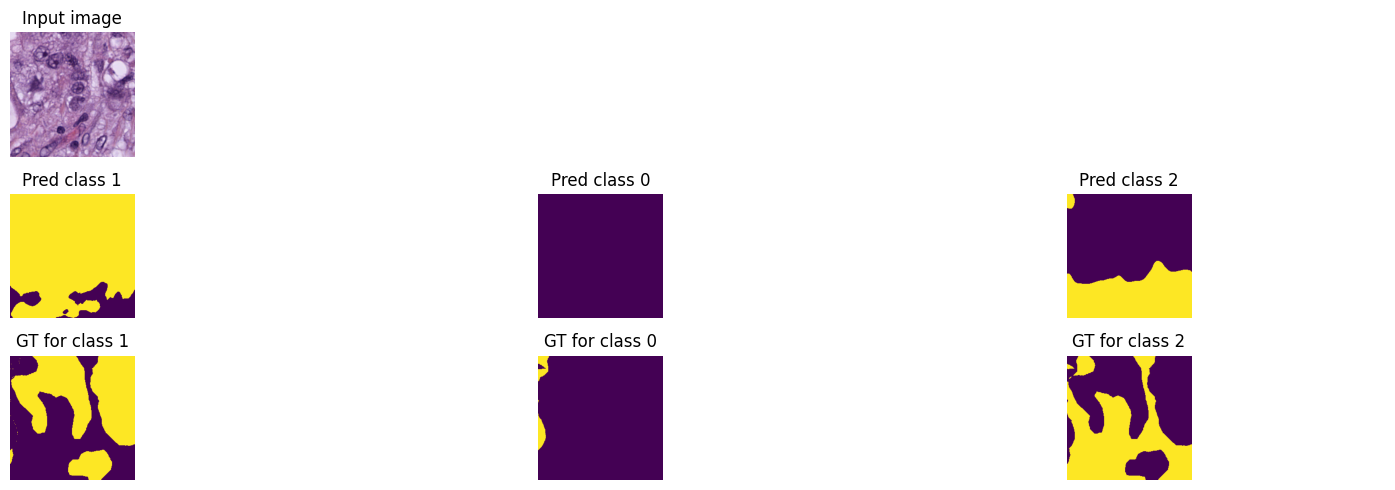

Train loss: 0.39190 | Time: 99m 12s | Val loss: 0.36243
Train_DICE_avg: 0.61314 | Train_Jaccard_avg: 0.55490 | Train_Sensitivity_avg: 0.69595 | Train_Specificity_avg: 0.85238 
Class 0 - Train_DICE: 0.60048 | Train_Jaccard: 0.55513 | Train_Sensitivity: 0.76373 | Train_Specificity: 0.86026 
Class 1 - Train_DICE: 0.73815 | Train_Jaccard: 0.68660 | Train_Sensitivity: 0.85151 | Train_Specificity: 0.81222 
Class 2 - Train_DICE: 0.50077 | Train_Jaccard: 0.42297 | Train_Sensitivity: 0.47261 | Train_Specificity: 0.88466 
Val_DICE_avg: 0.64339 | Val_Jaccard_avg: 0.58689 | Val_Sensitivity_avg: 0.72042 | Val_Specificity_avg: 0.83087 
Class 0 - Val_DICE: 0.65886 | Val_Jaccard: 0.61593 | Val_Sensitivity: 0.78287 | Val_Specificity: 0.85319 
Class 1 - Val_DICE: 0.75415 | Val_Jaccard: 0.70456 | Val_Sensitivity: 0.84208 | Val_Specificity: 0.80068 
Class 2 - Val_DICE: 0.51716 | Val_Jaccard: 0.44018 | Val_Sensitivity: 0.53630 | Val_Specificity: 0.83873 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.39022 | Time: 101m 23s | Val loss: 0.36116
Train_DICE_avg: 0.61536 | Train_Jaccard_avg: 0.55679 | Train_Sensitivity_avg: 0.69474 | Train_Specificity_avg: 0.85612 
Class 0 - Train_DICE: 0.59821 | Train_Jaccard: 0.55199 | Train_Sensitivity: 0.75361 | Train_Specificity: 0.86342 
Class 1 - Train_DICE: 0.74303 | Train_Jaccard: 0.69137 | Train_Sensitivity: 0.84731 | Train_Specificity: 0.82532 
Class 2 - Train_DICE: 0.50485 | Train_Jaccard: 0.42701 | Train_Sensitivity: 0.48331 | Train_Specificity: 0.87961 
Val_DICE_avg: 0.64461 | Val_Jaccard_avg: 0.58813 | Val_Sensitivity_avg: 0.72185 | Val_Specificity_avg: 0.83563 
Class 0 - Val_DICE: 0.66144 | Val_Jaccard: 0.61795 | Val_Sensitivity: 0.79164 | Val_Specificity: 0.85245 
Class 1 - Val_DICE: 0.75054 | Val_Jaccard: 0.70023 | Val_Sensitivity: 0.82811 | Val_Specificity: 0.80967 
Class 2 - Val_DICE: 0.52185 | Val_Jaccard: 0.44621 | Val_Sensitivity: 0.54582 | Val_Specificity: 0.84477 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.38710 | Time: 103m 35s | Val loss: 0.35369
Train_DICE_avg: 0.61853 | Train_Jaccard_avg: 0.56018 | Train_Sensitivity_avg: 0.70377 | Train_Specificity_avg: 0.85505 
Class 0 - Train_DICE: 0.60559 | Train_Jaccard: 0.55862 | Train_Sensitivity: 0.75840 | Train_Specificity: 0.86434 
Class 1 - Train_DICE: 0.74328 | Train_Jaccard: 0.69207 | Train_Sensitivity: 0.86032 | Train_Specificity: 0.82100 
Class 2 - Train_DICE: 0.50670 | Train_Jaccard: 0.42984 | Train_Sensitivity: 0.49260 | Train_Specificity: 0.87982 
Val_DICE_avg: 0.65199 | Val_Jaccard_avg: 0.59651 | Val_Sensitivity_avg: 0.74056 | Val_Specificity_avg: 0.83074 
Class 0 - Val_DICE: 0.65731 | Val_Jaccard: 0.61398 | Val_Sensitivity: 0.78541 | Val_Specificity: 0.85360 
Class 1 - Val_DICE: 0.75357 | Val_Jaccard: 0.70436 | Val_Sensitivity: 0.84570 | Val_Specificity: 0.79666 
Class 2 - Val_DICE: 0.54508 | Val_Jaccard: 0.47120 | Val_Sensitivity: 0.59056 | Val_Specificity: 0.84196 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.38556 | Time: 105m 46s | Val loss: 0.35862
Train_DICE_avg: 0.61998 | Train_Jaccard_avg: 0.56168 | Train_Sensitivity_avg: 0.70570 | Train_Specificity_avg: 0.85317 
Class 0 - Train_DICE: 0.60248 | Train_Jaccard: 0.55535 | Train_Sensitivity: 0.74456 | Train_Specificity: 0.86898 
Class 1 - Train_DICE: 0.74096 | Train_Jaccard: 0.68931 | Train_Sensitivity: 0.84337 | Train_Specificity: 0.82353 
Class 2 - Train_DICE: 0.51649 | Train_Jaccard: 0.44038 | Train_Sensitivity: 0.52917 | Train_Specificity: 0.86701 
Val_DICE_avg: 0.64512 | Val_Jaccard_avg: 0.58925 | Val_Sensitivity_avg: 0.73849 | Val_Specificity_avg: 0.83339 
Class 0 - Val_DICE: 0.64681 | Val_Jaccard: 0.60297 | Val_Sensitivity: 0.77122 | Val_Specificity: 0.85864 
Class 1 - Val_DICE: 0.75166 | Val_Jaccard: 0.70264 | Val_Sensitivity: 0.84383 | Val_Specificity: 0.81545 
Class 2 - Val_DICE: 0.53690 | Val_Jaccard: 0.46215 | Val_Sensitivity: 0.60043 | Val_Specificity: 0.82609 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.38314 | Time: 107m 58s | Val loss: 0.35070
Train_DICE_avg: 0.62212 | Train_Jaccard_avg: 0.56449 | Train_Sensitivity_avg: 0.71419 | Train_Specificity_avg: 0.85275 
Class 0 - Train_DICE: 0.60673 | Train_Jaccard: 0.56051 | Train_Sensitivity: 0.76312 | Train_Specificity: 0.86341 
Class 1 - Train_DICE: 0.74108 | Train_Jaccard: 0.68970 | Train_Sensitivity: 0.85035 | Train_Specificity: 0.82888 
Class 2 - Train_DICE: 0.51856 | Train_Jaccard: 0.44324 | Train_Sensitivity: 0.52912 | Train_Specificity: 0.86597 
Val_DICE_avg: 0.65358 | Val_Jaccard_avg: 0.59830 | Val_Sensitivity_avg: 0.74364 | Val_Specificity_avg: 0.82794 
Class 0 - Val_DICE: 0.65533 | Val_Jaccard: 0.61160 | Val_Sensitivity: 0.77804 | Val_Specificity: 0.86377 
Class 1 - Val_DICE: 0.75310 | Val_Jaccard: 0.70430 | Val_Sensitivity: 0.86553 | Val_Specificity: 0.77205 
Class 2 - Val_DICE: 0.55230 | Val_Jaccard: 0.47899 | Val_Sensitivity: 0.58734 | Val_Specificity: 0.84799 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


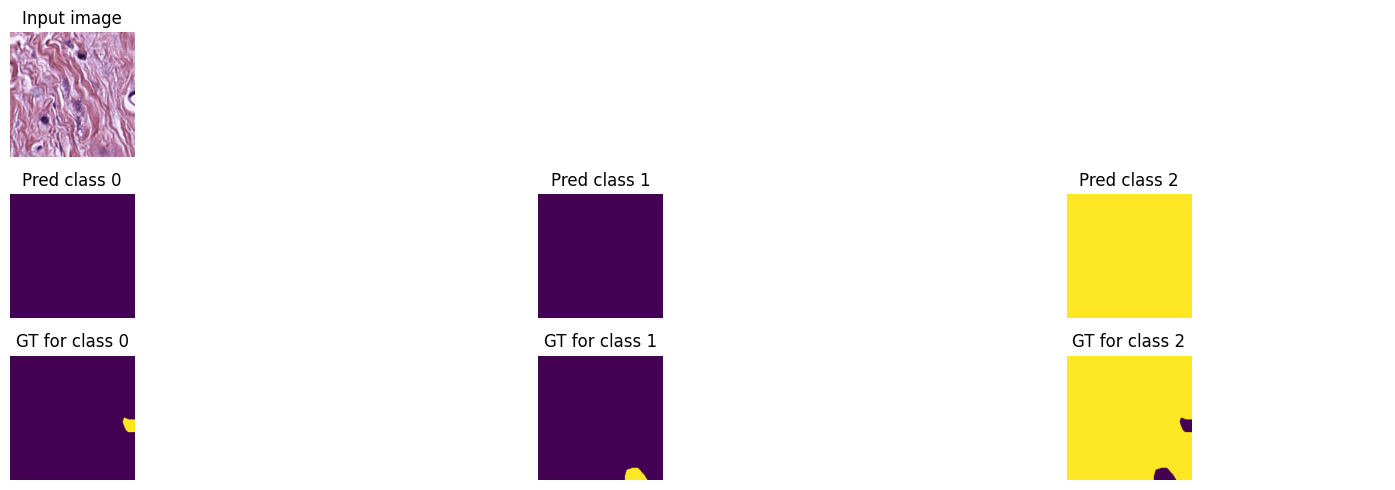

Train loss: 0.37848 | Time: 110m 10s | Val loss: 0.34732
Train_DICE_avg: 0.62727 | Train_Jaccard_avg: 0.56978 | Train_Sensitivity_avg: 0.72094 | Train_Specificity_avg: 0.85534 
Class 0 - Train_DICE: 0.61032 | Train_Jaccard: 0.56438 | Train_Sensitivity: 0.77295 | Train_Specificity: 0.86264 
Class 1 - Train_DICE: 0.74723 | Train_Jaccard: 0.69572 | Train_Sensitivity: 0.84358 | Train_Specificity: 0.83521 
Class 2 - Train_DICE: 0.52425 | Train_Jaccard: 0.44925 | Train_Sensitivity: 0.54630 | Train_Specificity: 0.86816 
Val_DICE_avg: 0.65536 | Val_Jaccard_avg: 0.60031 | Val_Sensitivity_avg: 0.75376 | Val_Specificity_avg: 0.82421 
Class 0 - Val_DICE: 0.65624 | Val_Jaccard: 0.61308 | Val_Sensitivity: 0.78489 | Val_Specificity: 0.85803 
Class 1 - Val_DICE: 0.75795 | Val_Jaccard: 0.70831 | Val_Sensitivity: 0.84772 | Val_Specificity: 0.78363 
Class 2 - Val_DICE: 0.55190 | Val_Jaccard: 0.47953 | Val_Sensitivity: 0.62868 | Val_Specificity: 0.83095 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.37347 | Time: 112m 21s | Val loss: 0.34741
Train_DICE_avg: 0.63113 | Train_Jaccard_avg: 0.57400 | Train_Sensitivity_avg: 0.72814 | Train_Specificity_avg: 0.85498 
Class 0 - Train_DICE: 0.61656 | Train_Jaccard: 0.57100 | Train_Sensitivity: 0.77990 | Train_Specificity: 0.86374 
Class 1 - Train_DICE: 0.74629 | Train_Jaccard: 0.69544 | Train_Sensitivity: 0.84801 | Train_Specificity: 0.83773 
Class 2 - Train_DICE: 0.53053 | Train_Jaccard: 0.45557 | Train_Sensitivity: 0.55651 | Train_Specificity: 0.86348 
Val_DICE_avg: 0.65456 | Val_Jaccard_avg: 0.59979 | Val_Sensitivity_avg: 0.75188 | Val_Specificity_avg: 0.83041 
Class 0 - Val_DICE: 0.65608 | Val_Jaccard: 0.61262 | Val_Sensitivity: 0.78105 | Val_Specificity: 0.85943 
Class 1 - Val_DICE: 0.75571 | Val_Jaccard: 0.70696 | Val_Sensitivity: 0.84271 | Val_Specificity: 0.80285 
Class 2 - Val_DICE: 0.55188 | Val_Jaccard: 0.47979 | Val_Sensitivity: 0.63189 | Val_Specificity: 0.82896 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.37127 | Time: 114m 32s | Val loss: 0.34487
Train_DICE_avg: 0.63388 | Train_Jaccard_avg: 0.57702 | Train_Sensitivity_avg: 0.73214 | Train_Specificity_avg: 0.85380 
Class 0 - Train_DICE: 0.61766 | Train_Jaccard: 0.57248 | Train_Sensitivity: 0.78424 | Train_Specificity: 0.86415 
Class 1 - Train_DICE: 0.75054 | Train_Jaccard: 0.69952 | Train_Sensitivity: 0.85184 | Train_Specificity: 0.83319 
Class 2 - Train_DICE: 0.53346 | Train_Jaccard: 0.45906 | Train_Sensitivity: 0.56033 | Train_Specificity: 0.86406 
Val_DICE_avg: 0.65891 | Val_Jaccard_avg: 0.60442 | Val_Sensitivity_avg: 0.75528 | Val_Specificity_avg: 0.84878 
Class 0 - Val_DICE: 0.66300 | Val_Jaccard: 0.62018 | Val_Sensitivity: 0.79472 | Val_Specificity: 0.85992 
Class 1 - Val_DICE: 0.76141 | Val_Jaccard: 0.71144 | Val_Sensitivity: 0.84329 | Val_Specificity: 0.85799 
Class 2 - Val_DICE: 0.55232 | Val_Jaccard: 0.48164 | Val_Sensitivity: 0.62783 | Val_Specificity: 0.82845 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.37140 | Time: 116m 42s | Val loss: 0.34626
Train_DICE_avg: 0.63303 | Train_Jaccard_avg: 0.57599 | Train_Sensitivity_avg: 0.72653 | Train_Specificity_avg: 0.85582 
Class 0 - Train_DICE: 0.61858 | Train_Jaccard: 0.57352 | Train_Sensitivity: 0.78276 | Train_Specificity: 0.86485 
Class 1 - Train_DICE: 0.74932 | Train_Jaccard: 0.69836 | Train_Sensitivity: 0.84905 | Train_Specificity: 0.83533 
Class 2 - Train_DICE: 0.53119 | Train_Jaccard: 0.45609 | Train_Sensitivity: 0.54777 | Train_Specificity: 0.86729 
Val_DICE_avg: 0.65559 | Val_Jaccard_avg: 0.60046 | Val_Sensitivity_avg: 0.74493 | Val_Specificity_avg: 0.83458 
Class 0 - Val_DICE: 0.65882 | Val_Jaccard: 0.61544 | Val_Sensitivity: 0.78074 | Val_Specificity: 0.86656 
Class 1 - Val_DICE: 0.76022 | Val_Jaccard: 0.71140 | Val_Sensitivity: 0.86669 | Val_Specificity: 0.79248 
Class 2 - Val_DICE: 0.54773 | Val_Jaccard: 0.47455 | Val_Sensitivity: 0.58737 | Val_Specificity: 0.84471 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.36896 | Time: 118m 53s | Val loss: 0.34388
Train_DICE_avg: 0.63566 | Train_Jaccard_avg: 0.57885 | Train_Sensitivity_avg: 0.73427 | Train_Specificity_avg: 0.85731 
Class 0 - Train_DICE: 0.61906 | Train_Jaccard: 0.57357 | Train_Sensitivity: 0.78987 | Train_Specificity: 0.85981 
Class 1 - Train_DICE: 0.75060 | Train_Jaccard: 0.69959 | Train_Sensitivity: 0.84915 | Train_Specificity: 0.84534 
Class 2 - Train_DICE: 0.53731 | Train_Jaccard: 0.46338 | Train_Sensitivity: 0.56379 | Train_Specificity: 0.86677 
Val_DICE_avg: 0.65876 | Val_Jaccard_avg: 0.60419 | Val_Sensitivity_avg: 0.75589 | Val_Specificity_avg: 0.83204 
Class 0 - Val_DICE: 0.65919 | Val_Jaccard: 0.61672 | Val_Sensitivity: 0.79606 | Val_Specificity: 0.85475 
Class 1 - Val_DICE: 0.76226 | Val_Jaccard: 0.71313 | Val_Sensitivity: 0.85867 | Val_Specificity: 0.80391 
Class 2 - Val_DICE: 0.55482 | Val_Jaccard: 0.48272 | Val_Sensitivity: 0.61293 | Val_Specificity: 0.83747 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


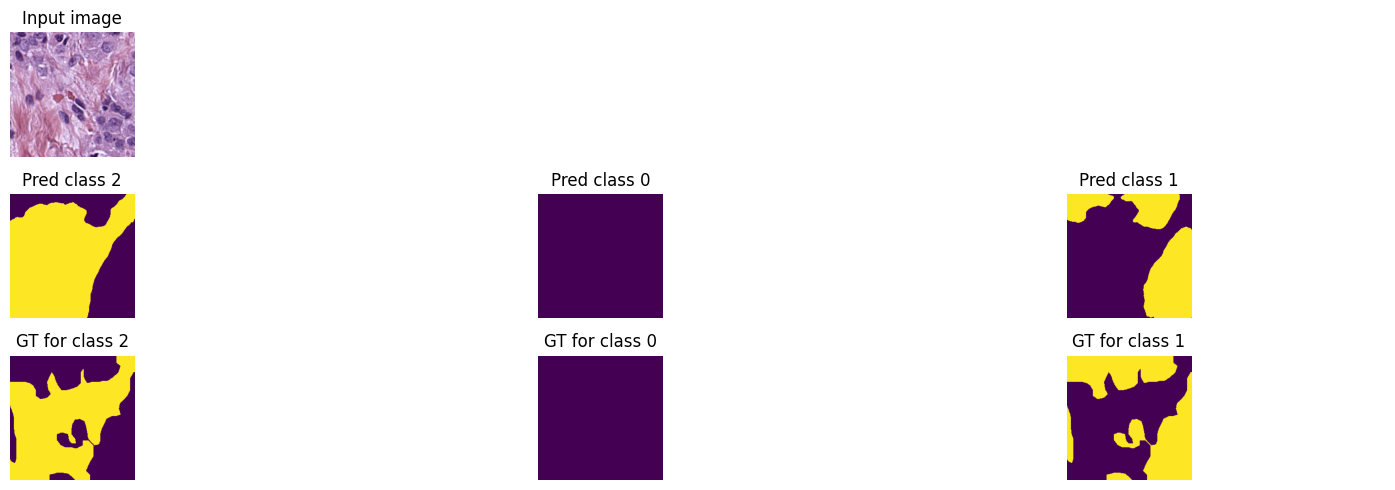

Train loss: 0.36747 | Time: 121m 5s | Val loss: 0.34275
Train_DICE_avg: 0.63681 | Train_Jaccard_avg: 0.57989 | Train_Sensitivity_avg: 0.73592 | Train_Specificity_avg: 0.85611 
Class 0 - Train_DICE: 0.62167 | Train_Jaccard: 0.57581 | Train_Sensitivity: 0.78679 | Train_Specificity: 0.86375 
Class 1 - Train_DICE: 0.75201 | Train_Jaccard: 0.70124 | Train_Sensitivity: 0.85485 | Train_Specificity: 0.83828 
Class 2 - Train_DICE: 0.53675 | Train_Jaccard: 0.46262 | Train_Sensitivity: 0.56611 | Train_Specificity: 0.86630 
Val_DICE_avg: 0.65926 | Val_Jaccard_avg: 0.60487 | Val_Sensitivity_avg: 0.75776 | Val_Specificity_avg: 0.82530 
Class 0 - Val_DICE: 0.65983 | Val_Jaccard: 0.61668 | Val_Sensitivity: 0.77894 | Val_Specificity: 0.86476 
Class 1 - Val_DICE: 0.76186 | Val_Jaccard: 0.71315 | Val_Sensitivity: 0.86830 | Val_Specificity: 0.77718 
Class 2 - Val_DICE: 0.55608 | Val_Jaccard: 0.48478 | Val_Sensitivity: 0.62603 | Val_Specificity: 0.83398 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.36491 | Time: 123m 16s | Val loss: 0.34115
Train_DICE_avg: 0.63857 | Train_Jaccard_avg: 0.58159 | Train_Sensitivity_avg: 0.73650 | Train_Specificity_avg: 0.85480 
Class 0 - Train_DICE: 0.62210 | Train_Jaccard: 0.57599 | Train_Sensitivity: 0.78616 | Train_Specificity: 0.86323 
Class 1 - Train_DICE: 0.75391 | Train_Jaccard: 0.70291 | Train_Sensitivity: 0.85279 | Train_Specificity: 0.83499 
Class 2 - Train_DICE: 0.53969 | Train_Jaccard: 0.46588 | Train_Sensitivity: 0.57054 | Train_Specificity: 0.86618 
Val_DICE_avg: 0.66029 | Val_Jaccard_avg: 0.60618 | Val_Sensitivity_avg: 0.76047 | Val_Specificity_avg: 0.83104 
Class 0 - Val_DICE: 0.66009 | Val_Jaccard: 0.61725 | Val_Sensitivity: 0.79105 | Val_Specificity: 0.86134 
Class 1 - Val_DICE: 0.76590 | Val_Jaccard: 0.71690 | Val_Sensitivity: 0.86132 | Val_Specificity: 0.79431 
Class 2 - Val_DICE: 0.55489 | Val_Jaccard: 0.48438 | Val_Sensitivity: 0.62904 | Val_Specificity: 0.83748 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.36611 | Time: 125m 27s | Val loss: 0.34185
Train_DICE_avg: 0.63713 | Train_Jaccard_avg: 0.58010 | Train_Sensitivity_avg: 0.73760 | Train_Specificity_avg: 0.85605 
Class 0 - Train_DICE: 0.62120 | Train_Jaccard: 0.57551 | Train_Sensitivity: 0.79230 | Train_Specificity: 0.85976 
Class 1 - Train_DICE: 0.75044 | Train_Jaccard: 0.69922 | Train_Sensitivity: 0.84911 | Train_Specificity: 0.84055 
Class 2 - Train_DICE: 0.53974 | Train_Jaccard: 0.46556 | Train_Sensitivity: 0.57138 | Train_Specificity: 0.86785 
Val_DICE_avg: 0.66012 | Val_Jaccard_avg: 0.60613 | Val_Sensitivity_avg: 0.76090 | Val_Specificity_avg: 0.84044 
Class 0 - Val_DICE: 0.66239 | Val_Jaccard: 0.61969 | Val_Sensitivity: 0.79777 | Val_Specificity: 0.86036 
Class 1 - Val_DICE: 0.76162 | Val_Jaccard: 0.71263 | Val_Sensitivity: 0.84733 | Val_Specificity: 0.82751 
Class 2 - Val_DICE: 0.55635 | Val_Jaccard: 0.48608 | Val_Sensitivity: 0.63761 | Val_Specificity: 0.83346 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.36331 | Time: 127m 38s | Val loss: 0.34076
Train_DICE_avg: 0.64056 | Train_Jaccard_avg: 0.58370 | Train_Sensitivity_avg: 0.74002 | Train_Specificity_avg: 0.85742 
Class 0 - Train_DICE: 0.62784 | Train_Jaccard: 0.58219 | Train_Sensitivity: 0.79626 | Train_Specificity: 0.86117 
Class 1 - Train_DICE: 0.75189 | Train_Jaccard: 0.70125 | Train_Sensitivity: 0.85896 | Train_Specificity: 0.84356 
Class 2 - Train_DICE: 0.54195 | Train_Jaccard: 0.46767 | Train_Sensitivity: 0.56483 | Train_Specificity: 0.86753 
Val_DICE_avg: 0.66081 | Val_Jaccard_avg: 0.60707 | Val_Sensitivity_avg: 0.76527 | Val_Specificity_avg: 0.84305 
Class 0 - Val_DICE: 0.66371 | Val_Jaccard: 0.62110 | Val_Sensitivity: 0.79852 | Val_Specificity: 0.86213 
Class 1 - Val_DICE: 0.76189 | Val_Jaccard: 0.71228 | Val_Sensitivity: 0.85434 | Val_Specificity: 0.82582 
Class 2 - Val_DICE: 0.55682 | Val_Jaccard: 0.48782 | Val_Sensitivity: 0.64295 | Val_Specificity: 0.84120 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.36090 | Time: 129m 50s | Val loss: 0.34026
Train_DICE_avg: 0.64265 | Train_Jaccard_avg: 0.58611 | Train_Sensitivity_avg: 0.74595 | Train_Specificity_avg: 0.85948 
Class 0 - Train_DICE: 0.63120 | Train_Jaccard: 0.58548 | Train_Sensitivity: 0.80654 | Train_Specificity: 0.86032 
Class 1 - Train_DICE: 0.75271 | Train_Jaccard: 0.70226 | Train_Sensitivity: 0.85444 | Train_Specificity: 0.85202 
Class 2 - Train_DICE: 0.54404 | Train_Jaccard: 0.47058 | Train_Sensitivity: 0.57685 | Train_Specificity: 0.86612 
Val_DICE_avg: 0.66051 | Val_Jaccard_avg: 0.60575 | Val_Sensitivity_avg: 0.75579 | Val_Specificity_avg: 0.84156 
Class 0 - Val_DICE: 0.66189 | Val_Jaccard: 0.61786 | Val_Sensitivity: 0.78059 | Val_Specificity: 0.86604 
Class 1 - Val_DICE: 0.76237 | Val_Jaccard: 0.71353 | Val_Sensitivity: 0.87200 | Val_Specificity: 0.81426 
Class 2 - Val_DICE: 0.55728 | Val_Jaccard: 0.48586 | Val_Sensitivity: 0.61478 | Val_Specificity: 0.84440 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


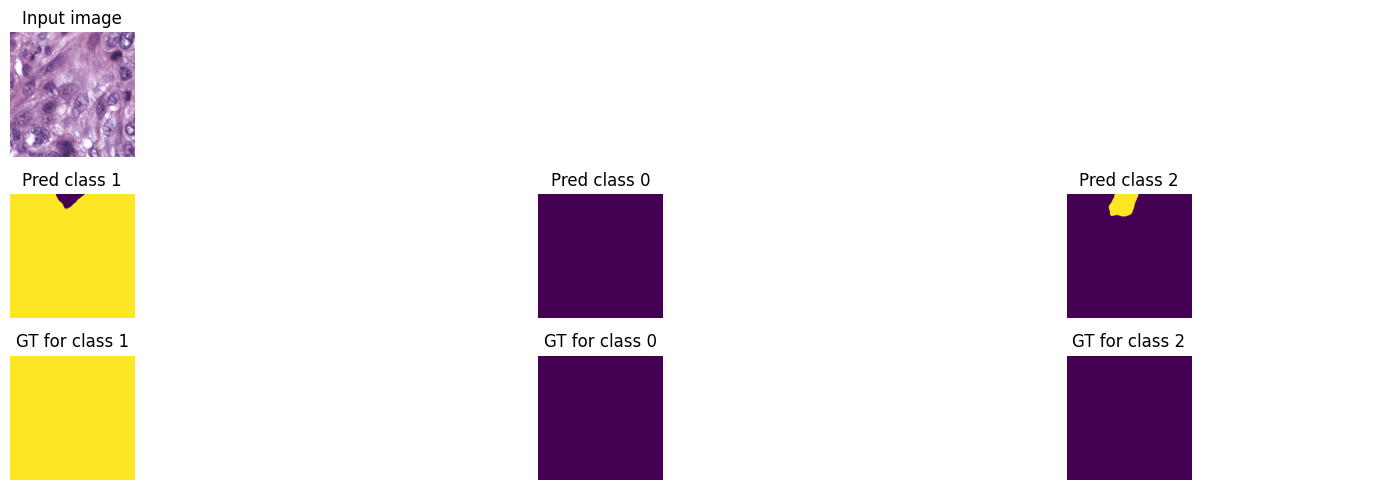

Train loss: 0.35998 | Time: 132m 2s | Val loss: 0.34410
Train_DICE_avg: 0.64392 | Train_Jaccard_avg: 0.58674 | Train_Sensitivity_avg: 0.73986 | Train_Specificity_avg: 0.86408 
Class 0 - Train_DICE: 0.62946 | Train_Jaccard: 0.58256 | Train_Sensitivity: 0.78320 | Train_Specificity: 0.86859 
Class 1 - Train_DICE: 0.75531 | Train_Jaccard: 0.70448 | Train_Sensitivity: 0.85442 | Train_Specificity: 0.85711 
Class 2 - Train_DICE: 0.54698 | Train_Jaccard: 0.47319 | Train_Sensitivity: 0.58196 | Train_Specificity: 0.86655 
Val_DICE_avg: 0.65798 | Val_Jaccard_avg: 0.60348 | Val_Sensitivity_avg: 0.75080 | Val_Specificity_avg: 0.83893 
Class 0 - Val_DICE: 0.65828 | Val_Jaccard: 0.61392 | Val_Sensitivity: 0.76864 | Val_Specificity: 0.86402 
Class 1 - Val_DICE: 0.76243 | Val_Jaccard: 0.71330 | Val_Sensitivity: 0.86740 | Val_Specificity: 0.80482 
Class 2 - Val_DICE: 0.55325 | Val_Jaccard: 0.48322 | Val_Sensitivity: 0.61635 | Val_Specificity: 0.84794 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 203MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:12<00:00,  2.48it/s]


Global Performance Metrics:
Loss mean: 0.33852, std: 0.05834
Dice Coefficient mean: 0.66909, std: 0.22778
Jaccard Index mean: 0.61399, std: 0.24347
Sensitivity mean: 0.77970, std: 0.19935
Specificity mean: 0.78815, std: 0.14973

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.67221, std: 0.39934
Jaccard mean: 0.62728, std: 0.40630
Sensitivity mean: 0.77303, std: 0.37231
Specificity mean: 0.82053, std: 0.31000

Class 1:
Dice mean: 0.76463, std: 0.34117
Jaccard mean: 0.71590, std: 0.35198
Sensitivity mean: 0.83210, std: 0.31544
Specificity mean: 0.80025, std: 0.33111

Class 2:
Dice mean: 0.57043, std: 0.38074
Jaccard mean: 0.49878, std: 0.37845
Sensitivity mean: 0.73398, std: 0.34641
Specificity mean: 0.74368, std: 0.30836


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-UNet-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.54 GB
GPU Memory - Reserved: 0.96 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


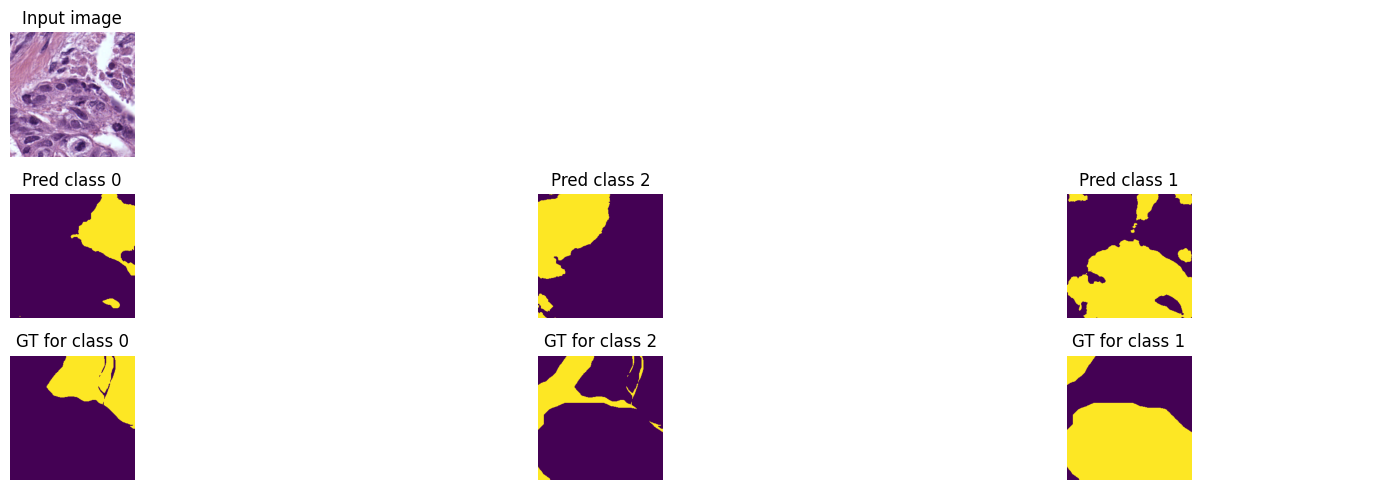

Train loss: 0.51935 | Time: 2m 7s | Val loss: 0.40435
Train_DICE_avg: 0.39964 | Train_Jaccard_avg: 0.33692 | Train_Sensitivity_avg: 0.62493 | Train_Specificity_avg: 0.73276 
Class 0 - Train_DICE: 0.36491 | Train_Jaccard: 0.31744 | Train_Sensitivity: 0.57658 | Train_Specificity: 0.80133 
Class 1 - Train_DICE: 0.48471 | Train_Jaccard: 0.41163 | Train_Sensitivity: 0.67804 | Train_Specificity: 0.67423 
Class 2 - Train_DICE: 0.34929 | Train_Jaccard: 0.28168 | Train_Sensitivity: 0.62018 | Train_Specificity: 0.72272 
Val_DICE_avg: 0.51746 | Val_Jaccard_avg: 0.45622 | Val_Sensitivity_avg: 0.70686 | Val_Specificity_avg: 0.73797 
Class 0 - Val_DICE: 0.46361 | Val_Jaccard: 0.41315 | Val_Sensitivity: 0.60303 | Val_Specificity: 0.81604 
Class 1 - Val_DICE: 0.62805 | Val_Jaccard: 0.56212 | Val_Sensitivity: 0.77082 | Val_Specificity: 0.66071 
Class 2 - Val_DICE: 0.46072 | Val_Jaccard: 0.39337 | Val_Sensitivity: 0.74672 | Val_Specificity: 0.73716 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.46188 | Time: 4m 15s | Val loss: 0.38740
Train_DICE_avg: 0.44421 | Train_Jaccard_avg: 0.38229 | Train_Sensitivity_avg: 0.69484 | Train_Specificity_avg: 0.73959 
Class 0 - Train_DICE: 0.42667 | Train_Jaccard: 0.38025 | Train_Sensitivity: 0.67949 | Train_Specificity: 0.80161 
Class 1 - Train_DICE: 0.53361 | Train_Jaccard: 0.46011 | Train_Sensitivity: 0.70610 | Train_Specificity: 0.69392 
Class 2 - Train_DICE: 0.37236 | Train_Jaccard: 0.30650 | Train_Sensitivity: 0.69893 | Train_Specificity: 0.72323 
Val_DICE_avg: 0.50511 | Val_Jaccard_avg: 0.45232 | Val_Sensitivity_avg: 0.77315 | Val_Specificity_avg: 0.73207 
Class 0 - Val_DICE: 0.50194 | Val_Jaccard: 0.45337 | Val_Sensitivity: 0.69330 | Val_Specificity: 0.81115 
Class 1 - Val_DICE: 0.63916 | Val_Jaccard: 0.57934 | Val_Sensitivity: 0.71559 | Val_Specificity: 0.68951 
Class 2 - Val_DICE: 0.37424 | Val_Jaccard: 0.32426 | Val_Sensitivity: 0.91056 | Val_Specificity: 0.69556 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.44045 | Time: 6m 22s | Val loss: 0.36738
Train_DICE_avg: 0.45609 | Train_Jaccard_avg: 0.39577 | Train_Sensitivity_avg: 0.72063 | Train_Specificity_avg: 0.74161 
Class 0 - Train_DICE: 0.44431 | Train_Jaccard: 0.39900 | Train_Sensitivity: 0.71592 | Train_Specificity: 0.80233 
Class 1 - Train_DICE: 0.54918 | Train_Jaccard: 0.47803 | Train_Sensitivity: 0.73079 | Train_Specificity: 0.69990 
Class 2 - Train_DICE: 0.37477 | Train_Jaccard: 0.31028 | Train_Sensitivity: 0.71518 | Train_Specificity: 0.72261 
Val_DICE_avg: 0.53270 | Val_Jaccard_avg: 0.48099 | Val_Sensitivity_avg: 0.81508 | Val_Specificity_avg: 0.73431 
Class 0 - Val_DICE: 0.54863 | Val_Jaccard: 0.50383 | Val_Sensitivity: 0.78293 | Val_Specificity: 0.80928 
Class 1 - Val_DICE: 0.66607 | Val_Jaccard: 0.60785 | Val_Sensitivity: 0.75734 | Val_Specificity: 0.69503 
Class 2 - Val_DICE: 0.38339 | Val_Jaccard: 0.33128 | Val_Sensitivity: 0.90499 | Val_Specificity: 0.69864 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.42794 | Time: 8m 28s | Val loss: 0.36784
Train_DICE_avg: 0.46595 | Train_Jaccard_avg: 0.40600 | Train_Sensitivity_avg: 0.73218 | Train_Specificity_avg: 0.74401 
Class 0 - Train_DICE: 0.45664 | Train_Jaccard: 0.41178 | Train_Sensitivity: 0.73303 | Train_Specificity: 0.80330 
Class 1 - Train_DICE: 0.56408 | Train_Jaccard: 0.49361 | Train_Sensitivity: 0.74174 | Train_Specificity: 0.70506 
Class 2 - Train_DICE: 0.37713 | Train_Jaccard: 0.31261 | Train_Sensitivity: 0.72177 | Train_Specificity: 0.72369 
Val_DICE_avg: 0.52472 | Val_Jaccard_avg: 0.47646 | Val_Sensitivity_avg: 0.82196 | Val_Specificity_avg: 0.73478 
Class 0 - Val_DICE: 0.55359 | Val_Jaccard: 0.51253 | Val_Sensitivity: 0.83320 | Val_Specificity: 0.80221 
Class 1 - Val_DICE: 0.66261 | Val_Jaccard: 0.60690 | Val_Sensitivity: 0.72716 | Val_Specificity: 0.70876 
Class 2 - Val_DICE: 0.35796 | Val_Jaccard: 0.30995 | Val_Sensitivity: 0.90551 | Val_Specificity: 0.69338 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.41836 | Time: 10m 35s | Val loss: 0.36241
Train_DICE_avg: 0.47557 | Train_Jaccard_avg: 0.41644 | Train_Sensitivity_avg: 0.73720 | Train_Specificity_avg: 0.74631 
Class 0 - Train_DICE: 0.46675 | Train_Jaccard: 0.42323 | Train_Sensitivity: 0.74817 | Train_Specificity: 0.80325 
Class 1 - Train_DICE: 0.57628 | Train_Jaccard: 0.50642 | Train_Sensitivity: 0.74369 | Train_Specificity: 0.70849 
Class 2 - Train_DICE: 0.38367 | Train_Jaccard: 0.31969 | Train_Sensitivity: 0.71974 | Train_Specificity: 0.72720 
Val_DICE_avg: 0.54083 | Val_Jaccard_avg: 0.49115 | Val_Sensitivity_avg: 0.81489 | Val_Specificity_avg: 0.74025 
Class 0 - Val_DICE: 0.55279 | Val_Jaccard: 0.51150 | Val_Sensitivity: 0.83040 | Val_Specificity: 0.80352 
Class 1 - Val_DICE: 0.67246 | Val_Jaccard: 0.61763 | Val_Sensitivity: 0.72431 | Val_Specificity: 0.71450 
Class 2 - Val_DICE: 0.39724 | Val_Jaccard: 0.34433 | Val_Sensitivity: 0.88995 | Val_Specificity: 0.70273 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


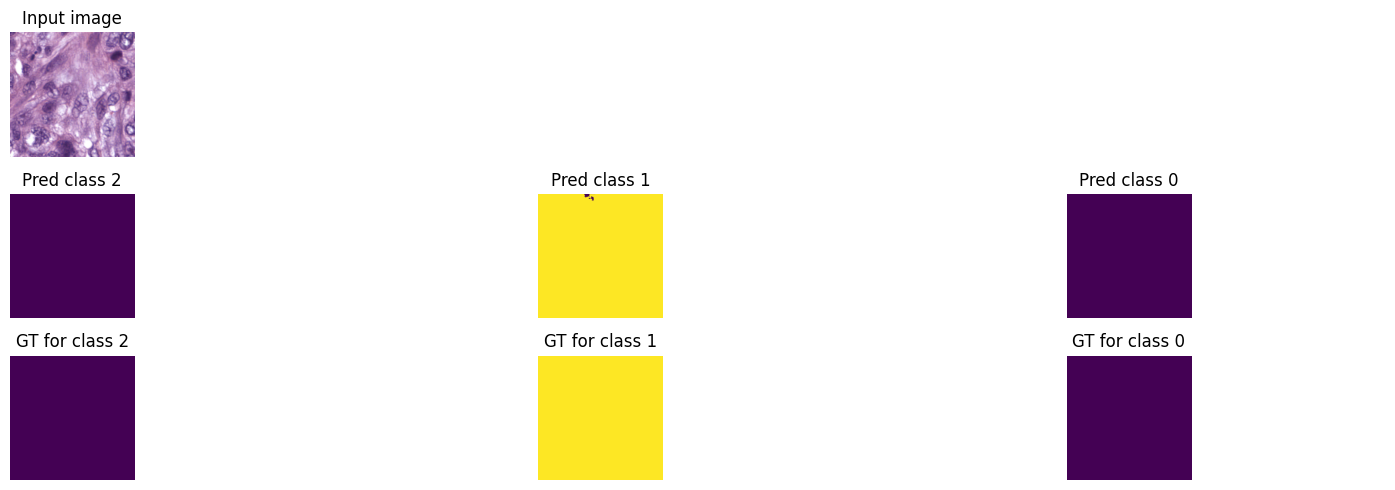

Train loss: 0.41093 | Time: 12m 43s | Val loss: 0.37324
Train_DICE_avg: 0.48434 | Train_Jaccard_avg: 0.42564 | Train_Sensitivity_avg: 0.74759 | Train_Specificity_avg: 0.74929 
Class 0 - Train_DICE: 0.47513 | Train_Jaccard: 0.43137 | Train_Sensitivity: 0.75751 | Train_Specificity: 0.80432 
Class 1 - Train_DICE: 0.58972 | Train_Jaccard: 0.52099 | Train_Sensitivity: 0.75442 | Train_Specificity: 0.71588 
Class 2 - Train_DICE: 0.38816 | Train_Jaccard: 0.32456 | Train_Sensitivity: 0.73085 | Train_Specificity: 0.72766 
Val_DICE_avg: 0.51909 | Val_Jaccard_avg: 0.47344 | Val_Sensitivity_avg: 0.81777 | Val_Specificity_avg: 0.73803 
Class 0 - Val_DICE: 0.57568 | Val_Jaccard: 0.53186 | Val_Sensitivity: 0.80752 | Val_Specificity: 0.81272 
Class 1 - Val_DICE: 0.65688 | Val_Jaccard: 0.60234 | Val_Sensitivity: 0.69098 | Val_Specificity: 0.71732 
Class 2 - Val_DICE: 0.32470 | Val_Jaccard: 0.28612 | Val_Sensitivity: 0.95480 | Val_Specificity: 0.68406 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.40616 | Time: 14m 50s | Val loss: 0.35546
Train_DICE_avg: 0.48834 | Train_Jaccard_avg: 0.42970 | Train_Sensitivity_avg: 0.75000 | Train_Specificity_avg: 0.74983 
Class 0 - Train_DICE: 0.47892 | Train_Jaccard: 0.43541 | Train_Sensitivity: 0.76308 | Train_Specificity: 0.80465 
Class 1 - Train_DICE: 0.59254 | Train_Jaccard: 0.52420 | Train_Sensitivity: 0.75603 | Train_Specificity: 0.71587 
Class 2 - Train_DICE: 0.39355 | Train_Jaccard: 0.32948 | Train_Sensitivity: 0.73089 | Train_Specificity: 0.72898 
Val_DICE_avg: 0.53575 | Val_Jaccard_avg: 0.48595 | Val_Sensitivity_avg: 0.81280 | Val_Specificity_avg: 0.74086 
Class 0 - Val_DICE: 0.55614 | Val_Jaccard: 0.51416 | Val_Sensitivity: 0.82448 | Val_Specificity: 0.80525 
Class 1 - Val_DICE: 0.66943 | Val_Jaccard: 0.61390 | Val_Sensitivity: 0.71940 | Val_Specificity: 0.71896 
Class 2 - Val_DICE: 0.38168 | Val_Jaccard: 0.32980 | Val_Sensitivity: 0.89451 | Val_Specificity: 0.69837 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.40042 | Time: 16m 57s | Val loss: 0.36661
Train_DICE_avg: 0.49288 | Train_Jaccard_avg: 0.43426 | Train_Sensitivity_avg: 0.74943 | Train_Specificity_avg: 0.75297 
Class 0 - Train_DICE: 0.48129 | Train_Jaccard: 0.43752 | Train_Sensitivity: 0.75842 | Train_Specificity: 0.80599 
Class 1 - Train_DICE: 0.59592 | Train_Jaccard: 0.52784 | Train_Sensitivity: 0.75398 | Train_Specificity: 0.72043 
Class 2 - Train_DICE: 0.40145 | Train_Jaccard: 0.33743 | Train_Sensitivity: 0.73590 | Train_Specificity: 0.73248 
Val_DICE_avg: 0.52374 | Val_Jaccard_avg: 0.47742 | Val_Sensitivity_avg: 0.81995 | Val_Specificity_avg: 0.73857 
Class 0 - Val_DICE: 0.56472 | Val_Jaccard: 0.52389 | Val_Sensitivity: 0.84903 | Val_Specificity: 0.80270 
Class 1 - Val_DICE: 0.65800 | Val_Jaccard: 0.60284 | Val_Sensitivity: 0.68589 | Val_Specificity: 0.72289 
Class 2 - Val_DICE: 0.34848 | Val_Jaccard: 0.30554 | Val_Sensitivity: 0.92494 | Val_Specificity: 0.69011 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.39584 | Time: 19m 5s | Val loss: 0.35537
Train_DICE_avg: 0.49608 | Train_Jaccard_avg: 0.43789 | Train_Sensitivity_avg: 0.75340 | Train_Specificity_avg: 0.75439 
Class 0 - Train_DICE: 0.48149 | Train_Jaccard: 0.43729 | Train_Sensitivity: 0.75685 | Train_Specificity: 0.80838 
Class 1 - Train_DICE: 0.60498 | Train_Jaccard: 0.53742 | Train_Sensitivity: 0.76216 | Train_Specificity: 0.72070 
Class 2 - Train_DICE: 0.40178 | Train_Jaccard: 0.33895 | Train_Sensitivity: 0.74120 | Train_Specificity: 0.73410 
Val_DICE_avg: 0.53305 | Val_Jaccard_avg: 0.48556 | Val_Sensitivity_avg: 0.81419 | Val_Specificity_avg: 0.74376 
Class 0 - Val_DICE: 0.57196 | Val_Jaccard: 0.53047 | Val_Sensitivity: 0.83038 | Val_Specificity: 0.80816 
Class 1 - Val_DICE: 0.65824 | Val_Jaccard: 0.60326 | Val_Sensitivity: 0.69160 | Val_Specificity: 0.72769 
Class 2 - Val_DICE: 0.36894 | Val_Jaccard: 0.32294 | Val_Sensitivity: 0.92060 | Val_Specificity: 0.69543 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.39142 | Time: 21m 12s | Val loss: 0.34914
Train_DICE_avg: 0.50222 | Train_Jaccard_avg: 0.44379 | Train_Sensitivity_avg: 0.75291 | Train_Specificity_avg: 0.75582 
Class 0 - Train_DICE: 0.48560 | Train_Jaccard: 0.44105 | Train_Sensitivity: 0.75561 | Train_Specificity: 0.80815 
Class 1 - Train_DICE: 0.61050 | Train_Jaccard: 0.54316 | Train_Sensitivity: 0.76095 | Train_Specificity: 0.72374 
Class 2 - Train_DICE: 0.41058 | Train_Jaccard: 0.34715 | Train_Sensitivity: 0.74218 | Train_Specificity: 0.73557 
Val_DICE_avg: 0.53636 | Val_Jaccard_avg: 0.48828 | Val_Sensitivity_avg: 0.82292 | Val_Specificity_avg: 0.74176 
Class 0 - Val_DICE: 0.57816 | Val_Jaccard: 0.53619 | Val_Sensitivity: 0.84222 | Val_Specificity: 0.80768 
Class 1 - Val_DICE: 0.66818 | Val_Jaccard: 0.61224 | Val_Sensitivity: 0.71511 | Val_Specificity: 0.72265 
Class 2 - Val_DICE: 0.36275 | Val_Jaccard: 0.31643 | Val_Sensitivity: 0.91144 | Val_Specificity: 0.69494 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


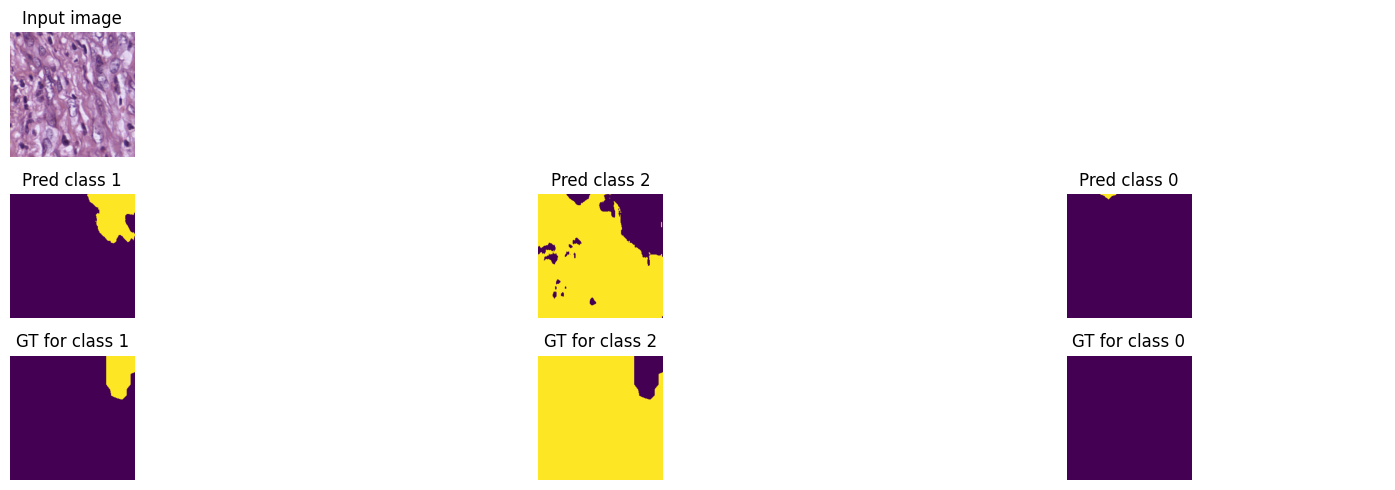

Train loss: 0.38702 | Time: 23m 23s | Val loss: 0.33601
Train_DICE_avg: 0.50549 | Train_Jaccard_avg: 0.44691 | Train_Sensitivity_avg: 0.75199 | Train_Specificity_avg: 0.75807 
Class 0 - Train_DICE: 0.48994 | Train_Jaccard: 0.44508 | Train_Sensitivity: 0.75802 | Train_Specificity: 0.80986 
Class 1 - Train_DICE: 0.61195 | Train_Jaccard: 0.54531 | Train_Sensitivity: 0.75861 | Train_Specificity: 0.72763 
Class 2 - Train_DICE: 0.41457 | Train_Jaccard: 0.35032 | Train_Sensitivity: 0.73936 | Train_Specificity: 0.73671 
Val_DICE_avg: 0.55156 | Val_Jaccard_avg: 0.50046 | Val_Sensitivity_avg: 0.81199 | Val_Specificity_avg: 0.74642 
Class 0 - Val_DICE: 0.56984 | Val_Jaccard: 0.52611 | Val_Sensitivity: 0.79999 | Val_Specificity: 0.81360 
Class 1 - Val_DICE: 0.67409 | Val_Jaccard: 0.61759 | Val_Sensitivity: 0.74072 | Val_Specificity: 0.71764 
Class 2 - Val_DICE: 0.41077 | Val_Jaccard: 0.35766 | Val_Sensitivity: 0.89527 | Val_Specificity: 0.70802 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.37902 | Time: 25m 34s | Val loss: 0.33398
Train_DICE_avg: 0.51372 | Train_Jaccard_avg: 0.45551 | Train_Sensitivity_avg: 0.75518 | Train_Specificity_avg: 0.76188 
Class 0 - Train_DICE: 0.49328 | Train_Jaccard: 0.44815 | Train_Sensitivity: 0.75462 | Train_Specificity: 0.81230 
Class 1 - Train_DICE: 0.62544 | Train_Jaccard: 0.55979 | Train_Sensitivity: 0.76850 | Train_Specificity: 0.73194 
Class 2 - Train_DICE: 0.42245 | Train_Jaccard: 0.35859 | Train_Sensitivity: 0.74241 | Train_Specificity: 0.74140 
Val_DICE_avg: 0.55416 | Val_Jaccard_avg: 0.50373 | Val_Sensitivity_avg: 0.81563 | Val_Specificity_avg: 0.74750 
Class 0 - Val_DICE: 0.58287 | Val_Jaccard: 0.54009 | Val_Sensitivity: 0.81673 | Val_Specificity: 0.81446 
Class 1 - Val_DICE: 0.67907 | Val_Jaccard: 0.62310 | Val_Sensitivity: 0.73692 | Val_Specificity: 0.72451 
Class 2 - Val_DICE: 0.40055 | Val_Jaccard: 0.34802 | Val_Sensitivity: 0.89324 | Val_Specificity: 0.70354 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.37470 | Time: 27m 45s | Val loss: 0.32994
Train_DICE_avg: 0.52105 | Train_Jaccard_avg: 0.46292 | Train_Sensitivity_avg: 0.75968 | Train_Specificity_avg: 0.76387 
Class 0 - Train_DICE: 0.50197 | Train_Jaccard: 0.45724 | Train_Sensitivity: 0.76369 | Train_Specificity: 0.81427 
Class 1 - Train_DICE: 0.63465 | Train_Jaccard: 0.56913 | Train_Sensitivity: 0.77527 | Train_Specificity: 0.73375 
Class 2 - Train_DICE: 0.42655 | Train_Jaccard: 0.36240 | Train_Sensitivity: 0.74008 | Train_Specificity: 0.74360 
Val_DICE_avg: 0.56069 | Val_Jaccard_avg: 0.50937 | Val_Sensitivity_avg: 0.82089 | Val_Specificity_avg: 0.74823 
Class 0 - Val_DICE: 0.58236 | Val_Jaccard: 0.53959 | Val_Sensitivity: 0.83021 | Val_Specificity: 0.80966 
Class 1 - Val_DICE: 0.67307 | Val_Jaccard: 0.61664 | Val_Sensitivity: 0.73674 | Val_Specificity: 0.72129 
Class 2 - Val_DICE: 0.42663 | Val_Jaccard: 0.37189 | Val_Sensitivity: 0.89572 | Val_Specificity: 0.71372 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.36989 | Time: 29m 55s | Val loss: 0.31596
Train_DICE_avg: 0.52665 | Train_Jaccard_avg: 0.46863 | Train_Sensitivity_avg: 0.76145 | Train_Specificity_avg: 0.76666 
Class 0 - Train_DICE: 0.50349 | Train_Jaccard: 0.45851 | Train_Sensitivity: 0.76199 | Train_Specificity: 0.81539 
Class 1 - Train_DICE: 0.64140 | Train_Jaccard: 0.57716 | Train_Sensitivity: 0.78101 | Train_Specificity: 0.73815 
Class 2 - Train_DICE: 0.43507 | Train_Jaccard: 0.37022 | Train_Sensitivity: 0.74136 | Train_Specificity: 0.74644 
Val_DICE_avg: 0.58148 | Val_Jaccard_avg: 0.52692 | Val_Sensitivity_avg: 0.81500 | Val_Specificity_avg: 0.75063 
Class 0 - Val_DICE: 0.58493 | Val_Jaccard: 0.54111 | Val_Sensitivity: 0.82210 | Val_Specificity: 0.81250 
Class 1 - Val_DICE: 0.68479 | Val_Jaccard: 0.62637 | Val_Sensitivity: 0.77821 | Val_Specificity: 0.70481 
Class 2 - Val_DICE: 0.47470 | Val_Jaccard: 0.41329 | Val_Sensitivity: 0.84470 | Val_Specificity: 0.73457 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.36491 | Time: 32m 6s | Val loss: 0.31036
Train_DICE_avg: 0.53233 | Train_Jaccard_avg: 0.47394 | Train_Sensitivity_avg: 0.76047 | Train_Specificity_avg: 0.76841 
Class 0 - Train_DICE: 0.50999 | Train_Jaccard: 0.46466 | Train_Sensitivity: 0.75976 | Train_Specificity: 0.81661 
Class 1 - Train_DICE: 0.64726 | Train_Jaccard: 0.58286 | Train_Sensitivity: 0.78265 | Train_Specificity: 0.73975 
Class 2 - Train_DICE: 0.43973 | Train_Jaccard: 0.37431 | Train_Sensitivity: 0.73899 | Train_Specificity: 0.74888 
Val_DICE_avg: 0.58276 | Val_Jaccard_avg: 0.52796 | Val_Sensitivity_avg: 0.80279 | Val_Specificity_avg: 0.75313 
Class 0 - Val_DICE: 0.58485 | Val_Jaccard: 0.54046 | Val_Sensitivity: 0.79891 | Val_Specificity: 0.81868 
Class 1 - Val_DICE: 0.68748 | Val_Jaccard: 0.62913 | Val_Sensitivity: 0.78403 | Val_Specificity: 0.70301 
Class 2 - Val_DICE: 0.47597 | Val_Jaccard: 0.41429 | Val_Sensitivity: 0.82542 | Val_Specificity: 0.73769 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


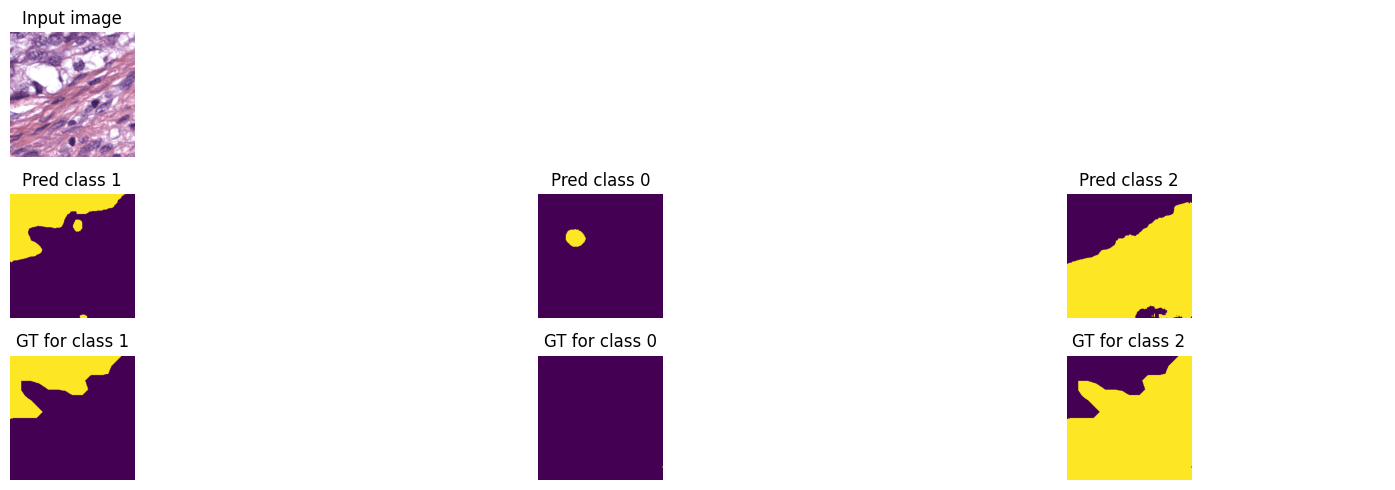

Train loss: 0.35906 | Time: 34m 18s | Val loss: 0.30708
Train_DICE_avg: 0.53885 | Train_Jaccard_avg: 0.48056 | Train_Sensitivity_avg: 0.76514 | Train_Specificity_avg: 0.77075 
Class 0 - Train_DICE: 0.51385 | Train_Jaccard: 0.46829 | Train_Sensitivity: 0.76133 | Train_Specificity: 0.81756 
Class 1 - Train_DICE: 0.65077 | Train_Jaccard: 0.58729 | Train_Sensitivity: 0.78906 | Train_Specificity: 0.74097 
Class 2 - Train_DICE: 0.45192 | Train_Jaccard: 0.38611 | Train_Sensitivity: 0.74504 | Train_Specificity: 0.75373 
Val_DICE_avg: 0.58700 | Val_Jaccard_avg: 0.53024 | Val_Sensitivity_avg: 0.78578 | Val_Specificity_avg: 0.75688 
Class 0 - Val_DICE: 0.57741 | Val_Jaccard: 0.53108 | Val_Sensitivity: 0.75562 | Val_Specificity: 0.82518 
Class 1 - Val_DICE: 0.69694 | Val_Jaccard: 0.63725 | Val_Sensitivity: 0.80299 | Val_Specificity: 0.70108 
Class 2 - Val_DICE: 0.48664 | Val_Jaccard: 0.42240 | Val_Sensitivity: 0.79871 | Val_Specificity: 0.74438 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.35588 | Time: 36m 29s | Val loss: 0.30464
Train_DICE_avg: 0.54335 | Train_Jaccard_avg: 0.48554 | Train_Sensitivity_avg: 0.76812 | Train_Specificity_avg: 0.77219 
Class 0 - Train_DICE: 0.51723 | Train_Jaccard: 0.47203 | Train_Sensitivity: 0.76420 | Train_Specificity: 0.81835 
Class 1 - Train_DICE: 0.65741 | Train_Jaccard: 0.59423 | Train_Sensitivity: 0.79554 | Train_Specificity: 0.74373 
Class 2 - Train_DICE: 0.45541 | Train_Jaccard: 0.39034 | Train_Sensitivity: 0.74461 | Train_Specificity: 0.75449 
Val_DICE_avg: 0.58874 | Val_Jaccard_avg: 0.53232 | Val_Sensitivity_avg: 0.78699 | Val_Specificity_avg: 0.75712 
Class 0 - Val_DICE: 0.58011 | Val_Jaccard: 0.53526 | Val_Sensitivity: 0.78411 | Val_Specificity: 0.82115 
Class 1 - Val_DICE: 0.69139 | Val_Jaccard: 0.63187 | Val_Sensitivity: 0.80144 | Val_Specificity: 0.69799 
Class 2 - Val_DICE: 0.49474 | Val_Jaccard: 0.42982 | Val_Sensitivity: 0.77542 | Val_Specificity: 0.75223 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.34887 | Time: 38m 40s | Val loss: 0.30328
Train_DICE_avg: 0.55012 | Train_Jaccard_avg: 0.49228 | Train_Sensitivity_avg: 0.77085 | Train_Specificity_avg: 0.77485 
Class 0 - Train_DICE: 0.52134 | Train_Jaccard: 0.47658 | Train_Sensitivity: 0.76234 | Train_Specificity: 0.82029 
Class 1 - Train_DICE: 0.66395 | Train_Jaccard: 0.60112 | Train_Sensitivity: 0.80176 | Train_Specificity: 0.74603 
Class 2 - Train_DICE: 0.46507 | Train_Jaccard: 0.39915 | Train_Sensitivity: 0.74846 | Train_Specificity: 0.75823 
Val_DICE_avg: 0.59045 | Val_Jaccard_avg: 0.53328 | Val_Sensitivity_avg: 0.78115 | Val_Specificity_avg: 0.76133 
Class 0 - Val_DICE: 0.57769 | Val_Jaccard: 0.53191 | Val_Sensitivity: 0.76793 | Val_Specificity: 0.82508 
Class 1 - Val_DICE: 0.69596 | Val_Jaccard: 0.63593 | Val_Sensitivity: 0.81251 | Val_Specificity: 0.69798 
Class 2 - Val_DICE: 0.49769 | Val_Jaccard: 0.43200 | Val_Sensitivity: 0.76301 | Val_Specificity: 0.76093 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.34329 | Time: 40m 51s | Val loss: 0.30469
Train_DICE_avg: 0.55346 | Train_Jaccard_avg: 0.49560 | Train_Sensitivity_avg: 0.77061 | Train_Specificity_avg: 0.77807 
Class 0 - Train_DICE: 0.52706 | Train_Jaccard: 0.48129 | Train_Sensitivity: 0.76415 | Train_Specificity: 0.82164 
Class 1 - Train_DICE: 0.66453 | Train_Jaccard: 0.60280 | Train_Sensitivity: 0.79985 | Train_Specificity: 0.75150 
Class 2 - Train_DICE: 0.46880 | Train_Jaccard: 0.40272 | Train_Sensitivity: 0.74784 | Train_Specificity: 0.76107 
Val_DICE_avg: 0.58524 | Val_Jaccard_avg: 0.52675 | Val_Sensitivity_avg: 0.76924 | Val_Specificity_avg: 0.76003 
Class 0 - Val_DICE: 0.56905 | Val_Jaccard: 0.52256 | Val_Sensitivity: 0.77095 | Val_Specificity: 0.82074 
Class 1 - Val_DICE: 0.69786 | Val_Jaccard: 0.63607 | Val_Sensitivity: 0.83061 | Val_Specificity: 0.68841 
Class 2 - Val_DICE: 0.48881 | Val_Jaccard: 0.42163 | Val_Sensitivity: 0.70615 | Val_Specificity: 0.77094 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.34014 | Time: 43m 3s | Val loss: 0.30127
Train_DICE_avg: 0.55607 | Train_Jaccard_avg: 0.49836 | Train_Sensitivity_avg: 0.77202 | Train_Specificity_avg: 0.77811 
Class 0 - Train_DICE: 0.52865 | Train_Jaccard: 0.48324 | Train_Sensitivity: 0.76408 | Train_Specificity: 0.82331 
Class 1 - Train_DICE: 0.66608 | Train_Jaccard: 0.60404 | Train_Sensitivity: 0.80032 | Train_Specificity: 0.74891 
Class 2 - Train_DICE: 0.47349 | Train_Jaccard: 0.40778 | Train_Sensitivity: 0.75166 | Train_Specificity: 0.76211 
Val_DICE_avg: 0.59379 | Val_Jaccard_avg: 0.53694 | Val_Sensitivity_avg: 0.78561 | Val_Specificity_avg: 0.76154 
Class 0 - Val_DICE: 0.58926 | Val_Jaccard: 0.54379 | Val_Sensitivity: 0.78436 | Val_Specificity: 0.82492 
Class 1 - Val_DICE: 0.69105 | Val_Jaccard: 0.63126 | Val_Sensitivity: 0.80981 | Val_Specificity: 0.69759 
Class 2 - Val_DICE: 0.50106 | Val_Jaccard: 0.43577 | Val_Sensitivity: 0.76266 | Val_Specificity: 0.76212 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


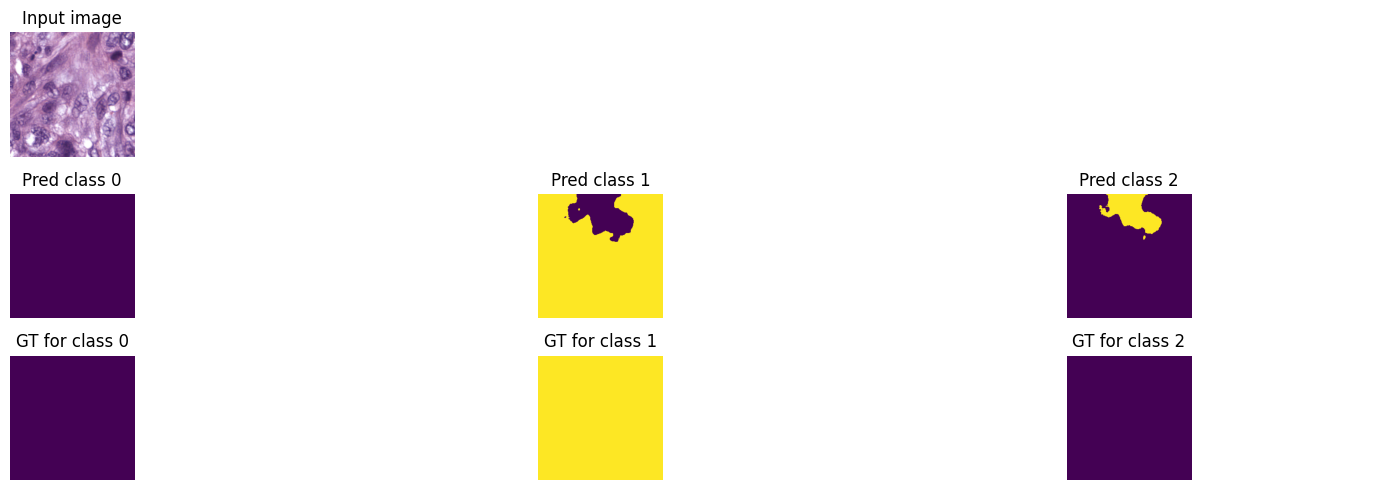

Train loss: 0.33896 | Time: 45m 16s | Val loss: 0.29906
Train_DICE_avg: 0.55795 | Train_Jaccard_avg: 0.50096 | Train_Sensitivity_avg: 0.77703 | Train_Specificity_avg: 0.77935 
Class 0 - Train_DICE: 0.53114 | Train_Jaccard: 0.48629 | Train_Sensitivity: 0.76926 | Train_Specificity: 0.82223 
Class 1 - Train_DICE: 0.66665 | Train_Jaccard: 0.60582 | Train_Sensitivity: 0.80768 | Train_Specificity: 0.75246 
Class 2 - Train_DICE: 0.47607 | Train_Jaccard: 0.41078 | Train_Sensitivity: 0.75416 | Train_Specificity: 0.76335 
Val_DICE_avg: 0.58809 | Val_Jaccard_avg: 0.53081 | Val_Sensitivity_avg: 0.77543 | Val_Specificity_avg: 0.76209 
Class 0 - Val_DICE: 0.57363 | Val_Jaccard: 0.52618 | Val_Sensitivity: 0.73019 | Val_Specificity: 0.83059 
Class 1 - Val_DICE: 0.69929 | Val_Jaccard: 0.63956 | Val_Sensitivity: 0.82968 | Val_Specificity: 0.69788 
Class 2 - Val_DICE: 0.49136 | Val_Jaccard: 0.42669 | Val_Sensitivity: 0.76643 | Val_Specificity: 0.75780 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.32862 | Time: 47m 28s | Val loss: 0.29908
Train_DICE_avg: 0.57177 | Train_Jaccard_avg: 0.51493 | Train_Sensitivity_avg: 0.78311 | Train_Specificity_avg: 0.78385 
Class 0 - Train_DICE: 0.54276 | Train_Jaccard: 0.49753 | Train_Sensitivity: 0.77117 | Train_Specificity: 0.82570 
Class 1 - Train_DICE: 0.68301 | Train_Jaccard: 0.62301 | Train_Sensitivity: 0.81519 | Train_Specificity: 0.75950 
Class 2 - Train_DICE: 0.48953 | Train_Jaccard: 0.42424 | Train_Sensitivity: 0.76296 | Train_Specificity: 0.76635 
Val_DICE_avg: 0.59427 | Val_Jaccard_avg: 0.53808 | Val_Sensitivity_avg: 0.78569 | Val_Specificity_avg: 0.76224 
Class 0 - Val_DICE: 0.59602 | Val_Jaccard: 0.55014 | Val_Sensitivity: 0.77893 | Val_Specificity: 0.82787 
Class 1 - Val_DICE: 0.68937 | Val_Jaccard: 0.63013 | Val_Sensitivity: 0.78884 | Val_Specificity: 0.70230 
Class 2 - Val_DICE: 0.49741 | Val_Jaccard: 0.43397 | Val_Sensitivity: 0.78929 | Val_Specificity: 0.75654 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.32366 | Time: 49m 41s | Val loss: 0.29671
Train_DICE_avg: 0.57519 | Train_Jaccard_avg: 0.51832 | Train_Sensitivity_avg: 0.78565 | Train_Specificity_avg: 0.78662 
Class 0 - Train_DICE: 0.54523 | Train_Jaccard: 0.50026 | Train_Sensitivity: 0.77560 | Train_Specificity: 0.82669 
Class 1 - Train_DICE: 0.68880 | Train_Jaccard: 0.62870 | Train_Sensitivity: 0.81991 | Train_Specificity: 0.76543 
Class 2 - Train_DICE: 0.49154 | Train_Jaccard: 0.42599 | Train_Sensitivity: 0.76144 | Train_Specificity: 0.76775 
Val_DICE_avg: 0.59558 | Val_Jaccard_avg: 0.53779 | Val_Sensitivity_avg: 0.78015 | Val_Specificity_avg: 0.76273 
Class 0 - Val_DICE: 0.58523 | Val_Jaccard: 0.53929 | Val_Sensitivity: 0.77096 | Val_Specificity: 0.82578 
Class 1 - Val_DICE: 0.70530 | Val_Jaccard: 0.64441 | Val_Sensitivity: 0.83600 | Val_Specificity: 0.69473 
Class 2 - Val_DICE: 0.49622 | Val_Jaccard: 0.42968 | Val_Sensitivity: 0.73347 | Val_Specificity: 0.76769 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.31996 | Time: 51m 54s | Val loss: 0.29795
Train_DICE_avg: 0.57542 | Train_Jaccard_avg: 0.51902 | Train_Sensitivity_avg: 0.78985 | Train_Specificity_avg: 0.78759 
Class 0 - Train_DICE: 0.54896 | Train_Jaccard: 0.50355 | Train_Sensitivity: 0.78010 | Train_Specificity: 0.82779 
Class 1 - Train_DICE: 0.68398 | Train_Jaccard: 0.62480 | Train_Sensitivity: 0.81766 | Train_Specificity: 0.76627 
Class 2 - Train_DICE: 0.49333 | Train_Jaccard: 0.42870 | Train_Sensitivity: 0.77178 | Train_Specificity: 0.76871 
Val_DICE_avg: 0.59386 | Val_Jaccard_avg: 0.53607 | Val_Sensitivity_avg: 0.78197 | Val_Specificity_avg: 0.76087 
Class 0 - Val_DICE: 0.58210 | Val_Jaccard: 0.53528 | Val_Sensitivity: 0.75477 | Val_Specificity: 0.82754 
Class 1 - Val_DICE: 0.70220 | Val_Jaccard: 0.64138 | Val_Sensitivity: 0.83393 | Val_Specificity: 0.69237 
Class 2 - Val_DICE: 0.49730 | Val_Jaccard: 0.43156 | Val_Sensitivity: 0.75721 | Val_Specificity: 0.76270 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.31479 | Time: 54m 7s | Val loss: 0.29580
Train_DICE_avg: 0.58380 | Train_Jaccard_avg: 0.52761 | Train_Sensitivity_avg: 0.79339 | Train_Specificity_avg: 0.78959 
Class 0 - Train_DICE: 0.56369 | Train_Jaccard: 0.51852 | Train_Sensitivity: 0.78876 | Train_Specificity: 0.82939 
Class 1 - Train_DICE: 0.68756 | Train_Jaccard: 0.62922 | Train_Sensitivity: 0.81887 | Train_Specificity: 0.76641 
Class 2 - Train_DICE: 0.50014 | Train_Jaccard: 0.43510 | Train_Sensitivity: 0.77254 | Train_Specificity: 0.77297 
Val_DICE_avg: 0.59233 | Val_Jaccard_avg: 0.53537 | Val_Sensitivity_avg: 0.78633 | Val_Specificity_avg: 0.76346 
Class 0 - Val_DICE: 0.58005 | Val_Jaccard: 0.53276 | Val_Sensitivity: 0.73130 | Val_Specificity: 0.83368 
Class 1 - Val_DICE: 0.70814 | Val_Jaccard: 0.64813 | Val_Sensitivity: 0.83663 | Val_Specificity: 0.70127 
Class 2 - Val_DICE: 0.48879 | Val_Jaccard: 0.42522 | Val_Sensitivity: 0.79107 | Val_Specificity: 0.75542 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


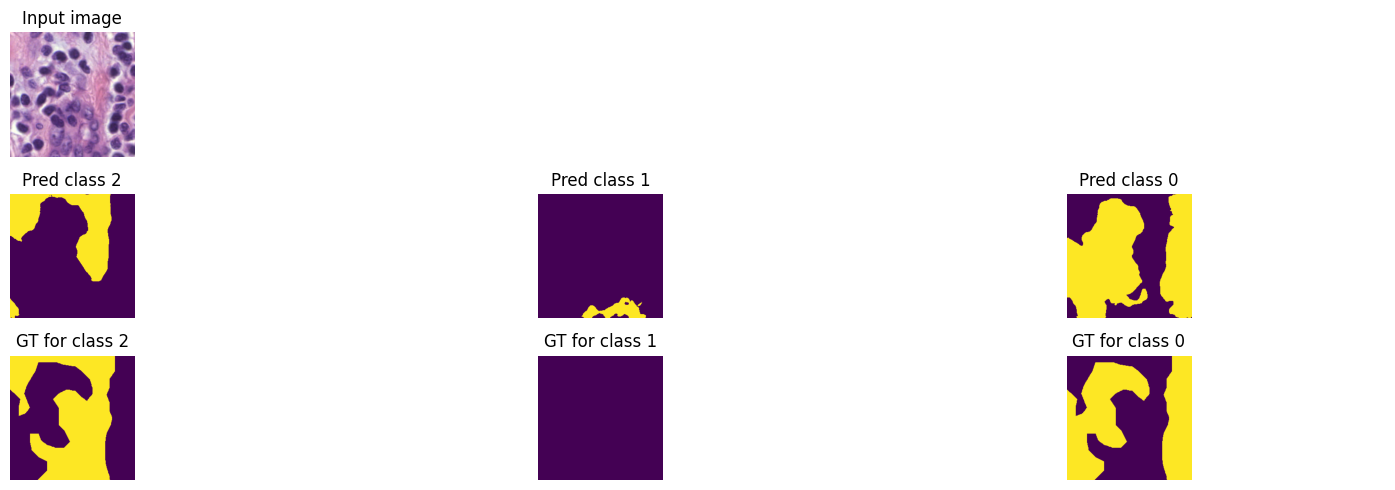

Train loss: 0.30962 | Time: 56m 21s | Val loss: 0.29502
Train_DICE_avg: 0.58641 | Train_Jaccard_avg: 0.53086 | Train_Sensitivity_avg: 0.79802 | Train_Specificity_avg: 0.79271 
Class 0 - Train_DICE: 0.56108 | Train_Jaccard: 0.51672 | Train_Sensitivity: 0.78801 | Train_Specificity: 0.83209 
Class 1 - Train_DICE: 0.69604 | Train_Jaccard: 0.63798 | Train_Sensitivity: 0.82557 | Train_Specificity: 0.77292 
Class 2 - Train_DICE: 0.50212 | Train_Jaccard: 0.43790 | Train_Sensitivity: 0.78048 | Train_Specificity: 0.77311 
Val_DICE_avg: 0.59610 | Val_Jaccard_avg: 0.53887 | Val_Sensitivity_avg: 0.79411 | Val_Specificity_avg: 0.76092 
Class 0 - Val_DICE: 0.58903 | Val_Jaccard: 0.54358 | Val_Sensitivity: 0.77113 | Val_Specificity: 0.82801 
Class 1 - Val_DICE: 0.70729 | Val_Jaccard: 0.64643 | Val_Sensitivity: 0.85425 | Val_Specificity: 0.69075 
Class 2 - Val_DICE: 0.49196 | Val_Jaccard: 0.42661 | Val_Sensitivity: 0.75696 | Val_Specificity: 0.76402 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.30558 | Time: 58m 34s | Val loss: 0.29639
Train_DICE_avg: 0.58803 | Train_Jaccard_avg: 0.53248 | Train_Sensitivity_avg: 0.79887 | Train_Specificity_avg: 0.79436 
Class 0 - Train_DICE: 0.56636 | Train_Jaccard: 0.52208 | Train_Sensitivity: 0.79501 | Train_Specificity: 0.83255 
Class 1 - Train_DICE: 0.69035 | Train_Jaccard: 0.63253 | Train_Sensitivity: 0.82135 | Train_Specificity: 0.77327 
Class 2 - Train_DICE: 0.50740 | Train_Jaccard: 0.44285 | Train_Sensitivity: 0.78024 | Train_Specificity: 0.77727 
Val_DICE_avg: 0.59577 | Val_Jaccard_avg: 0.53819 | Val_Sensitivity_avg: 0.79026 | Val_Specificity_avg: 0.76248 
Class 0 - Val_DICE: 0.59206 | Val_Jaccard: 0.54744 | Val_Sensitivity: 0.79650 | Val_Specificity: 0.82488 
Class 1 - Val_DICE: 0.70066 | Val_Jaccard: 0.63924 | Val_Sensitivity: 0.84051 | Val_Specificity: 0.69450 
Class 2 - Val_DICE: 0.49460 | Val_Jaccard: 0.42790 | Val_Sensitivity: 0.73378 | Val_Specificity: 0.76807 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.29893 | Time: 60m 48s | Val loss: 0.29181
Train_DICE_avg: 0.59507 | Train_Jaccard_avg: 0.54009 | Train_Sensitivity_avg: 0.80423 | Train_Specificity_avg: 0.79909 
Class 0 - Train_DICE: 0.57124 | Train_Jaccard: 0.52690 | Train_Sensitivity: 0.79657 | Train_Specificity: 0.83498 
Class 1 - Train_DICE: 0.70133 | Train_Jaccard: 0.64434 | Train_Sensitivity: 0.82774 | Train_Specificity: 0.78203 
Class 2 - Train_DICE: 0.51263 | Train_Jaccard: 0.44903 | Train_Sensitivity: 0.78839 | Train_Specificity: 0.78027 
Val_DICE_avg: 0.60192 | Val_Jaccard_avg: 0.54459 | Val_Sensitivity_avg: 0.79245 | Val_Specificity_avg: 0.76490 
Class 0 - Val_DICE: 0.59186 | Val_Jaccard: 0.54484 | Val_Sensitivity: 0.74768 | Val_Specificity: 0.83728 
Class 1 - Val_DICE: 0.71829 | Val_Jaccard: 0.65900 | Val_Sensitivity: 0.85669 | Val_Specificity: 0.69781 
Class 2 - Val_DICE: 0.49562 | Val_Jaccard: 0.42993 | Val_Sensitivity: 0.77299 | Val_Specificity: 0.75962 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.29488 | Time: 63m 2s | Val loss: 0.29620
Train_DICE_avg: 0.60000 | Train_Jaccard_avg: 0.54487 | Train_Sensitivity_avg: 0.80432 | Train_Specificity_avg: 0.79941 
Class 0 - Train_DICE: 0.57899 | Train_Jaccard: 0.53498 | Train_Sensitivity: 0.80033 | Train_Specificity: 0.83584 
Class 1 - Train_DICE: 0.70480 | Train_Jaccard: 0.64812 | Train_Sensitivity: 0.83055 | Train_Specificity: 0.78217 
Class 2 - Train_DICE: 0.51620 | Train_Jaccard: 0.45151 | Train_Sensitivity: 0.78207 | Train_Specificity: 0.78021 
Val_DICE_avg: 0.60076 | Val_Jaccard_avg: 0.54260 | Val_Sensitivity_avg: 0.78208 | Val_Specificity_avg: 0.76630 
Class 0 - Val_DICE: 0.59279 | Val_Jaccard: 0.54527 | Val_Sensitivity: 0.73711 | Val_Specificity: 0.83794 
Class 1 - Val_DICE: 0.71879 | Val_Jaccard: 0.65921 | Val_Sensitivity: 0.86260 | Val_Specificity: 0.69891 
Class 2 - Val_DICE: 0.49071 | Val_Jaccard: 0.42332 | Val_Sensitivity: 0.74652 | Val_Specificity: 0.76204 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.28945 | Time: 65m 16s | Val loss: 0.29511
Train_DICE_avg: 0.60425 | Train_Jaccard_avg: 0.54929 | Train_Sensitivity_avg: 0.80819 | Train_Specificity_avg: 0.80258 
Class 0 - Train_DICE: 0.58437 | Train_Jaccard: 0.53941 | Train_Sensitivity: 0.80326 | Train_Specificity: 0.83808 
Class 1 - Train_DICE: 0.70939 | Train_Jaccard: 0.65362 | Train_Sensitivity: 0.83357 | Train_Specificity: 0.78961 
Class 2 - Train_DICE: 0.51897 | Train_Jaccard: 0.45483 | Train_Sensitivity: 0.78773 | Train_Specificity: 0.78006 
Val_DICE_avg: 0.60364 | Val_Jaccard_avg: 0.54577 | Val_Sensitivity_avg: 0.78723 | Val_Specificity_avg: 0.76516 
Class 0 - Val_DICE: 0.59561 | Val_Jaccard: 0.54960 | Val_Sensitivity: 0.77356 | Val_Specificity: 0.83273 
Class 1 - Val_DICE: 0.72147 | Val_Jaccard: 0.66220 | Val_Sensitivity: 0.85603 | Val_Specificity: 0.69858 
Class 2 - Val_DICE: 0.49383 | Val_Jaccard: 0.42553 | Val_Sensitivity: 0.73210 | Val_Specificity: 0.76415 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


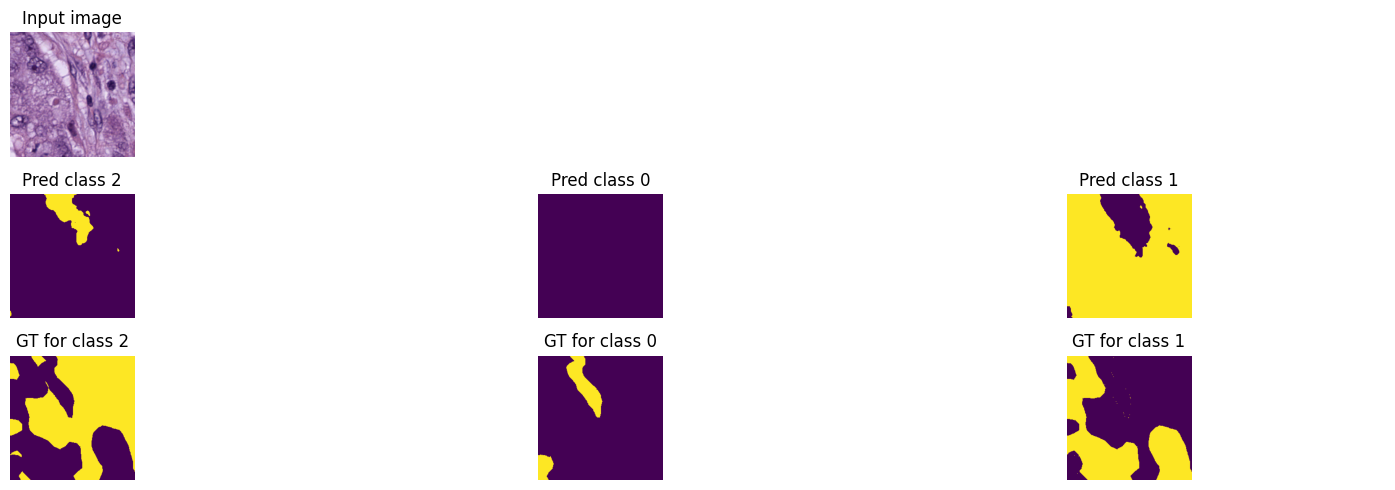

Train loss: 0.29011 | Time: 67m 31s | Val loss: 0.28858
Train_DICE_avg: 0.60389 | Train_Jaccard_avg: 0.54939 | Train_Sensitivity_avg: 0.81336 | Train_Specificity_avg: 0.80200 
Class 0 - Train_DICE: 0.58210 | Train_Jaccard: 0.53814 | Train_Sensitivity: 0.80718 | Train_Specificity: 0.83710 
Class 1 - Train_DICE: 0.70999 | Train_Jaccard: 0.65418 | Train_Sensitivity: 0.83622 | Train_Specificity: 0.78736 
Class 2 - Train_DICE: 0.51958 | Train_Jaccard: 0.45585 | Train_Sensitivity: 0.79670 | Train_Specificity: 0.78155 
Val_DICE_avg: 0.60875 | Val_Jaccard_avg: 0.55203 | Val_Sensitivity_avg: 0.79298 | Val_Specificity_avg: 0.76979 
Class 0 - Val_DICE: 0.60268 | Val_Jaccard: 0.55714 | Val_Sensitivity: 0.76604 | Val_Specificity: 0.83780 
Class 1 - Val_DICE: 0.72358 | Val_Jaccard: 0.66523 | Val_Sensitivity: 0.85505 | Val_Specificity: 0.70964 
Class 2 - Val_DICE: 0.49999 | Val_Jaccard: 0.43373 | Val_Sensitivity: 0.75784 | Val_Specificity: 0.76192 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.28144 | Time: 69m 45s | Val loss: 0.29687
Train_DICE_avg: 0.61320 | Train_Jaccard_avg: 0.55897 | Train_Sensitivity_avg: 0.81550 | Train_Specificity_avg: 0.80678 
Class 0 - Train_DICE: 0.59623 | Train_Jaccard: 0.55196 | Train_Sensitivity: 0.81414 | Train_Specificity: 0.84034 
Class 1 - Train_DICE: 0.71954 | Train_Jaccard: 0.66498 | Train_Sensitivity: 0.84182 | Train_Specificity: 0.79548 
Class 2 - Train_DICE: 0.52384 | Train_Jaccard: 0.45998 | Train_Sensitivity: 0.79056 | Train_Specificity: 0.78452 
Val_DICE_avg: 0.59836 | Val_Jaccard_avg: 0.54024 | Val_Sensitivity_avg: 0.78625 | Val_Specificity_avg: 0.76664 
Class 0 - Val_DICE: 0.58720 | Val_Jaccard: 0.54037 | Val_Sensitivity: 0.73358 | Val_Specificity: 0.84168 
Class 1 - Val_DICE: 0.72223 | Val_Jaccard: 0.66160 | Val_Sensitivity: 0.87742 | Val_Specificity: 0.69567 
Class 2 - Val_DICE: 0.48566 | Val_Jaccard: 0.41876 | Val_Sensitivity: 0.74774 | Val_Specificity: 0.76258 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.27859 | Time: 71m 59s | Val loss: 0.28958
Train_DICE_avg: 0.61449 | Train_Jaccard_avg: 0.56059 | Train_Sensitivity_avg: 0.81740 | Train_Specificity_avg: 0.80866 
Class 0 - Train_DICE: 0.59733 | Train_Jaccard: 0.55303 | Train_Sensitivity: 0.81527 | Train_Specificity: 0.84305 
Class 1 - Train_DICE: 0.71786 | Train_Jaccard: 0.66356 | Train_Sensitivity: 0.84428 | Train_Specificity: 0.79566 
Class 2 - Train_DICE: 0.52828 | Train_Jaccard: 0.46519 | Train_Sensitivity: 0.79266 | Train_Specificity: 0.78728 
Val_DICE_avg: 0.60659 | Val_Jaccard_avg: 0.54866 | Val_Sensitivity_avg: 0.79263 | Val_Specificity_avg: 0.76655 
Class 0 - Val_DICE: 0.59932 | Val_Jaccard: 0.55368 | Val_Sensitivity: 0.76611 | Val_Specificity: 0.83600 
Class 1 - Val_DICE: 0.72008 | Val_Jaccard: 0.65911 | Val_Sensitivity: 0.85851 | Val_Specificity: 0.70123 
Class 2 - Val_DICE: 0.50038 | Val_Jaccard: 0.43319 | Val_Sensitivity: 0.75326 | Val_Specificity: 0.76243 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.54it/s]


Train loss: 0.27253 | Time: 74m 14s | Val loss: 0.28862
Train_DICE_avg: 0.62221 | Train_Jaccard_avg: 0.56850 | Train_Sensitivity_avg: 0.82395 | Train_Specificity_avg: 0.81170 
Class 0 - Train_DICE: 0.60826 | Train_Jaccard: 0.56421 | Train_Sensitivity: 0.82273 | Train_Specificity: 0.84475 
Class 1 - Train_DICE: 0.72442 | Train_Jaccard: 0.67060 | Train_Sensitivity: 0.84708 | Train_Specificity: 0.80280 
Class 2 - Train_DICE: 0.53395 | Train_Jaccard: 0.47070 | Train_Sensitivity: 0.80204 | Train_Specificity: 0.78756 
Val_DICE_avg: 0.60549 | Val_Jaccard_avg: 0.54864 | Val_Sensitivity_avg: 0.79874 | Val_Specificity_avg: 0.77057 
Class 0 - Val_DICE: 0.59688 | Val_Jaccard: 0.55083 | Val_Sensitivity: 0.75775 | Val_Specificity: 0.83931 
Class 1 - Val_DICE: 0.72516 | Val_Jaccard: 0.66608 | Val_Sensitivity: 0.86201 | Val_Specificity: 0.71307 
Class 2 - Val_DICE: 0.49443 | Val_Jaccard: 0.42902 | Val_Sensitivity: 0.77647 | Val_Specificity: 0.75934 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.26859 | Time: 76m 27s | Val loss: 0.29223
Train_DICE_avg: 0.62443 | Train_Jaccard_avg: 0.57083 | Train_Sensitivity_avg: 0.82510 | Train_Specificity_avg: 0.81412 
Class 0 - Train_DICE: 0.61176 | Train_Jaccard: 0.56759 | Train_Sensitivity: 0.82731 | Train_Specificity: 0.84668 
Class 1 - Train_DICE: 0.72296 | Train_Jaccard: 0.66937 | Train_Sensitivity: 0.84643 | Train_Specificity: 0.80574 
Class 2 - Train_DICE: 0.53859 | Train_Jaccard: 0.47554 | Train_Sensitivity: 0.80158 | Train_Specificity: 0.78994 
Val_DICE_avg: 0.60361 | Val_Jaccard_avg: 0.54635 | Val_Sensitivity_avg: 0.79687 | Val_Specificity_avg: 0.77130 
Class 0 - Val_DICE: 0.59081 | Val_Jaccard: 0.54469 | Val_Sensitivity: 0.74297 | Val_Specificity: 0.84362 
Class 1 - Val_DICE: 0.72758 | Val_Jaccard: 0.66886 | Val_Sensitivity: 0.87354 | Val_Specificity: 0.71291 
Class 2 - Val_DICE: 0.49244 | Val_Jaccard: 0.42551 | Val_Sensitivity: 0.77409 | Val_Specificity: 0.75736 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


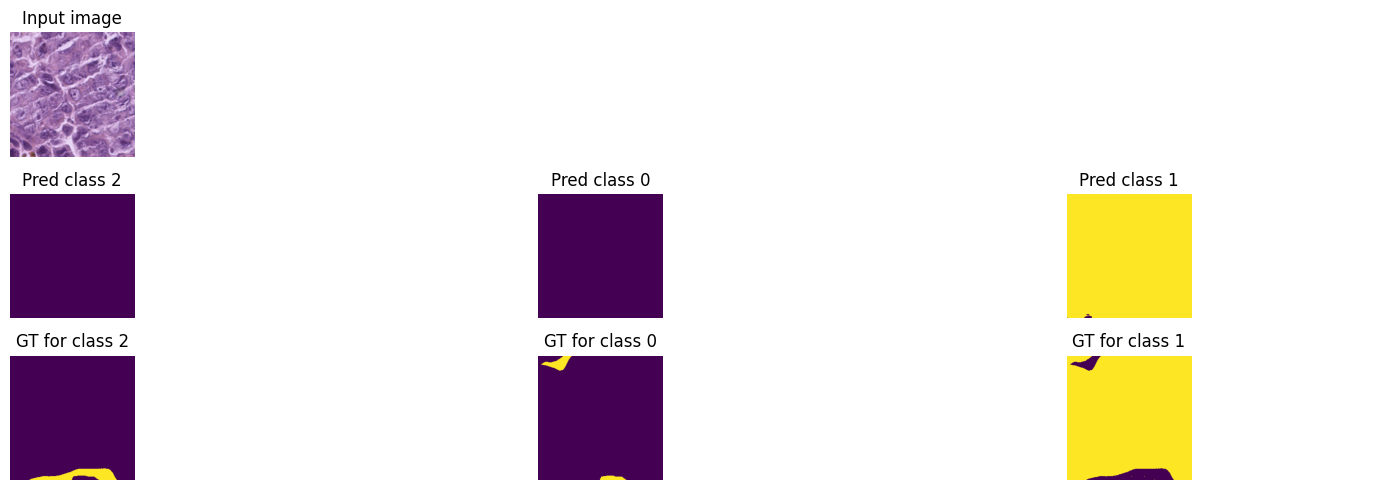

Train loss: 0.26599 | Time: 78m 40s | Val loss: 0.28992
Train_DICE_avg: 0.62717 | Train_Jaccard_avg: 0.57361 | Train_Sensitivity_avg: 0.82657 | Train_Specificity_avg: 0.81595 
Class 0 - Train_DICE: 0.62015 | Train_Jaccard: 0.57596 | Train_Sensitivity: 0.83173 | Train_Specificity: 0.84884 
Class 1 - Train_DICE: 0.72512 | Train_Jaccard: 0.67168 | Train_Sensitivity: 0.84933 | Train_Specificity: 0.80821 
Class 2 - Train_DICE: 0.53624 | Train_Jaccard: 0.47319 | Train_Sensitivity: 0.79864 | Train_Specificity: 0.79079 
Val_DICE_avg: 0.60762 | Val_Jaccard_avg: 0.55013 | Val_Sensitivity_avg: 0.78798 | Val_Specificity_avg: 0.77282 
Class 0 - Val_DICE: 0.60399 | Val_Jaccard: 0.55833 | Val_Sensitivity: 0.75952 | Val_Specificity: 0.83718 
Class 1 - Val_DICE: 0.71638 | Val_Jaccard: 0.65624 | Val_Sensitivity: 0.85217 | Val_Specificity: 0.71383 
Class 2 - Val_DICE: 0.50247 | Val_Jaccard: 0.43583 | Val_Sensitivity: 0.75227 | Val_Specificity: 0.76745 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.26221 | Time: 80m 53s | Val loss: 0.29077
Train_DICE_avg: 0.63117 | Train_Jaccard_avg: 0.57800 | Train_Sensitivity_avg: 0.83159 | Train_Specificity_avg: 0.81616 
Class 0 - Train_DICE: 0.62056 | Train_Jaccard: 0.57629 | Train_Sensitivity: 0.83260 | Train_Specificity: 0.84722 
Class 1 - Train_DICE: 0.73437 | Train_Jaccard: 0.68158 | Train_Sensitivity: 0.85765 | Train_Specificity: 0.81023 
Class 2 - Train_DICE: 0.53857 | Train_Jaccard: 0.47613 | Train_Sensitivity: 0.80451 | Train_Specificity: 0.79104 
Val_DICE_avg: 0.60840 | Val_Jaccard_avg: 0.55230 | Val_Sensitivity_avg: 0.80102 | Val_Specificity_avg: 0.77513 
Class 0 - Val_DICE: 0.59887 | Val_Jaccard: 0.55303 | Val_Sensitivity: 0.75914 | Val_Specificity: 0.83853 
Class 1 - Val_DICE: 0.73621 | Val_Jaccard: 0.67975 | Val_Sensitivity: 0.86293 | Val_Specificity: 0.72928 
Class 2 - Val_DICE: 0.49013 | Val_Jaccard: 0.42412 | Val_Sensitivity: 0.78099 | Val_Specificity: 0.75758 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.25915 | Time: 83m 6s | Val loss: 0.28921
Train_DICE_avg: 0.63261 | Train_Jaccard_avg: 0.57943 | Train_Sensitivity_avg: 0.83274 | Train_Specificity_avg: 0.81880 
Class 0 - Train_DICE: 0.62573 | Train_Jaccard: 0.58159 | Train_Sensitivity: 0.83499 | Train_Specificity: 0.85246 
Class 1 - Train_DICE: 0.73513 | Train_Jaccard: 0.68201 | Train_Sensitivity: 0.85938 | Train_Specificity: 0.80814 
Class 2 - Train_DICE: 0.53698 | Train_Jaccard: 0.47469 | Train_Sensitivity: 0.80387 | Train_Specificity: 0.79580 
Val_DICE_avg: 0.60581 | Val_Jaccard_avg: 0.54985 | Val_Sensitivity_avg: 0.79145 | Val_Specificity_avg: 0.77788 
Class 0 - Val_DICE: 0.59924 | Val_Jaccard: 0.55339 | Val_Sensitivity: 0.76156 | Val_Specificity: 0.83843 
Class 1 - Val_DICE: 0.72361 | Val_Jaccard: 0.66700 | Val_Sensitivity: 0.83625 | Val_Specificity: 0.73489 
Class 2 - Val_DICE: 0.49458 | Val_Jaccard: 0.42916 | Val_Sensitivity: 0.77655 | Val_Specificity: 0.76033 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.25593 | Time: 85m 20s | Val loss: 0.28413
Train_DICE_avg: 0.63897 | Train_Jaccard_avg: 0.58594 | Train_Sensitivity_avg: 0.83468 | Train_Specificity_avg: 0.81952 
Class 0 - Train_DICE: 0.62881 | Train_Jaccard: 0.58484 | Train_Sensitivity: 0.83493 | Train_Specificity: 0.85224 
Class 1 - Train_DICE: 0.73895 | Train_Jaccard: 0.68645 | Train_Sensitivity: 0.86119 | Train_Specificity: 0.80942 
Class 2 - Train_DICE: 0.54915 | Train_Jaccard: 0.48654 | Train_Sensitivity: 0.80791 | Train_Specificity: 0.79691 
Val_DICE_avg: 0.61382 | Val_Jaccard_avg: 0.55942 | Val_Sensitivity_avg: 0.80812 | Val_Specificity_avg: 0.78304 
Class 0 - Val_DICE: 0.61217 | Val_Jaccard: 0.56848 | Val_Sensitivity: 0.80110 | Val_Specificity: 0.83376 
Class 1 - Val_DICE: 0.73150 | Val_Jaccard: 0.67643 | Val_Sensitivity: 0.84259 | Val_Specificity: 0.74968 
Class 2 - Val_DICE: 0.49779 | Val_Jaccard: 0.43335 | Val_Sensitivity: 0.78067 | Val_Specificity: 0.76569 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.25157 | Time: 87m 33s | Val loss: 0.29112
Train_DICE_avg: 0.64384 | Train_Jaccard_avg: 0.59082 | Train_Sensitivity_avg: 0.83853 | Train_Specificity_avg: 0.82241 
Class 0 - Train_DICE: 0.63682 | Train_Jaccard: 0.59258 | Train_Sensitivity: 0.84320 | Train_Specificity: 0.85504 
Class 1 - Train_DICE: 0.74284 | Train_Jaccard: 0.69082 | Train_Sensitivity: 0.86448 | Train_Specificity: 0.81273 
Class 2 - Train_DICE: 0.55186 | Train_Jaccard: 0.48906 | Train_Sensitivity: 0.80790 | Train_Specificity: 0.79947 
Val_DICE_avg: 0.60460 | Val_Jaccard_avg: 0.54923 | Val_Sensitivity_avg: 0.79640 | Val_Specificity_avg: 0.77820 
Class 0 - Val_DICE: 0.59879 | Val_Jaccard: 0.55359 | Val_Sensitivity: 0.77409 | Val_Specificity: 0.83230 
Class 1 - Val_DICE: 0.72365 | Val_Jaccard: 0.66795 | Val_Sensitivity: 0.82980 | Val_Specificity: 0.74372 
Class 2 - Val_DICE: 0.49136 | Val_Jaccard: 0.42615 | Val_Sensitivity: 0.78531 | Val_Specificity: 0.75856 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


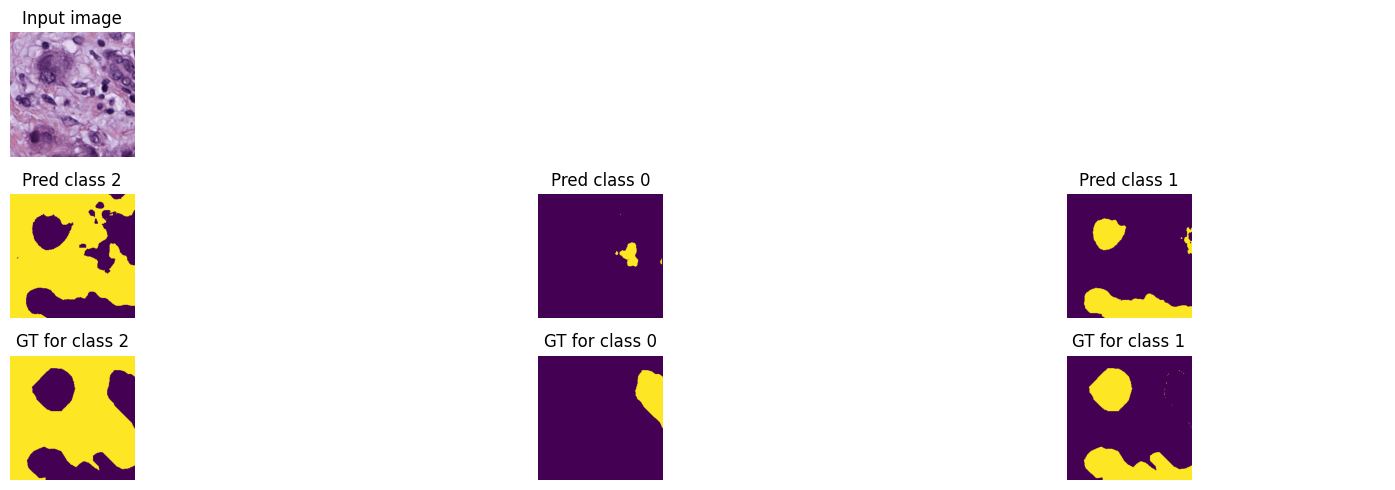

Train loss: 0.24931 | Time: 89m 46s | Val loss: 0.28980
Train_DICE_avg: 0.64393 | Train_Jaccard_avg: 0.59102 | Train_Sensitivity_avg: 0.83910 | Train_Specificity_avg: 0.82259 
Class 0 - Train_DICE: 0.63726 | Train_Jaccard: 0.59281 | Train_Sensitivity: 0.84055 | Train_Specificity: 0.85633 
Class 1 - Train_DICE: 0.74212 | Train_Jaccard: 0.69018 | Train_Sensitivity: 0.86604 | Train_Specificity: 0.81122 
Class 2 - Train_DICE: 0.55241 | Train_Jaccard: 0.49006 | Train_Sensitivity: 0.81072 | Train_Specificity: 0.80023 
Val_DICE_avg: 0.60647 | Val_Jaccard_avg: 0.55203 | Val_Sensitivity_avg: 0.80945 | Val_Specificity_avg: 0.77775 
Class 0 - Val_DICE: 0.60117 | Val_Jaccard: 0.55700 | Val_Sensitivity: 0.78178 | Val_Specificity: 0.83350 
Class 1 - Val_DICE: 0.73471 | Val_Jaccard: 0.67982 | Val_Sensitivity: 0.84776 | Val_Specificity: 0.74635 
Class 2 - Val_DICE: 0.48352 | Val_Jaccard: 0.41927 | Val_Sensitivity: 0.79880 | Val_Specificity: 0.75340 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.24572 | Time: 91m 59s | Val loss: 0.29725
Train_DICE_avg: 0.64693 | Train_Jaccard_avg: 0.59440 | Train_Sensitivity_avg: 0.84035 | Train_Specificity_avg: 0.82430 
Class 0 - Train_DICE: 0.64064 | Train_Jaccard: 0.59644 | Train_Sensitivity: 0.84386 | Train_Specificity: 0.85662 
Class 1 - Train_DICE: 0.74444 | Train_Jaccard: 0.69337 | Train_Sensitivity: 0.86455 | Train_Specificity: 0.81491 
Class 2 - Train_DICE: 0.55572 | Train_Jaccard: 0.49338 | Train_Sensitivity: 0.81262 | Train_Specificity: 0.80138 
Val_DICE_avg: 0.60504 | Val_Jaccard_avg: 0.55224 | Val_Sensitivity_avg: 0.81149 | Val_Specificity_avg: 0.78113 
Class 0 - Val_DICE: 0.61052 | Val_Jaccard: 0.56673 | Val_Sensitivity: 0.79645 | Val_Specificity: 0.83159 
Class 1 - Val_DICE: 0.72668 | Val_Jaccard: 0.67379 | Val_Sensitivity: 0.80799 | Val_Specificity: 0.76661 
Class 2 - Val_DICE: 0.47791 | Val_Jaccard: 0.41621 | Val_Sensitivity: 0.83004 | Val_Specificity: 0.74519 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.24460 | Time: 94m 11s | Val loss: 0.28671
Train_DICE_avg: 0.64728 | Train_Jaccard_avg: 0.59471 | Train_Sensitivity_avg: 0.84105 | Train_Specificity_avg: 0.82497 
Class 0 - Train_DICE: 0.64260 | Train_Jaccard: 0.59850 | Train_Sensitivity: 0.84388 | Train_Specificity: 0.85837 
Class 1 - Train_DICE: 0.74117 | Train_Jaccard: 0.68980 | Train_Sensitivity: 0.86732 | Train_Specificity: 0.81657 
Class 2 - Train_DICE: 0.55805 | Train_Jaccard: 0.49583 | Train_Sensitivity: 0.81194 | Train_Specificity: 0.79998 
Val_DICE_avg: 0.60602 | Val_Jaccard_avg: 0.55188 | Val_Sensitivity_avg: 0.80678 | Val_Specificity_avg: 0.78107 
Class 0 - Val_DICE: 0.59797 | Val_Jaccard: 0.55289 | Val_Sensitivity: 0.76955 | Val_Specificity: 0.83388 
Class 1 - Val_DICE: 0.72976 | Val_Jaccard: 0.67543 | Val_Sensitivity: 0.84100 | Val_Specificity: 0.75500 
Class 2 - Val_DICE: 0.49032 | Val_Jaccard: 0.42731 | Val_Sensitivity: 0.80980 | Val_Specificity: 0.75433 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.24044 | Time: 96m 23s | Val loss: 0.28713
Train_DICE_avg: 0.65269 | Train_Jaccard_avg: 0.60054 | Train_Sensitivity_avg: 0.84641 | Train_Specificity_avg: 0.82799 
Class 0 - Train_DICE: 0.64246 | Train_Jaccard: 0.59889 | Train_Sensitivity: 0.84545 | Train_Specificity: 0.86064 
Class 1 - Train_DICE: 0.75046 | Train_Jaccard: 0.70008 | Train_Sensitivity: 0.87273 | Train_Specificity: 0.81894 
Class 2 - Train_DICE: 0.56516 | Train_Jaccard: 0.50265 | Train_Sensitivity: 0.82105 | Train_Specificity: 0.80440 
Val_DICE_avg: 0.60764 | Val_Jaccard_avg: 0.55345 | Val_Sensitivity_avg: 0.80623 | Val_Specificity_avg: 0.78160 
Class 0 - Val_DICE: 0.59630 | Val_Jaccard: 0.55129 | Val_Sensitivity: 0.75825 | Val_Specificity: 0.84076 
Class 1 - Val_DICE: 0.73480 | Val_Jaccard: 0.68068 | Val_Sensitivity: 0.84639 | Val_Specificity: 0.75154 
Class 2 - Val_DICE: 0.49181 | Val_Jaccard: 0.42838 | Val_Sensitivity: 0.81404 | Val_Specificity: 0.75250 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.23676 | Time: 98m 35s | Val loss: 0.29183
Train_DICE_avg: 0.65666 | Train_Jaccard_avg: 0.60457 | Train_Sensitivity_avg: 0.84802 | Train_Specificity_avg: 0.82879 
Class 0 - Train_DICE: 0.65014 | Train_Jaccard: 0.60604 | Train_Sensitivity: 0.84972 | Train_Specificity: 0.85875 
Class 1 - Train_DICE: 0.75193 | Train_Jaccard: 0.70210 | Train_Sensitivity: 0.87377 | Train_Specificity: 0.82359 
Class 2 - Train_DICE: 0.56792 | Train_Jaccard: 0.50558 | Train_Sensitivity: 0.82057 | Train_Specificity: 0.80403 
Val_DICE_avg: 0.60499 | Val_Jaccard_avg: 0.55134 | Val_Sensitivity_avg: 0.80923 | Val_Specificity_avg: 0.78180 
Class 0 - Val_DICE: 0.60001 | Val_Jaccard: 0.55498 | Val_Sensitivity: 0.76030 | Val_Specificity: 0.83818 
Class 1 - Val_DICE: 0.73205 | Val_Jaccard: 0.67810 | Val_Sensitivity: 0.83668 | Val_Specificity: 0.76028 
Class 2 - Val_DICE: 0.48292 | Val_Jaccard: 0.42095 | Val_Sensitivity: 0.83072 | Val_Specificity: 0.74693 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


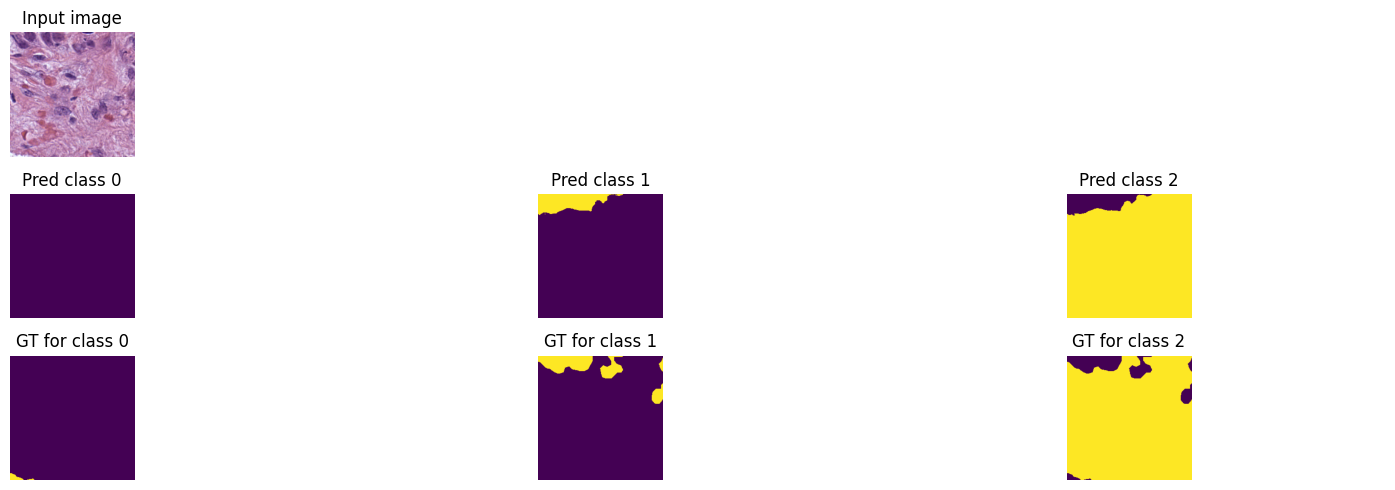

Train loss: 0.23454 | Time: 100m 48s | Val loss: 0.29069
Train_DICE_avg: 0.65593 | Train_Jaccard_avg: 0.60425 | Train_Sensitivity_avg: 0.84735 | Train_Specificity_avg: 0.83093 
Class 0 - Train_DICE: 0.64953 | Train_Jaccard: 0.60604 | Train_Sensitivity: 0.85097 | Train_Specificity: 0.86271 
Class 1 - Train_DICE: 0.75255 | Train_Jaccard: 0.70285 | Train_Sensitivity: 0.87280 | Train_Specificity: 0.82159 
Class 2 - Train_DICE: 0.56571 | Train_Jaccard: 0.50387 | Train_Sensitivity: 0.81827 | Train_Specificity: 0.80848 
Val_DICE_avg: 0.61156 | Val_Jaccard_avg: 0.55812 | Val_Sensitivity_avg: 0.81610 | Val_Specificity_avg: 0.78529 
Class 0 - Val_DICE: 0.61038 | Val_Jaccard: 0.56567 | Val_Sensitivity: 0.77665 | Val_Specificity: 0.83836 
Class 1 - Val_DICE: 0.73663 | Val_Jaccard: 0.68336 | Val_Sensitivity: 0.83300 | Val_Specificity: 0.76798 
Class 2 - Val_DICE: 0.48766 | Val_Jaccard: 0.42534 | Val_Sensitivity: 0.83866 | Val_Specificity: 0.74952 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.23175 | Time: 103m 1s | Val loss: 0.29536
Train_DICE_avg: 0.66090 | Train_Jaccard_avg: 0.60878 | Train_Sensitivity_avg: 0.84795 | Train_Specificity_avg: 0.83176 
Class 0 - Train_DICE: 0.65729 | Train_Jaccard: 0.61267 | Train_Sensitivity: 0.85234 | Train_Specificity: 0.86329 
Class 1 - Train_DICE: 0.75497 | Train_Jaccard: 0.70541 | Train_Sensitivity: 0.87320 | Train_Specificity: 0.82436 
Class 2 - Train_DICE: 0.57043 | Train_Jaccard: 0.50824 | Train_Sensitivity: 0.81829 | Train_Specificity: 0.80763 
Val_DICE_avg: 0.60554 | Val_Jaccard_avg: 0.55206 | Val_Sensitivity_avg: 0.81011 | Val_Specificity_avg: 0.78406 
Class 0 - Val_DICE: 0.59820 | Val_Jaccard: 0.55259 | Val_Sensitivity: 0.74376 | Val_Specificity: 0.84428 
Class 1 - Val_DICE: 0.73543 | Val_Jaccard: 0.68229 | Val_Sensitivity: 0.83284 | Val_Specificity: 0.76563 
Class 2 - Val_DICE: 0.48299 | Val_Jaccard: 0.42129 | Val_Sensitivity: 0.85372 | Val_Specificity: 0.74227 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.22962 | Time: 105m 13s | Val loss: 0.29394
Train_DICE_avg: 0.66081 | Train_Jaccard_avg: 0.60919 | Train_Sensitivity_avg: 0.85045 | Train_Specificity_avg: 0.83409 
Class 0 - Train_DICE: 0.65406 | Train_Jaccard: 0.61065 | Train_Sensitivity: 0.85401 | Train_Specificity: 0.86485 
Class 1 - Train_DICE: 0.75818 | Train_Jaccard: 0.70873 | Train_Sensitivity: 0.87621 | Train_Specificity: 0.82749 
Class 2 - Train_DICE: 0.57018 | Train_Jaccard: 0.50818 | Train_Sensitivity: 0.82112 | Train_Specificity: 0.80992 
Val_DICE_avg: 0.60541 | Val_Jaccard_avg: 0.55167 | Val_Sensitivity_avg: 0.80707 | Val_Specificity_avg: 0.78647 
Class 0 - Val_DICE: 0.59599 | Val_Jaccard: 0.55010 | Val_Sensitivity: 0.75181 | Val_Specificity: 0.84185 
Class 1 - Val_DICE: 0.73958 | Val_Jaccard: 0.68638 | Val_Sensitivity: 0.84053 | Val_Specificity: 0.76800 
Class 2 - Val_DICE: 0.48067 | Val_Jaccard: 0.41853 | Val_Sensitivity: 0.82885 | Val_Specificity: 0.74955 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.22758 | Time: 107m 26s | Val loss: 0.29387
Train_DICE_avg: 0.66569 | Train_Jaccard_avg: 0.61390 | Train_Sensitivity_avg: 0.85199 | Train_Specificity_avg: 0.83453 
Class 0 - Train_DICE: 0.65794 | Train_Jaccard: 0.61397 | Train_Sensitivity: 0.85158 | Train_Specificity: 0.86475 
Class 1 - Train_DICE: 0.76334 | Train_Jaccard: 0.71422 | Train_Sensitivity: 0.88087 | Train_Specificity: 0.82763 
Class 2 - Train_DICE: 0.57578 | Train_Jaccard: 0.51350 | Train_Sensitivity: 0.82351 | Train_Specificity: 0.81122 
Val_DICE_avg: 0.60136 | Val_Jaccard_avg: 0.54681 | Val_Sensitivity_avg: 0.80418 | Val_Specificity_avg: 0.78067 
Class 0 - Val_DICE: 0.59028 | Val_Jaccard: 0.54384 | Val_Sensitivity: 0.73021 | Val_Specificity: 0.84498 
Class 1 - Val_DICE: 0.73510 | Val_Jaccard: 0.68020 | Val_Sensitivity: 0.84735 | Val_Specificity: 0.75265 
Class 2 - Val_DICE: 0.47871 | Val_Jaccard: 0.41640 | Val_Sensitivity: 0.83498 | Val_Specificity: 0.74439 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.22557 | Time: 109m 38s | Val loss: 0.28729
Train_DICE_avg: 0.66630 | Train_Jaccard_avg: 0.61467 | Train_Sensitivity_avg: 0.85173 | Train_Specificity_avg: 0.83351 
Class 0 - Train_DICE: 0.65815 | Train_Jaccard: 0.61445 | Train_Sensitivity: 0.85185 | Train_Specificity: 0.86342 
Class 1 - Train_DICE: 0.76476 | Train_Jaccard: 0.71587 | Train_Sensitivity: 0.88052 | Train_Specificity: 0.82667 
Class 2 - Train_DICE: 0.57600 | Train_Jaccard: 0.51370 | Train_Sensitivity: 0.82280 | Train_Specificity: 0.81045 
Val_DICE_avg: 0.61238 | Val_Jaccard_avg: 0.55867 | Val_Sensitivity_avg: 0.81053 | Val_Specificity_avg: 0.78509 
Class 0 - Val_DICE: 0.59955 | Val_Jaccard: 0.55469 | Val_Sensitivity: 0.75874 | Val_Specificity: 0.84108 
Class 1 - Val_DICE: 0.73667 | Val_Jaccard: 0.68263 | Val_Sensitivity: 0.84272 | Val_Specificity: 0.75945 
Class 2 - Val_DICE: 0.50091 | Val_Jaccard: 0.43869 | Val_Sensitivity: 0.83012 | Val_Specificity: 0.75475 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


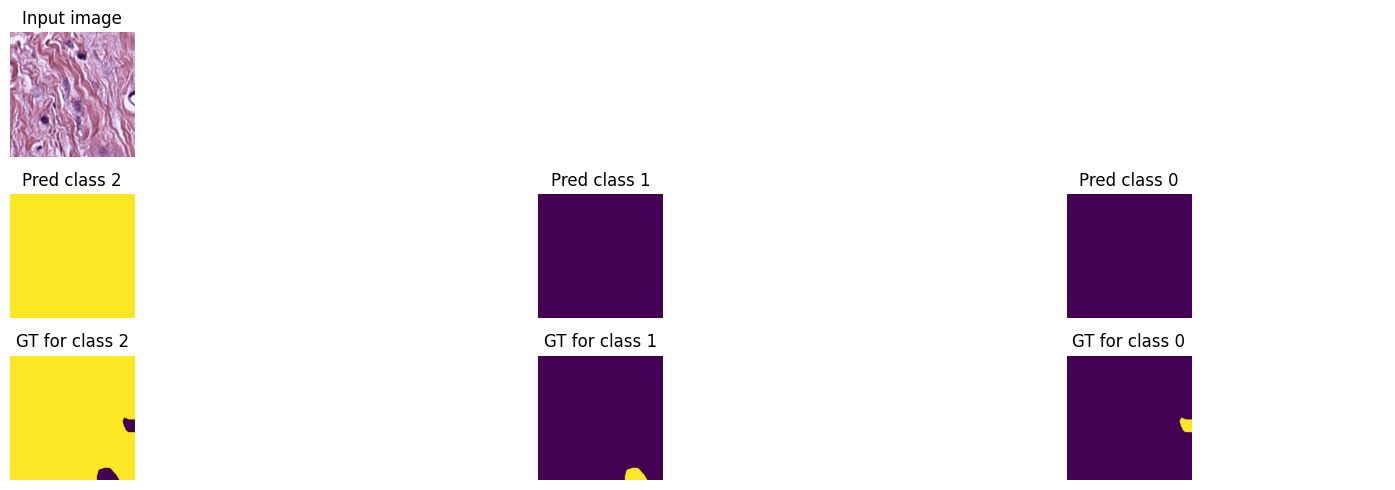

Train loss: 0.22372 | Time: 111m 51s | Val loss: 0.29628
Train_DICE_avg: 0.66727 | Train_Jaccard_avg: 0.61530 | Train_Sensitivity_avg: 0.85002 | Train_Specificity_avg: 0.83533 
Class 0 - Train_DICE: 0.66081 | Train_Jaccard: 0.61660 | Train_Sensitivity: 0.85091 | Train_Specificity: 0.86692 
Class 1 - Train_DICE: 0.76324 | Train_Jaccard: 0.71414 | Train_Sensitivity: 0.87824 | Train_Specificity: 0.82761 
Class 2 - Train_DICE: 0.57777 | Train_Jaccard: 0.51515 | Train_Sensitivity: 0.82090 | Train_Specificity: 0.81146 
Val_DICE_avg: 0.60352 | Val_Jaccard_avg: 0.54933 | Val_Sensitivity_avg: 0.80125 | Val_Specificity_avg: 0.78450 
Class 0 - Val_DICE: 0.59149 | Val_Jaccard: 0.54533 | Val_Sensitivity: 0.73200 | Val_Specificity: 0.84610 
Class 1 - Val_DICE: 0.73291 | Val_Jaccard: 0.67871 | Val_Sensitivity: 0.84223 | Val_Specificity: 0.75852 
Class 2 - Val_DICE: 0.48617 | Val_Jaccard: 0.42394 | Val_Sensitivity: 0.82952 | Val_Specificity: 0.74889 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.22263 | Time: 114m 3s | Val loss: 0.28718
Train_DICE_avg: 0.66679 | Train_Jaccard_avg: 0.61532 | Train_Sensitivity_avg: 0.85174 | Train_Specificity_avg: 0.83660 
Class 0 - Train_DICE: 0.65943 | Train_Jaccard: 0.61570 | Train_Sensitivity: 0.85404 | Train_Specificity: 0.86662 
Class 1 - Train_DICE: 0.76110 | Train_Jaccard: 0.71241 | Train_Sensitivity: 0.87581 | Train_Specificity: 0.83005 
Class 2 - Train_DICE: 0.57985 | Train_Jaccard: 0.51786 | Train_Sensitivity: 0.82537 | Train_Specificity: 0.81312 
Val_DICE_avg: 0.61320 | Val_Jaccard_avg: 0.55942 | Val_Sensitivity_avg: 0.80863 | Val_Specificity_avg: 0.78677 
Class 0 - Val_DICE: 0.59948 | Val_Jaccard: 0.55396 | Val_Sensitivity: 0.74911 | Val_Specificity: 0.84329 
Class 1 - Val_DICE: 0.74380 | Val_Jaccard: 0.69029 | Val_Sensitivity: 0.85152 | Val_Specificity: 0.76154 
Class 2 - Val_DICE: 0.49632 | Val_Jaccard: 0.43402 | Val_Sensitivity: 0.82525 | Val_Specificity: 0.75547 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.21989 | Time: 116m 16s | Val loss: 0.29012
Train_DICE_avg: 0.67250 | Train_Jaccard_avg: 0.62099 | Train_Sensitivity_avg: 0.85429 | Train_Specificity_avg: 0.83753 
Class 0 - Train_DICE: 0.66796 | Train_Jaccard: 0.62400 | Train_Sensitivity: 0.85802 | Train_Specificity: 0.86613 
Class 1 - Train_DICE: 0.76800 | Train_Jaccard: 0.71953 | Train_Sensitivity: 0.88108 | Train_Specificity: 0.83206 
Class 2 - Train_DICE: 0.58154 | Train_Jaccard: 0.51943 | Train_Sensitivity: 0.82376 | Train_Specificity: 0.81441 
Val_DICE_avg: 0.61170 | Val_Jaccard_avg: 0.55751 | Val_Sensitivity_avg: 0.80907 | Val_Specificity_avg: 0.78509 
Class 0 - Val_DICE: 0.59791 | Val_Jaccard: 0.55228 | Val_Sensitivity: 0.74544 | Val_Specificity: 0.84585 
Class 1 - Val_DICE: 0.74364 | Val_Jaccard: 0.68977 | Val_Sensitivity: 0.85408 | Val_Specificity: 0.75853 
Class 2 - Val_DICE: 0.49356 | Val_Jaccard: 0.43048 | Val_Sensitivity: 0.82770 | Val_Specificity: 0.75088 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.21871 | Time: 118m 29s | Val loss: 0.29859
Train_DICE_avg: 0.67431 | Train_Jaccard_avg: 0.62272 | Train_Sensitivity_avg: 0.85749 | Train_Specificity_avg: 0.83889 
Class 0 - Train_DICE: 0.67208 | Train_Jaccard: 0.62748 | Train_Sensitivity: 0.86114 | Train_Specificity: 0.86873 
Class 1 - Train_DICE: 0.76838 | Train_Jaccard: 0.72059 | Train_Sensitivity: 0.88584 | Train_Specificity: 0.83263 
Class 2 - Train_DICE: 0.58246 | Train_Jaccard: 0.52010 | Train_Sensitivity: 0.82550 | Train_Specificity: 0.81532 
Val_DICE_avg: 0.60603 | Val_Jaccard_avg: 0.55147 | Val_Sensitivity_avg: 0.79908 | Val_Specificity_avg: 0.78745 
Class 0 - Val_DICE: 0.58902 | Val_Jaccard: 0.54186 | Val_Sensitivity: 0.70929 | Val_Specificity: 0.85192 
Class 1 - Val_DICE: 0.74242 | Val_Jaccard: 0.68882 | Val_Sensitivity: 0.85347 | Val_Specificity: 0.76249 
Class 2 - Val_DICE: 0.48665 | Val_Jaccard: 0.42375 | Val_Sensitivity: 0.83449 | Val_Specificity: 0.74796 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.21653 | Time: 120m 41s | Val loss: 0.29300
Train_DICE_avg: 0.67492 | Train_Jaccard_avg: 0.62337 | Train_Sensitivity_avg: 0.85616 | Train_Specificity_avg: 0.84016 
Class 0 - Train_DICE: 0.66743 | Train_Jaccard: 0.62360 | Train_Sensitivity: 0.85780 | Train_Specificity: 0.87102 
Class 1 - Train_DICE: 0.77117 | Train_Jaccard: 0.72268 | Train_Sensitivity: 0.88577 | Train_Specificity: 0.83343 
Class 2 - Train_DICE: 0.58617 | Train_Jaccard: 0.52383 | Train_Sensitivity: 0.82490 | Train_Specificity: 0.81602 
Val_DICE_avg: 0.60380 | Val_Jaccard_avg: 0.54895 | Val_Sensitivity_avg: 0.80027 | Val_Specificity_avg: 0.78278 
Class 0 - Val_DICE: 0.58546 | Val_Jaccard: 0.53853 | Val_Sensitivity: 0.71198 | Val_Specificity: 0.85132 
Class 1 - Val_DICE: 0.73909 | Val_Jaccard: 0.68419 | Val_Sensitivity: 0.86333 | Val_Specificity: 0.74821 
Class 2 - Val_DICE: 0.48684 | Val_Jaccard: 0.42412 | Val_Sensitivity: 0.82549 | Val_Specificity: 0.74882 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


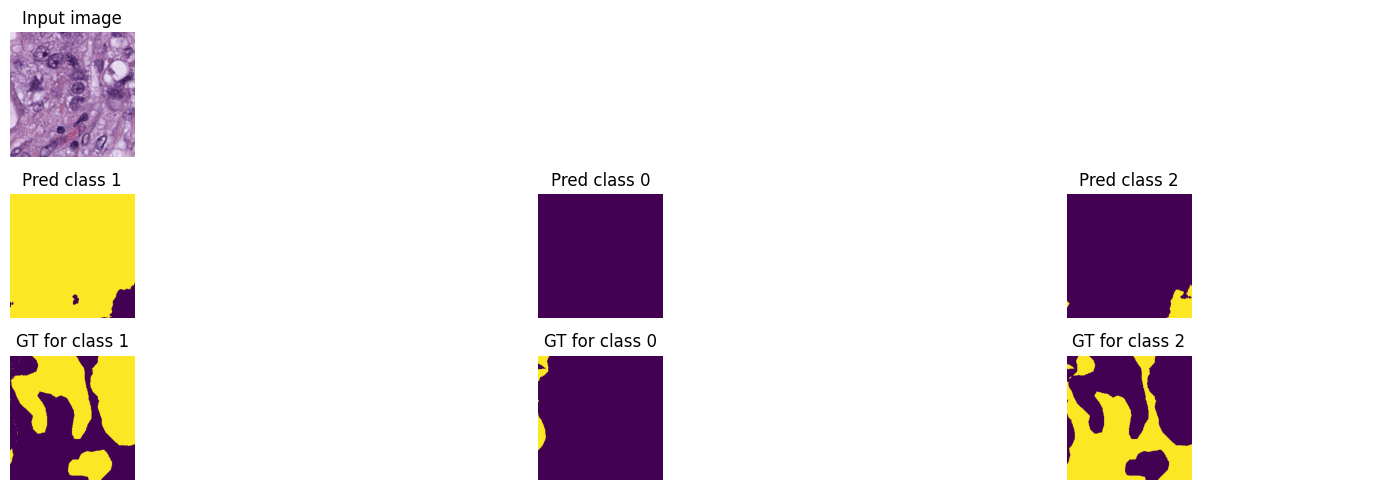

Train loss: 0.21591 | Time: 122m 54s | Val loss: 0.29119
Train_DICE_avg: 0.67519 | Train_Jaccard_avg: 0.62375 | Train_Sensitivity_avg: 0.85646 | Train_Specificity_avg: 0.84248 
Class 0 - Train_DICE: 0.66874 | Train_Jaccard: 0.62421 | Train_Sensitivity: 0.85841 | Train_Specificity: 0.87073 
Class 1 - Train_DICE: 0.77069 | Train_Jaccard: 0.72278 | Train_Sensitivity: 0.88564 | Train_Specificity: 0.84037 
Class 2 - Train_DICE: 0.58612 | Train_Jaccard: 0.52426 | Train_Sensitivity: 0.82535 | Train_Specificity: 0.81636 
Val_DICE_avg: 0.60997 | Val_Jaccard_avg: 0.55634 | Val_Sensitivity_avg: 0.80777 | Val_Specificity_avg: 0.78852 
Class 0 - Val_DICE: 0.59521 | Val_Jaccard: 0.54916 | Val_Sensitivity: 0.73483 | Val_Specificity: 0.84741 
Class 1 - Val_DICE: 0.74688 | Val_Jaccard: 0.69353 | Val_Sensitivity: 0.85320 | Val_Specificity: 0.76893 
Class 2 - Val_DICE: 0.48782 | Val_Jaccard: 0.42634 | Val_Sensitivity: 0.83526 | Val_Specificity: 0.74921 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.21495 | Time: 125m 6s | Val loss: 0.29154
Train_DICE_avg: 0.67434 | Train_Jaccard_avg: 0.62327 | Train_Sensitivity_avg: 0.85679 | Train_Specificity_avg: 0.84024 
Class 0 - Train_DICE: 0.66805 | Train_Jaccard: 0.62391 | Train_Sensitivity: 0.85755 | Train_Specificity: 0.87152 
Class 1 - Train_DICE: 0.76979 | Train_Jaccard: 0.72230 | Train_Sensitivity: 0.88359 | Train_Specificity: 0.83279 
Class 2 - Train_DICE: 0.58518 | Train_Jaccard: 0.52361 | Train_Sensitivity: 0.82924 | Train_Specificity: 0.81639 
Val_DICE_avg: 0.60723 | Val_Jaccard_avg: 0.55319 | Val_Sensitivity_avg: 0.80563 | Val_Specificity_avg: 0.78619 
Class 0 - Val_DICE: 0.58716 | Val_Jaccard: 0.54174 | Val_Sensitivity: 0.72524 | Val_Specificity: 0.84742 
Class 1 - Val_DICE: 0.74235 | Val_Jaccard: 0.68799 | Val_Sensitivity: 0.85518 | Val_Specificity: 0.76149 
Class 2 - Val_DICE: 0.49217 | Val_Jaccard: 0.42984 | Val_Sensitivity: 0.83645 | Val_Specificity: 0.74965 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.21336 | Time: 127m 18s | Val loss: 0.28811
Train_DICE_avg: 0.67776 | Train_Jaccard_avg: 0.62649 | Train_Sensitivity_avg: 0.85801 | Train_Specificity_avg: 0.84252 
Class 0 - Train_DICE: 0.67112 | Train_Jaccard: 0.62697 | Train_Sensitivity: 0.85916 | Train_Specificity: 0.87111 
Class 1 - Train_DICE: 0.77359 | Train_Jaccard: 0.72544 | Train_Sensitivity: 0.88637 | Train_Specificity: 0.83578 
Class 2 - Train_DICE: 0.58858 | Train_Jaccard: 0.52706 | Train_Sensitivity: 0.82851 | Train_Specificity: 0.82066 
Val_DICE_avg: 0.61472 | Val_Jaccard_avg: 0.56093 | Val_Sensitivity_avg: 0.80429 | Val_Specificity_avg: 0.78963 
Class 0 - Val_DICE: 0.59743 | Val_Jaccard: 0.55261 | Val_Sensitivity: 0.74785 | Val_Specificity: 0.84677 
Class 1 - Val_DICE: 0.74089 | Val_Jaccard: 0.68709 | Val_Sensitivity: 0.85384 | Val_Specificity: 0.76160 
Class 2 - Val_DICE: 0.50582 | Val_Jaccard: 0.44310 | Val_Sensitivity: 0.81117 | Val_Specificity: 0.76051 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.21215 | Time: 129m 31s | Val loss: 0.29540
Train_DICE_avg: 0.67888 | Train_Jaccard_avg: 0.62743 | Train_Sensitivity_avg: 0.85862 | Train_Specificity_avg: 0.84264 
Class 0 - Train_DICE: 0.67362 | Train_Jaccard: 0.62910 | Train_Sensitivity: 0.85938 | Train_Specificity: 0.87169 
Class 1 - Train_DICE: 0.77569 | Train_Jaccard: 0.72776 | Train_Sensitivity: 0.88847 | Train_Specificity: 0.83529 
Class 2 - Train_DICE: 0.58733 | Train_Jaccard: 0.52542 | Train_Sensitivity: 0.82800 | Train_Specificity: 0.82093 
Val_DICE_avg: 0.60232 | Val_Jaccard_avg: 0.54771 | Val_Sensitivity_avg: 0.79863 | Val_Specificity_avg: 0.78372 
Class 0 - Val_DICE: 0.57747 | Val_Jaccard: 0.53012 | Val_Sensitivity: 0.69380 | Val_Specificity: 0.85378 
Class 1 - Val_DICE: 0.74110 | Val_Jaccard: 0.68665 | Val_Sensitivity: 0.86460 | Val_Specificity: 0.74796 
Class 2 - Val_DICE: 0.48841 | Val_Jaccard: 0.42638 | Val_Sensitivity: 0.83749 | Val_Specificity: 0.74941 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.21116 | Time: 131m 43s | Val loss: 0.28889
Train_DICE_avg: 0.67891 | Train_Jaccard_avg: 0.62776 | Train_Sensitivity_avg: 0.85942 | Train_Specificity_avg: 0.84327 
Class 0 - Train_DICE: 0.67441 | Train_Jaccard: 0.63024 | Train_Sensitivity: 0.86381 | Train_Specificity: 0.87245 
Class 1 - Train_DICE: 0.77208 | Train_Jaccard: 0.72435 | Train_Sensitivity: 0.88488 | Train_Specificity: 0.83748 
Class 2 - Train_DICE: 0.59023 | Train_Jaccard: 0.52867 | Train_Sensitivity: 0.82958 | Train_Specificity: 0.81989 
Val_DICE_avg: 0.61210 | Val_Jaccard_avg: 0.55780 | Val_Sensitivity_avg: 0.80274 | Val_Specificity_avg: 0.78835 
Class 0 - Val_DICE: 0.59306 | Val_Jaccard: 0.54667 | Val_Sensitivity: 0.72245 | Val_Specificity: 0.84932 
Class 1 - Val_DICE: 0.74247 | Val_Jaccard: 0.68843 | Val_Sensitivity: 0.85897 | Val_Specificity: 0.76008 
Class 2 - Val_DICE: 0.50077 | Val_Jaccard: 0.43830 | Val_Sensitivity: 0.82680 | Val_Specificity: 0.75565 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


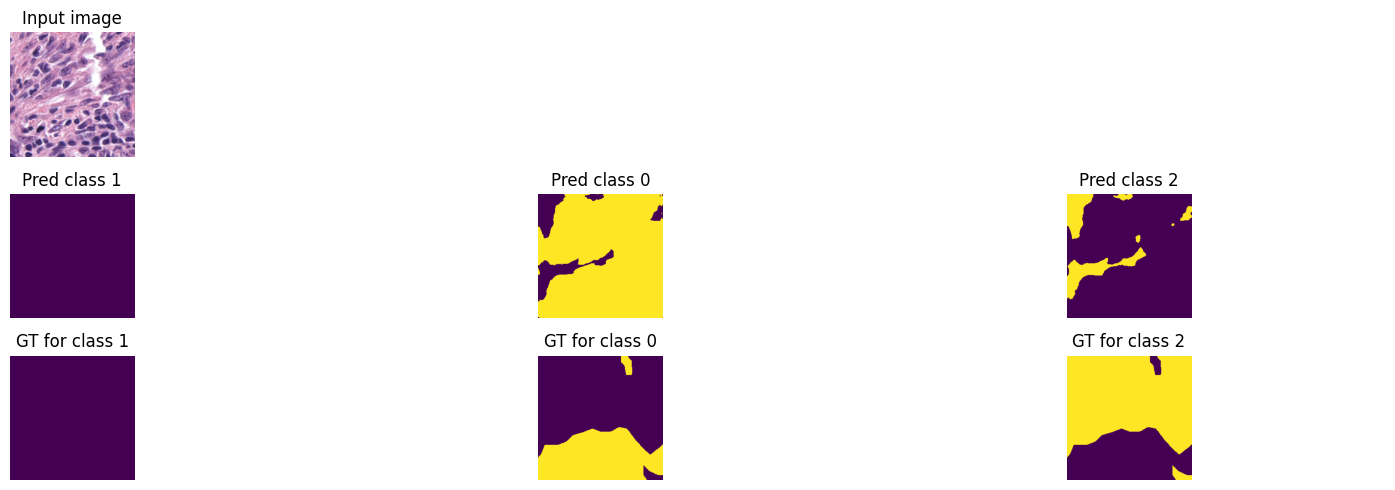

Train loss: 0.20948 | Time: 133m 56s | Val loss: 0.28622
Train_DICE_avg: 0.67999 | Train_Jaccard_avg: 0.62888 | Train_Sensitivity_avg: 0.85956 | Train_Specificity_avg: 0.84264 
Class 0 - Train_DICE: 0.67644 | Train_Jaccard: 0.63226 | Train_Sensitivity: 0.86032 | Train_Specificity: 0.87245 
Class 1 - Train_DICE: 0.77355 | Train_Jaccard: 0.72641 | Train_Sensitivity: 0.88845 | Train_Specificity: 0.83546 
Class 2 - Train_DICE: 0.58999 | Train_Jaccard: 0.52797 | Train_Sensitivity: 0.82992 | Train_Specificity: 0.82000 
Val_DICE_avg: 0.61597 | Val_Jaccard_avg: 0.56176 | Val_Sensitivity_avg: 0.80294 | Val_Specificity_avg: 0.78692 
Class 0 - Val_DICE: 0.59482 | Val_Jaccard: 0.54928 | Val_Sensitivity: 0.73581 | Val_Specificity: 0.84642 
Class 1 - Val_DICE: 0.74583 | Val_Jaccard: 0.69201 | Val_Sensitivity: 0.86373 | Val_Specificity: 0.75209 
Class 2 - Val_DICE: 0.50728 | Val_Jaccard: 0.44400 | Val_Sensitivity: 0.80928 | Val_Specificity: 0.76225 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:11<00:00,  2.66it/s]


Global Performance Metrics:
Loss mean: 0.29387, std: 0.05887
Dice Coefficient mean: 0.61537, std: 0.22938
Jaccard Index mean: 0.55799, std: 0.24348
Sensitivity mean: 0.73231, std: 0.20455
Specificity mean: 0.85545, std: 0.11274

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.58231, std: 0.41396
Jaccard mean: 0.53067, std: 0.41070
Sensitivity mean: 0.77751, std: 0.34184
Specificity mean: 0.85757, std: 0.24791

Class 1:
Dice mean: 0.73220, std: 0.35627
Jaccard mean: 0.67941, std: 0.36239
Sensitivity mean: 0.82304, std: 0.29873
Specificity mean: 0.83380, std: 0.28953

Class 2:
Dice mean: 0.53160, std: 0.39153
Jaccard mean: 0.46389, std: 0.38325
Sensitivity mean: 0.59638, std: 0.39313
Specificity mean: 0.87498, std: 0.22038


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-UNet-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.63 GB
GPU Memory - Reserved: 1.05 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


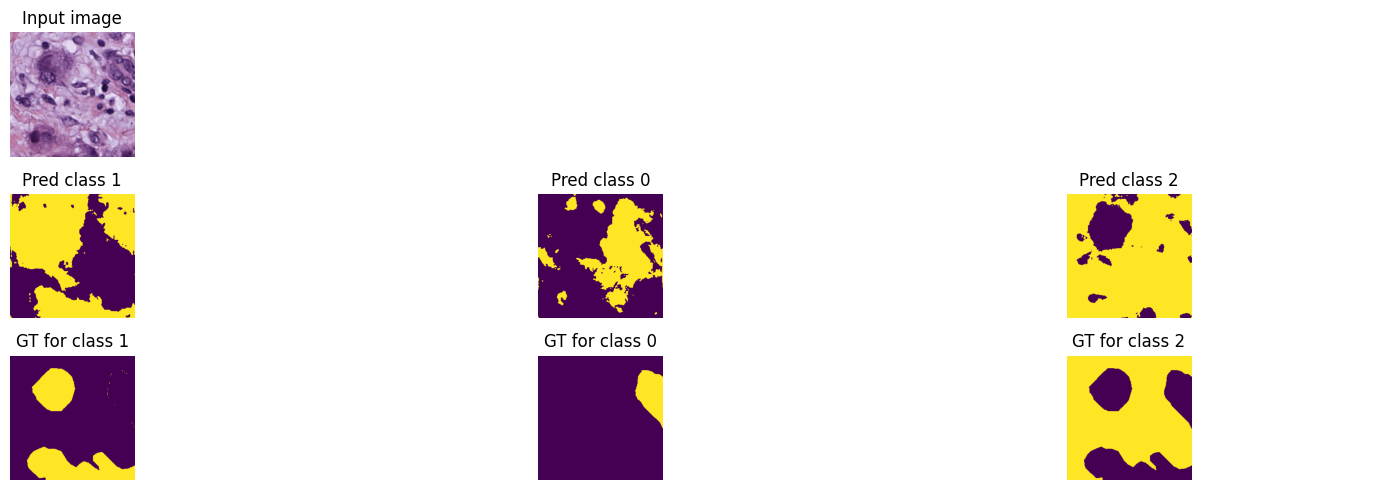

Train loss: 0.05477 | Time: 2m 6s | Val loss: 0.04315
Train_DICE_avg: 0.35464 | Train_Jaccard_avg: 0.29707 | Train_Sensitivity_avg: 0.60890 | Train_Specificity_avg: 0.72475 
Class 0 - Train_DICE: 0.32004 | Train_Jaccard: 0.28112 | Train_Sensitivity: 0.58047 | Train_Specificity: 0.79156 
Class 1 - Train_DICE: 0.45004 | Train_Jaccard: 0.37537 | Train_Sensitivity: 0.62819 | Train_Specificity: 0.67476 
Class 2 - Train_DICE: 0.29386 | Train_Jaccard: 0.23473 | Train_Sensitivity: 0.61803 | Train_Specificity: 0.70792 
Val_DICE_avg: 0.48350 | Val_Jaccard_avg: 0.42303 | Val_Sensitivity_avg: 0.68816 | Val_Specificity_avg: 0.73237 
Class 0 - Val_DICE: 0.40633 | Val_Jaccard: 0.35900 | Val_Sensitivity: 0.60938 | Val_Specificity: 0.80259 
Class 1 - Val_DICE: 0.61552 | Val_Jaccard: 0.54879 | Val_Sensitivity: 0.72969 | Val_Specificity: 0.66892 
Class 2 - Val_DICE: 0.42865 | Val_Jaccard: 0.36130 | Val_Sensitivity: 0.72542 | Val_Specificity: 0.72559 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.05036 | Time: 4m 11s | Val loss: 0.04138
Train_DICE_avg: 0.42150 | Train_Jaccard_avg: 0.35945 | Train_Sensitivity_avg: 0.64332 | Train_Specificity_avg: 0.74550 
Class 0 - Train_DICE: 0.38914 | Train_Jaccard: 0.34377 | Train_Sensitivity: 0.64723 | Train_Specificity: 0.80050 
Class 1 - Train_DICE: 0.51486 | Train_Jaccard: 0.44198 | Train_Sensitivity: 0.65105 | Train_Specificity: 0.70540 
Class 2 - Train_DICE: 0.36051 | Train_Jaccard: 0.29260 | Train_Sensitivity: 0.63170 | Train_Specificity: 0.73059 
Val_DICE_avg: 0.51671 | Val_Jaccard_avg: 0.45990 | Val_Sensitivity_avg: 0.72431 | Val_Specificity_avg: 0.74540 
Class 0 - Val_DICE: 0.47014 | Val_Jaccard: 0.42645 | Val_Sensitivity: 0.71908 | Val_Specificity: 0.80142 
Class 1 - Val_DICE: 0.63212 | Val_Jaccard: 0.57167 | Val_Sensitivity: 0.70340 | Val_Specificity: 0.70345 
Class 2 - Val_DICE: 0.44786 | Val_Jaccard: 0.38158 | Val_Sensitivity: 0.75046 | Val_Specificity: 0.73134 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.04921 | Time: 6m 17s | Val loss: 0.04108
Train_DICE_avg: 0.43580 | Train_Jaccard_avg: 0.37343 | Train_Sensitivity_avg: 0.65182 | Train_Specificity_avg: 0.75007 
Class 0 - Train_DICE: 0.40711 | Train_Jaccard: 0.36009 | Train_Sensitivity: 0.65443 | Train_Specificity: 0.80383 
Class 1 - Train_DICE: 0.52785 | Train_Jaccard: 0.45631 | Train_Sensitivity: 0.66457 | Train_Specificity: 0.71329 
Class 2 - Train_DICE: 0.37244 | Train_Jaccard: 0.30388 | Train_Sensitivity: 0.63646 | Train_Specificity: 0.73308 
Val_DICE_avg: 0.52460 | Val_Jaccard_avg: 0.46905 | Val_Sensitivity_avg: 0.74800 | Val_Specificity_avg: 0.74540 
Class 0 - Val_DICE: 0.50301 | Val_Jaccard: 0.45633 | Val_Sensitivity: 0.71337 | Val_Specificity: 0.81012 
Class 1 - Val_DICE: 0.65052 | Val_Jaccard: 0.59155 | Val_Sensitivity: 0.72036 | Val_Specificity: 0.71026 
Class 2 - Val_DICE: 0.42028 | Val_Jaccard: 0.35926 | Val_Sensitivity: 0.81026 | Val_Specificity: 0.71583 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.04789 | Time: 8m 23s | Val loss: 0.04091
Train_DICE_avg: 0.44983 | Train_Jaccard_avg: 0.38819 | Train_Sensitivity_avg: 0.65929 | Train_Specificity_avg: 0.75639 
Class 0 - Train_DICE: 0.42017 | Train_Jaccard: 0.37342 | Train_Sensitivity: 0.66140 | Train_Specificity: 0.80724 
Class 1 - Train_DICE: 0.54403 | Train_Jaccard: 0.47429 | Train_Sensitivity: 0.67682 | Train_Specificity: 0.72279 
Class 2 - Train_DICE: 0.38530 | Train_Jaccard: 0.31687 | Train_Sensitivity: 0.63963 | Train_Specificity: 0.73915 
Val_DICE_avg: 0.53716 | Val_Jaccard_avg: 0.48258 | Val_Sensitivity_avg: 0.74518 | Val_Specificity_avg: 0.75863 
Class 0 - Val_DICE: 0.51383 | Val_Jaccard: 0.46726 | Val_Sensitivity: 0.73705 | Val_Specificity: 0.80727 
Class 1 - Val_DICE: 0.64873 | Val_Jaccard: 0.59271 | Val_Sensitivity: 0.69194 | Val_Specificity: 0.74023 
Class 2 - Val_DICE: 0.44890 | Val_Jaccard: 0.38777 | Val_Sensitivity: 0.80655 | Val_Specificity: 0.72839 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.04717 | Time: 10m 28s | Val loss: 0.04026
Train_DICE_avg: 0.45784 | Train_Jaccard_avg: 0.39618 | Train_Sensitivity_avg: 0.66419 | Train_Specificity_avg: 0.75893 
Class 0 - Train_DICE: 0.42362 | Train_Jaccard: 0.37655 | Train_Sensitivity: 0.65982 | Train_Specificity: 0.80861 
Class 1 - Train_DICE: 0.55932 | Train_Jaccard: 0.49013 | Train_Sensitivity: 0.69038 | Train_Specificity: 0.72651 
Class 2 - Train_DICE: 0.39059 | Train_Jaccard: 0.32186 | Train_Sensitivity: 0.64236 | Train_Specificity: 0.74167 
Val_DICE_avg: 0.54132 | Val_Jaccard_avg: 0.48727 | Val_Sensitivity_avg: 0.74496 | Val_Specificity_avg: 0.76081 
Class 0 - Val_DICE: 0.51739 | Val_Jaccard: 0.47375 | Val_Sensitivity: 0.76419 | Val_Specificity: 0.80553 
Class 1 - Val_DICE: 0.63971 | Val_Jaccard: 0.58367 | Val_Sensitivity: 0.67608 | Val_Specificity: 0.74179 
Class 2 - Val_DICE: 0.46685 | Val_Jaccard: 0.40438 | Val_Sensitivity: 0.79460 | Val_Specificity: 0.73512 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


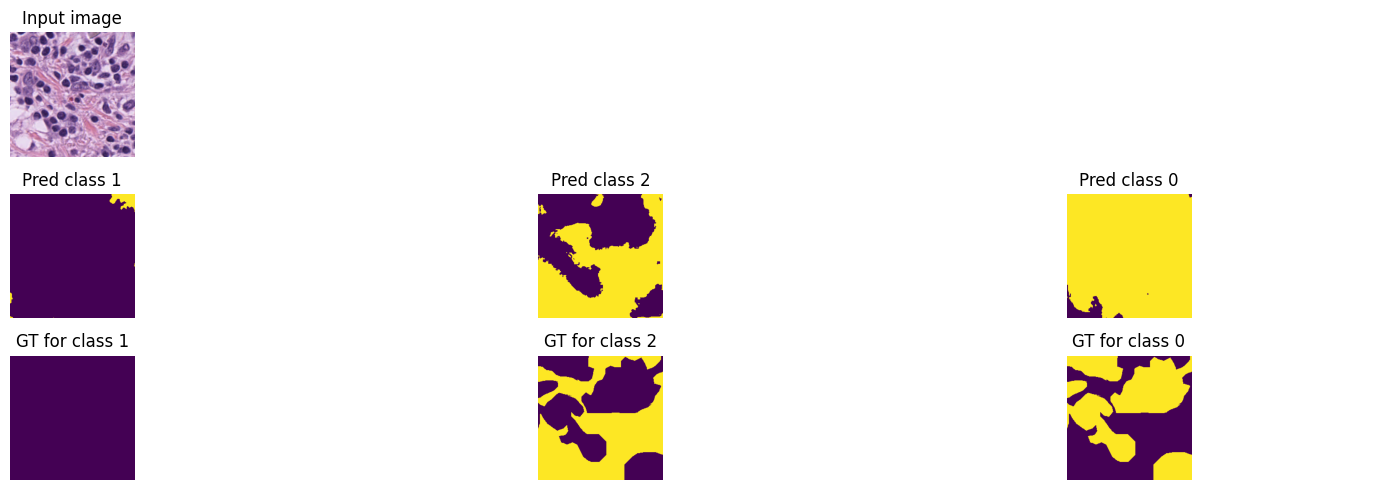

Train loss: 0.04652 | Time: 12m 35s | Val loss: 0.03842
Train_DICE_avg: 0.46333 | Train_Jaccard_avg: 0.40211 | Train_Sensitivity_avg: 0.66784 | Train_Specificity_avg: 0.76142 
Class 0 - Train_DICE: 0.43485 | Train_Jaccard: 0.38800 | Train_Sensitivity: 0.66848 | Train_Specificity: 0.81109 
Class 1 - Train_DICE: 0.56012 | Train_Jaccard: 0.49163 | Train_Sensitivity: 0.68834 | Train_Specificity: 0.73006 
Class 2 - Train_DICE: 0.39503 | Train_Jaccard: 0.32671 | Train_Sensitivity: 0.64671 | Train_Specificity: 0.74310 
Val_DICE_avg: 0.55308 | Val_Jaccard_avg: 0.49741 | Val_Sensitivity_avg: 0.75030 | Val_Specificity_avg: 0.76319 
Class 0 - Val_DICE: 0.53681 | Val_Jaccard: 0.48977 | Val_Sensitivity: 0.73600 | Val_Specificity: 0.81694 
Class 1 - Val_DICE: 0.65611 | Val_Jaccard: 0.59893 | Val_Sensitivity: 0.71393 | Val_Specificity: 0.74039 
Class 2 - Val_DICE: 0.46633 | Val_Jaccard: 0.40354 | Val_Sensitivity: 0.80097 | Val_Specificity: 0.73224 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.04585 | Time: 14m 40s | Val loss: 0.03975
Train_DICE_avg: 0.47082 | Train_Jaccard_avg: 0.40987 | Train_Sensitivity_avg: 0.67350 | Train_Specificity_avg: 0.76489 
Class 0 - Train_DICE: 0.44135 | Train_Jaccard: 0.39438 | Train_Sensitivity: 0.67232 | Train_Specificity: 0.81289 
Class 1 - Train_DICE: 0.56879 | Train_Jaccard: 0.50100 | Train_Sensitivity: 0.69145 | Train_Specificity: 0.73425 
Class 2 - Train_DICE: 0.40233 | Train_Jaccard: 0.33423 | Train_Sensitivity: 0.65674 | Train_Specificity: 0.74754 
Val_DICE_avg: 0.54108 | Val_Jaccard_avg: 0.48646 | Val_Sensitivity_avg: 0.74966 | Val_Specificity_avg: 0.76376 
Class 0 - Val_DICE: 0.53052 | Val_Jaccard: 0.48318 | Val_Sensitivity: 0.72501 | Val_Specificity: 0.81697 
Class 1 - Val_DICE: 0.64317 | Val_Jaccard: 0.58721 | Val_Sensitivity: 0.67731 | Val_Specificity: 0.75193 
Class 2 - Val_DICE: 0.44954 | Val_Jaccard: 0.38897 | Val_Sensitivity: 0.84666 | Val_Specificity: 0.72237 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.04535 | Time: 16m 46s | Val loss: 0.03852
Train_DICE_avg: 0.47746 | Train_Jaccard_avg: 0.41668 | Train_Sensitivity_avg: 0.67737 | Train_Specificity_avg: 0.76732 
Class 0 - Train_DICE: 0.44370 | Train_Jaccard: 0.39651 | Train_Sensitivity: 0.67048 | Train_Specificity: 0.81444 
Class 1 - Train_DICE: 0.57991 | Train_Jaccard: 0.51254 | Train_Sensitivity: 0.70224 | Train_Specificity: 0.73889 
Class 2 - Train_DICE: 0.40876 | Train_Jaccard: 0.34099 | Train_Sensitivity: 0.65939 | Train_Specificity: 0.74863 
Val_DICE_avg: 0.56036 | Val_Jaccard_avg: 0.50578 | Val_Sensitivity_avg: 0.76132 | Val_Specificity_avg: 0.76588 
Class 0 - Val_DICE: 0.56411 | Val_Jaccard: 0.51690 | Val_Sensitivity: 0.75070 | Val_Specificity: 0.82040 
Class 1 - Val_DICE: 0.65739 | Val_Jaccard: 0.60149 | Val_Sensitivity: 0.70028 | Val_Specificity: 0.74930 
Class 2 - Val_DICE: 0.45957 | Val_Jaccard: 0.39894 | Val_Sensitivity: 0.83297 | Val_Specificity: 0.72793 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.04495 | Time: 18m 52s | Val loss: 0.03863
Train_DICE_avg: 0.48029 | Train_Jaccard_avg: 0.41954 | Train_Sensitivity_avg: 0.68075 | Train_Specificity_avg: 0.76785 
Class 0 - Train_DICE: 0.44694 | Train_Jaccard: 0.39971 | Train_Sensitivity: 0.67428 | Train_Specificity: 0.81462 
Class 1 - Train_DICE: 0.58376 | Train_Jaccard: 0.51681 | Train_Sensitivity: 0.70643 | Train_Specificity: 0.73798 
Class 2 - Train_DICE: 0.41017 | Train_Jaccard: 0.34209 | Train_Sensitivity: 0.66156 | Train_Specificity: 0.75096 
Val_DICE_avg: 0.55880 | Val_Jaccard_avg: 0.50487 | Val_Sensitivity_avg: 0.76025 | Val_Specificity_avg: 0.76767 
Class 0 - Val_DICE: 0.54971 | Val_Jaccard: 0.50451 | Val_Sensitivity: 0.76124 | Val_Specificity: 0.81537 
Class 1 - Val_DICE: 0.65318 | Val_Jaccard: 0.59780 | Val_Sensitivity: 0.69764 | Val_Specificity: 0.75453 
Class 2 - Val_DICE: 0.47352 | Val_Jaccard: 0.41230 | Val_Sensitivity: 0.82185 | Val_Specificity: 0.73312 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.04454 | Time: 20m 57s | Val loss: 0.03852
Train_DICE_avg: 0.48548 | Train_Jaccard_avg: 0.42508 | Train_Sensitivity_avg: 0.68119 | Train_Specificity_avg: 0.77095 
Class 0 - Train_DICE: 0.44730 | Train_Jaccard: 0.40025 | Train_Sensitivity: 0.67000 | Train_Specificity: 0.81486 
Class 1 - Train_DICE: 0.58950 | Train_Jaccard: 0.52305 | Train_Sensitivity: 0.70662 | Train_Specificity: 0.74464 
Class 2 - Train_DICE: 0.41964 | Train_Jaccard: 0.35194 | Train_Sensitivity: 0.66695 | Train_Specificity: 0.75337 
Val_DICE_avg: 0.55615 | Val_Jaccard_avg: 0.50210 | Val_Sensitivity_avg: 0.75251 | Val_Specificity_avg: 0.76923 
Class 0 - Val_DICE: 0.54940 | Val_Jaccard: 0.50358 | Val_Sensitivity: 0.74217 | Val_Specificity: 0.82025 
Class 1 - Val_DICE: 0.64916 | Val_Jaccard: 0.59355 | Val_Sensitivity: 0.68835 | Val_Specificity: 0.75525 
Class 2 - Val_DICE: 0.46989 | Val_Jaccard: 0.40918 | Val_Sensitivity: 0.82702 | Val_Specificity: 0.73221 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


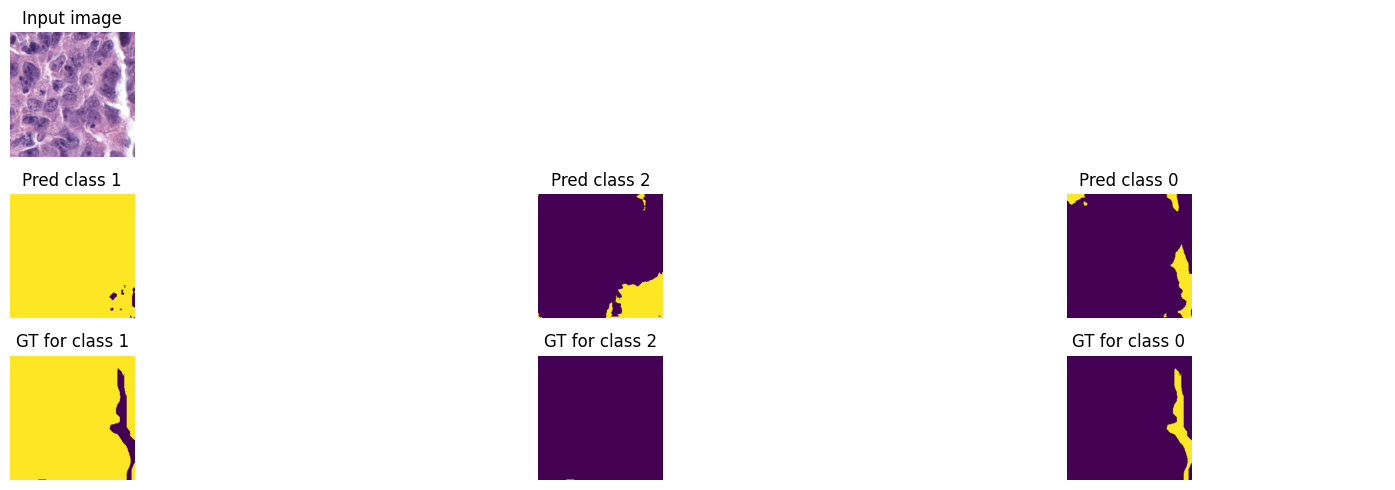

Train loss: 0.04423 | Time: 23m 7s | Val loss: 0.03745
Train_DICE_avg: 0.48462 | Train_Jaccard_avg: 0.42446 | Train_Sensitivity_avg: 0.67954 | Train_Specificity_avg: 0.77202 
Class 0 - Train_DICE: 0.44557 | Train_Jaccard: 0.39825 | Train_Sensitivity: 0.66664 | Train_Specificity: 0.81651 
Class 1 - Train_DICE: 0.59117 | Train_Jaccard: 0.52534 | Train_Sensitivity: 0.70864 | Train_Specificity: 0.74516 
Class 2 - Train_DICE: 0.41712 | Train_Jaccard: 0.34978 | Train_Sensitivity: 0.66335 | Train_Specificity: 0.75440 
Val_DICE_avg: 0.56524 | Val_Jaccard_avg: 0.51039 | Val_Sensitivity_avg: 0.75843 | Val_Specificity_avg: 0.76528 
Class 0 - Val_DICE: 0.55633 | Val_Jaccard: 0.51017 | Val_Sensitivity: 0.73636 | Val_Specificity: 0.82305 
Class 1 - Val_DICE: 0.66612 | Val_Jaccard: 0.60953 | Val_Sensitivity: 0.71956 | Val_Specificity: 0.73821 
Class 2 - Val_DICE: 0.47328 | Val_Jaccard: 0.41146 | Val_Sensitivity: 0.81937 | Val_Specificity: 0.73460 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.04365 | Time: 25m 17s | Val loss: 0.03730
Train_DICE_avg: 0.49163 | Train_Jaccard_avg: 0.43174 | Train_Sensitivity_avg: 0.68573 | Train_Specificity_avg: 0.77285 
Class 0 - Train_DICE: 0.45432 | Train_Jaccard: 0.40728 | Train_Sensitivity: 0.67739 | Train_Specificity: 0.81890 
Class 1 - Train_DICE: 0.59985 | Train_Jaccard: 0.53432 | Train_Sensitivity: 0.71813 | Train_Specificity: 0.74163 
Class 2 - Train_DICE: 0.42073 | Train_Jaccard: 0.35362 | Train_Sensitivity: 0.66167 | Train_Specificity: 0.75802 
Val_DICE_avg: 0.57191 | Val_Jaccard_avg: 0.51712 | Val_Sensitivity_avg: 0.76255 | Val_Specificity_avg: 0.76697 
Class 0 - Val_DICE: 0.56315 | Val_Jaccard: 0.51719 | Val_Sensitivity: 0.75504 | Val_Specificity: 0.82197 
Class 1 - Val_DICE: 0.67154 | Val_Jaccard: 0.61554 | Val_Sensitivity: 0.72818 | Val_Specificity: 0.73900 
Class 2 - Val_DICE: 0.48104 | Val_Jaccard: 0.41862 | Val_Sensitivity: 0.80444 | Val_Specificity: 0.73994 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.04327 | Time: 27m 26s | Val loss: 0.03701
Train_DICE_avg: 0.49592 | Train_Jaccard_avg: 0.43624 | Train_Sensitivity_avg: 0.68684 | Train_Specificity_avg: 0.77589 
Class 0 - Train_DICE: 0.45677 | Train_Jaccard: 0.40954 | Train_Sensitivity: 0.67488 | Train_Specificity: 0.81828 
Class 1 - Train_DICE: 0.60256 | Train_Jaccard: 0.53802 | Train_Sensitivity: 0.71610 | Train_Specificity: 0.74971 
Class 2 - Train_DICE: 0.42843 | Train_Jaccard: 0.36116 | Train_Sensitivity: 0.66953 | Train_Specificity: 0.75968 
Val_DICE_avg: 0.57524 | Val_Jaccard_avg: 0.52014 | Val_Sensitivity_avg: 0.76236 | Val_Specificity_avg: 0.76947 
Class 0 - Val_DICE: 0.56352 | Val_Jaccard: 0.51775 | Val_Sensitivity: 0.74974 | Val_Specificity: 0.82145 
Class 1 - Val_DICE: 0.68075 | Val_Jaccard: 0.62459 | Val_Sensitivity: 0.74032 | Val_Specificity: 0.74392 
Class 2 - Val_DICE: 0.48145 | Val_Jaccard: 0.41807 | Val_Sensitivity: 0.79701 | Val_Specificity: 0.74303 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.04275 | Time: 29m 38s | Val loss: 0.03669
Train_DICE_avg: 0.50215 | Train_Jaccard_avg: 0.44263 | Train_Sensitivity_avg: 0.69060 | Train_Specificity_avg: 0.77657 
Class 0 - Train_DICE: 0.46631 | Train_Jaccard: 0.41935 | Train_Sensitivity: 0.68694 | Train_Specificity: 0.81836 
Class 1 - Train_DICE: 0.61088 | Train_Jaccard: 0.54689 | Train_Sensitivity: 0.72282 | Train_Specificity: 0.75268 
Class 2 - Train_DICE: 0.42928 | Train_Jaccard: 0.36166 | Train_Sensitivity: 0.66205 | Train_Specificity: 0.75866 
Val_DICE_avg: 0.57092 | Val_Jaccard_avg: 0.51556 | Val_Sensitivity_avg: 0.76185 | Val_Specificity_avg: 0.76535 
Class 0 - Val_DICE: 0.55863 | Val_Jaccard: 0.51200 | Val_Sensitivity: 0.73394 | Val_Specificity: 0.82430 
Class 1 - Val_DICE: 0.67864 | Val_Jaccard: 0.62218 | Val_Sensitivity: 0.75460 | Val_Specificity: 0.72964 
Class 2 - Val_DICE: 0.47549 | Val_Jaccard: 0.41251 | Val_Sensitivity: 0.79702 | Val_Specificity: 0.74209 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.04227 | Time: 31m 50s | Val loss: 0.03591
Train_DICE_avg: 0.50687 | Train_Jaccard_avg: 0.44731 | Train_Sensitivity_avg: 0.69309 | Train_Specificity_avg: 0.77974 
Class 0 - Train_DICE: 0.46650 | Train_Jaccard: 0.41892 | Train_Sensitivity: 0.68560 | Train_Specificity: 0.82038 
Class 1 - Train_DICE: 0.61801 | Train_Jaccard: 0.55408 | Train_Sensitivity: 0.72725 | Train_Specificity: 0.75542 
Class 2 - Train_DICE: 0.43611 | Train_Jaccard: 0.36893 | Train_Sensitivity: 0.66641 | Train_Specificity: 0.76341 
Val_DICE_avg: 0.58126 | Val_Jaccard_avg: 0.52570 | Val_Sensitivity_avg: 0.75897 | Val_Specificity_avg: 0.77241 
Class 0 - Val_DICE: 0.57394 | Val_Jaccard: 0.52832 | Val_Sensitivity: 0.76206 | Val_Specificity: 0.82483 
Class 1 - Val_DICE: 0.68037 | Val_Jaccard: 0.62398 | Val_Sensitivity: 0.74586 | Val_Specificity: 0.74133 
Class 2 - Val_DICE: 0.48946 | Val_Jaccard: 0.42479 | Val_Sensitivity: 0.76899 | Val_Specificity: 0.75106 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


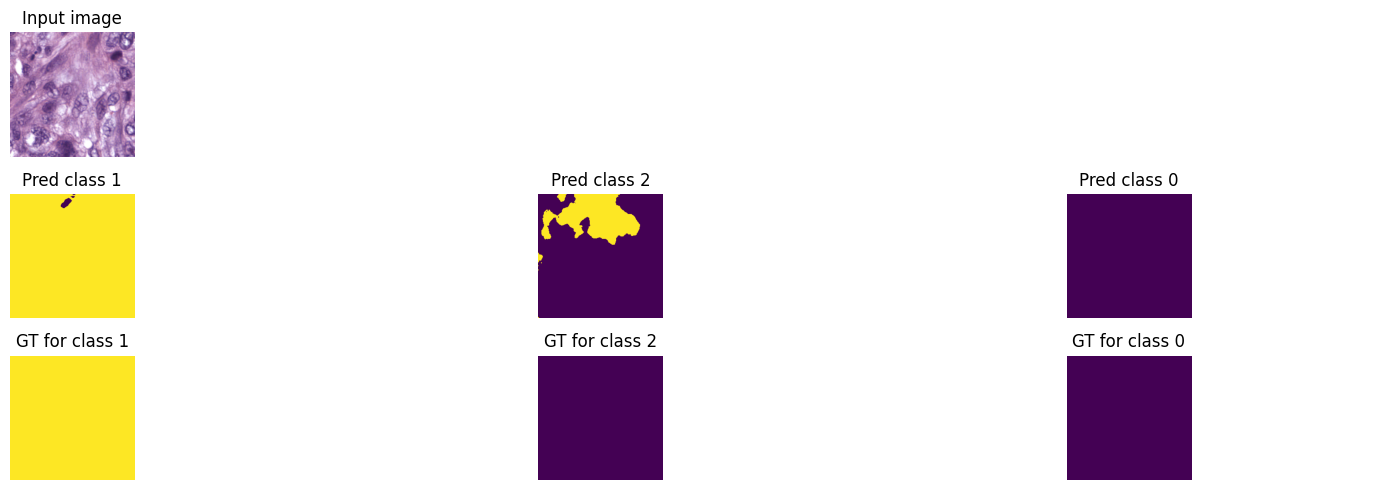

Train loss: 0.04167 | Time: 34m 2s | Val loss: 0.03513
Train_DICE_avg: 0.51230 | Train_Jaccard_avg: 0.45301 | Train_Sensitivity_avg: 0.69806 | Train_Specificity_avg: 0.78131 
Class 0 - Train_DICE: 0.46932 | Train_Jaccard: 0.42148 | Train_Sensitivity: 0.68276 | Train_Specificity: 0.82328 
Class 1 - Train_DICE: 0.62117 | Train_Jaccard: 0.55800 | Train_Sensitivity: 0.73173 | Train_Specificity: 0.75454 
Class 2 - Train_DICE: 0.44640 | Train_Jaccard: 0.37956 | Train_Sensitivity: 0.67968 | Train_Specificity: 0.76611 
Val_DICE_avg: 0.57815 | Val_Jaccard_avg: 0.52112 | Val_Sensitivity_avg: 0.75614 | Val_Specificity_avg: 0.76612 
Class 0 - Val_DICE: 0.56672 | Val_Jaccard: 0.52047 | Val_Sensitivity: 0.74758 | Val_Specificity: 0.82599 
Class 1 - Val_DICE: 0.68070 | Val_Jaccard: 0.62237 | Val_Sensitivity: 0.77994 | Val_Specificity: 0.71630 
Class 2 - Val_DICE: 0.48701 | Val_Jaccard: 0.42053 | Val_Sensitivity: 0.74089 | Val_Specificity: 0.75607 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.04142 | Time: 36m 13s | Val loss: 0.03545
Train_DICE_avg: 0.51408 | Train_Jaccard_avg: 0.45532 | Train_Sensitivity_avg: 0.69804 | Train_Specificity_avg: 0.78350 
Class 0 - Train_DICE: 0.47282 | Train_Jaccard: 0.42548 | Train_Sensitivity: 0.68812 | Train_Specificity: 0.82329 
Class 1 - Train_DICE: 0.62495 | Train_Jaccard: 0.56228 | Train_Sensitivity: 0.73074 | Train_Specificity: 0.76070 
Class 2 - Train_DICE: 0.44449 | Train_Jaccard: 0.37820 | Train_Sensitivity: 0.67526 | Train_Specificity: 0.76650 
Val_DICE_avg: 0.57916 | Val_Jaccard_avg: 0.52168 | Val_Sensitivity_avg: 0.74960 | Val_Specificity_avg: 0.77001 
Class 0 - Val_DICE: 0.56012 | Val_Jaccard: 0.51301 | Val_Sensitivity: 0.73073 | Val_Specificity: 0.82685 
Class 1 - Val_DICE: 0.67785 | Val_Jaccard: 0.61921 | Val_Sensitivity: 0.77555 | Val_Specificity: 0.71839 
Class 2 - Val_DICE: 0.49951 | Val_Jaccard: 0.43282 | Val_Sensitivity: 0.74252 | Val_Specificity: 0.76479 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.04060 | Time: 38m 22s | Val loss: 0.03518
Train_DICE_avg: 0.52175 | Train_Jaccard_avg: 0.46277 | Train_Sensitivity_avg: 0.70285 | Train_Specificity_avg: 0.78573 
Class 0 - Train_DICE: 0.47392 | Train_Jaccard: 0.42626 | Train_Sensitivity: 0.68575 | Train_Specificity: 0.82417 
Class 1 - Train_DICE: 0.63357 | Train_Jaccard: 0.57103 | Train_Sensitivity: 0.74066 | Train_Specificity: 0.76381 
Class 2 - Train_DICE: 0.45777 | Train_Jaccard: 0.39101 | Train_Sensitivity: 0.68215 | Train_Specificity: 0.76919 
Val_DICE_avg: 0.58082 | Val_Jaccard_avg: 0.52419 | Val_Sensitivity_avg: 0.74651 | Val_Specificity_avg: 0.77226 
Class 0 - Val_DICE: 0.55799 | Val_Jaccard: 0.51136 | Val_Sensitivity: 0.71960 | Val_Specificity: 0.82928 
Class 1 - Val_DICE: 0.68845 | Val_Jaccard: 0.63074 | Val_Sensitivity: 0.78880 | Val_Specificity: 0.72118 
Class 2 - Val_DICE: 0.49602 | Val_Jaccard: 0.43049 | Val_Sensitivity: 0.73112 | Val_Specificity: 0.76634 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.04025 | Time: 40m 32s | Val loss: 0.03496
Train_DICE_avg: 0.52386 | Train_Jaccard_avg: 0.46529 | Train_Sensitivity_avg: 0.70445 | Train_Specificity_avg: 0.78813 
Class 0 - Train_DICE: 0.47647 | Train_Jaccard: 0.42928 | Train_Sensitivity: 0.69220 | Train_Specificity: 0.82388 
Class 1 - Train_DICE: 0.63801 | Train_Jaccard: 0.57606 | Train_Sensitivity: 0.74212 | Train_Specificity: 0.76864 
Class 2 - Train_DICE: 0.45709 | Train_Jaccard: 0.39052 | Train_Sensitivity: 0.67902 | Train_Specificity: 0.77186 
Val_DICE_avg: 0.58678 | Val_Jaccard_avg: 0.52962 | Val_Sensitivity_avg: 0.75096 | Val_Specificity_avg: 0.77093 
Class 0 - Val_DICE: 0.56501 | Val_Jaccard: 0.51964 | Val_Sensitivity: 0.76560 | Val_Specificity: 0.82027 
Class 1 - Val_DICE: 0.68783 | Val_Jaccard: 0.62955 | Val_Sensitivity: 0.79476 | Val_Specificity: 0.70868 
Class 2 - Val_DICE: 0.50749 | Val_Jaccard: 0.43965 | Val_Sensitivity: 0.69252 | Val_Specificity: 0.78383 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.03989 | Time: 42m 42s | Val loss: 0.03461
Train_DICE_avg: 0.52775 | Train_Jaccard_avg: 0.46911 | Train_Sensitivity_avg: 0.70765 | Train_Specificity_avg: 0.78812 
Class 0 - Train_DICE: 0.47977 | Train_Jaccard: 0.43238 | Train_Sensitivity: 0.69185 | Train_Specificity: 0.82484 
Class 1 - Train_DICE: 0.64110 | Train_Jaccard: 0.57965 | Train_Sensitivity: 0.74833 | Train_Specificity: 0.76673 
Class 2 - Train_DICE: 0.46237 | Train_Jaccard: 0.39531 | Train_Sensitivity: 0.68278 | Train_Specificity: 0.77278 
Val_DICE_avg: 0.58622 | Val_Jaccard_avg: 0.52788 | Val_Sensitivity_avg: 0.73692 | Val_Specificity_avg: 0.77401 
Class 0 - Val_DICE: 0.55824 | Val_Jaccard: 0.51114 | Val_Sensitivity: 0.72268 | Val_Specificity: 0.82847 
Class 1 - Val_DICE: 0.69422 | Val_Jaccard: 0.63532 | Val_Sensitivity: 0.80958 | Val_Specificity: 0.70698 
Class 2 - Val_DICE: 0.50621 | Val_Jaccard: 0.43718 | Val_Sensitivity: 0.67849 | Val_Specificity: 0.78659 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


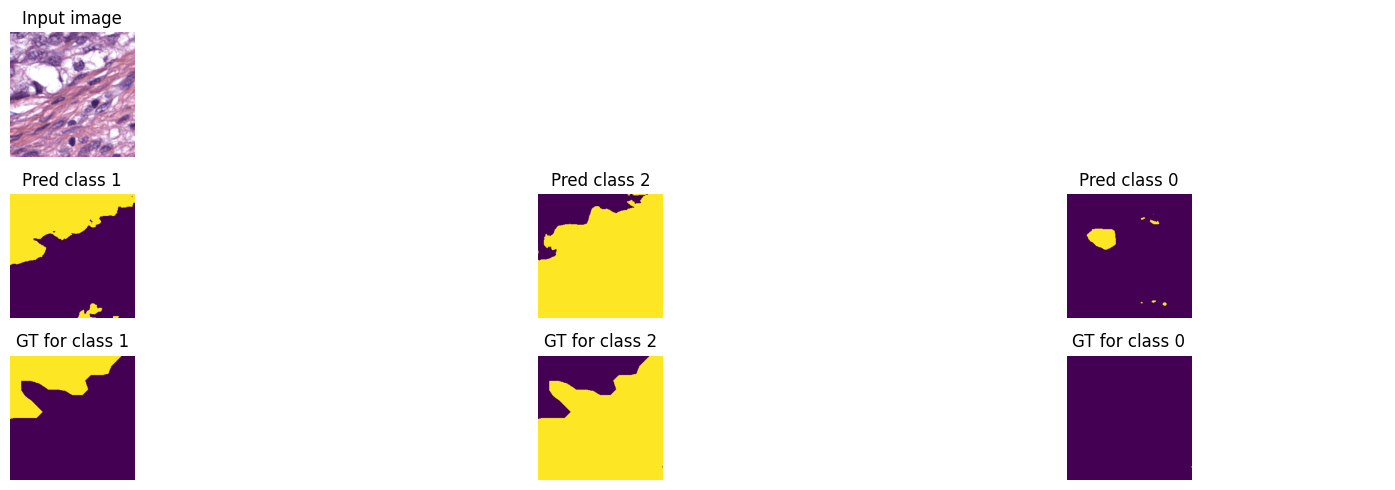

Train loss: 0.03932 | Time: 44m 53s | Val loss: 0.03485
Train_DICE_avg: 0.52942 | Train_Jaccard_avg: 0.47119 | Train_Sensitivity_avg: 0.70705 | Train_Specificity_avg: 0.79080 
Class 0 - Train_DICE: 0.48105 | Train_Jaccard: 0.43339 | Train_Sensitivity: 0.69019 | Train_Specificity: 0.82669 
Class 1 - Train_DICE: 0.64266 | Train_Jaccard: 0.58202 | Train_Sensitivity: 0.74977 | Train_Specificity: 0.77083 
Class 2 - Train_DICE: 0.46454 | Train_Jaccard: 0.39815 | Train_Sensitivity: 0.68118 | Train_Specificity: 0.77488 
Val_DICE_avg: 0.57648 | Val_Jaccard_avg: 0.51759 | Val_Sensitivity_avg: 0.72965 | Val_Specificity_avg: 0.77222 
Class 0 - Val_DICE: 0.54580 | Val_Jaccard: 0.49724 | Val_Sensitivity: 0.68496 | Val_Specificity: 0.83280 
Class 1 - Val_DICE: 0.68660 | Val_Jaccard: 0.62692 | Val_Sensitivity: 0.81635 | Val_Specificity: 0.70389 
Class 2 - Val_DICE: 0.49704 | Val_Jaccard: 0.42859 | Val_Sensitivity: 0.68765 | Val_Specificity: 0.77995 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.03848 | Time: 47m 3s | Val loss: 0.03478
Train_DICE_avg: 0.53606 | Train_Jaccard_avg: 0.47817 | Train_Sensitivity_avg: 0.71240 | Train_Specificity_avg: 0.79434 
Class 0 - Train_DICE: 0.48704 | Train_Jaccard: 0.43988 | Train_Sensitivity: 0.69541 | Train_Specificity: 0.82730 
Class 1 - Train_DICE: 0.65079 | Train_Jaccard: 0.59054 | Train_Sensitivity: 0.75572 | Train_Specificity: 0.77516 
Class 2 - Train_DICE: 0.47036 | Train_Jaccard: 0.40410 | Train_Sensitivity: 0.68609 | Train_Specificity: 0.78057 
Val_DICE_avg: 0.58277 | Val_Jaccard_avg: 0.52427 | Val_Sensitivity_avg: 0.73423 | Val_Specificity_avg: 0.77488 
Class 0 - Val_DICE: 0.55005 | Val_Jaccard: 0.50140 | Val_Sensitivity: 0.67208 | Val_Specificity: 0.84017 
Class 1 - Val_DICE: 0.69045 | Val_Jaccard: 0.63085 | Val_Sensitivity: 0.81922 | Val_Specificity: 0.70252 
Class 2 - Val_DICE: 0.50781 | Val_Jaccard: 0.44056 | Val_Sensitivity: 0.71141 | Val_Specificity: 0.78195 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.03787 | Time: 49m 14s | Val loss: 0.03474
Train_DICE_avg: 0.54304 | Train_Jaccard_avg: 0.48545 | Train_Sensitivity_avg: 0.71741 | Train_Specificity_avg: 0.79663 
Class 0 - Train_DICE: 0.49356 | Train_Jaccard: 0.44619 | Train_Sensitivity: 0.69647 | Train_Specificity: 0.82900 
Class 1 - Train_DICE: 0.66209 | Train_Jaccard: 0.60253 | Train_Sensitivity: 0.76689 | Train_Specificity: 0.78048 
Class 2 - Train_DICE: 0.47346 | Train_Jaccard: 0.40763 | Train_Sensitivity: 0.68888 | Train_Specificity: 0.78042 
Val_DICE_avg: 0.58203 | Val_Jaccard_avg: 0.52379 | Val_Sensitivity_avg: 0.73880 | Val_Specificity_avg: 0.77252 
Class 0 - Val_DICE: 0.54909 | Val_Jaccard: 0.49916 | Val_Sensitivity: 0.65962 | Val_Specificity: 0.84318 
Class 1 - Val_DICE: 0.69060 | Val_Jaccard: 0.63219 | Val_Sensitivity: 0.80848 | Val_Specificity: 0.70611 
Class 2 - Val_DICE: 0.50641 | Val_Jaccard: 0.44002 | Val_Sensitivity: 0.74829 | Val_Specificity: 0.76827 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.03698 | Time: 51m 24s | Val loss: 0.03460
Train_DICE_avg: 0.55018 | Train_Jaccard_avg: 0.49304 | Train_Sensitivity_avg: 0.72330 | Train_Specificity_avg: 0.79886 
Class 0 - Train_DICE: 0.50353 | Train_Jaccard: 0.45637 | Train_Sensitivity: 0.70519 | Train_Specificity: 0.83139 
Class 1 - Train_DICE: 0.66526 | Train_Jaccard: 0.60645 | Train_Sensitivity: 0.76832 | Train_Specificity: 0.78213 
Class 2 - Train_DICE: 0.48175 | Train_Jaccard: 0.41631 | Train_Sensitivity: 0.69639 | Train_Specificity: 0.78304 
Val_DICE_avg: 0.58247 | Val_Jaccard_avg: 0.52378 | Val_Sensitivity_avg: 0.73718 | Val_Specificity_avg: 0.77259 
Class 0 - Val_DICE: 0.55550 | Val_Jaccard: 0.50564 | Val_Sensitivity: 0.67257 | Val_Specificity: 0.84092 
Class 1 - Val_DICE: 0.69638 | Val_Jaccard: 0.63710 | Val_Sensitivity: 0.81832 | Val_Specificity: 0.70544 
Class 2 - Val_DICE: 0.49552 | Val_Jaccard: 0.42859 | Val_Sensitivity: 0.72064 | Val_Specificity: 0.77141 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.03631 | Time: 53m 34s | Val loss: 0.03421
Train_DICE_avg: 0.55810 | Train_Jaccard_avg: 0.50116 | Train_Sensitivity_avg: 0.73123 | Train_Specificity_avg: 0.80211 
Class 0 - Train_DICE: 0.51140 | Train_Jaccard: 0.46399 | Train_Sensitivity: 0.71218 | Train_Specificity: 0.83185 
Class 1 - Train_DICE: 0.67634 | Train_Jaccard: 0.61851 | Train_Sensitivity: 0.77996 | Train_Specificity: 0.78767 
Class 2 - Train_DICE: 0.48655 | Train_Jaccard: 0.42098 | Train_Sensitivity: 0.70156 | Train_Specificity: 0.78680 
Val_DICE_avg: 0.60026 | Val_Jaccard_avg: 0.54336 | Val_Sensitivity_avg: 0.75375 | Val_Specificity_avg: 0.77881 
Class 0 - Val_DICE: 0.57577 | Val_Jaccard: 0.53035 | Val_Sensitivity: 0.73308 | Val_Specificity: 0.83671 
Class 1 - Val_DICE: 0.70686 | Val_Jaccard: 0.64969 | Val_Sensitivity: 0.82228 | Val_Specificity: 0.71063 
Class 2 - Val_DICE: 0.51816 | Val_Jaccard: 0.45002 | Val_Sensitivity: 0.70590 | Val_Specificity: 0.78909 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


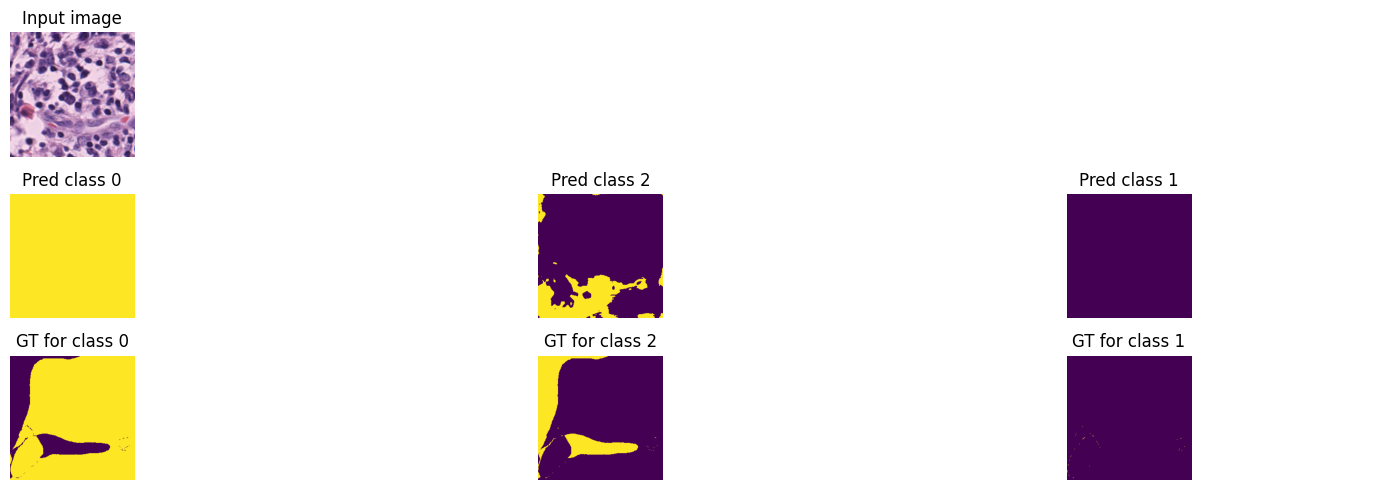

Train loss: 0.03591 | Time: 55m 45s | Val loss: 0.03491
Train_DICE_avg: 0.55945 | Train_Jaccard_avg: 0.50305 | Train_Sensitivity_avg: 0.73352 | Train_Specificity_avg: 0.80469 
Class 0 - Train_DICE: 0.51147 | Train_Jaccard: 0.46420 | Train_Sensitivity: 0.70591 | Train_Specificity: 0.83378 
Class 1 - Train_DICE: 0.67340 | Train_Jaccard: 0.61657 | Train_Sensitivity: 0.78379 | Train_Specificity: 0.79018 
Class 2 - Train_DICE: 0.49348 | Train_Jaccard: 0.42838 | Train_Sensitivity: 0.71087 | Train_Specificity: 0.79011 
Val_DICE_avg: 0.58740 | Val_Jaccard_avg: 0.52779 | Val_Sensitivity_avg: 0.73870 | Val_Specificity_avg: 0.77282 
Class 0 - Val_DICE: 0.55182 | Val_Jaccard: 0.50188 | Val_Sensitivity: 0.66094 | Val_Specificity: 0.84467 
Class 1 - Val_DICE: 0.70872 | Val_Jaccard: 0.64856 | Val_Sensitivity: 0.85465 | Val_Specificity: 0.69504 
Class 2 - Val_DICE: 0.50166 | Val_Jaccard: 0.43291 | Val_Sensitivity: 0.70051 | Val_Specificity: 0.77873 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.03537 | Time: 57m 55s | Val loss: 0.03459
Train_DICE_avg: 0.56869 | Train_Jaccard_avg: 0.51229 | Train_Sensitivity_avg: 0.74010 | Train_Specificity_avg: 0.80784 
Class 0 - Train_DICE: 0.52507 | Train_Jaccard: 0.47766 | Train_Sensitivity: 0.71964 | Train_Specificity: 0.83724 
Class 1 - Train_DICE: 0.68292 | Train_Jaccard: 0.62589 | Train_Sensitivity: 0.78796 | Train_Specificity: 0.79513 
Class 2 - Train_DICE: 0.49808 | Train_Jaccard: 0.43331 | Train_Sensitivity: 0.71271 | Train_Specificity: 0.79115 
Val_DICE_avg: 0.59117 | Val_Jaccard_avg: 0.53187 | Val_Sensitivity_avg: 0.74915 | Val_Specificity_avg: 0.77098 
Class 0 - Val_DICE: 0.56453 | Val_Jaccard: 0.51608 | Val_Sensitivity: 0.69596 | Val_Specificity: 0.84056 
Class 1 - Val_DICE: 0.70668 | Val_Jaccard: 0.64690 | Val_Sensitivity: 0.86083 | Val_Specificity: 0.69274 
Class 2 - Val_DICE: 0.50230 | Val_Jaccard: 0.43264 | Val_Sensitivity: 0.69065 | Val_Specificity: 0.77964 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.03486 | Time: 60m 5s | Val loss: 0.03480
Train_DICE_avg: 0.57079 | Train_Jaccard_avg: 0.51480 | Train_Sensitivity_avg: 0.74335 | Train_Specificity_avg: 0.81008 
Class 0 - Train_DICE: 0.52801 | Train_Jaccard: 0.48096 | Train_Sensitivity: 0.72443 | Train_Specificity: 0.83775 
Class 1 - Train_DICE: 0.68410 | Train_Jaccard: 0.62745 | Train_Sensitivity: 0.79005 | Train_Specificity: 0.79793 
Class 2 - Train_DICE: 0.50026 | Train_Jaccard: 0.43600 | Train_Sensitivity: 0.71557 | Train_Specificity: 0.79455 
Val_DICE_avg: 0.59380 | Val_Jaccard_avg: 0.53443 | Val_Sensitivity_avg: 0.74327 | Val_Specificity_avg: 0.77554 
Class 0 - Val_DICE: 0.56728 | Val_Jaccard: 0.51729 | Val_Sensitivity: 0.68149 | Val_Specificity: 0.84693 
Class 1 - Val_DICE: 0.71000 | Val_Jaccard: 0.65105 | Val_Sensitivity: 0.85634 | Val_Specificity: 0.69712 
Class 2 - Val_DICE: 0.50411 | Val_Jaccard: 0.43495 | Val_Sensitivity: 0.69196 | Val_Specificity: 0.78257 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.03432 | Time: 62m 15s | Val loss: 0.03451
Train_DICE_avg: 0.57601 | Train_Jaccard_avg: 0.51981 | Train_Sensitivity_avg: 0.74465 | Train_Specificity_avg: 0.81088 
Class 0 - Train_DICE: 0.53545 | Train_Jaccard: 0.48859 | Train_Sensitivity: 0.73146 | Train_Specificity: 0.83956 
Class 1 - Train_DICE: 0.68871 | Train_Jaccard: 0.63224 | Train_Sensitivity: 0.79127 | Train_Specificity: 0.79837 
Class 2 - Train_DICE: 0.50388 | Train_Jaccard: 0.43860 | Train_Sensitivity: 0.71123 | Train_Specificity: 0.79471 
Val_DICE_avg: 0.59180 | Val_Jaccard_avg: 0.53171 | Val_Sensitivity_avg: 0.74177 | Val_Specificity_avg: 0.77321 
Class 0 - Val_DICE: 0.56482 | Val_Jaccard: 0.51456 | Val_Sensitivity: 0.66787 | Val_Specificity: 0.84826 
Class 1 - Val_DICE: 0.71451 | Val_Jaccard: 0.65408 | Val_Sensitivity: 0.86587 | Val_Specificity: 0.69485 
Class 2 - Val_DICE: 0.49606 | Val_Jaccard: 0.42648 | Val_Sensitivity: 0.69157 | Val_Specificity: 0.77653 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.03403 | Time: 64m 25s | Val loss: 0.03470
Train_DICE_avg: 0.57944 | Train_Jaccard_avg: 0.52372 | Train_Sensitivity_avg: 0.74983 | Train_Specificity_avg: 0.81176 
Class 0 - Train_DICE: 0.54062 | Train_Jaccard: 0.49367 | Train_Sensitivity: 0.72976 | Train_Specificity: 0.84095 
Class 1 - Train_DICE: 0.69150 | Train_Jaccard: 0.63497 | Train_Sensitivity: 0.79769 | Train_Specificity: 0.79950 
Class 2 - Train_DICE: 0.50619 | Train_Jaccard: 0.44251 | Train_Sensitivity: 0.72205 | Train_Specificity: 0.79484 
Val_DICE_avg: 0.59360 | Val_Jaccard_avg: 0.53405 | Val_Sensitivity_avg: 0.74285 | Val_Specificity_avg: 0.77609 
Class 0 - Val_DICE: 0.56166 | Val_Jaccard: 0.51161 | Val_Sensitivity: 0.67133 | Val_Specificity: 0.84808 
Class 1 - Val_DICE: 0.71689 | Val_Jaccard: 0.65753 | Val_Sensitivity: 0.88387 | Val_Specificity: 0.69087 
Class 2 - Val_DICE: 0.50226 | Val_Jaccard: 0.43300 | Val_Sensitivity: 0.67335 | Val_Specificity: 0.78934 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


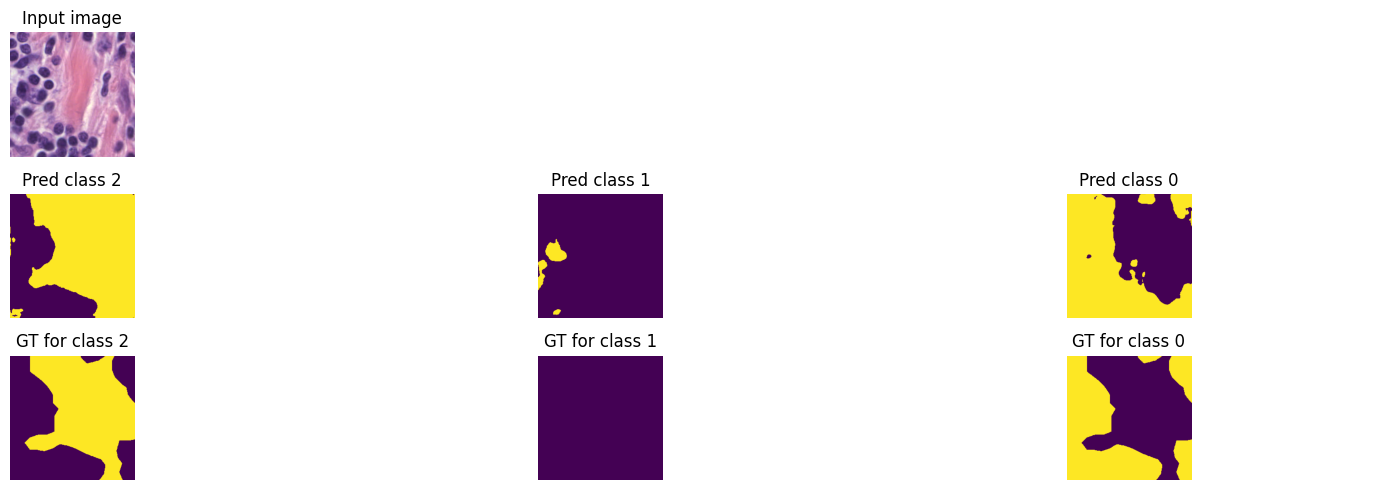

Train loss: 0.03362 | Time: 66m 36s | Val loss: 0.03423
Train_DICE_avg: 0.58423 | Train_Jaccard_avg: 0.52877 | Train_Sensitivity_avg: 0.75523 | Train_Specificity_avg: 0.81420 
Class 0 - Train_DICE: 0.54923 | Train_Jaccard: 0.50284 | Train_Sensitivity: 0.74038 | Train_Specificity: 0.84375 
Class 1 - Train_DICE: 0.69305 | Train_Jaccard: 0.63745 | Train_Sensitivity: 0.80108 | Train_Specificity: 0.80104 
Class 2 - Train_DICE: 0.51042 | Train_Jaccard: 0.44601 | Train_Sensitivity: 0.72425 | Train_Specificity: 0.79779 
Val_DICE_avg: 0.59136 | Val_Jaccard_avg: 0.53292 | Val_Sensitivity_avg: 0.74457 | Val_Specificity_avg: 0.77700 
Class 0 - Val_DICE: 0.54870 | Val_Jaccard: 0.49930 | Val_Sensitivity: 0.65244 | Val_Specificity: 0.85088 
Class 1 - Val_DICE: 0.71989 | Val_Jaccard: 0.66216 | Val_Sensitivity: 0.86301 | Val_Specificity: 0.70048 
Class 2 - Val_DICE: 0.50548 | Val_Jaccard: 0.43731 | Val_Sensitivity: 0.71824 | Val_Specificity: 0.77963 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.03286 | Time: 68m 46s | Val loss: 0.03502
Train_DICE_avg: 0.59382 | Train_Jaccard_avg: 0.53854 | Train_Sensitivity_avg: 0.76104 | Train_Specificity_avg: 0.81865 
Class 0 - Train_DICE: 0.55776 | Train_Jaccard: 0.51109 | Train_Sensitivity: 0.74535 | Train_Specificity: 0.84485 
Class 1 - Train_DICE: 0.70303 | Train_Jaccard: 0.64834 | Train_Sensitivity: 0.80847 | Train_Specificity: 0.80698 
Class 2 - Train_DICE: 0.52067 | Train_Jaccard: 0.45619 | Train_Sensitivity: 0.72930 | Train_Specificity: 0.80411 
Val_DICE_avg: 0.59591 | Val_Jaccard_avg: 0.53591 | Val_Sensitivity_avg: 0.74707 | Val_Specificity_avg: 0.77451 
Class 0 - Val_DICE: 0.56567 | Val_Jaccard: 0.51697 | Val_Sensitivity: 0.68315 | Val_Specificity: 0.84613 
Class 1 - Val_DICE: 0.71179 | Val_Jaccard: 0.64961 | Val_Sensitivity: 0.89779 | Val_Specificity: 0.67781 
Class 2 - Val_DICE: 0.51028 | Val_Jaccard: 0.44114 | Val_Sensitivity: 0.66028 | Val_Specificity: 0.79959 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.03248 | Time: 70m 57s | Val loss: 0.03429
Train_DICE_avg: 0.59110 | Train_Jaccard_avg: 0.53612 | Train_Sensitivity_avg: 0.75868 | Train_Specificity_avg: 0.81957 
Class 0 - Train_DICE: 0.55861 | Train_Jaccard: 0.51253 | Train_Sensitivity: 0.74481 | Train_Specificity: 0.84866 
Class 1 - Train_DICE: 0.69667 | Train_Jaccard: 0.64202 | Train_Sensitivity: 0.80347 | Train_Specificity: 0.80610 
Class 2 - Train_DICE: 0.51801 | Train_Jaccard: 0.45381 | Train_Sensitivity: 0.72776 | Train_Specificity: 0.80394 
Val_DICE_avg: 0.60047 | Val_Jaccard_avg: 0.54071 | Val_Sensitivity_avg: 0.75465 | Val_Specificity_avg: 0.77686 
Class 0 - Val_DICE: 0.57052 | Val_Jaccard: 0.52092 | Val_Sensitivity: 0.68581 | Val_Specificity: 0.84876 
Class 1 - Val_DICE: 0.71889 | Val_Jaccard: 0.65764 | Val_Sensitivity: 0.88568 | Val_Specificity: 0.69016 
Class 2 - Val_DICE: 0.51200 | Val_Jaccard: 0.44356 | Val_Sensitivity: 0.69247 | Val_Specificity: 0.79166 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.03162 | Time: 73m 8s | Val loss: 0.03316
Train_DICE_avg: 0.60194 | Train_Jaccard_avg: 0.54746 | Train_Sensitivity_avg: 0.76943 | Train_Specificity_avg: 0.82585 
Class 0 - Train_DICE: 0.56931 | Train_Jaccard: 0.52332 | Train_Sensitivity: 0.75696 | Train_Specificity: 0.84900 
Class 1 - Train_DICE: 0.70941 | Train_Jaccard: 0.65626 | Train_Sensitivity: 0.81484 | Train_Specificity: 0.81977 
Class 2 - Train_DICE: 0.52709 | Train_Jaccard: 0.46279 | Train_Sensitivity: 0.73650 | Train_Specificity: 0.80878 
Val_DICE_avg: 0.61026 | Val_Jaccard_avg: 0.55204 | Val_Sensitivity_avg: 0.75588 | Val_Specificity_avg: 0.78080 
Class 0 - Val_DICE: 0.59222 | Val_Jaccard: 0.54430 | Val_Sensitivity: 0.71083 | Val_Specificity: 0.84971 
Class 1 - Val_DICE: 0.72668 | Val_Jaccard: 0.66849 | Val_Sensitivity: 0.86721 | Val_Specificity: 0.70132 
Class 2 - Val_DICE: 0.51188 | Val_Jaccard: 0.44333 | Val_Sensitivity: 0.68960 | Val_Specificity: 0.79138 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.03134 | Time: 75m 18s | Val loss: 0.03417
Train_DICE_avg: 0.60361 | Train_Jaccard_avg: 0.54940 | Train_Sensitivity_avg: 0.77279 | Train_Specificity_avg: 0.82581 
Class 0 - Train_DICE: 0.57179 | Train_Jaccard: 0.52647 | Train_Sensitivity: 0.76063 | Train_Specificity: 0.85103 
Class 1 - Train_DICE: 0.71126 | Train_Jaccard: 0.65757 | Train_Sensitivity: 0.81815 | Train_Specificity: 0.81604 
Class 2 - Train_DICE: 0.52777 | Train_Jaccard: 0.46416 | Train_Sensitivity: 0.73959 | Train_Specificity: 0.81036 
Val_DICE_avg: 0.60008 | Val_Jaccard_avg: 0.54067 | Val_Sensitivity_avg: 0.75274 | Val_Specificity_avg: 0.77311 
Class 0 - Val_DICE: 0.57834 | Val_Jaccard: 0.52920 | Val_Sensitivity: 0.68137 | Val_Specificity: 0.85271 
Class 1 - Val_DICE: 0.72106 | Val_Jaccard: 0.66204 | Val_Sensitivity: 0.88321 | Val_Specificity: 0.69054 
Class 2 - Val_DICE: 0.50084 | Val_Jaccard: 0.43076 | Val_Sensitivity: 0.69364 | Val_Specificity: 0.77608 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


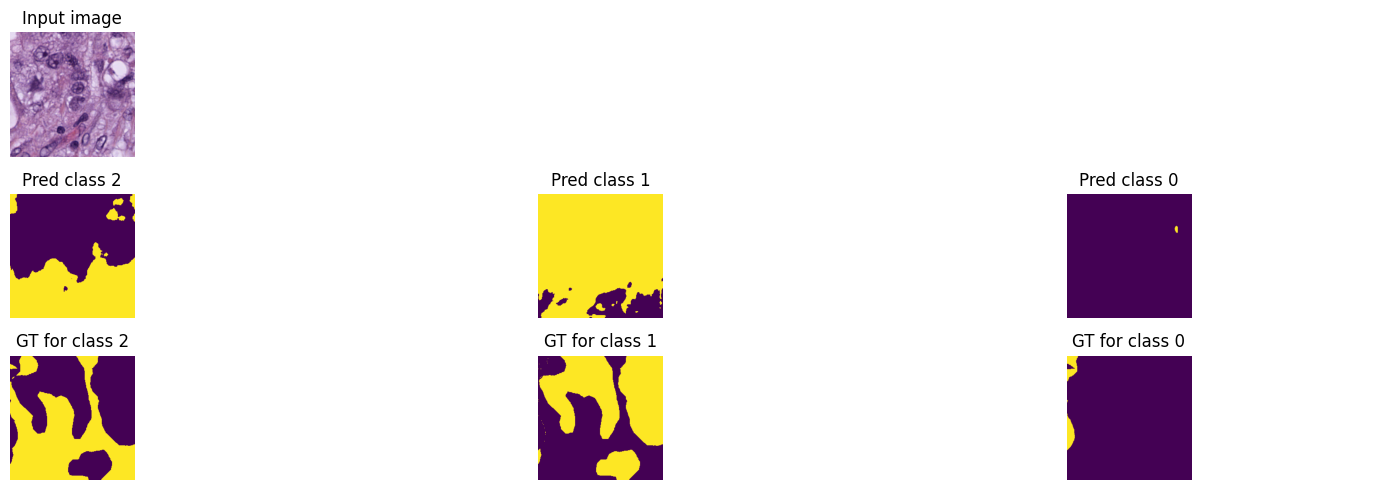

Train loss: 0.03066 | Time: 77m 30s | Val loss: 0.03337
Train_DICE_avg: 0.61018 | Train_Jaccard_avg: 0.55618 | Train_Sensitivity_avg: 0.77514 | Train_Specificity_avg: 0.82779 
Class 0 - Train_DICE: 0.58262 | Train_Jaccard: 0.53681 | Train_Sensitivity: 0.76742 | Train_Specificity: 0.85288 
Class 1 - Train_DICE: 0.71979 | Train_Jaccard: 0.66691 | Train_Sensitivity: 0.82455 | Train_Specificity: 0.81757 
Class 2 - Train_DICE: 0.52814 | Train_Jaccard: 0.46481 | Train_Sensitivity: 0.73345 | Train_Specificity: 0.81292 
Val_DICE_avg: 0.60917 | Val_Jaccard_avg: 0.55012 | Val_Sensitivity_avg: 0.75641 | Val_Specificity_avg: 0.77743 
Class 0 - Val_DICE: 0.58870 | Val_Jaccard: 0.54005 | Val_Sensitivity: 0.70458 | Val_Specificity: 0.84848 
Class 1 - Val_DICE: 0.72773 | Val_Jaccard: 0.66883 | Val_Sensitivity: 0.87910 | Val_Specificity: 0.69787 
Class 2 - Val_DICE: 0.51107 | Val_Jaccard: 0.44149 | Val_Sensitivity: 0.68555 | Val_Specificity: 0.78594 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]


Train loss: 0.03033 | Time: 79m 41s | Val loss: 0.03289
Train_DICE_avg: 0.61420 | Train_Jaccard_avg: 0.55990 | Train_Sensitivity_avg: 0.77570 | Train_Specificity_avg: 0.82948 
Class 0 - Train_DICE: 0.58877 | Train_Jaccard: 0.54237 | Train_Sensitivity: 0.76903 | Train_Specificity: 0.85564 
Class 1 - Train_DICE: 0.71614 | Train_Jaccard: 0.66357 | Train_Sensitivity: 0.82216 | Train_Specificity: 0.82172 
Class 2 - Train_DICE: 0.53769 | Train_Jaccard: 0.47375 | Train_Sensitivity: 0.73592 | Train_Specificity: 0.81106 
Val_DICE_avg: 0.61198 | Val_Jaccard_avg: 0.55346 | Val_Sensitivity_avg: 0.76035 | Val_Specificity_avg: 0.77897 
Class 0 - Val_DICE: 0.59188 | Val_Jaccard: 0.54292 | Val_Sensitivity: 0.71205 | Val_Specificity: 0.84775 
Class 1 - Val_DICE: 0.73172 | Val_Jaccard: 0.67392 | Val_Sensitivity: 0.86852 | Val_Specificity: 0.70423 
Class 2 - Val_DICE: 0.51233 | Val_Jaccard: 0.44353 | Val_Sensitivity: 0.70047 | Val_Specificity: 0.78493 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.02990 | Time: 81m 52s | Val loss: 0.03266
Train_DICE_avg: 0.61737 | Train_Jaccard_avg: 0.56352 | Train_Sensitivity_avg: 0.78041 | Train_Specificity_avg: 0.83058 
Class 0 - Train_DICE: 0.59676 | Train_Jaccard: 0.55070 | Train_Sensitivity: 0.77658 | Train_Specificity: 0.85460 
Class 1 - Train_DICE: 0.71974 | Train_Jaccard: 0.66744 | Train_Sensitivity: 0.82132 | Train_Specificity: 0.82493 
Class 2 - Train_DICE: 0.53560 | Train_Jaccard: 0.47242 | Train_Sensitivity: 0.74333 | Train_Specificity: 0.81220 
Val_DICE_avg: 0.62181 | Val_Jaccard_avg: 0.56617 | Val_Sensitivity_avg: 0.78029 | Val_Specificity_avg: 0.78330 
Class 0 - Val_DICE: 0.61234 | Val_Jaccard: 0.56560 | Val_Sensitivity: 0.76275 | Val_Specificity: 0.83832 
Class 1 - Val_DICE: 0.73451 | Val_Jaccard: 0.68086 | Val_Sensitivity: 0.83937 | Val_Specificity: 0.73060 
Class 2 - Val_DICE: 0.51858 | Val_Jaccard: 0.45205 | Val_Sensitivity: 0.73874 | Val_Specificity: 0.78097 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.02938 | Time: 84m 2s | Val loss: 0.03255
Train_DICE_avg: 0.62336 | Train_Jaccard_avg: 0.56953 | Train_Sensitivity_avg: 0.78270 | Train_Specificity_avg: 0.83350 
Class 0 - Train_DICE: 0.60316 | Train_Jaccard: 0.55714 | Train_Sensitivity: 0.77765 | Train_Specificity: 0.85943 
Class 1 - Train_DICE: 0.72494 | Train_Jaccard: 0.67308 | Train_Sensitivity: 0.82931 | Train_Specificity: 0.82490 
Class 2 - Train_DICE: 0.54196 | Train_Jaccard: 0.47838 | Train_Sensitivity: 0.74115 | Train_Specificity: 0.81617 
Val_DICE_avg: 0.61710 | Val_Jaccard_avg: 0.56058 | Val_Sensitivity_avg: 0.77363 | Val_Specificity_avg: 0.78315 
Class 0 - Val_DICE: 0.59670 | Val_Jaccard: 0.54978 | Val_Sensitivity: 0.74524 | Val_Specificity: 0.83939 
Class 1 - Val_DICE: 0.73520 | Val_Jaccard: 0.68067 | Val_Sensitivity: 0.85725 | Val_Specificity: 0.71921 
Class 2 - Val_DICE: 0.51941 | Val_Jaccard: 0.45130 | Val_Sensitivity: 0.71841 | Val_Specificity: 0.79086 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.02920 | Time: 86m 13s | Val loss: 0.03291
Train_DICE_avg: 0.62387 | Train_Jaccard_avg: 0.57021 | Train_Sensitivity_avg: 0.78650 | Train_Specificity_avg: 0.83353 
Class 0 - Train_DICE: 0.60916 | Train_Jaccard: 0.56307 | Train_Sensitivity: 0.78715 | Train_Specificity: 0.86111 
Class 1 - Train_DICE: 0.72482 | Train_Jaccard: 0.67300 | Train_Sensitivity: 0.82961 | Train_Specificity: 0.82599 
Class 2 - Train_DICE: 0.53762 | Train_Jaccard: 0.47455 | Train_Sensitivity: 0.74275 | Train_Specificity: 0.81348 
Val_DICE_avg: 0.62100 | Val_Jaccard_avg: 0.56455 | Val_Sensitivity_avg: 0.78045 | Val_Specificity_avg: 0.77632 
Class 0 - Val_DICE: 0.60773 | Val_Jaccard: 0.56057 | Val_Sensitivity: 0.76083 | Val_Specificity: 0.83748 
Class 1 - Val_DICE: 0.73475 | Val_Jaccard: 0.68026 | Val_Sensitivity: 0.83832 | Val_Specificity: 0.71520 
Class 2 - Val_DICE: 0.52054 | Val_Jaccard: 0.45283 | Val_Sensitivity: 0.74219 | Val_Specificity: 0.77628 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


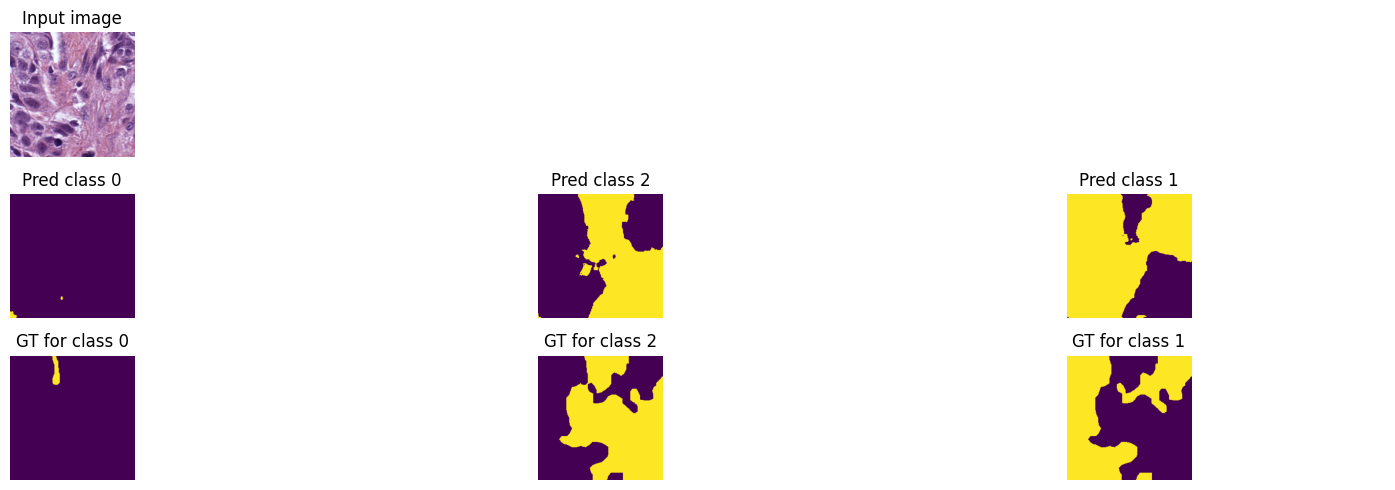

Train loss: 0.02868 | Time: 88m 24s | Val loss: 0.03322
Train_DICE_avg: 0.62573 | Train_Jaccard_avg: 0.57225 | Train_Sensitivity_avg: 0.78594 | Train_Specificity_avg: 0.83716 
Class 0 - Train_DICE: 0.61030 | Train_Jaccard: 0.56395 | Train_Sensitivity: 0.78630 | Train_Specificity: 0.86204 
Class 1 - Train_DICE: 0.72465 | Train_Jaccard: 0.67363 | Train_Sensitivity: 0.82825 | Train_Specificity: 0.82867 
Class 2 - Train_DICE: 0.54223 | Train_Jaccard: 0.47916 | Train_Sensitivity: 0.74328 | Train_Specificity: 0.82078 
Val_DICE_avg: 0.61989 | Val_Jaccard_avg: 0.56500 | Val_Sensitivity_avg: 0.78593 | Val_Specificity_avg: 0.78342 
Class 0 - Val_DICE: 0.61070 | Val_Jaccard: 0.56504 | Val_Sensitivity: 0.78359 | Val_Specificity: 0.83284 
Class 1 - Val_DICE: 0.72830 | Val_Jaccard: 0.67526 | Val_Sensitivity: 0.81406 | Val_Specificity: 0.74412 
Class 2 - Val_DICE: 0.52069 | Val_Jaccard: 0.45470 | Val_Sensitivity: 0.76014 | Val_Specificity: 0.77331 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.02866 | Time: 90m 34s | Val loss: 0.03327
Train_DICE_avg: 0.63148 | Train_Jaccard_avg: 0.57813 | Train_Sensitivity_avg: 0.79245 | Train_Specificity_avg: 0.83934 
Class 0 - Train_DICE: 0.61724 | Train_Jaccard: 0.57128 | Train_Sensitivity: 0.79426 | Train_Specificity: 0.86539 
Class 1 - Train_DICE: 0.72774 | Train_Jaccard: 0.67699 | Train_Sensitivity: 0.83521 | Train_Specificity: 0.82887 
Class 2 - Train_DICE: 0.54945 | Train_Jaccard: 0.48612 | Train_Sensitivity: 0.74789 | Train_Specificity: 0.82376 
Val_DICE_avg: 0.60927 | Val_Jaccard_avg: 0.55378 | Val_Sensitivity_avg: 0.77674 | Val_Specificity_avg: 0.77900 
Class 0 - Val_DICE: 0.58662 | Val_Jaccard: 0.53889 | Val_Sensitivity: 0.71205 | Val_Specificity: 0.84486 
Class 1 - Val_DICE: 0.73440 | Val_Jaccard: 0.68089 | Val_Sensitivity: 0.84700 | Val_Specificity: 0.72610 
Class 2 - Val_DICE: 0.50678 | Val_Jaccard: 0.44157 | Val_Sensitivity: 0.77116 | Val_Specificity: 0.76605 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.02796 | Time: 92m 45s | Val loss: 0.03310
Train_DICE_avg: 0.63429 | Train_Jaccard_avg: 0.58109 | Train_Sensitivity_avg: 0.79435 | Train_Specificity_avg: 0.84107 
Class 0 - Train_DICE: 0.62285 | Train_Jaccard: 0.57661 | Train_Sensitivity: 0.79633 | Train_Specificity: 0.86557 
Class 1 - Train_DICE: 0.73170 | Train_Jaccard: 0.68114 | Train_Sensitivity: 0.83529 | Train_Specificity: 0.83329 
Class 2 - Train_DICE: 0.54831 | Train_Jaccard: 0.48552 | Train_Sensitivity: 0.75142 | Train_Specificity: 0.82435 
Val_DICE_avg: 0.61869 | Val_Jaccard_avg: 0.56382 | Val_Sensitivity_avg: 0.78865 | Val_Specificity_avg: 0.78416 
Class 0 - Val_DICE: 0.60492 | Val_Jaccard: 0.55828 | Val_Sensitivity: 0.75898 | Val_Specificity: 0.83954 
Class 1 - Val_DICE: 0.73571 | Val_Jaccard: 0.68274 | Val_Sensitivity: 0.82917 | Val_Specificity: 0.74397 
Class 2 - Val_DICE: 0.51544 | Val_Jaccard: 0.45044 | Val_Sensitivity: 0.77780 | Val_Specificity: 0.76898 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.02793 | Time: 94m 55s | Val loss: 0.03318
Train_DICE_avg: 0.63809 | Train_Jaccard_avg: 0.58501 | Train_Sensitivity_avg: 0.79591 | Train_Specificity_avg: 0.84102 
Class 0 - Train_DICE: 0.62771 | Train_Jaccard: 0.58149 | Train_Sensitivity: 0.79808 | Train_Specificity: 0.86694 
Class 1 - Train_DICE: 0.73478 | Train_Jaccard: 0.68444 | Train_Sensitivity: 0.84001 | Train_Specificity: 0.83250 
Class 2 - Train_DICE: 0.55178 | Train_Jaccard: 0.48910 | Train_Sensitivity: 0.74962 | Train_Specificity: 0.82363 
Val_DICE_avg: 0.61447 | Val_Jaccard_avg: 0.55964 | Val_Sensitivity_avg: 0.78759 | Val_Specificity_avg: 0.78465 
Class 0 - Val_DICE: 0.59913 | Val_Jaccard: 0.55119 | Val_Sensitivity: 0.74192 | Val_Specificity: 0.84191 
Class 1 - Val_DICE: 0.73402 | Val_Jaccard: 0.68150 | Val_Sensitivity: 0.83024 | Val_Specificity: 0.74583 
Class 2 - Val_DICE: 0.51028 | Val_Jaccard: 0.44624 | Val_Sensitivity: 0.79060 | Val_Specificity: 0.76621 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.02761 | Time: 97m 5s | Val loss: 0.03370
Train_DICE_avg: 0.64020 | Train_Jaccard_avg: 0.58709 | Train_Sensitivity_avg: 0.79801 | Train_Specificity_avg: 0.84132 
Class 0 - Train_DICE: 0.63012 | Train_Jaccard: 0.58365 | Train_Sensitivity: 0.79917 | Train_Specificity: 0.86761 
Class 1 - Train_DICE: 0.73645 | Train_Jaccard: 0.68646 | Train_Sensitivity: 0.84066 | Train_Specificity: 0.82872 
Class 2 - Train_DICE: 0.55402 | Train_Jaccard: 0.49117 | Train_Sensitivity: 0.75420 | Train_Specificity: 0.82764 
Val_DICE_avg: 0.61891 | Val_Jaccard_avg: 0.56543 | Val_Sensitivity_avg: 0.80027 | Val_Specificity_avg: 0.78767 
Class 0 - Val_DICE: 0.61046 | Val_Jaccard: 0.56433 | Val_Sensitivity: 0.77016 | Val_Specificity: 0.83953 
Class 1 - Val_DICE: 0.73907 | Val_Jaccard: 0.68700 | Val_Sensitivity: 0.81677 | Val_Specificity: 0.76272 
Class 2 - Val_DICE: 0.50718 | Val_Jaccard: 0.44497 | Val_Sensitivity: 0.81387 | Val_Specificity: 0.76077 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


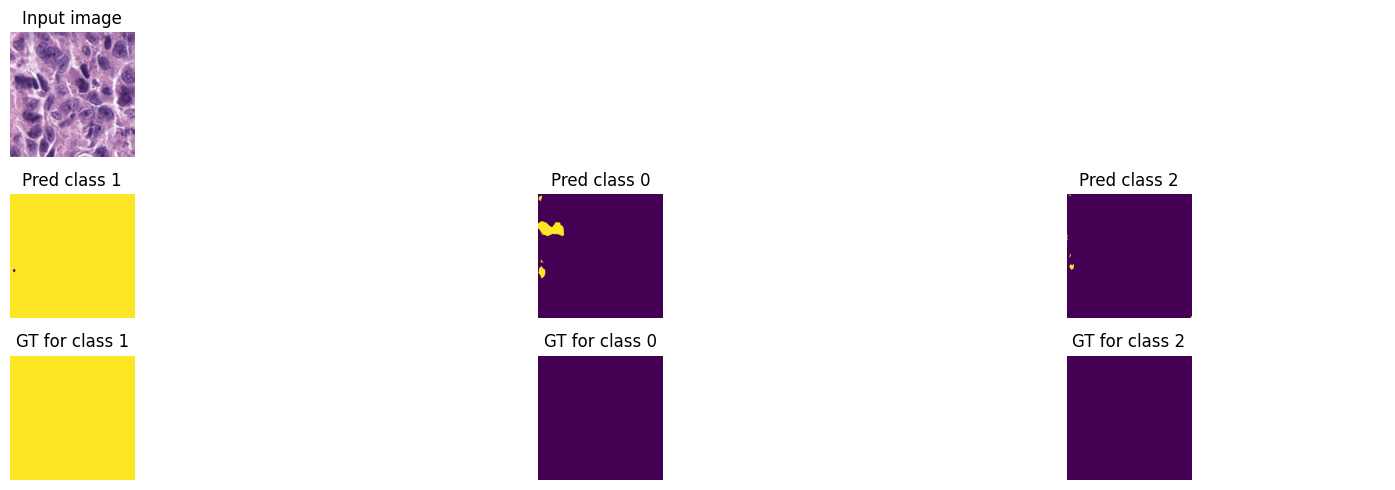

Train loss: 0.02717 | Time: 99m 16s | Val loss: 0.03310
Train_DICE_avg: 0.64204 | Train_Jaccard_avg: 0.58939 | Train_Sensitivity_avg: 0.80031 | Train_Specificity_avg: 0.84402 
Class 0 - Train_DICE: 0.62913 | Train_Jaccard: 0.58364 | Train_Sensitivity: 0.80123 | Train_Specificity: 0.86984 
Class 1 - Train_DICE: 0.73925 | Train_Jaccard: 0.68932 | Train_Sensitivity: 0.84201 | Train_Specificity: 0.83443 
Class 2 - Train_DICE: 0.55774 | Train_Jaccard: 0.49521 | Train_Sensitivity: 0.75770 | Train_Specificity: 0.82780 
Val_DICE_avg: 0.61230 | Val_Jaccard_avg: 0.55710 | Val_Sensitivity_avg: 0.78547 | Val_Specificity_avg: 0.78263 
Class 0 - Val_DICE: 0.59448 | Val_Jaccard: 0.54654 | Val_Sensitivity: 0.72866 | Val_Specificity: 0.84242 
Class 1 - Val_DICE: 0.73461 | Val_Jaccard: 0.68138 | Val_Sensitivity: 0.83661 | Val_Specificity: 0.74358 
Class 2 - Val_DICE: 0.50782 | Val_Jaccard: 0.44338 | Val_Sensitivity: 0.79114 | Val_Specificity: 0.76190 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.02682 | Time: 101m 26s | Val loss: 0.03311
Train_DICE_avg: 0.64470 | Train_Jaccard_avg: 0.59180 | Train_Sensitivity_avg: 0.80033 | Train_Specificity_avg: 0.84344 
Class 0 - Train_DICE: 0.63403 | Train_Jaccard: 0.58767 | Train_Sensitivity: 0.80273 | Train_Specificity: 0.87056 
Class 1 - Train_DICE: 0.74185 | Train_Jaccard: 0.69234 | Train_Sensitivity: 0.84283 | Train_Specificity: 0.83276 
Class 2 - Train_DICE: 0.55823 | Train_Jaccard: 0.49538 | Train_Sensitivity: 0.75542 | Train_Specificity: 0.82700 
Val_DICE_avg: 0.61745 | Val_Jaccard_avg: 0.56252 | Val_Sensitivity_avg: 0.79025 | Val_Specificity_avg: 0.78554 
Class 0 - Val_DICE: 0.60086 | Val_Jaccard: 0.55382 | Val_Sensitivity: 0.75457 | Val_Specificity: 0.83846 
Class 1 - Val_DICE: 0.73457 | Val_Jaccard: 0.68164 | Val_Sensitivity: 0.83092 | Val_Specificity: 0.74903 
Class 2 - Val_DICE: 0.51693 | Val_Jaccard: 0.45210 | Val_Sensitivity: 0.78525 | Val_Specificity: 0.76912 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.02641 | Time: 103m 36s | Val loss: 0.03316
Train_DICE_avg: 0.64975 | Train_Jaccard_avg: 0.59697 | Train_Sensitivity_avg: 0.80219 | Train_Specificity_avg: 0.84572 
Class 0 - Train_DICE: 0.63878 | Train_Jaccard: 0.59257 | Train_Sensitivity: 0.80090 | Train_Specificity: 0.87082 
Class 1 - Train_DICE: 0.74666 | Train_Jaccard: 0.69746 | Train_Sensitivity: 0.84743 | Train_Specificity: 0.83772 
Class 2 - Train_DICE: 0.56382 | Train_Jaccard: 0.50088 | Train_Sensitivity: 0.75824 | Train_Specificity: 0.82863 
Val_DICE_avg: 0.62106 | Val_Jaccard_avg: 0.56674 | Val_Sensitivity_avg: 0.79210 | Val_Specificity_avg: 0.78944 
Class 0 - Val_DICE: 0.60227 | Val_Jaccard: 0.55547 | Val_Sensitivity: 0.75301 | Val_Specificity: 0.84399 
Class 1 - Val_DICE: 0.73946 | Val_Jaccard: 0.68734 | Val_Sensitivity: 0.83666 | Val_Specificity: 0.75034 
Class 2 - Val_DICE: 0.52144 | Val_Jaccard: 0.45742 | Val_Sensitivity: 0.78663 | Val_Specificity: 0.77398 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.02634 | Time: 105m 46s | Val loss: 0.03267
Train_DICE_avg: 0.65090 | Train_Jaccard_avg: 0.59811 | Train_Sensitivity_avg: 0.80314 | Train_Specificity_avg: 0.84793 
Class 0 - Train_DICE: 0.64136 | Train_Jaccard: 0.59473 | Train_Sensitivity: 0.80259 | Train_Specificity: 0.87223 
Class 1 - Train_DICE: 0.74553 | Train_Jaccard: 0.69662 | Train_Sensitivity: 0.84668 | Train_Specificity: 0.84132 
Class 2 - Train_DICE: 0.56582 | Train_Jaccard: 0.50299 | Train_Sensitivity: 0.76014 | Train_Specificity: 0.83024 
Val_DICE_avg: 0.61840 | Val_Jaccard_avg: 0.56411 | Val_Sensitivity_avg: 0.79646 | Val_Specificity_avg: 0.78495 
Class 0 - Val_DICE: 0.59527 | Val_Jaccard: 0.54796 | Val_Sensitivity: 0.74497 | Val_Specificity: 0.84161 
Class 1 - Val_DICE: 0.74253 | Val_Jaccard: 0.68988 | Val_Sensitivity: 0.83913 | Val_Specificity: 0.74906 
Class 2 - Val_DICE: 0.51742 | Val_Jaccard: 0.45449 | Val_Sensitivity: 0.80528 | Val_Specificity: 0.76417 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.02589 | Time: 107m 56s | Val loss: 0.03311
Train_DICE_avg: 0.65387 | Train_Jaccard_avg: 0.60145 | Train_Sensitivity_avg: 0.80495 | Train_Specificity_avg: 0.84809 
Class 0 - Train_DICE: 0.64381 | Train_Jaccard: 0.59805 | Train_Sensitivity: 0.80599 | Train_Specificity: 0.87290 
Class 1 - Train_DICE: 0.75060 | Train_Jaccard: 0.70176 | Train_Sensitivity: 0.84879 | Train_Specificity: 0.84168 
Class 2 - Train_DICE: 0.56719 | Train_Jaccard: 0.50455 | Train_Sensitivity: 0.76007 | Train_Specificity: 0.82971 
Val_DICE_avg: 0.60905 | Val_Jaccard_avg: 0.55337 | Val_Sensitivity_avg: 0.78524 | Val_Specificity_avg: 0.78110 
Class 0 - Val_DICE: 0.57474 | Val_Jaccard: 0.52546 | Val_Sensitivity: 0.69197 | Val_Specificity: 0.85287 
Class 1 - Val_DICE: 0.73607 | Val_Jaccard: 0.68217 | Val_Sensitivity: 0.85462 | Val_Specificity: 0.72749 
Class 2 - Val_DICE: 0.51634 | Val_Jaccard: 0.45247 | Val_Sensitivity: 0.80915 | Val_Specificity: 0.76295 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


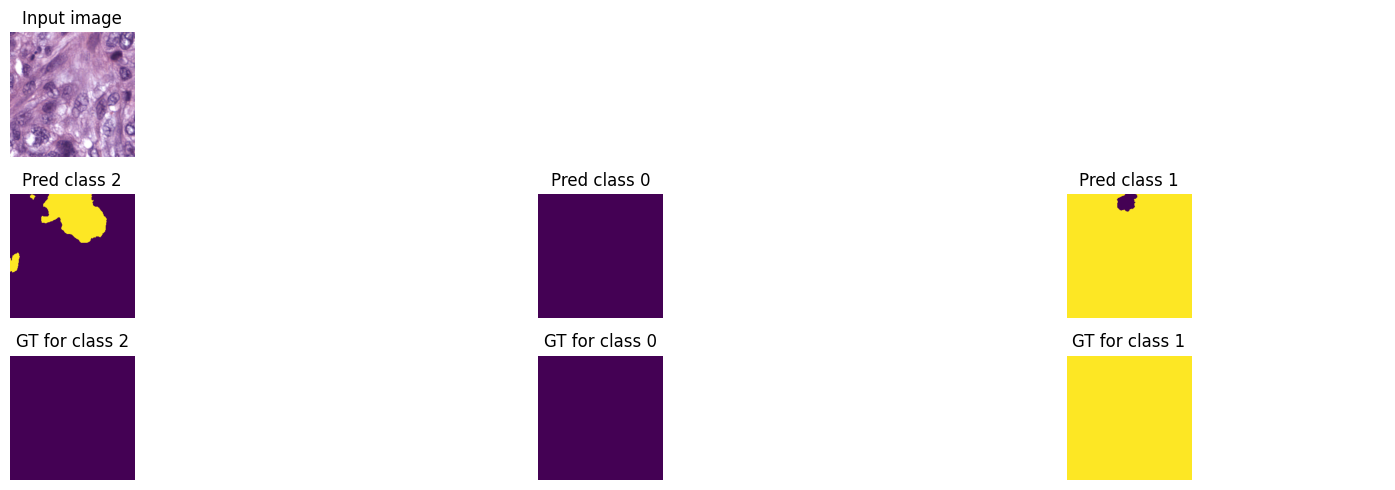

Train loss: 0.02575 | Time: 110m 7s | Val loss: 0.03372
Train_DICE_avg: 0.65413 | Train_Jaccard_avg: 0.60169 | Train_Sensitivity_avg: 0.80566 | Train_Specificity_avg: 0.84860 
Class 0 - Train_DICE: 0.64201 | Train_Jaccard: 0.59572 | Train_Sensitivity: 0.80483 | Train_Specificity: 0.87404 
Class 1 - Train_DICE: 0.75389 | Train_Jaccard: 0.70517 | Train_Sensitivity: 0.85180 | Train_Specificity: 0.83861 
Class 2 - Train_DICE: 0.56650 | Train_Jaccard: 0.50418 | Train_Sensitivity: 0.76034 | Train_Specificity: 0.83316 
Val_DICE_avg: 0.60730 | Val_Jaccard_avg: 0.55161 | Val_Sensitivity_avg: 0.78244 | Val_Specificity_avg: 0.78229 
Class 0 - Val_DICE: 0.57555 | Val_Jaccard: 0.52611 | Val_Sensitivity: 0.68327 | Val_Specificity: 0.85728 
Class 1 - Val_DICE: 0.73828 | Val_Jaccard: 0.68454 | Val_Sensitivity: 0.85535 | Val_Specificity: 0.72958 
Class 2 - Val_DICE: 0.50806 | Val_Jaccard: 0.44417 | Val_Sensitivity: 0.80871 | Val_Specificity: 0.76001 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.02558 | Time: 112m 17s | Val loss: 0.03257
Train_DICE_avg: 0.65498 | Train_Jaccard_avg: 0.60218 | Train_Sensitivity_avg: 0.80737 | Train_Specificity_avg: 0.84994 
Class 0 - Train_DICE: 0.64300 | Train_Jaccard: 0.59687 | Train_Sensitivity: 0.80536 | Train_Specificity: 0.87676 
Class 1 - Train_DICE: 0.75195 | Train_Jaccard: 0.70323 | Train_Sensitivity: 0.85151 | Train_Specificity: 0.84173 
Class 2 - Train_DICE: 0.57000 | Train_Jaccard: 0.50642 | Train_Sensitivity: 0.76525 | Train_Specificity: 0.83132 
Val_DICE_avg: 0.61922 | Val_Jaccard_avg: 0.56434 | Val_Sensitivity_avg: 0.79005 | Val_Specificity_avg: 0.78623 
Class 0 - Val_DICE: 0.59841 | Val_Jaccard: 0.55123 | Val_Sensitivity: 0.73820 | Val_Specificity: 0.84812 
Class 1 - Val_DICE: 0.74168 | Val_Jaccard: 0.68892 | Val_Sensitivity: 0.85387 | Val_Specificity: 0.73906 
Class 2 - Val_DICE: 0.51757 | Val_Jaccard: 0.45289 | Val_Sensitivity: 0.77808 | Val_Specificity: 0.77150 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.02541 | Time: 114m 27s | Val loss: 0.03302
Train_DICE_avg: 0.66003 | Train_Jaccard_avg: 0.60761 | Train_Sensitivity_avg: 0.81099 | Train_Specificity_avg: 0.84864 
Class 0 - Train_DICE: 0.64858 | Train_Jaccard: 0.60257 | Train_Sensitivity: 0.81123 | Train_Specificity: 0.87445 
Class 1 - Train_DICE: 0.75596 | Train_Jaccard: 0.70779 | Train_Sensitivity: 0.85565 | Train_Specificity: 0.84033 
Class 2 - Train_DICE: 0.57553 | Train_Jaccard: 0.51246 | Train_Sensitivity: 0.76609 | Train_Specificity: 0.83113 
Val_DICE_avg: 0.61579 | Val_Jaccard_avg: 0.56091 | Val_Sensitivity_avg: 0.78800 | Val_Specificity_avg: 0.78655 
Class 0 - Val_DICE: 0.59470 | Val_Jaccard: 0.54692 | Val_Sensitivity: 0.72293 | Val_Specificity: 0.85126 
Class 1 - Val_DICE: 0.74001 | Val_Jaccard: 0.68728 | Val_Sensitivity: 0.84543 | Val_Specificity: 0.74496 
Class 2 - Val_DICE: 0.51265 | Val_Jaccard: 0.44854 | Val_Sensitivity: 0.79564 | Val_Specificity: 0.76345 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.02515 | Time: 116m 37s | Val loss: 0.03291
Train_DICE_avg: 0.66165 | Train_Jaccard_avg: 0.60961 | Train_Sensitivity_avg: 0.81096 | Train_Specificity_avg: 0.85367 
Class 0 - Train_DICE: 0.64783 | Train_Jaccard: 0.60205 | Train_Sensitivity: 0.80829 | Train_Specificity: 0.87919 
Class 1 - Train_DICE: 0.75939 | Train_Jaccard: 0.71146 | Train_Sensitivity: 0.85584 | Train_Specificity: 0.84574 
Class 2 - Train_DICE: 0.57774 | Train_Jaccard: 0.51531 | Train_Sensitivity: 0.76875 | Train_Specificity: 0.83610 
Val_DICE_avg: 0.61708 | Val_Jaccard_avg: 0.56216 | Val_Sensitivity_avg: 0.78622 | Val_Specificity_avg: 0.78832 
Class 0 - Val_DICE: 0.59177 | Val_Jaccard: 0.54396 | Val_Sensitivity: 0.72267 | Val_Specificity: 0.85002 
Class 1 - Val_DICE: 0.74163 | Val_Jaccard: 0.68886 | Val_Sensitivity: 0.85136 | Val_Specificity: 0.74522 
Class 2 - Val_DICE: 0.51783 | Val_Jaccard: 0.45365 | Val_Sensitivity: 0.78464 | Val_Specificity: 0.76972 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.02520 | Time: 118m 47s | Val loss: 0.03302
Train_DICE_avg: 0.66005 | Train_Jaccard_avg: 0.60773 | Train_Sensitivity_avg: 0.81042 | Train_Specificity_avg: 0.85293 
Class 0 - Train_DICE: 0.65402 | Train_Jaccard: 0.60750 | Train_Sensitivity: 0.81095 | Train_Specificity: 0.87761 
Class 1 - Train_DICE: 0.75092 | Train_Jaccard: 0.70285 | Train_Sensitivity: 0.85228 | Train_Specificity: 0.84794 
Class 2 - Train_DICE: 0.57523 | Train_Jaccard: 0.51284 | Train_Sensitivity: 0.76802 | Train_Specificity: 0.83325 
Val_DICE_avg: 0.61696 | Val_Jaccard_avg: 0.56200 | Val_Sensitivity_avg: 0.78903 | Val_Specificity_avg: 0.78605 
Class 0 - Val_DICE: 0.59171 | Val_Jaccard: 0.54320 | Val_Sensitivity: 0.70992 | Val_Specificity: 0.85393 
Class 1 - Val_DICE: 0.74428 | Val_Jaccard: 0.69161 | Val_Sensitivity: 0.85955 | Val_Specificity: 0.73824 
Class 2 - Val_DICE: 0.51489 | Val_Jaccard: 0.45120 | Val_Sensitivity: 0.79762 | Val_Specificity: 0.76599 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


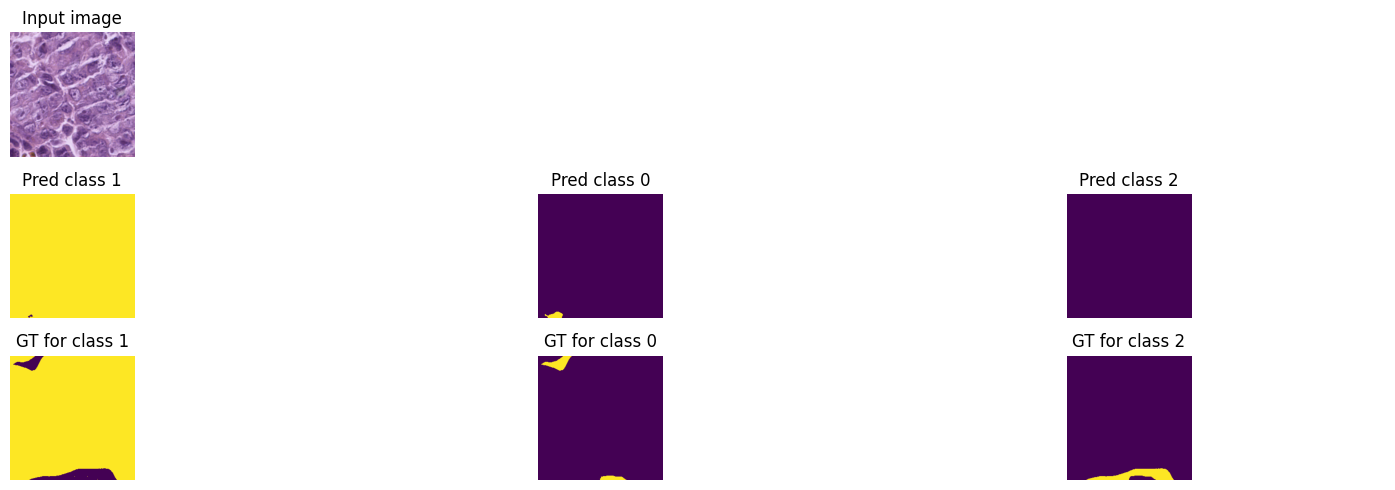

Train loss: 0.02477 | Time: 120m 58s | Val loss: 0.03255
Train_DICE_avg: 0.66313 | Train_Jaccard_avg: 0.61116 | Train_Sensitivity_avg: 0.81233 | Train_Specificity_avg: 0.85468 
Class 0 - Train_DICE: 0.65408 | Train_Jaccard: 0.60843 | Train_Sensitivity: 0.81437 | Train_Specificity: 0.87927 
Class 1 - Train_DICE: 0.75624 | Train_Jaccard: 0.70846 | Train_Sensitivity: 0.85461 | Train_Specificity: 0.84888 
Class 2 - Train_DICE: 0.57907 | Train_Jaccard: 0.51660 | Train_Sensitivity: 0.76801 | Train_Specificity: 0.83590 
Val_DICE_avg: 0.61911 | Val_Jaccard_avg: 0.56391 | Val_Sensitivity_avg: 0.78768 | Val_Specificity_avg: 0.78634 
Class 0 - Val_DICE: 0.59828 | Val_Jaccard: 0.55052 | Val_Sensitivity: 0.72523 | Val_Specificity: 0.85117 
Class 1 - Val_DICE: 0.73963 | Val_Jaccard: 0.68655 | Val_Sensitivity: 0.85298 | Val_Specificity: 0.73604 
Class 2 - Val_DICE: 0.51942 | Val_Jaccard: 0.45466 | Val_Sensitivity: 0.78484 | Val_Specificity: 0.77180 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.02480 | Time: 123m 8s | Val loss: 0.03323
Train_DICE_avg: 0.66434 | Train_Jaccard_avg: 0.61184 | Train_Sensitivity_avg: 0.81172 | Train_Specificity_avg: 0.85286 
Class 0 - Train_DICE: 0.65430 | Train_Jaccard: 0.60788 | Train_Sensitivity: 0.80830 | Train_Specificity: 0.87895 
Class 1 - Train_DICE: 0.75580 | Train_Jaccard: 0.70779 | Train_Sensitivity: 0.85333 | Train_Specificity: 0.84557 
Class 2 - Train_DICE: 0.58291 | Train_Jaccard: 0.51987 | Train_Sensitivity: 0.77354 | Train_Specificity: 0.83406 
Val_DICE_avg: 0.61489 | Val_Jaccard_avg: 0.55976 | Val_Sensitivity_avg: 0.78525 | Val_Specificity_avg: 0.78700 
Class 0 - Val_DICE: 0.58697 | Val_Jaccard: 0.53858 | Val_Sensitivity: 0.70333 | Val_Specificity: 0.85535 
Class 1 - Val_DICE: 0.74156 | Val_Jaccard: 0.68872 | Val_Sensitivity: 0.85895 | Val_Specificity: 0.73971 
Class 2 - Val_DICE: 0.51615 | Val_Jaccard: 0.45197 | Val_Sensitivity: 0.79348 | Val_Specificity: 0.76593 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.02451 | Time: 125m 18s | Val loss: 0.03287
Train_DICE_avg: 0.66545 | Train_Jaccard_avg: 0.61344 | Train_Sensitivity_avg: 0.81302 | Train_Specificity_avg: 0.85440 
Class 0 - Train_DICE: 0.65805 | Train_Jaccard: 0.61221 | Train_Sensitivity: 0.81705 | Train_Specificity: 0.87906 
Class 1 - Train_DICE: 0.76110 | Train_Jaccard: 0.71312 | Train_Sensitivity: 0.85723 | Train_Specificity: 0.84738 
Class 2 - Train_DICE: 0.57719 | Train_Jaccard: 0.51500 | Train_Sensitivity: 0.76478 | Train_Specificity: 0.83677 
Val_DICE_avg: 0.62033 | Val_Jaccard_avg: 0.56539 | Val_Sensitivity_avg: 0.78424 | Val_Specificity_avg: 0.78972 
Class 0 - Val_DICE: 0.59054 | Val_Jaccard: 0.54269 | Val_Sensitivity: 0.71062 | Val_Specificity: 0.85387 
Class 1 - Val_DICE: 0.74493 | Val_Jaccard: 0.69206 | Val_Sensitivity: 0.85933 | Val_Specificity: 0.73989 
Class 2 - Val_DICE: 0.52553 | Val_Jaccard: 0.46140 | Val_Sensitivity: 0.78276 | Val_Specificity: 0.77539 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.02439 | Time: 127m 28s | Val loss: 0.03295
Train_DICE_avg: 0.66563 | Train_Jaccard_avg: 0.61343 | Train_Sensitivity_avg: 0.81351 | Train_Specificity_avg: 0.85519 
Class 0 - Train_DICE: 0.65843 | Train_Jaccard: 0.61179 | Train_Sensitivity: 0.81148 | Train_Specificity: 0.88002 
Class 1 - Train_DICE: 0.76205 | Train_Jaccard: 0.71438 | Train_Sensitivity: 0.85874 | Train_Specificity: 0.84802 
Class 2 - Train_DICE: 0.57640 | Train_Jaccard: 0.51414 | Train_Sensitivity: 0.77031 | Train_Specificity: 0.83752 
Val_DICE_avg: 0.61765 | Val_Jaccard_avg: 0.56181 | Val_Sensitivity_avg: 0.78351 | Val_Specificity_avg: 0.78680 
Class 0 - Val_DICE: 0.58750 | Val_Jaccard: 0.53881 | Val_Sensitivity: 0.70349 | Val_Specificity: 0.85691 
Class 1 - Val_DICE: 0.74025 | Val_Jaccard: 0.68664 | Val_Sensitivity: 0.87112 | Val_Specificity: 0.72809 
Class 2 - Val_DICE: 0.52519 | Val_Jaccard: 0.45996 | Val_Sensitivity: 0.77592 | Val_Specificity: 0.77539 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.02432 | Time: 129m 39s | Val loss: 0.03350
Train_DICE_avg: 0.66674 | Train_Jaccard_avg: 0.61484 | Train_Sensitivity_avg: 0.81525 | Train_Specificity_avg: 0.85776 
Class 0 - Train_DICE: 0.65416 | Train_Jaccard: 0.60816 | Train_Sensitivity: 0.81011 | Train_Specificity: 0.88066 
Class 1 - Train_DICE: 0.76060 | Train_Jaccard: 0.71344 | Train_Sensitivity: 0.86027 | Train_Specificity: 0.85176 
Class 2 - Train_DICE: 0.58546 | Train_Jaccard: 0.52293 | Train_Sensitivity: 0.77537 | Train_Specificity: 0.84087 
Val_DICE_avg: 0.61496 | Val_Jaccard_avg: 0.55861 | Val_Sensitivity_avg: 0.77934 | Val_Specificity_avg: 0.78599 
Class 0 - Val_DICE: 0.58017 | Val_Jaccard: 0.53081 | Val_Sensitivity: 0.68274 | Val_Specificity: 0.86533 
Class 1 - Val_DICE: 0.74126 | Val_Jaccard: 0.68775 | Val_Sensitivity: 0.88059 | Val_Specificity: 0.71996 
Class 2 - Val_DICE: 0.52344 | Val_Jaccard: 0.45726 | Val_Sensitivity: 0.77469 | Val_Specificity: 0.77268 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


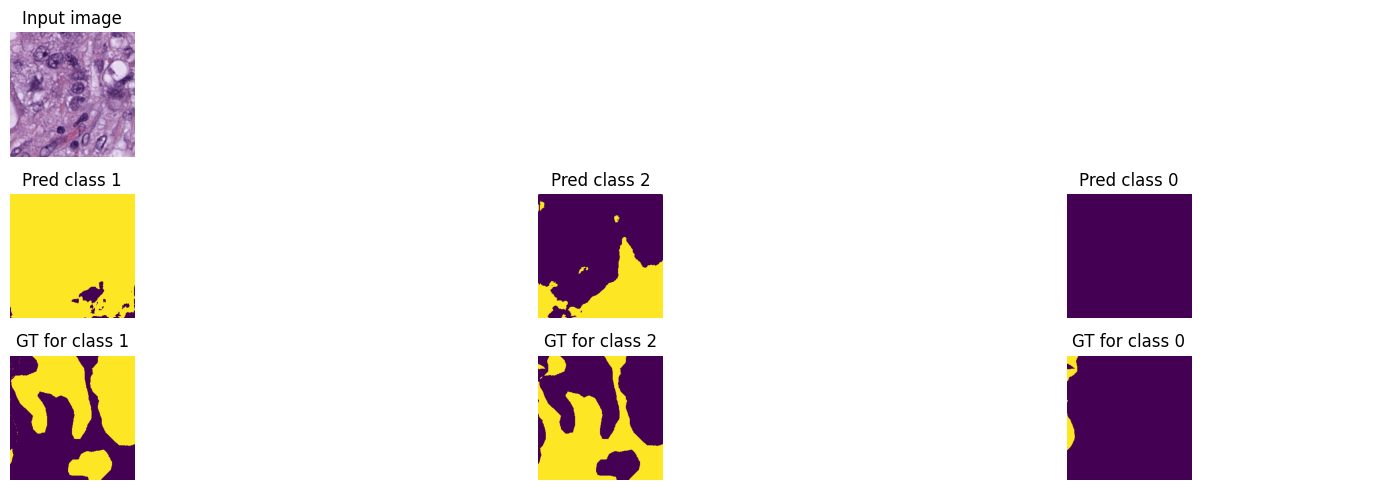

Train loss: 0.02428 | Time: 131m 50s | Val loss: 0.03309
Train_DICE_avg: 0.66750 | Train_Jaccard_avg: 0.61546 | Train_Sensitivity_avg: 0.81440 | Train_Specificity_avg: 0.85634 
Class 0 - Train_DICE: 0.66390 | Train_Jaccard: 0.61751 | Train_Sensitivity: 0.82211 | Train_Specificity: 0.87969 
Class 1 - Train_DICE: 0.75753 | Train_Jaccard: 0.71022 | Train_Sensitivity: 0.85310 | Train_Specificity: 0.84994 
Class 2 - Train_DICE: 0.58106 | Train_Jaccard: 0.51864 | Train_Sensitivity: 0.76801 | Train_Specificity: 0.83941 
Val_DICE_avg: 0.61390 | Val_Jaccard_avg: 0.55745 | Val_Sensitivity_avg: 0.77486 | Val_Specificity_avg: 0.78321 
Class 0 - Val_DICE: 0.57945 | Val_Jaccard: 0.53045 | Val_Sensitivity: 0.68673 | Val_Specificity: 0.85690 
Class 1 - Val_DICE: 0.73968 | Val_Jaccard: 0.68547 | Val_Sensitivity: 0.87775 | Val_Specificity: 0.71716 
Class 2 - Val_DICE: 0.52258 | Val_Jaccard: 0.45643 | Val_Sensitivity: 0.76011 | Val_Specificity: 0.77557 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Global Performance Metrics:
Loss mean: 0.03320, std: 0.00616
Dice Coefficient mean: 0.55845, std: 0.18505
Jaccard Index mean: 0.49659, std: 0.18638
Sensitivity mean: 0.82612, std: 0.17166
Specificity mean: 0.76713, std: 0.14556

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.49302, std: 0.41474
Jaccard mean: 0.43720, std: 0.39979
Sensitivity mean: 0.84567, std: 0.29155
Specificity mean: 0.78697, std: 0.29620

Class 1:
Dice mean: 0.68053, std: 0.38430
Jaccard mean: 0.62734, std: 0.38387
Sensitivity mean: 0.86987, std: 0.26677
Specificity mean: 0.77401, std: 0.32735

Class 2:
Dice mean: 0.50180, std: 0.37369
Jaccard mean: 0.42522, std: 0.35534
Sensitivity mean: 0.76281, std: 0.32316
Specificity mean: 0.74041, std: 0.29808


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer-UNet-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 232MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


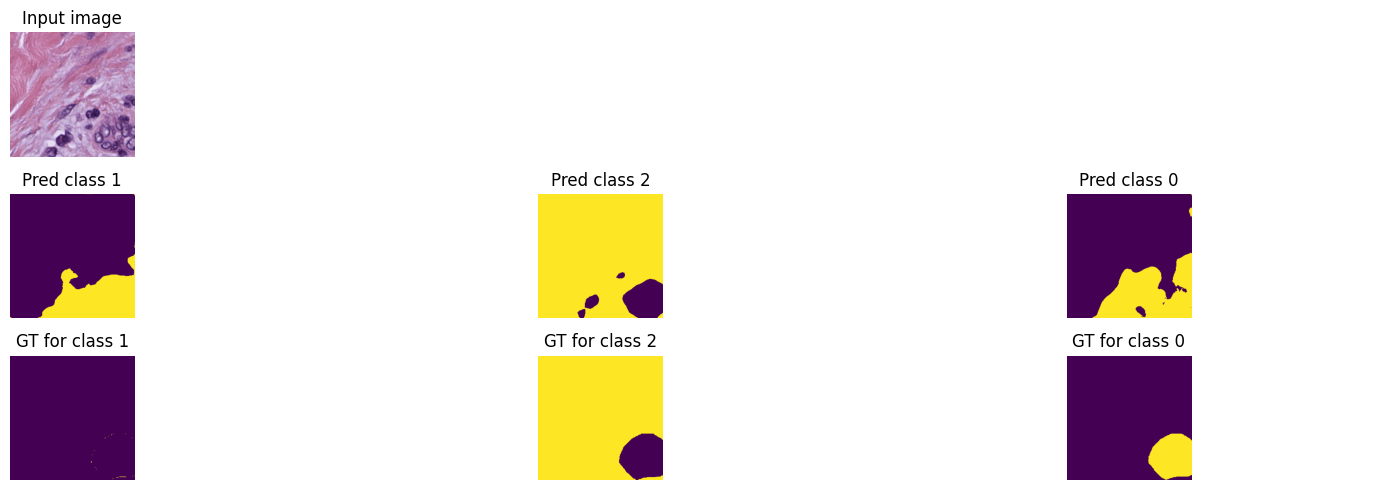

Train loss: 0.63549 | Time: 2m 7s | Val loss: 0.61335
Train_DICE_avg: 0.41108 | Train_Jaccard_avg: 0.34026 | Train_Sensitivity_avg: 0.39122 | Train_Specificity_avg: 0.82281 
Class 0 - Train_DICE: 0.30060 | Train_Jaccard: 0.23852 | Train_Sensitivity: 0.28254 | Train_Specificity: 0.86537 
Class 1 - Train_DICE: 0.49078 | Train_Jaccard: 0.42340 | Train_Sensitivity: 0.47876 | Train_Specificity: 0.78559 
Class 2 - Train_DICE: 0.44185 | Train_Jaccard: 0.35887 | Train_Sensitivity: 0.41237 | Train_Specificity: 0.81745 
Val_DICE_avg: 0.43382 | Val_Jaccard_avg: 0.36611 | Val_Sensitivity_avg: 0.41241 | Val_Specificity_avg: 0.81436 
Class 0 - Val_DICE: 0.31439 | Val_Jaccard: 0.25533 | Val_Sensitivity: 0.27654 | Val_Specificity: 0.89036 
Class 1 - Val_DICE: 0.52842 | Val_Jaccard: 0.46365 | Val_Sensitivity: 0.53976 | Val_Specificity: 0.72456 
Class 2 - Val_DICE: 0.45866 | Val_Jaccard: 0.37935 | Val_Sensitivity: 0.42092 | Val_Specificity: 0.82815 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.61573 | Time: 4m 14s | Val loss: 0.59885
Train_DICE_avg: 0.42422 | Train_Jaccard_avg: 0.35364 | Train_Sensitivity_avg: 0.40595 | Train_Specificity_avg: 0.83293 
Class 0 - Train_DICE: 0.31243 | Train_Jaccard: 0.24963 | Train_Sensitivity: 0.29491 | Train_Specificity: 0.87398 
Class 1 - Train_DICE: 0.50312 | Train_Jaccard: 0.43722 | Train_Sensitivity: 0.49181 | Train_Specificity: 0.79728 
Class 2 - Train_DICE: 0.45710 | Train_Jaccard: 0.37408 | Train_Sensitivity: 0.43113 | Train_Specificity: 0.82752 
Val_DICE_avg: 0.44159 | Val_Jaccard_avg: 0.37539 | Val_Sensitivity_avg: 0.41747 | Val_Specificity_avg: 0.82579 
Class 0 - Val_DICE: 0.32040 | Val_Jaccard: 0.26073 | Val_Sensitivity: 0.28775 | Val_Specificity: 0.88415 
Class 1 - Val_DICE: 0.53821 | Val_Jaccard: 0.47886 | Val_Sensitivity: 0.51850 | Val_Specificity: 0.77304 
Class 2 - Val_DICE: 0.46615 | Val_Jaccard: 0.38658 | Val_Sensitivity: 0.44617 | Val_Specificity: 0.82016 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.60617 | Time: 6m 21s | Val loss: 0.59168
Train_DICE_avg: 0.42868 | Train_Jaccard_avg: 0.35824 | Train_Sensitivity_avg: 0.41304 | Train_Specificity_avg: 0.83408 
Class 0 - Train_DICE: 0.31785 | Train_Jaccard: 0.25495 | Train_Sensitivity: 0.29985 | Train_Specificity: 0.87560 
Class 1 - Train_DICE: 0.50723 | Train_Jaccard: 0.44147 | Train_Sensitivity: 0.50111 | Train_Specificity: 0.79785 
Class 2 - Train_DICE: 0.46097 | Train_Jaccard: 0.37828 | Train_Sensitivity: 0.43816 | Train_Specificity: 0.82879 
Val_DICE_avg: 0.44766 | Val_Jaccard_avg: 0.38169 | Val_Sensitivity_avg: 0.42059 | Val_Specificity_avg: 0.83144 
Class 0 - Val_DICE: 0.32518 | Val_Jaccard: 0.26363 | Val_Sensitivity: 0.29775 | Val_Specificity: 0.87760 
Class 1 - Val_DICE: 0.54305 | Val_Jaccard: 0.48506 | Val_Sensitivity: 0.52139 | Val_Specificity: 0.78398 
Class 2 - Val_DICE: 0.47475 | Val_Jaccard: 0.39638 | Val_Sensitivity: 0.44263 | Val_Specificity: 0.83274 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.59904 | Time: 8m 28s | Val loss: 0.58421
Train_DICE_avg: 0.43263 | Train_Jaccard_avg: 0.36184 | Train_Sensitivity_avg: 0.42007 | Train_Specificity_avg: 0.83046 
Class 0 - Train_DICE: 0.32057 | Train_Jaccard: 0.25715 | Train_Sensitivity: 0.30547 | Train_Specificity: 0.87234 
Class 1 - Train_DICE: 0.51270 | Train_Jaccard: 0.44667 | Train_Sensitivity: 0.51002 | Train_Specificity: 0.79295 
Class 2 - Train_DICE: 0.46460 | Train_Jaccard: 0.38168 | Train_Sensitivity: 0.44472 | Train_Specificity: 0.82611 
Val_DICE_avg: 0.45037 | Val_Jaccard_avg: 0.38419 | Val_Sensitivity_avg: 0.43248 | Val_Specificity_avg: 0.82903 
Class 0 - Val_DICE: 0.33117 | Val_Jaccard: 0.27046 | Val_Sensitivity: 0.31223 | Val_Specificity: 0.87677 
Class 1 - Val_DICE: 0.54048 | Val_Jaccard: 0.48287 | Val_Sensitivity: 0.51154 | Val_Specificity: 0.79524 
Class 2 - Val_DICE: 0.47947 | Val_Jaccard: 0.39925 | Val_Sensitivity: 0.47367 | Val_Specificity: 0.81507 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.59353 | Time: 10m 35s | Val loss: 0.58084
Train_DICE_avg: 0.43522 | Train_Jaccard_avg: 0.36429 | Train_Sensitivity_avg: 0.42730 | Train_Specificity_avg: 0.83057 
Class 0 - Train_DICE: 0.32396 | Train_Jaccard: 0.26063 | Train_Sensitivity: 0.31104 | Train_Specificity: 0.87454 
Class 1 - Train_DICE: 0.51708 | Train_Jaccard: 0.45065 | Train_Sensitivity: 0.52123 | Train_Specificity: 0.79047 
Class 2 - Train_DICE: 0.46463 | Train_Jaccard: 0.38160 | Train_Sensitivity: 0.44962 | Train_Specificity: 0.82671 
Val_DICE_avg: 0.45509 | Val_Jaccard_avg: 0.38887 | Val_Sensitivity_avg: 0.44653 | Val_Specificity_avg: 0.82911 
Class 0 - Val_DICE: 0.34468 | Val_Jaccard: 0.28373 | Val_Sensitivity: 0.32632 | Val_Specificity: 0.87323 
Class 1 - Val_DICE: 0.54159 | Val_Jaccard: 0.48494 | Val_Sensitivity: 0.51210 | Val_Specificity: 0.81836 
Class 2 - Val_DICE: 0.47900 | Val_Jaccard: 0.39793 | Val_Sensitivity: 0.50116 | Val_Specificity: 0.79575 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


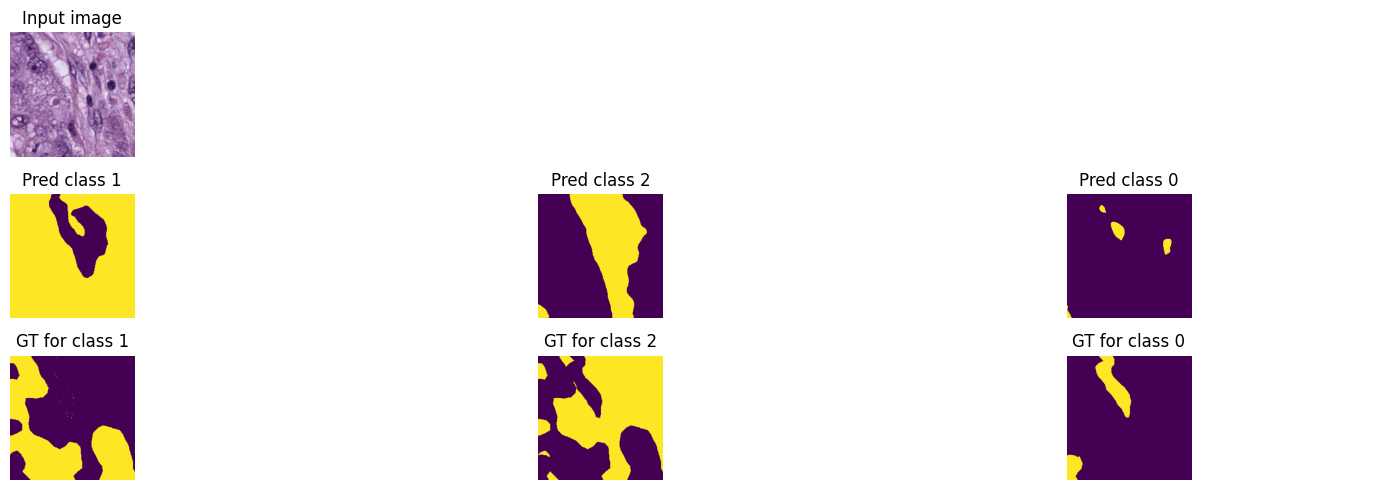

Train loss: 0.58778 | Time: 12m 42s | Val loss: 0.57436
Train_DICE_avg: 0.43863 | Train_Jaccard_avg: 0.36790 | Train_Sensitivity_avg: 0.43346 | Train_Specificity_avg: 0.82979 
Class 0 - Train_DICE: 0.32578 | Train_Jaccard: 0.26231 | Train_Sensitivity: 0.31723 | Train_Specificity: 0.87173 
Class 1 - Train_DICE: 0.52145 | Train_Jaccard: 0.45534 | Train_Sensitivity: 0.52681 | Train_Specificity: 0.79114 
Class 2 - Train_DICE: 0.46865 | Train_Jaccard: 0.38604 | Train_Sensitivity: 0.45635 | Train_Specificity: 0.82649 
Val_DICE_avg: 0.46203 | Val_Jaccard_avg: 0.39546 | Val_Sensitivity_avg: 0.45535 | Val_Specificity_avg: 0.82114 
Class 0 - Val_DICE: 0.34599 | Val_Jaccard: 0.28455 | Val_Sensitivity: 0.32940 | Val_Specificity: 0.87530 
Class 1 - Val_DICE: 0.56060 | Val_Jaccard: 0.50272 | Val_Sensitivity: 0.54570 | Val_Specificity: 0.78425 
Class 2 - Val_DICE: 0.47949 | Val_Jaccard: 0.39911 | Val_Sensitivity: 0.49096 | Val_Specificity: 0.80386 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.58441 | Time: 14m 49s | Val loss: 0.57156
Train_DICE_avg: 0.44088 | Train_Jaccard_avg: 0.36957 | Train_Sensitivity_avg: 0.43850 | Train_Specificity_avg: 0.82712 
Class 0 - Train_DICE: 0.32910 | Train_Jaccard: 0.26502 | Train_Sensitivity: 0.32258 | Train_Specificity: 0.86803 
Class 1 - Train_DICE: 0.52440 | Train_Jaccard: 0.45734 | Train_Sensitivity: 0.53432 | Train_Specificity: 0.78755 
Class 2 - Train_DICE: 0.46915 | Train_Jaccard: 0.38636 | Train_Sensitivity: 0.45858 | Train_Specificity: 0.82576 
Val_DICE_avg: 0.46792 | Val_Jaccard_avg: 0.40205 | Val_Sensitivity_avg: 0.46422 | Val_Specificity_avg: 0.83440 
Class 0 - Val_DICE: 0.36046 | Val_Jaccard: 0.29788 | Val_Sensitivity: 0.35988 | Val_Specificity: 0.86307 
Class 1 - Val_DICE: 0.55538 | Val_Jaccard: 0.50030 | Val_Sensitivity: 0.52832 | Val_Specificity: 0.83028 
Class 2 - Val_DICE: 0.48793 | Val_Jaccard: 0.40796 | Val_Sensitivity: 0.50446 | Val_Specificity: 0.80984 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.58014 | Time: 16m 56s | Val loss: 0.56845
Train_DICE_avg: 0.44422 | Train_Jaccard_avg: 0.37290 | Train_Sensitivity_avg: 0.44443 | Train_Specificity_avg: 0.82734 
Class 0 - Train_DICE: 0.33473 | Train_Jaccard: 0.27034 | Train_Sensitivity: 0.32991 | Train_Specificity: 0.86952 
Class 1 - Train_DICE: 0.52805 | Train_Jaccard: 0.46095 | Train_Sensitivity: 0.54266 | Train_Specificity: 0.78697 
Class 2 - Train_DICE: 0.46989 | Train_Jaccard: 0.38740 | Train_Sensitivity: 0.46073 | Train_Specificity: 0.82553 
Val_DICE_avg: 0.47182 | Val_Jaccard_avg: 0.40608 | Val_Sensitivity_avg: 0.46965 | Val_Specificity_avg: 0.82845 
Class 0 - Val_DICE: 0.36220 | Val_Jaccard: 0.30129 | Val_Sensitivity: 0.35143 | Val_Specificity: 0.86913 
Class 1 - Val_DICE: 0.56545 | Val_Jaccard: 0.50945 | Val_Sensitivity: 0.54554 | Val_Specificity: 0.80861 
Class 2 - Val_DICE: 0.48783 | Val_Jaccard: 0.40751 | Val_Sensitivity: 0.51198 | Val_Specificity: 0.80759 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.57688 | Time: 19m 3s | Val loss: 0.56773
Train_DICE_avg: 0.44617 | Train_Jaccard_avg: 0.37503 | Train_Sensitivity_avg: 0.44761 | Train_Specificity_avg: 0.82729 
Class 0 - Train_DICE: 0.33649 | Train_Jaccard: 0.27231 | Train_Sensitivity: 0.33314 | Train_Specificity: 0.87154 
Class 1 - Train_DICE: 0.53061 | Train_Jaccard: 0.46387 | Train_Sensitivity: 0.54622 | Train_Specificity: 0.78520 
Class 2 - Train_DICE: 0.47142 | Train_Jaccard: 0.38890 | Train_Sensitivity: 0.46347 | Train_Specificity: 0.82513 
Val_DICE_avg: 0.46761 | Val_Jaccard_avg: 0.40173 | Val_Sensitivity_avg: 0.46933 | Val_Specificity_avg: 0.82631 
Class 0 - Val_DICE: 0.35400 | Val_Jaccard: 0.29261 | Val_Sensitivity: 0.34312 | Val_Specificity: 0.87361 
Class 1 - Val_DICE: 0.56308 | Val_Jaccard: 0.50756 | Val_Sensitivity: 0.53864 | Val_Specificity: 0.81472 
Class 2 - Val_DICE: 0.48574 | Val_Jaccard: 0.40504 | Val_Sensitivity: 0.52624 | Val_Specificity: 0.79061 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.57506 | Time: 21m 10s | Val loss: 0.56726
Train_DICE_avg: 0.44700 | Train_Jaccard_avg: 0.37572 | Train_Sensitivity_avg: 0.45059 | Train_Specificity_avg: 0.82540 
Class 0 - Train_DICE: 0.33623 | Train_Jaccard: 0.27191 | Train_Sensitivity: 0.33613 | Train_Specificity: 0.86790 
Class 1 - Train_DICE: 0.53309 | Train_Jaccard: 0.46612 | Train_Sensitivity: 0.55114 | Train_Specificity: 0.78124 
Class 2 - Train_DICE: 0.47168 | Train_Jaccard: 0.38914 | Train_Sensitivity: 0.46449 | Train_Specificity: 0.82706 
Val_DICE_avg: 0.47062 | Val_Jaccard_avg: 0.40476 | Val_Sensitivity_avg: 0.47359 | Val_Specificity_avg: 0.82505 
Class 0 - Val_DICE: 0.36547 | Val_Jaccard: 0.30433 | Val_Sensitivity: 0.35885 | Val_Specificity: 0.86661 
Class 1 - Val_DICE: 0.55875 | Val_Jaccard: 0.50325 | Val_Sensitivity: 0.52979 | Val_Specificity: 0.81898 
Class 2 - Val_DICE: 0.48763 | Val_Jaccard: 0.40670 | Val_Sensitivity: 0.53213 | Val_Specificity: 0.78955 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


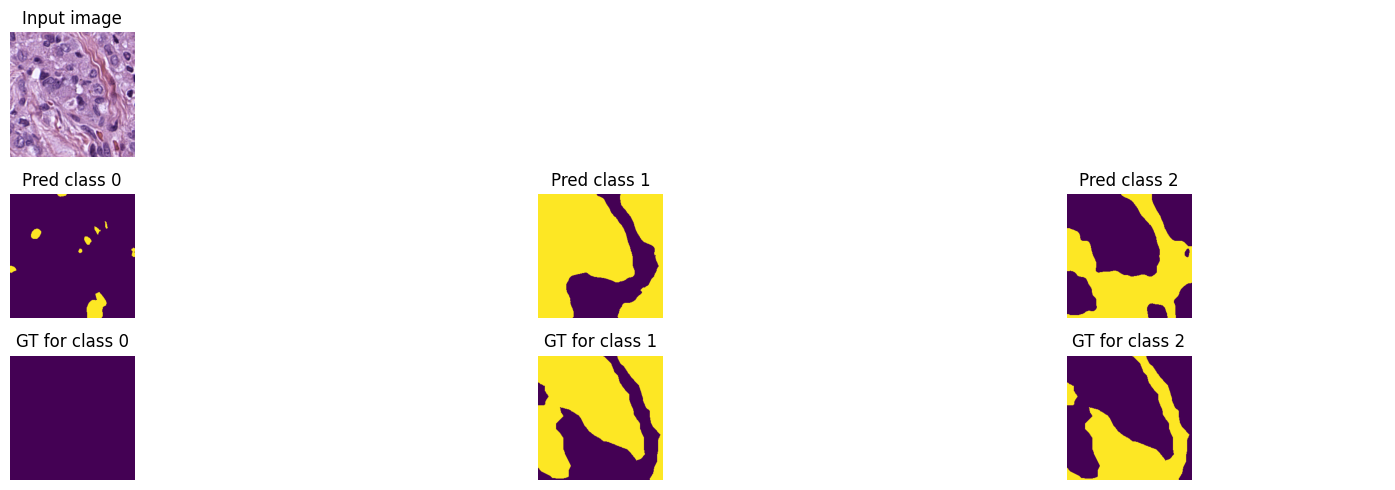

Train loss: 0.57197 | Time: 23m 22s | Val loss: 0.56353
Train_DICE_avg: 0.45040 | Train_Jaccard_avg: 0.37931 | Train_Sensitivity_avg: 0.45564 | Train_Specificity_avg: 0.82554 
Class 0 - Train_DICE: 0.33686 | Train_Jaccard: 0.27276 | Train_Sensitivity: 0.33732 | Train_Specificity: 0.86946 
Class 1 - Train_DICE: 0.53998 | Train_Jaccard: 0.47353 | Train_Sensitivity: 0.55932 | Train_Specificity: 0.78450 
Class 2 - Train_DICE: 0.47437 | Train_Jaccard: 0.39165 | Train_Sensitivity: 0.47027 | Train_Specificity: 0.82266 
Val_DICE_avg: 0.47814 | Val_Jaccard_avg: 0.41239 | Val_Sensitivity_avg: 0.48486 | Val_Specificity_avg: 0.82287 
Class 0 - Val_DICE: 0.37536 | Val_Jaccard: 0.31386 | Val_Sensitivity: 0.37174 | Val_Specificity: 0.87109 
Class 1 - Val_DICE: 0.56801 | Val_Jaccard: 0.51252 | Val_Sensitivity: 0.54501 | Val_Specificity: 0.80499 
Class 2 - Val_DICE: 0.49104 | Val_Jaccard: 0.41078 | Val_Sensitivity: 0.53785 | Val_Specificity: 0.79254 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.56946 | Time: 25m 32s | Val loss: 0.56004
Train_DICE_avg: 0.45178 | Train_Jaccard_avg: 0.38060 | Train_Sensitivity_avg: 0.45991 | Train_Specificity_avg: 0.82553 
Class 0 - Train_DICE: 0.33893 | Train_Jaccard: 0.27450 | Train_Sensitivity: 0.34301 | Train_Specificity: 0.86863 
Class 1 - Train_DICE: 0.54323 | Train_Jaccard: 0.47671 | Train_Sensitivity: 0.56699 | Train_Specificity: 0.78282 
Class 2 - Train_DICE: 0.47318 | Train_Jaccard: 0.39059 | Train_Sensitivity: 0.46972 | Train_Specificity: 0.82516 
Val_DICE_avg: 0.47591 | Val_Jaccard_avg: 0.41020 | Val_Sensitivity_avg: 0.47594 | Val_Specificity_avg: 0.82470 
Class 0 - Val_DICE: 0.37182 | Val_Jaccard: 0.31112 | Val_Sensitivity: 0.35987 | Val_Specificity: 0.87916 
Class 1 - Val_DICE: 0.57034 | Val_Jaccard: 0.51475 | Val_Sensitivity: 0.55213 | Val_Specificity: 0.79827 
Class 2 - Val_DICE: 0.48557 | Val_Jaccard: 0.40473 | Val_Sensitivity: 0.51583 | Val_Specificity: 0.79666 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.56733 | Time: 27m 42s | Val loss: 0.55645
Train_DICE_avg: 0.45383 | Train_Jaccard_avg: 0.38264 | Train_Sensitivity_avg: 0.46231 | Train_Specificity_avg: 0.82484 
Class 0 - Train_DICE: 0.34219 | Train_Jaccard: 0.27800 | Train_Sensitivity: 0.34716 | Train_Specificity: 0.86865 
Class 1 - Train_DICE: 0.54365 | Train_Jaccard: 0.47679 | Train_Sensitivity: 0.56780 | Train_Specificity: 0.77986 
Class 2 - Train_DICE: 0.47564 | Train_Jaccard: 0.39313 | Train_Sensitivity: 0.47197 | Train_Specificity: 0.82601 
Val_DICE_avg: 0.47759 | Val_Jaccard_avg: 0.41139 | Val_Sensitivity_avg: 0.48176 | Val_Specificity_avg: 0.81920 
Class 0 - Val_DICE: 0.35808 | Val_Jaccard: 0.29727 | Val_Sensitivity: 0.34333 | Val_Specificity: 0.88335 
Class 1 - Val_DICE: 0.58773 | Val_Jaccard: 0.53153 | Val_Sensitivity: 0.58301 | Val_Specificity: 0.78113 
Class 2 - Val_DICE: 0.48695 | Val_Jaccard: 0.40536 | Val_Sensitivity: 0.51895 | Val_Specificity: 0.79311 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.56493 | Time: 29m 53s | Val loss: 0.55646
Train_DICE_avg: 0.45771 | Train_Jaccard_avg: 0.38690 | Train_Sensitivity_avg: 0.46723 | Train_Specificity_avg: 0.82595 
Class 0 - Train_DICE: 0.34696 | Train_Jaccard: 0.28267 | Train_Sensitivity: 0.35314 | Train_Specificity: 0.86888 
Class 1 - Train_DICE: 0.54724 | Train_Jaccard: 0.48145 | Train_Sensitivity: 0.57311 | Train_Specificity: 0.78303 
Class 2 - Train_DICE: 0.47893 | Train_Jaccard: 0.39659 | Train_Sensitivity: 0.47545 | Train_Specificity: 0.82593 
Val_DICE_avg: 0.48294 | Val_Jaccard_avg: 0.41674 | Val_Sensitivity_avg: 0.49174 | Val_Specificity_avg: 0.81824 
Class 0 - Val_DICE: 0.38242 | Val_Jaccard: 0.32128 | Val_Sensitivity: 0.38166 | Val_Specificity: 0.86779 
Class 1 - Val_DICE: 0.57796 | Val_Jaccard: 0.52168 | Val_Sensitivity: 0.56806 | Val_Specificity: 0.79062 
Class 2 - Val_DICE: 0.48845 | Val_Jaccard: 0.40727 | Val_Sensitivity: 0.52549 | Val_Specificity: 0.79632 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.56299 | Time: 32m 1s | Val loss: 0.55258
Train_DICE_avg: 0.46239 | Train_Jaccard_avg: 0.39185 | Train_Sensitivity_avg: 0.47309 | Train_Specificity_avg: 0.82600 
Class 0 - Train_DICE: 0.35063 | Train_Jaccard: 0.28648 | Train_Sensitivity: 0.35827 | Train_Specificity: 0.86819 
Class 1 - Train_DICE: 0.55757 | Train_Jaccard: 0.49185 | Train_Sensitivity: 0.58461 | Train_Specificity: 0.78278 
Class 2 - Train_DICE: 0.47896 | Train_Jaccard: 0.39723 | Train_Sensitivity: 0.47639 | Train_Specificity: 0.82701 
Val_DICE_avg: 0.48775 | Val_Jaccard_avg: 0.42191 | Val_Sensitivity_avg: 0.48752 | Val_Specificity_avg: 0.82145 
Class 0 - Val_DICE: 0.36870 | Val_Jaccard: 0.30807 | Val_Sensitivity: 0.35089 | Val_Specificity: 0.89088 
Class 1 - Val_DICE: 0.60065 | Val_Jaccard: 0.54441 | Val_Sensitivity: 0.60116 | Val_Specificity: 0.76477 
Class 2 - Val_DICE: 0.49390 | Val_Jaccard: 0.41325 | Val_Sensitivity: 0.51052 | Val_Specificity: 0.80871 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


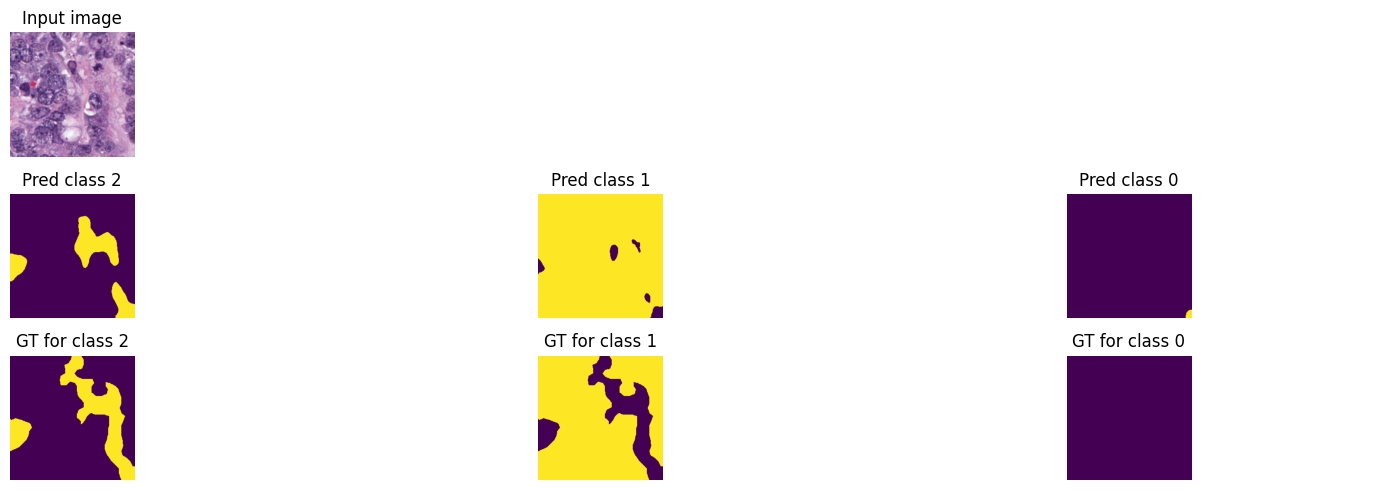

Train loss: 0.56102 | Time: 34m 13s | Val loss: 0.55256
Train_DICE_avg: 0.46375 | Train_Jaccard_avg: 0.39316 | Train_Sensitivity_avg: 0.47558 | Train_Specificity_avg: 0.82617 
Class 0 - Train_DICE: 0.34878 | Train_Jaccard: 0.28421 | Train_Sensitivity: 0.35716 | Train_Specificity: 0.86932 
Class 1 - Train_DICE: 0.56226 | Train_Jaccard: 0.49712 | Train_Sensitivity: 0.59040 | Train_Specificity: 0.78327 
Class 2 - Train_DICE: 0.48021 | Train_Jaccard: 0.39815 | Train_Sensitivity: 0.47919 | Train_Specificity: 0.82593 
Val_DICE_avg: 0.49093 | Val_Jaccard_avg: 0.42546 | Val_Sensitivity_avg: 0.49713 | Val_Specificity_avg: 0.81992 
Class 0 - Val_DICE: 0.37827 | Val_Jaccard: 0.31767 | Val_Sensitivity: 0.37162 | Val_Specificity: 0.87842 
Class 1 - Val_DICE: 0.59871 | Val_Jaccard: 0.54317 | Val_Sensitivity: 0.59639 | Val_Specificity: 0.77560 
Class 2 - Val_DICE: 0.49580 | Val_Jaccard: 0.41555 | Val_Sensitivity: 0.52337 | Val_Specificity: 0.80573 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


Train loss: 0.55914 | Time: 36m 24s | Val loss: 0.54733
Train_DICE_avg: 0.46851 | Train_Jaccard_avg: 0.39827 | Train_Sensitivity_avg: 0.48192 | Train_Specificity_avg: 0.82695 
Class 0 - Train_DICE: 0.35413 | Train_Jaccard: 0.28982 | Train_Sensitivity: 0.36321 | Train_Specificity: 0.86911 
Class 1 - Train_DICE: 0.57066 | Train_Jaccard: 0.50612 | Train_Sensitivity: 0.60299 | Train_Specificity: 0.78443 
Class 2 - Train_DICE: 0.48074 | Train_Jaccard: 0.39886 | Train_Sensitivity: 0.47955 | Train_Specificity: 0.82730 
Val_DICE_avg: 0.50071 | Val_Jaccard_avg: 0.43502 | Val_Sensitivity_avg: 0.50809 | Val_Specificity_avg: 0.81509 
Class 0 - Val_DICE: 0.38859 | Val_Jaccard: 0.32835 | Val_Sensitivity: 0.38516 | Val_Specificity: 0.88146 
Class 1 - Val_DICE: 0.61559 | Val_Jaccard: 0.55790 | Val_Sensitivity: 0.62667 | Val_Specificity: 0.75476 
Class 2 - Val_DICE: 0.49795 | Val_Jaccard: 0.41882 | Val_Sensitivity: 0.51244 | Val_Specificity: 0.80905 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.55501 | Time: 38m 34s | Val loss: 0.54383
Train_DICE_avg: 0.47283 | Train_Jaccard_avg: 0.40292 | Train_Sensitivity_avg: 0.48904 | Train_Specificity_avg: 0.82835 
Class 0 - Train_DICE: 0.35388 | Train_Jaccard: 0.28921 | Train_Sensitivity: 0.36633 | Train_Specificity: 0.86731 
Class 1 - Train_DICE: 0.58468 | Train_Jaccard: 0.52078 | Train_Sensitivity: 0.62209 | Train_Specificity: 0.78534 
Class 2 - Train_DICE: 0.47993 | Train_Jaccard: 0.39876 | Train_Sensitivity: 0.47870 | Train_Specificity: 0.83241 
Val_DICE_avg: 0.49780 | Val_Jaccard_avg: 0.43299 | Val_Sensitivity_avg: 0.50769 | Val_Specificity_avg: 0.81763 
Class 0 - Val_DICE: 0.37928 | Val_Jaccard: 0.31877 | Val_Sensitivity: 0.36567 | Val_Specificity: 0.88730 
Class 1 - Val_DICE: 0.62470 | Val_Jaccard: 0.57118 | Val_Sensitivity: 0.62255 | Val_Specificity: 0.77139 
Class 2 - Val_DICE: 0.48942 | Val_Jaccard: 0.40902 | Val_Sensitivity: 0.53486 | Val_Specificity: 0.79419 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.54694 | Time: 40m 44s | Val loss: 0.52371
Train_DICE_avg: 0.47772 | Train_Jaccard_avg: 0.40772 | Train_Sensitivity_avg: 0.49734 | Train_Specificity_avg: 0.82649 
Class 0 - Train_DICE: 0.35243 | Train_Jaccard: 0.28792 | Train_Sensitivity: 0.36546 | Train_Specificity: 0.86710 
Class 1 - Train_DICE: 0.60114 | Train_Jaccard: 0.53759 | Train_Sensitivity: 0.64984 | Train_Specificity: 0.78119 
Class 2 - Train_DICE: 0.47957 | Train_Jaccard: 0.39765 | Train_Sensitivity: 0.47672 | Train_Specificity: 0.83119 
Val_DICE_avg: 0.51092 | Val_Jaccard_avg: 0.44573 | Val_Sensitivity_avg: 0.52777 | Val_Specificity_avg: 0.81626 
Class 0 - Val_DICE: 0.38997 | Val_Jaccard: 0.32946 | Val_Sensitivity: 0.37929 | Val_Specificity: 0.88667 
Class 1 - Val_DICE: 0.64883 | Val_Jaccard: 0.59373 | Val_Sensitivity: 0.66934 | Val_Specificity: 0.75870 
Class 2 - Val_DICE: 0.49398 | Val_Jaccard: 0.41401 | Val_Sensitivity: 0.53468 | Val_Specificity: 0.80342 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.53741 | Time: 42m 54s | Val loss: 0.51335
Train_DICE_avg: 0.48501 | Train_Jaccard_avg: 0.41497 | Train_Sensitivity_avg: 0.51432 | Train_Specificity_avg: 0.82138 
Class 0 - Train_DICE: 0.35514 | Train_Jaccard: 0.29089 | Train_Sensitivity: 0.36855 | Train_Specificity: 0.86770 
Class 1 - Train_DICE: 0.61888 | Train_Jaccard: 0.55423 | Train_Sensitivity: 0.69703 | Train_Specificity: 0.76198 
Class 2 - Train_DICE: 0.48102 | Train_Jaccard: 0.39979 | Train_Sensitivity: 0.47738 | Train_Specificity: 0.83447 
Val_DICE_avg: 0.51645 | Val_Jaccard_avg: 0.45161 | Val_Sensitivity_avg: 0.54472 | Val_Specificity_avg: 0.81786 
Class 0 - Val_DICE: 0.37296 | Val_Jaccard: 0.31253 | Val_Sensitivity: 0.35834 | Val_Specificity: 0.89677 
Class 1 - Val_DICE: 0.67950 | Val_Jaccard: 0.62480 | Val_Sensitivity: 0.72246 | Val_Specificity: 0.75929 
Class 2 - Val_DICE: 0.49690 | Val_Jaccard: 0.41749 | Val_Sensitivity: 0.55336 | Val_Specificity: 0.79752 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


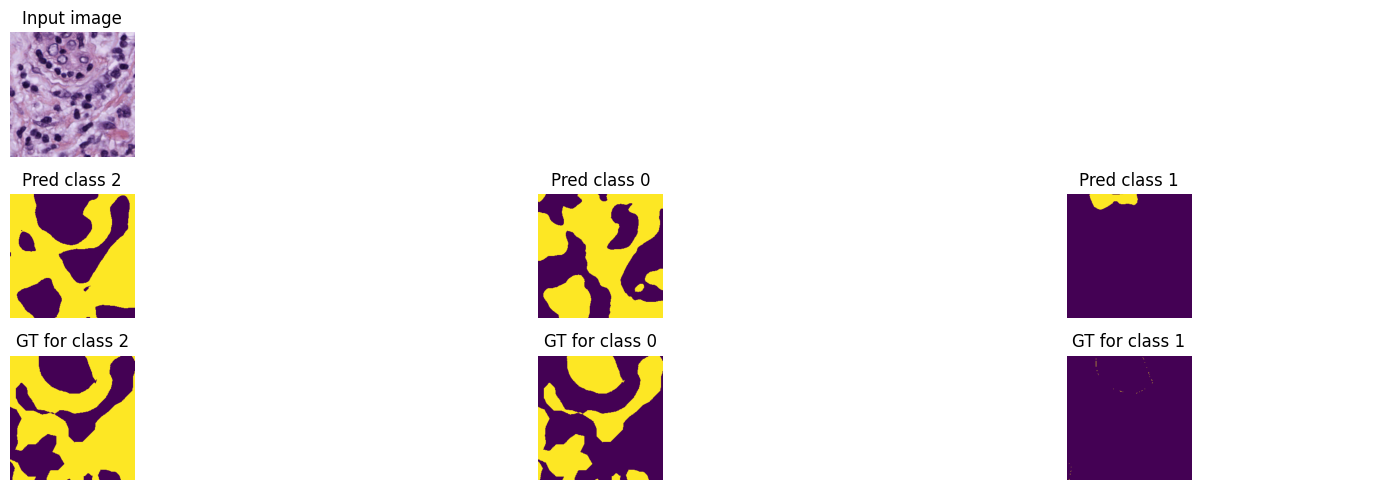

Train loss: 0.52763 | Time: 45m 6s | Val loss: 0.49466
Train_DICE_avg: 0.49199 | Train_Jaccard_avg: 0.42212 | Train_Sensitivity_avg: 0.52933 | Train_Specificity_avg: 0.81940 
Class 0 - Train_DICE: 0.35485 | Train_Jaccard: 0.29055 | Train_Sensitivity: 0.36433 | Train_Specificity: 0.86800 
Class 1 - Train_DICE: 0.63843 | Train_Jaccard: 0.57427 | Train_Sensitivity: 0.74413 | Train_Specificity: 0.75384 
Class 2 - Train_DICE: 0.48268 | Train_Jaccard: 0.40153 | Train_Sensitivity: 0.47952 | Train_Specificity: 0.83635 
Val_DICE_avg: 0.53110 | Val_Jaccard_avg: 0.46583 | Val_Sensitivity_avg: 0.56717 | Val_Specificity_avg: 0.81112 
Class 0 - Val_DICE: 0.38842 | Val_Jaccard: 0.32771 | Val_Sensitivity: 0.38438 | Val_Specificity: 0.88286 
Class 1 - Val_DICE: 0.70207 | Val_Jaccard: 0.64504 | Val_Sensitivity: 0.79824 | Val_Specificity: 0.72858 
Class 2 - Val_DICE: 0.50281 | Val_Jaccard: 0.42475 | Val_Sensitivity: 0.51889 | Val_Specificity: 0.82192 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.52078 | Time: 47m 17s | Val loss: 0.48762
Train_DICE_avg: 0.49628 | Train_Jaccard_avg: 0.42681 | Train_Sensitivity_avg: 0.53878 | Train_Specificity_avg: 0.81862 
Class 0 - Train_DICE: 0.36064 | Train_Jaccard: 0.29727 | Train_Sensitivity: 0.37547 | Train_Specificity: 0.86851 
Class 1 - Train_DICE: 0.64732 | Train_Jaccard: 0.58371 | Train_Sensitivity: 0.76103 | Train_Specificity: 0.75559 
Class 2 - Train_DICE: 0.48089 | Train_Jaccard: 0.39947 | Train_Sensitivity: 0.47986 | Train_Specificity: 0.83177 
Val_DICE_avg: 0.53986 | Val_Jaccard_avg: 0.47536 | Val_Sensitivity_avg: 0.57487 | Val_Specificity_avg: 0.80817 
Class 0 - Val_DICE: 0.40702 | Val_Jaccard: 0.34654 | Val_Sensitivity: 0.40764 | Val_Specificity: 0.87980 
Class 1 - Val_DICE: 0.71042 | Val_Jaccard: 0.65602 | Val_Sensitivity: 0.79475 | Val_Specificity: 0.72954 
Class 2 - Val_DICE: 0.50213 | Val_Jaccard: 0.42351 | Val_Sensitivity: 0.52221 | Val_Specificity: 0.81517 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.51324 | Time: 49m 27s | Val loss: 0.47762
Train_DICE_avg: 0.50658 | Train_Jaccard_avg: 0.43787 | Train_Sensitivity_avg: 0.55441 | Train_Specificity_avg: 0.81920 
Class 0 - Train_DICE: 0.37466 | Train_Jaccard: 0.31192 | Train_Sensitivity: 0.39354 | Train_Specificity: 0.87064 
Class 1 - Train_DICE: 0.66298 | Train_Jaccard: 0.60072 | Train_Sensitivity: 0.78784 | Train_Specificity: 0.75360 
Class 2 - Train_DICE: 0.48210 | Train_Jaccard: 0.40097 | Train_Sensitivity: 0.48186 | Train_Specificity: 0.83335 
Val_DICE_avg: 0.54280 | Val_Jaccard_avg: 0.47817 | Val_Sensitivity_avg: 0.58730 | Val_Specificity_avg: 0.80128 
Class 0 - Val_DICE: 0.41387 | Val_Jaccard: 0.35348 | Val_Sensitivity: 0.42025 | Val_Specificity: 0.86899 
Class 1 - Val_DICE: 0.71690 | Val_Jaccard: 0.66157 | Val_Sensitivity: 0.83368 | Val_Specificity: 0.70887 
Class 2 - Val_DICE: 0.49764 | Val_Jaccard: 0.41945 | Val_Sensitivity: 0.50798 | Val_Specificity: 0.82599 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.50472 | Time: 51m 39s | Val loss: 0.45166
Train_DICE_avg: 0.51667 | Train_Jaccard_avg: 0.44887 | Train_Sensitivity_avg: 0.57610 | Train_Specificity_avg: 0.81720 
Class 0 - Train_DICE: 0.40860 | Train_Jaccard: 0.34876 | Train_Sensitivity: 0.44702 | Train_Specificity: 0.86662 
Class 1 - Train_DICE: 0.65474 | Train_Jaccard: 0.59231 | Train_Sensitivity: 0.79003 | Train_Specificity: 0.75400 
Class 2 - Train_DICE: 0.48667 | Train_Jaccard: 0.40552 | Train_Sensitivity: 0.49126 | Train_Specificity: 0.83098 
Val_DICE_avg: 0.58241 | Val_Jaccard_avg: 0.51926 | Val_Sensitivity_avg: 0.64869 | Val_Specificity_avg: 0.79464 
Class 0 - Val_DICE: 0.51747 | Val_Jaccard: 0.46096 | Val_Sensitivity: 0.55600 | Val_Specificity: 0.85720 
Class 1 - Val_DICE: 0.71577 | Val_Jaccard: 0.66004 | Val_Sensitivity: 0.85729 | Val_Specificity: 0.70061 
Class 2 - Val_DICE: 0.51399 | Val_Jaccard: 0.43678 | Val_Sensitivity: 0.53279 | Val_Specificity: 0.82612 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.47587 | Time: 53m 49s | Val loss: 0.40509
Train_DICE_avg: 0.54257 | Train_Jaccard_avg: 0.47700 | Train_Sensitivity_avg: 0.62084 | Train_Specificity_avg: 0.81327 
Class 0 - Train_DICE: 0.47939 | Train_Jaccard: 0.42481 | Train_Sensitivity: 0.56778 | Train_Specificity: 0.85546 
Class 1 - Train_DICE: 0.66217 | Train_Jaccard: 0.60100 | Train_Sensitivity: 0.79779 | Train_Specificity: 0.75669 
Class 2 - Train_DICE: 0.48615 | Train_Jaccard: 0.40518 | Train_Sensitivity: 0.49693 | Train_Specificity: 0.82767 
Val_DICE_avg: 0.61181 | Val_Jaccard_avg: 0.55154 | Val_Sensitivity_avg: 0.69036 | Val_Specificity_avg: 0.79240 
Class 0 - Val_DICE: 0.59365 | Val_Jaccard: 0.54191 | Val_Sensitivity: 0.67036 | Val_Specificity: 0.85300 
Class 1 - Val_DICE: 0.73048 | Val_Jaccard: 0.67846 | Val_Sensitivity: 0.81522 | Val_Specificity: 0.72270 
Class 2 - Val_DICE: 0.51129 | Val_Jaccard: 0.43426 | Val_Sensitivity: 0.58552 | Val_Specificity: 0.80150 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


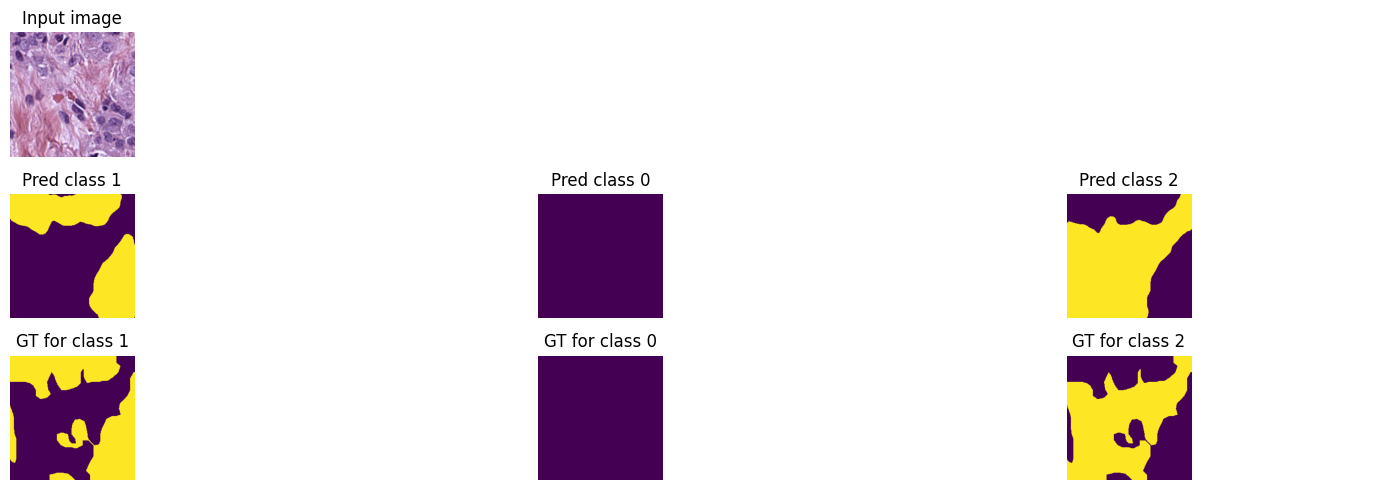

Train loss: 0.45380 | Time: 56m 1s | Val loss: 0.39335
Train_DICE_avg: 0.55840 | Train_Jaccard_avg: 0.49458 | Train_Sensitivity_avg: 0.65566 | Train_Specificity_avg: 0.81040 
Class 0 - Train_DICE: 0.51473 | Train_Jaccard: 0.46292 | Train_Sensitivity: 0.64918 | Train_Specificity: 0.84404 
Class 1 - Train_DICE: 0.67215 | Train_Jaccard: 0.61215 | Train_Sensitivity: 0.80983 | Train_Specificity: 0.75713 
Class 2 - Train_DICE: 0.48833 | Train_Jaccard: 0.40866 | Train_Sensitivity: 0.50796 | Train_Specificity: 0.83003 
Val_DICE_avg: 0.61789 | Val_Jaccard_avg: 0.55828 | Val_Sensitivity_avg: 0.71452 | Val_Specificity_avg: 0.78586 
Class 0 - Val_DICE: 0.62318 | Val_Jaccard: 0.57365 | Val_Sensitivity: 0.74127 | Val_Specificity: 0.83694 
Class 1 - Val_DICE: 0.72612 | Val_Jaccard: 0.67267 | Val_Sensitivity: 0.85027 | Val_Specificity: 0.70709 
Class 2 - Val_DICE: 0.50439 | Val_Jaccard: 0.42852 | Val_Sensitivity: 0.55203 | Val_Specificity: 0.81356 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.44434 | Time: 58m 11s | Val loss: 0.39086
Train_DICE_avg: 0.56229 | Train_Jaccard_avg: 0.50014 | Train_Sensitivity_avg: 0.67431 | Train_Specificity_avg: 0.80765 
Class 0 - Train_DICE: 0.53049 | Train_Jaccard: 0.48226 | Train_Sensitivity: 0.70486 | Train_Specificity: 0.83462 
Class 1 - Train_DICE: 0.66768 | Train_Jaccard: 0.60803 | Train_Sensitivity: 0.80237 | Train_Specificity: 0.76069 
Class 2 - Train_DICE: 0.48872 | Train_Jaccard: 0.41013 | Train_Sensitivity: 0.51569 | Train_Specificity: 0.82764 
Val_DICE_avg: 0.61700 | Val_Jaccard_avg: 0.55825 | Val_Sensitivity_avg: 0.71851 | Val_Specificity_avg: 0.78404 
Class 0 - Val_DICE: 0.60885 | Val_Jaccard: 0.56361 | Val_Sensitivity: 0.75470 | Val_Specificity: 0.83227 
Class 1 - Val_DICE: 0.72683 | Val_Jaccard: 0.67334 | Val_Sensitivity: 0.83279 | Val_Specificity: 0.71329 
Class 2 - Val_DICE: 0.51532 | Val_Jaccard: 0.43781 | Val_Sensitivity: 0.56804 | Val_Specificity: 0.80655 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.43690 | Time: 60m 22s | Val loss: 0.38451
Train_DICE_avg: 0.56653 | Train_Jaccard_avg: 0.50498 | Train_Sensitivity_avg: 0.69028 | Train_Specificity_avg: 0.80365 
Class 0 - Train_DICE: 0.54581 | Train_Jaccard: 0.49931 | Train_Sensitivity: 0.74499 | Train_Specificity: 0.82763 
Class 1 - Train_DICE: 0.66422 | Train_Jaccard: 0.60488 | Train_Sensitivity: 0.80013 | Train_Specificity: 0.76041 
Class 2 - Train_DICE: 0.48956 | Train_Jaccard: 0.41073 | Train_Sensitivity: 0.52572 | Train_Specificity: 0.82290 
Val_DICE_avg: 0.61978 | Val_Jaccard_avg: 0.56159 | Val_Sensitivity_avg: 0.72092 | Val_Specificity_avg: 0.78796 
Class 0 - Val_DICE: 0.61987 | Val_Jaccard: 0.57308 | Val_Sensitivity: 0.74251 | Val_Specificity: 0.84356 
Class 1 - Val_DICE: 0.73019 | Val_Jaccard: 0.67749 | Val_Sensitivity: 0.82073 | Val_Specificity: 0.72452 
Class 2 - Val_DICE: 0.50928 | Val_Jaccard: 0.43419 | Val_Sensitivity: 0.59952 | Val_Specificity: 0.79578 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.43284 | Time: 62m 31s | Val loss: 0.37337
Train_DICE_avg: 0.56951 | Train_Jaccard_avg: 0.50923 | Train_Sensitivity_avg: 0.70367 | Train_Specificity_avg: 0.80458 
Class 0 - Train_DICE: 0.53940 | Train_Jaccard: 0.49429 | Train_Sensitivity: 0.75272 | Train_Specificity: 0.83023 
Class 1 - Train_DICE: 0.67817 | Train_Jaccard: 0.61956 | Train_Sensitivity: 0.80936 | Train_Specificity: 0.76798 
Class 2 - Train_DICE: 0.49096 | Train_Jaccard: 0.41383 | Train_Sensitivity: 0.54893 | Train_Specificity: 0.81555 
Val_DICE_avg: 0.62977 | Val_Jaccard_avg: 0.57437 | Val_Sensitivity_avg: 0.74792 | Val_Specificity_avg: 0.78560 
Class 0 - Val_DICE: 0.62868 | Val_Jaccard: 0.58492 | Val_Sensitivity: 0.79204 | Val_Specificity: 0.83555 
Class 1 - Val_DICE: 0.72100 | Val_Jaccard: 0.66907 | Val_Sensitivity: 0.82480 | Val_Specificity: 0.71817 
Class 2 - Val_DICE: 0.53962 | Val_Jaccard: 0.46912 | Val_Sensitivity: 0.62694 | Val_Specificity: 0.80309 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.42996 | Time: 64m 41s | Val loss: 0.37356
Train_DICE_avg: 0.56954 | Train_Jaccard_avg: 0.50983 | Train_Sensitivity_avg: 0.71700 | Train_Specificity_avg: 0.80030 
Class 0 - Train_DICE: 0.54795 | Train_Jaccard: 0.50346 | Train_Sensitivity: 0.77242 | Train_Specificity: 0.83029 
Class 1 - Train_DICE: 0.66613 | Train_Jaccard: 0.60801 | Train_Sensitivity: 0.81591 | Train_Specificity: 0.75995 
Class 2 - Train_DICE: 0.49455 | Train_Jaccard: 0.41802 | Train_Sensitivity: 0.56268 | Train_Specificity: 0.81066 
Val_DICE_avg: 0.62559 | Val_Jaccard_avg: 0.57210 | Val_Sensitivity_avg: 0.78394 | Val_Specificity_avg: 0.77343 
Class 0 - Val_DICE: 0.63418 | Val_Jaccard: 0.59233 | Val_Sensitivity: 0.83371 | Val_Specificity: 0.83010 
Class 1 - Val_DICE: 0.72623 | Val_Jaccard: 0.67515 | Val_Sensitivity: 0.79895 | Val_Specificity: 0.72495 
Class 2 - Val_DICE: 0.51636 | Val_Jaccard: 0.44881 | Val_Sensitivity: 0.71915 | Val_Specificity: 0.76524 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]


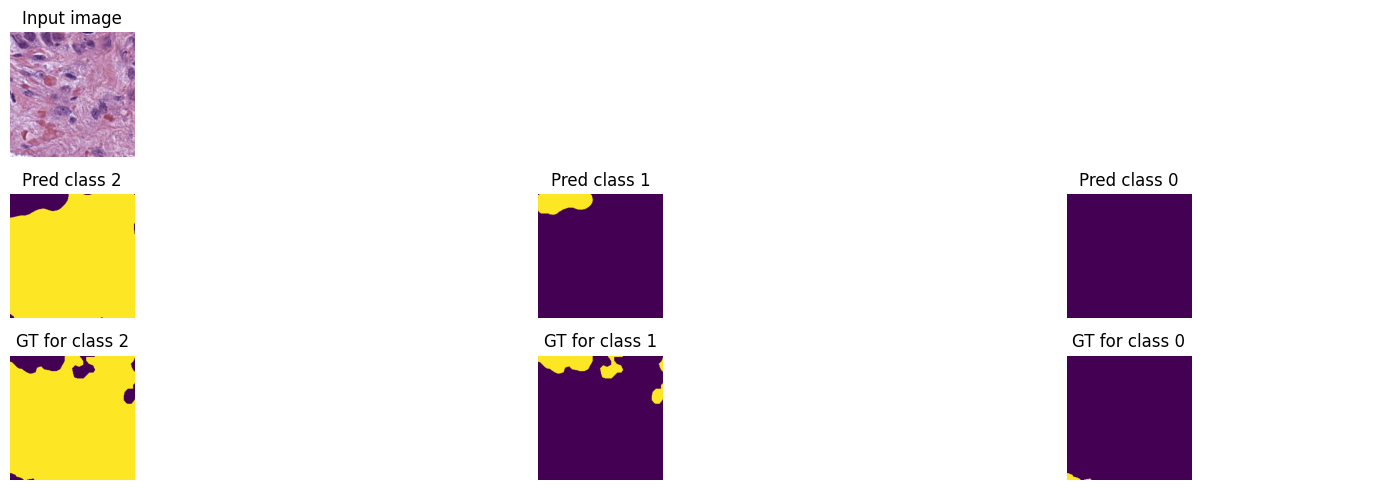

Train loss: 0.41676 | Time: 66m 53s | Val loss: 0.36449
Train_DICE_avg: 0.58140 | Train_Jaccard_avg: 0.52149 | Train_Sensitivity_avg: 0.72632 | Train_Specificity_avg: 0.79999 
Class 0 - Train_DICE: 0.56010 | Train_Jaccard: 0.51507 | Train_Sensitivity: 0.78175 | Train_Specificity: 0.82584 
Class 1 - Train_DICE: 0.68460 | Train_Jaccard: 0.62617 | Train_Sensitivity: 0.83494 | Train_Specificity: 0.75820 
Class 2 - Train_DICE: 0.49949 | Train_Jaccard: 0.42324 | Train_Sensitivity: 0.56228 | Train_Specificity: 0.81592 
Val_DICE_avg: 0.63171 | Val_Jaccard_avg: 0.57700 | Val_Sensitivity_avg: 0.77701 | Val_Specificity_avg: 0.77468 
Class 0 - Val_DICE: 0.63843 | Val_Jaccard: 0.59483 | Val_Sensitivity: 0.81072 | Val_Specificity: 0.83168 
Class 1 - Val_DICE: 0.73396 | Val_Jaccard: 0.68214 | Val_Sensitivity: 0.83250 | Val_Specificity: 0.71641 
Class 2 - Val_DICE: 0.52273 | Val_Jaccard: 0.45403 | Val_Sensitivity: 0.68781 | Val_Specificity: 0.77596 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.41481 | Time: 69m 4s | Val loss: 0.36186
Train_DICE_avg: 0.58135 | Train_Jaccard_avg: 0.52217 | Train_Sensitivity_avg: 0.73250 | Train_Specificity_avg: 0.80047 
Class 0 - Train_DICE: 0.55689 | Train_Jaccard: 0.51340 | Train_Sensitivity: 0.79750 | Train_Specificity: 0.82408 
Class 1 - Train_DICE: 0.68742 | Train_Jaccard: 0.62946 | Train_Sensitivity: 0.81215 | Train_Specificity: 0.77181 
Class 2 - Train_DICE: 0.49974 | Train_Jaccard: 0.42364 | Train_Sensitivity: 0.58786 | Train_Specificity: 0.80554 
Val_DICE_avg: 0.63425 | Val_Jaccard_avg: 0.58036 | Val_Sensitivity_avg: 0.78616 | Val_Specificity_avg: 0.78657 
Class 0 - Val_DICE: 0.62973 | Val_Jaccard: 0.58841 | Val_Sensitivity: 0.84646 | Val_Specificity: 0.82692 
Class 1 - Val_DICE: 0.73239 | Val_Jaccard: 0.68062 | Val_Sensitivity: 0.82821 | Val_Specificity: 0.74109 
Class 2 - Val_DICE: 0.54064 | Val_Jaccard: 0.47206 | Val_Sensitivity: 0.68382 | Val_Specificity: 0.79171 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.40609 | Time: 71m 15s | Val loss: 0.35801
Train_DICE_avg: 0.58923 | Train_Jaccard_avg: 0.53136 | Train_Sensitivity_avg: 0.74765 | Train_Specificity_avg: 0.80354 
Class 0 - Train_DICE: 0.56357 | Train_Jaccard: 0.51979 | Train_Sensitivity: 0.80300 | Train_Specificity: 0.82548 
Class 1 - Train_DICE: 0.69600 | Train_Jaccard: 0.63983 | Train_Sensitivity: 0.83590 | Train_Specificity: 0.77315 
Class 2 - Train_DICE: 0.50812 | Train_Jaccard: 0.43448 | Train_Sensitivity: 0.60404 | Train_Specificity: 0.81200 
Val_DICE_avg: 0.63811 | Val_Jaccard_avg: 0.58567 | Val_Sensitivity_avg: 0.79731 | Val_Specificity_avg: 0.78628 
Class 0 - Val_DICE: 0.64696 | Val_Jaccard: 0.60536 | Val_Sensitivity: 0.83190 | Val_Specificity: 0.83623 
Class 1 - Val_DICE: 0.73445 | Val_Jaccard: 0.68415 | Val_Sensitivity: 0.84156 | Val_Specificity: 0.72987 
Class 2 - Val_DICE: 0.53291 | Val_Jaccard: 0.46750 | Val_Sensitivity: 0.71846 | Val_Specificity: 0.79272 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.40112 | Time: 73m 26s | Val loss: 0.35890
Train_DICE_avg: 0.59394 | Train_Jaccard_avg: 0.53579 | Train_Sensitivity_avg: 0.74969 | Train_Specificity_avg: 0.80794 
Class 0 - Train_DICE: 0.56959 | Train_Jaccard: 0.52624 | Train_Sensitivity: 0.81546 | Train_Specificity: 0.82703 
Class 1 - Train_DICE: 0.70361 | Train_Jaccard: 0.64699 | Train_Sensitivity: 0.82702 | Train_Specificity: 0.78681 
Class 2 - Train_DICE: 0.50863 | Train_Jaccard: 0.43414 | Train_Sensitivity: 0.60658 | Train_Specificity: 0.80997 
Val_DICE_avg: 0.63767 | Val_Jaccard_avg: 0.58369 | Val_Sensitivity_avg: 0.78740 | Val_Specificity_avg: 0.78518 
Class 0 - Val_DICE: 0.64948 | Val_Jaccard: 0.60590 | Val_Sensitivity: 0.80379 | Val_Specificity: 0.84345 
Class 1 - Val_DICE: 0.73962 | Val_Jaccard: 0.68864 | Val_Sensitivity: 0.83017 | Val_Specificity: 0.73454 
Class 2 - Val_DICE: 0.52391 | Val_Jaccard: 0.45652 | Val_Sensitivity: 0.72822 | Val_Specificity: 0.77754 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]


Train loss: 0.39311 | Time: 75m 38s | Val loss: 0.35540
Train_DICE_avg: 0.60211 | Train_Jaccard_avg: 0.54429 | Train_Sensitivity_avg: 0.75615 | Train_Specificity_avg: 0.80978 
Class 0 - Train_DICE: 0.57560 | Train_Jaccard: 0.53237 | Train_Sensitivity: 0.81778 | Train_Specificity: 0.82454 
Class 1 - Train_DICE: 0.70942 | Train_Jaccard: 0.65384 | Train_Sensitivity: 0.85393 | Train_Specificity: 0.78131 
Class 2 - Train_DICE: 0.52130 | Train_Jaccard: 0.44665 | Train_Sensitivity: 0.59676 | Train_Specificity: 0.82348 
Val_DICE_avg: 0.63926 | Val_Jaccard_avg: 0.58444 | Val_Sensitivity_avg: 0.79335 | Val_Specificity_avg: 0.78083 
Class 0 - Val_DICE: 0.65014 | Val_Jaccard: 0.60620 | Val_Sensitivity: 0.81318 | Val_Specificity: 0.84359 
Class 1 - Val_DICE: 0.73681 | Val_Jaccard: 0.68652 | Val_Sensitivity: 0.87711 | Val_Specificity: 0.71698 
Class 2 - Val_DICE: 0.53082 | Val_Jaccard: 0.46061 | Val_Sensitivity: 0.68975 | Val_Specificity: 0.78193 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


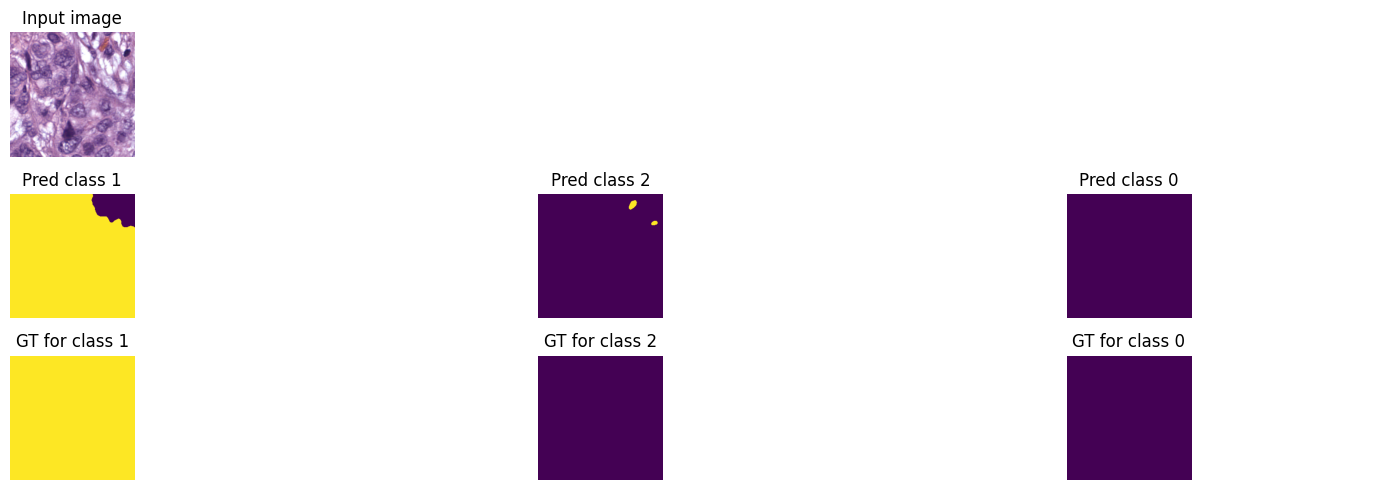

Train loss: 0.39391 | Time: 77m 50s | Val loss: 0.35922
Train_DICE_avg: 0.60026 | Train_Jaccard_avg: 0.54218 | Train_Sensitivity_avg: 0.75368 | Train_Specificity_avg: 0.80956 
Class 0 - Train_DICE: 0.57850 | Train_Jaccard: 0.53441 | Train_Sensitivity: 0.81349 | Train_Specificity: 0.82559 
Class 1 - Train_DICE: 0.70723 | Train_Jaccard: 0.65150 | Train_Sensitivity: 0.84719 | Train_Specificity: 0.78577 
Class 2 - Train_DICE: 0.51504 | Train_Jaccard: 0.44063 | Train_Sensitivity: 0.60036 | Train_Specificity: 0.81732 
Val_DICE_avg: 0.63476 | Val_Jaccard_avg: 0.58055 | Val_Sensitivity_avg: 0.79881 | Val_Specificity_avg: 0.79695 
Class 0 - Val_DICE: 0.64202 | Val_Jaccard: 0.59763 | Val_Sensitivity: 0.81112 | Val_Specificity: 0.84077 
Class 1 - Val_DICE: 0.74043 | Val_Jaccard: 0.68967 | Val_Sensitivity: 0.84774 | Val_Specificity: 0.78088 
Class 2 - Val_DICE: 0.52183 | Val_Jaccard: 0.45434 | Val_Sensitivity: 0.73758 | Val_Specificity: 0.76920 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.39181 | Time: 80m 2s | Val loss: 0.34955
Train_DICE_avg: 0.60246 | Train_Jaccard_avg: 0.54371 | Train_Sensitivity_avg: 0.75098 | Train_Specificity_avg: 0.81098 
Class 0 - Train_DICE: 0.58436 | Train_Jaccard: 0.53904 | Train_Sensitivity: 0.80597 | Train_Specificity: 0.83620 
Class 1 - Train_DICE: 0.70445 | Train_Jaccard: 0.64903 | Train_Sensitivity: 0.85566 | Train_Specificity: 0.77665 
Class 2 - Train_DICE: 0.51856 | Train_Jaccard: 0.44306 | Train_Sensitivity: 0.59130 | Train_Specificity: 0.82008 
Val_DICE_avg: 0.64558 | Val_Jaccard_avg: 0.59157 | Val_Sensitivity_avg: 0.79469 | Val_Specificity_avg: 0.78639 
Class 0 - Val_DICE: 0.65284 | Val_Jaccard: 0.60964 | Val_Sensitivity: 0.81752 | Val_Specificity: 0.85058 
Class 1 - Val_DICE: 0.74479 | Val_Jaccard: 0.69405 | Val_Sensitivity: 0.86396 | Val_Specificity: 0.72107 
Class 2 - Val_DICE: 0.53912 | Val_Jaccard: 0.47102 | Val_Sensitivity: 0.70257 | Val_Specificity: 0.78752 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.39014 | Time: 82m 13s | Val loss: 0.35704
Train_DICE_avg: 0.60495 | Train_Jaccard_avg: 0.54821 | Train_Sensitivity_avg: 0.76185 | Train_Specificity_avg: 0.81269 
Class 0 - Train_DICE: 0.58150 | Train_Jaccard: 0.53993 | Train_Sensitivity: 0.83269 | Train_Specificity: 0.82993 
Class 1 - Train_DICE: 0.71236 | Train_Jaccard: 0.65748 | Train_Sensitivity: 0.84781 | Train_Specificity: 0.78752 
Class 2 - Train_DICE: 0.52099 | Train_Jaccard: 0.44722 | Train_Sensitivity: 0.60505 | Train_Specificity: 0.82063 
Val_DICE_avg: 0.63883 | Val_Jaccard_avg: 0.58606 | Val_Sensitivity_avg: 0.79558 | Val_Specificity_avg: 0.78702 
Class 0 - Val_DICE: 0.64792 | Val_Jaccard: 0.60579 | Val_Sensitivity: 0.81092 | Val_Specificity: 0.84327 
Class 1 - Val_DICE: 0.74381 | Val_Jaccard: 0.69402 | Val_Sensitivity: 0.84169 | Val_Specificity: 0.74739 
Class 2 - Val_DICE: 0.52478 | Val_Jaccard: 0.45838 | Val_Sensitivity: 0.73413 | Val_Specificity: 0.77038 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.38713 | Time: 84m 24s | Val loss: 0.36557
Train_DICE_avg: 0.60764 | Train_Jaccard_avg: 0.54912 | Train_Sensitivity_avg: 0.74904 | Train_Specificity_avg: 0.81607 
Class 0 - Train_DICE: 0.59193 | Train_Jaccard: 0.54676 | Train_Sensitivity: 0.79286 | Train_Specificity: 0.84116 
Class 1 - Train_DICE: 0.71192 | Train_Jaccard: 0.65673 | Train_Sensitivity: 0.85064 | Train_Specificity: 0.78748 
Class 2 - Train_DICE: 0.51906 | Train_Jaccard: 0.44385 | Train_Sensitivity: 0.60361 | Train_Specificity: 0.81958 
Val_DICE_avg: 0.63117 | Val_Jaccard_avg: 0.57718 | Val_Sensitivity_avg: 0.78507 | Val_Specificity_avg: 0.81683 
Class 0 - Val_DICE: 0.65145 | Val_Jaccard: 0.60596 | Val_Sensitivity: 0.78090 | Val_Specificity: 0.85094 
Class 1 - Val_DICE: 0.73487 | Val_Jaccard: 0.68512 | Val_Sensitivity: 0.81815 | Val_Specificity: 0.83652 
Class 2 - Val_DICE: 0.50720 | Val_Jaccard: 0.44046 | Val_Sensitivity: 0.75615 | Val_Specificity: 0.76302 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.38434 | Time: 86m 35s | Val loss: 0.35193
Train_DICE_avg: 0.61045 | Train_Jaccard_avg: 0.55227 | Train_Sensitivity_avg: 0.75266 | Train_Specificity_avg: 0.81645 
Class 0 - Train_DICE: 0.59048 | Train_Jaccard: 0.54565 | Train_Sensitivity: 0.79626 | Train_Specificity: 0.84362 
Class 1 - Train_DICE: 0.71354 | Train_Jaccard: 0.65893 | Train_Sensitivity: 0.85786 | Train_Specificity: 0.78341 
Class 2 - Train_DICE: 0.52733 | Train_Jaccard: 0.45223 | Train_Sensitivity: 0.60386 | Train_Specificity: 0.82231 
Val_DICE_avg: 0.64478 | Val_Jaccard_avg: 0.59078 | Val_Sensitivity_avg: 0.78624 | Val_Specificity_avg: 0.80260 
Class 0 - Val_DICE: 0.65204 | Val_Jaccard: 0.60698 | Val_Sensitivity: 0.78501 | Val_Specificity: 0.84550 
Class 1 - Val_DICE: 0.74665 | Val_Jaccard: 0.69662 | Val_Sensitivity: 0.85409 | Val_Specificity: 0.77480 
Class 2 - Val_DICE: 0.53566 | Val_Jaccard: 0.46875 | Val_Sensitivity: 0.71961 | Val_Specificity: 0.78751 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


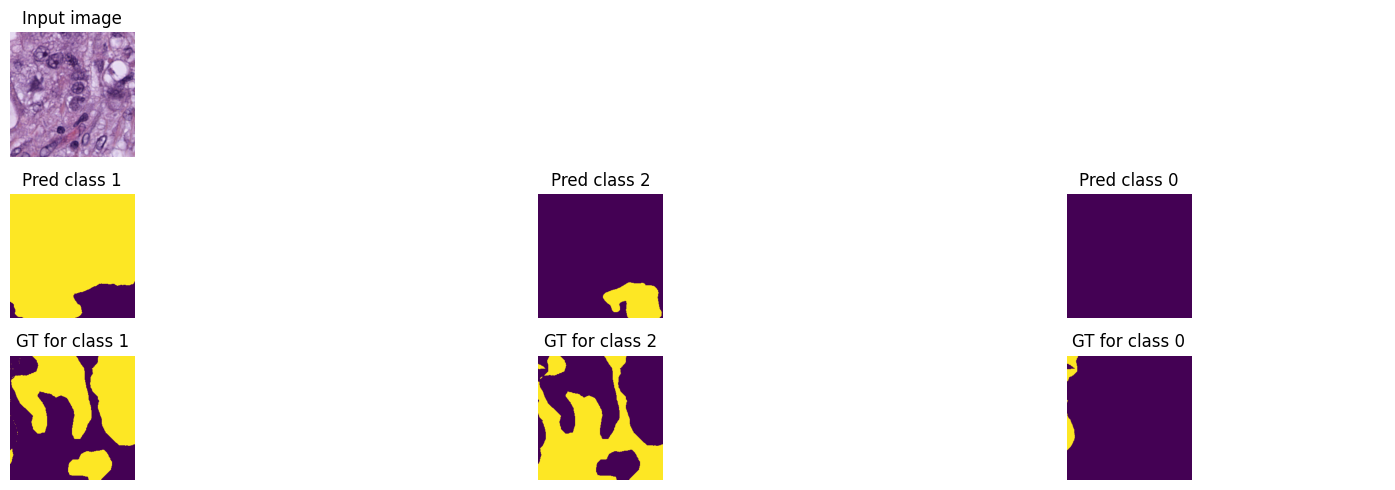

Train loss: 0.37956 | Time: 88m 47s | Val loss: 0.35087
Train_DICE_avg: 0.61465 | Train_Jaccard_avg: 0.55690 | Train_Sensitivity_avg: 0.76473 | Train_Specificity_avg: 0.81501 
Class 0 - Train_DICE: 0.59873 | Train_Jaccard: 0.55452 | Train_Sensitivity: 0.82356 | Train_Specificity: 0.83540 
Class 1 - Train_DICE: 0.71450 | Train_Jaccard: 0.66032 | Train_Sensitivity: 0.86731 | Train_Specificity: 0.77992 
Class 2 - Train_DICE: 0.53072 | Train_Jaccard: 0.45587 | Train_Sensitivity: 0.60333 | Train_Specificity: 0.82969 
Val_DICE_avg: 0.64487 | Val_Jaccard_avg: 0.59146 | Val_Sensitivity_avg: 0.80494 | Val_Specificity_avg: 0.79928 
Class 0 - Val_DICE: 0.65938 | Val_Jaccard: 0.61582 | Val_Sensitivity: 0.81709 | Val_Specificity: 0.84632 
Class 1 - Val_DICE: 0.75090 | Val_Jaccard: 0.70049 | Val_Sensitivity: 0.84263 | Val_Specificity: 0.78376 
Class 2 - Val_DICE: 0.52432 | Val_Jaccard: 0.45808 | Val_Sensitivity: 0.75510 | Val_Specificity: 0.76776 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 30/30 [00:11<00:00,  2.58it/s]


Train loss: 0.37927 | Time: 90m 59s | Val loss: 0.34901
Train_DICE_avg: 0.61502 | Train_Jaccard_avg: 0.55839 | Train_Sensitivity_avg: 0.77131 | Train_Specificity_avg: 0.81745 
Class 0 - Train_DICE: 0.59865 | Train_Jaccard: 0.55615 | Train_Sensitivity: 0.84143 | Train_Specificity: 0.83194 
Class 1 - Train_DICE: 0.72017 | Train_Jaccard: 0.66617 | Train_Sensitivity: 0.85490 | Train_Specificity: 0.79478 
Class 2 - Train_DICE: 0.52625 | Train_Jaccard: 0.45285 | Train_Sensitivity: 0.61762 | Train_Specificity: 0.82562 
Val_DICE_avg: 0.64676 | Val_Jaccard_avg: 0.59429 | Val_Sensitivity_avg: 0.81156 | Val_Specificity_avg: 0.79618 
Class 0 - Val_DICE: 0.66212 | Val_Jaccard: 0.61946 | Val_Sensitivity: 0.83083 | Val_Specificity: 0.84368 
Class 1 - Val_DICE: 0.74600 | Val_Jaccard: 0.69563 | Val_Sensitivity: 0.85427 | Val_Specificity: 0.76356 
Class 2 - Val_DICE: 0.53217 | Val_Jaccard: 0.46777 | Val_Sensitivity: 0.74957 | Val_Specificity: 0.78129 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.37296 | Time: 93m 10s | Val loss: 0.34402
Train_DICE_avg: 0.62068 | Train_Jaccard_avg: 0.56382 | Train_Sensitivity_avg: 0.77265 | Train_Specificity_avg: 0.81778 
Class 0 - Train_DICE: 0.60078 | Train_Jaccard: 0.55737 | Train_Sensitivity: 0.82870 | Train_Specificity: 0.83665 
Class 1 - Train_DICE: 0.72920 | Train_Jaccard: 0.67504 | Train_Sensitivity: 0.86497 | Train_Specificity: 0.79198 
Class 2 - Train_DICE: 0.53205 | Train_Jaccard: 0.45905 | Train_Sensitivity: 0.62428 | Train_Specificity: 0.82471 
Val_DICE_avg: 0.65269 | Val_Jaccard_avg: 0.59836 | Val_Sensitivity_avg: 0.79078 | Val_Specificity_avg: 0.79986 
Class 0 - Val_DICE: 0.66534 | Val_Jaccard: 0.62107 | Val_Sensitivity: 0.80577 | Val_Specificity: 0.85922 
Class 1 - Val_DICE: 0.74786 | Val_Jaccard: 0.69759 | Val_Sensitivity: 0.87399 | Val_Specificity: 0.74302 
Class 2 - Val_DICE: 0.54487 | Val_Jaccard: 0.47643 | Val_Sensitivity: 0.69258 | Val_Specificity: 0.79733 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]


Train loss: 0.37396 | Time: 95m 22s | Val loss: 0.34522
Train_DICE_avg: 0.62023 | Train_Jaccard_avg: 0.56265 | Train_Sensitivity_avg: 0.76265 | Train_Specificity_avg: 0.82422 
Class 0 - Train_DICE: 0.60058 | Train_Jaccard: 0.55656 | Train_Sensitivity: 0.82031 | Train_Specificity: 0.84034 
Class 1 - Train_DICE: 0.72380 | Train_Jaccard: 0.66940 | Train_Sensitivity: 0.84868 | Train_Specificity: 0.80540 
Class 2 - Train_DICE: 0.53632 | Train_Jaccard: 0.46200 | Train_Sensitivity: 0.61897 | Train_Specificity: 0.82691 
Val_DICE_avg: 0.65128 | Val_Jaccard_avg: 0.59691 | Val_Sensitivity_avg: 0.79852 | Val_Specificity_avg: 0.78955 
Class 0 - Val_DICE: 0.66025 | Val_Jaccard: 0.61500 | Val_Sensitivity: 0.78972 | Val_Specificity: 0.85500 
Class 1 - Val_DICE: 0.75327 | Val_Jaccard: 0.70250 | Val_Sensitivity: 0.87265 | Val_Specificity: 0.73036 
Class 2 - Val_DICE: 0.54031 | Val_Jaccard: 0.47324 | Val_Sensitivity: 0.73318 | Val_Specificity: 0.78330 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


Train loss: 0.37151 | Time: 97m 33s | Val loss: 0.34915
Train_DICE_avg: 0.62252 | Train_Jaccard_avg: 0.56487 | Train_Sensitivity_avg: 0.76411 | Train_Specificity_avg: 0.82359 
Class 0 - Train_DICE: 0.59978 | Train_Jaccard: 0.55401 | Train_Sensitivity: 0.79991 | Train_Specificity: 0.84316 
Class 1 - Train_DICE: 0.73082 | Train_Jaccard: 0.67722 | Train_Sensitivity: 0.85949 | Train_Specificity: 0.80340 
Class 2 - Train_DICE: 0.53697 | Train_Jaccard: 0.46337 | Train_Sensitivity: 0.63293 | Train_Specificity: 0.82420 
Val_DICE_avg: 0.64977 | Val_Jaccard_avg: 0.59686 | Val_Sensitivity_avg: 0.79191 | Val_Specificity_avg: 0.79998 
Class 0 - Val_DICE: 0.66272 | Val_Jaccard: 0.61829 | Val_Sensitivity: 0.80192 | Val_Specificity: 0.85929 
Class 1 - Val_DICE: 0.74414 | Val_Jaccard: 0.69398 | Val_Sensitivity: 0.82637 | Val_Specificity: 0.75480 
Class 2 - Val_DICE: 0.54245 | Val_Jaccard: 0.47831 | Val_Sensitivity: 0.74746 | Val_Specificity: 0.78585 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 30/30 [00:11<00:00,  2.57it/s]


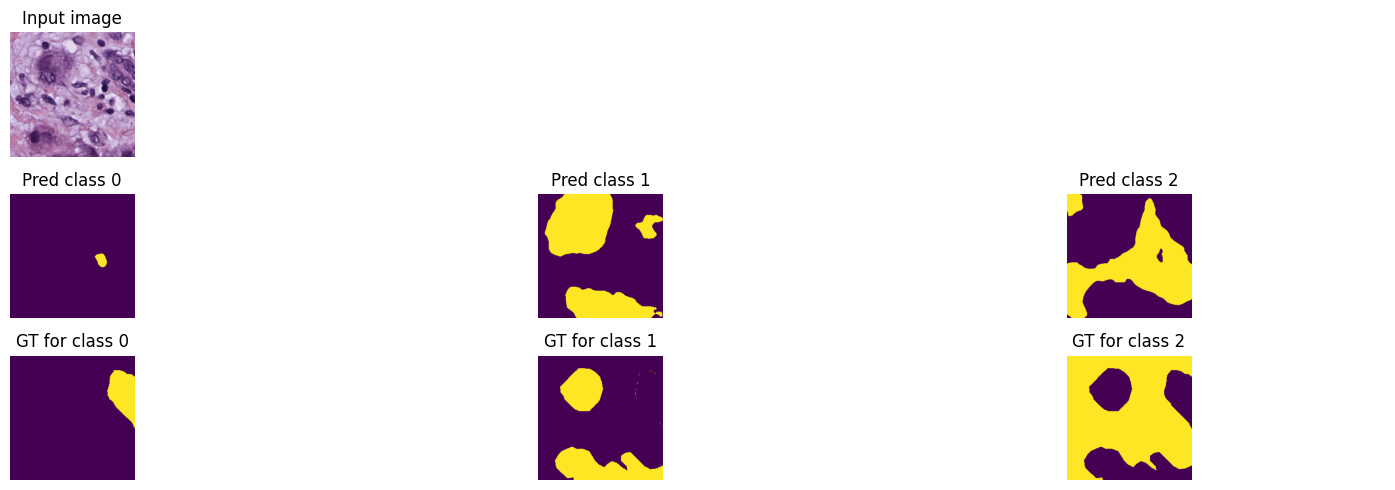

Train loss: 0.37056 | Time: 99m 45s | Val loss: 0.35045
Train_DICE_avg: 0.62275 | Train_Jaccard_avg: 0.56492 | Train_Sensitivity_avg: 0.76651 | Train_Specificity_avg: 0.82156 
Class 0 - Train_DICE: 0.60400 | Train_Jaccard: 0.55844 | Train_Sensitivity: 0.80885 | Train_Specificity: 0.84072 
Class 1 - Train_DICE: 0.72668 | Train_Jaccard: 0.67237 | Train_Sensitivity: 0.86491 | Train_Specificity: 0.79313 
Class 2 - Train_DICE: 0.53757 | Train_Jaccard: 0.46394 | Train_Sensitivity: 0.62578 | Train_Specificity: 0.83083 
Val_DICE_avg: 0.64548 | Val_Jaccard_avg: 0.59304 | Val_Sensitivity_avg: 0.80347 | Val_Specificity_avg: 0.80992 
Class 0 - Val_DICE: 0.66084 | Val_Jaccard: 0.61682 | Val_Sensitivity: 0.81350 | Val_Specificity: 0.85012 
Class 1 - Val_DICE: 0.74759 | Val_Jaccard: 0.69802 | Val_Sensitivity: 0.83860 | Val_Specificity: 0.80975 
Class 2 - Val_DICE: 0.52800 | Val_Jaccard: 0.46428 | Val_Sensitivity: 0.75829 | Val_Specificity: 0.76987 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.36745 | Time: 101m 54s | Val loss: 0.34795
Train_DICE_avg: 0.62621 | Train_Jaccard_avg: 0.56889 | Train_Sensitivity_avg: 0.77008 | Train_Specificity_avg: 0.82553 
Class 0 - Train_DICE: 0.60701 | Train_Jaccard: 0.56133 | Train_Sensitivity: 0.82127 | Train_Specificity: 0.84001 
Class 1 - Train_DICE: 0.73106 | Train_Jaccard: 0.67783 | Train_Sensitivity: 0.86075 | Train_Specificity: 0.80788 
Class 2 - Train_DICE: 0.54055 | Train_Jaccard: 0.46751 | Train_Sensitivity: 0.62821 | Train_Specificity: 0.82870 
Val_DICE_avg: 0.65006 | Val_Jaccard_avg: 0.59711 | Val_Sensitivity_avg: 0.79517 | Val_Specificity_avg: 0.81855 
Class 0 - Val_DICE: 0.65886 | Val_Jaccard: 0.61440 | Val_Sensitivity: 0.81164 | Val_Specificity: 0.84861 
Class 1 - Val_DICE: 0.74478 | Val_Jaccard: 0.69545 | Val_Sensitivity: 0.82975 | Val_Specificity: 0.82214 
Class 2 - Val_DICE: 0.54655 | Val_Jaccard: 0.48148 | Val_Sensitivity: 0.74413 | Val_Specificity: 0.78490 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 30/30 [00:11<00:00,  2.61it/s]


Train loss: 0.36540 | Time: 104m 3s | Val loss: 0.34478
Train_DICE_avg: 0.62842 | Train_Jaccard_avg: 0.57128 | Train_Sensitivity_avg: 0.77418 | Train_Specificity_avg: 0.82330 
Class 0 - Train_DICE: 0.60859 | Train_Jaccard: 0.56418 | Train_Sensitivity: 0.82618 | Train_Specificity: 0.83967 
Class 1 - Train_DICE: 0.73364 | Train_Jaccard: 0.68068 | Train_Sensitivity: 0.86345 | Train_Specificity: 0.80519 
Class 2 - Train_DICE: 0.54303 | Train_Jaccard: 0.46898 | Train_Sensitivity: 0.63290 | Train_Specificity: 0.82504 
Val_DICE_avg: 0.64967 | Val_Jaccard_avg: 0.59582 | Val_Sensitivity_avg: 0.80755 | Val_Specificity_avg: 0.78939 
Class 0 - Val_DICE: 0.66526 | Val_Jaccard: 0.62103 | Val_Sensitivity: 0.81793 | Val_Specificity: 0.84896 
Class 1 - Val_DICE: 0.75114 | Val_Jaccard: 0.70086 | Val_Sensitivity: 0.87334 | Val_Specificity: 0.74375 
Class 2 - Val_DICE: 0.53261 | Val_Jaccard: 0.46557 | Val_Sensitivity: 0.73138 | Val_Specificity: 0.77546 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.36332 | Time: 106m 12s | Val loss: 0.33827
Train_DICE_avg: 0.63034 | Train_Jaccard_avg: 0.57308 | Train_Sensitivity_avg: 0.77520 | Train_Specificity_avg: 0.82273 
Class 0 - Train_DICE: 0.61193 | Train_Jaccard: 0.56632 | Train_Sensitivity: 0.81756 | Train_Specificity: 0.84277 
Class 1 - Train_DICE: 0.73489 | Train_Jaccard: 0.68215 | Train_Sensitivity: 0.87107 | Train_Specificity: 0.79894 
Class 2 - Train_DICE: 0.54421 | Train_Jaccard: 0.47078 | Train_Sensitivity: 0.63695 | Train_Specificity: 0.82650 
Val_DICE_avg: 0.65703 | Val_Jaccard_avg: 0.60364 | Val_Sensitivity_avg: 0.80624 | Val_Specificity_avg: 0.79470 
Class 0 - Val_DICE: 0.66996 | Val_Jaccard: 0.62598 | Val_Sensitivity: 0.83159 | Val_Specificity: 0.84623 
Class 1 - Val_DICE: 0.75688 | Val_Jaccard: 0.70670 | Val_Sensitivity: 0.85980 | Val_Specificity: 0.75456 
Class 2 - Val_DICE: 0.54424 | Val_Jaccard: 0.47823 | Val_Sensitivity: 0.72732 | Val_Specificity: 0.78332 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.36539 | Time: 108m 21s | Val loss: 0.34558
Train_DICE_avg: 0.62815 | Train_Jaccard_avg: 0.57120 | Train_Sensitivity_avg: 0.77894 | Train_Specificity_avg: 0.82000 
Class 0 - Train_DICE: 0.60920 | Train_Jaccard: 0.56495 | Train_Sensitivity: 0.83303 | Train_Specificity: 0.83627 
Class 1 - Train_DICE: 0.73416 | Train_Jaccard: 0.68042 | Train_Sensitivity: 0.86017 | Train_Specificity: 0.80043 
Class 2 - Train_DICE: 0.54110 | Train_Jaccard: 0.46824 | Train_Sensitivity: 0.64363 | Train_Specificity: 0.82330 
Val_DICE_avg: 0.65042 | Val_Jaccard_avg: 0.59859 | Val_Sensitivity_avg: 0.81544 | Val_Specificity_avg: 0.80369 
Class 0 - Val_DICE: 0.65238 | Val_Jaccard: 0.61015 | Val_Sensitivity: 0.84904 | Val_Specificity: 0.83447 
Class 1 - Val_DICE: 0.75090 | Val_Jaccard: 0.70165 | Val_Sensitivity: 0.84095 | Val_Specificity: 0.78812 
Class 2 - Val_DICE: 0.54798 | Val_Jaccard: 0.48398 | Val_Sensitivity: 0.75631 | Val_Specificity: 0.78846 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


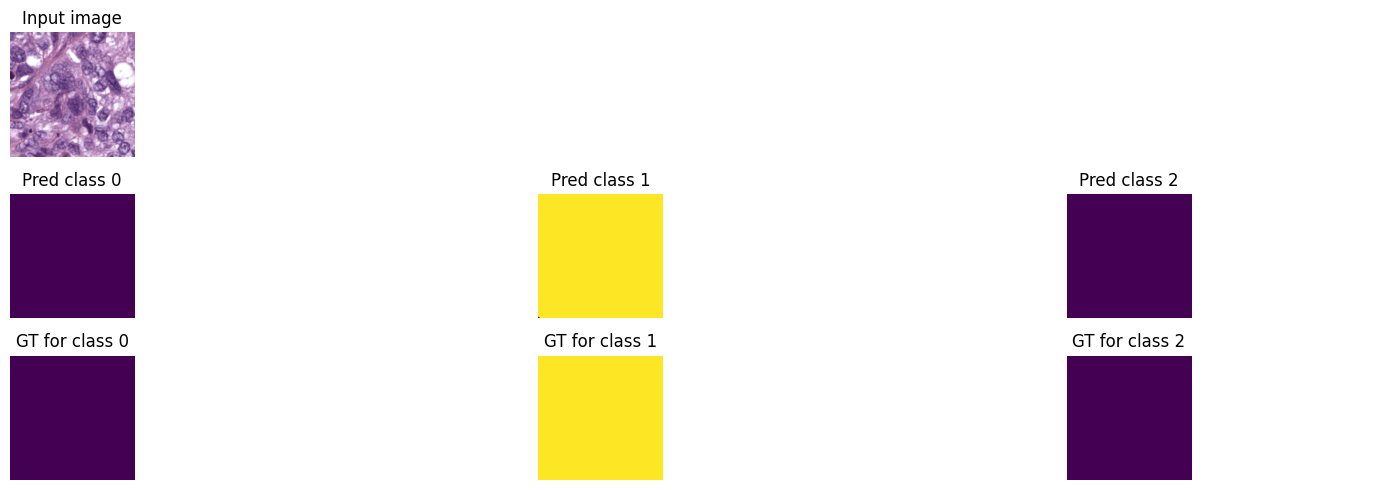

Train loss: 0.36098 | Time: 110m 31s | Val loss: 0.34188
Train_DICE_avg: 0.63199 | Train_Jaccard_avg: 0.57430 | Train_Sensitivity_avg: 0.77847 | Train_Specificity_avg: 0.82047 
Class 0 - Train_DICE: 0.61336 | Train_Jaccard: 0.56793 | Train_Sensitivity: 0.82180 | Train_Specificity: 0.84227 
Class 1 - Train_DICE: 0.73481 | Train_Jaccard: 0.68113 | Train_Sensitivity: 0.87970 | Train_Specificity: 0.78846 
Class 2 - Train_DICE: 0.54779 | Train_Jaccard: 0.47384 | Train_Sensitivity: 0.63390 | Train_Specificity: 0.83069 
Val_DICE_avg: 0.65579 | Val_Jaccard_avg: 0.60246 | Val_Sensitivity_avg: 0.80214 | Val_Specificity_avg: 0.80783 
Class 0 - Val_DICE: 0.66225 | Val_Jaccard: 0.61828 | Val_Sensitivity: 0.81154 | Val_Specificity: 0.85099 
Class 1 - Val_DICE: 0.75404 | Val_Jaccard: 0.70499 | Val_Sensitivity: 0.87234 | Val_Specificity: 0.77982 
Class 2 - Val_DICE: 0.55107 | Val_Jaccard: 0.48410 | Val_Sensitivity: 0.72253 | Val_Specificity: 0.79269 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.36025 | Time: 112m 40s | Val loss: 0.34186
Train_DICE_avg: 0.63365 | Train_Jaccard_avg: 0.57675 | Train_Sensitivity_avg: 0.78022 | Train_Specificity_avg: 0.82744 
Class 0 - Train_DICE: 0.61696 | Train_Jaccard: 0.57265 | Train_Sensitivity: 0.83779 | Train_Specificity: 0.84072 
Class 1 - Train_DICE: 0.73627 | Train_Jaccard: 0.68356 | Train_Sensitivity: 0.86327 | Train_Specificity: 0.81319 
Class 2 - Train_DICE: 0.54771 | Train_Jaccard: 0.47405 | Train_Sensitivity: 0.63962 | Train_Specificity: 0.82841 
Val_DICE_avg: 0.65458 | Val_Jaccard_avg: 0.60161 | Val_Sensitivity_avg: 0.80835 | Val_Specificity_avg: 0.80310 
Class 0 - Val_DICE: 0.66465 | Val_Jaccard: 0.62139 | Val_Sensitivity: 0.84248 | Val_Specificity: 0.84418 
Class 1 - Val_DICE: 0.75347 | Val_Jaccard: 0.70386 | Val_Sensitivity: 0.86397 | Val_Specificity: 0.76975 
Class 2 - Val_DICE: 0.54563 | Val_Jaccard: 0.47958 | Val_Sensitivity: 0.71860 | Val_Specificity: 0.79538 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.35846 | Time: 114m 49s | Val loss: 0.33899
Train_DICE_avg: 0.63551 | Train_Jaccard_avg: 0.57868 | Train_Sensitivity_avg: 0.78093 | Train_Specificity_avg: 0.82710 
Class 0 - Train_DICE: 0.61874 | Train_Jaccard: 0.57442 | Train_Sensitivity: 0.83666 | Train_Specificity: 0.84063 
Class 1 - Train_DICE: 0.73632 | Train_Jaccard: 0.68355 | Train_Sensitivity: 0.87522 | Train_Specificity: 0.80103 
Class 2 - Train_DICE: 0.55147 | Train_Jaccard: 0.47807 | Train_Sensitivity: 0.63090 | Train_Specificity: 0.83963 
Val_DICE_avg: 0.65736 | Val_Jaccard_avg: 0.60406 | Val_Sensitivity_avg: 0.79792 | Val_Specificity_avg: 0.81015 
Class 0 - Val_DICE: 0.66910 | Val_Jaccard: 0.62606 | Val_Sensitivity: 0.82864 | Val_Specificity: 0.85052 
Class 1 - Val_DICE: 0.75158 | Val_Jaccard: 0.70252 | Val_Sensitivity: 0.86057 | Val_Specificity: 0.78183 
Class 2 - Val_DICE: 0.55141 | Val_Jaccard: 0.48359 | Val_Sensitivity: 0.70456 | Val_Specificity: 0.79811 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.35907 | Time: 116m 58s | Val loss: 0.33726
Train_DICE_avg: 0.63541 | Train_Jaccard_avg: 0.57914 | Train_Sensitivity_avg: 0.78529 | Train_Specificity_avg: 0.82663 
Class 0 - Train_DICE: 0.61654 | Train_Jaccard: 0.57367 | Train_Sensitivity: 0.85047 | Train_Specificity: 0.83746 
Class 1 - Train_DICE: 0.74169 | Train_Jaccard: 0.68890 | Train_Sensitivity: 0.85132 | Train_Specificity: 0.82098 
Class 2 - Train_DICE: 0.54799 | Train_Jaccard: 0.47484 | Train_Sensitivity: 0.65407 | Train_Specificity: 0.82146 
Val_DICE_avg: 0.65926 | Val_Jaccard_avg: 0.60636 | Val_Sensitivity_avg: 0.80864 | Val_Specificity_avg: 0.80729 
Class 0 - Val_DICE: 0.67040 | Val_Jaccard: 0.62689 | Val_Sensitivity: 0.81905 | Val_Specificity: 0.85480 
Class 1 - Val_DICE: 0.75711 | Val_Jaccard: 0.70784 | Val_Sensitivity: 0.86912 | Val_Specificity: 0.77444 
Class 2 - Val_DICE: 0.55027 | Val_Jaccard: 0.48436 | Val_Sensitivity: 0.73777 | Val_Specificity: 0.79264 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.35229 | Time: 119m 7s | Val loss: 0.34151
Train_DICE_avg: 0.64134 | Train_Jaccard_avg: 0.58391 | Train_Sensitivity_avg: 0.78065 | Train_Specificity_avg: 0.82871 
Class 0 - Train_DICE: 0.62757 | Train_Jaccard: 0.58210 | Train_Sensitivity: 0.83750 | Train_Specificity: 0.84447 
Class 1 - Train_DICE: 0.74547 | Train_Jaccard: 0.69213 | Train_Sensitivity: 0.86733 | Train_Specificity: 0.80637 
Class 2 - Train_DICE: 0.55098 | Train_Jaccard: 0.47749 | Train_Sensitivity: 0.63711 | Train_Specificity: 0.83529 
Val_DICE_avg: 0.65525 | Val_Jaccard_avg: 0.60192 | Val_Sensitivity_avg: 0.80035 | Val_Specificity_avg: 0.80824 
Class 0 - Val_DICE: 0.66732 | Val_Jaccard: 0.62394 | Val_Sensitivity: 0.83957 | Val_Specificity: 0.84533 
Class 1 - Val_DICE: 0.74814 | Val_Jaccard: 0.69858 | Val_Sensitivity: 0.84391 | Val_Specificity: 0.78847 
Class 2 - Val_DICE: 0.55028 | Val_Jaccard: 0.48323 | Val_Sensitivity: 0.71758 | Val_Specificity: 0.79093 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


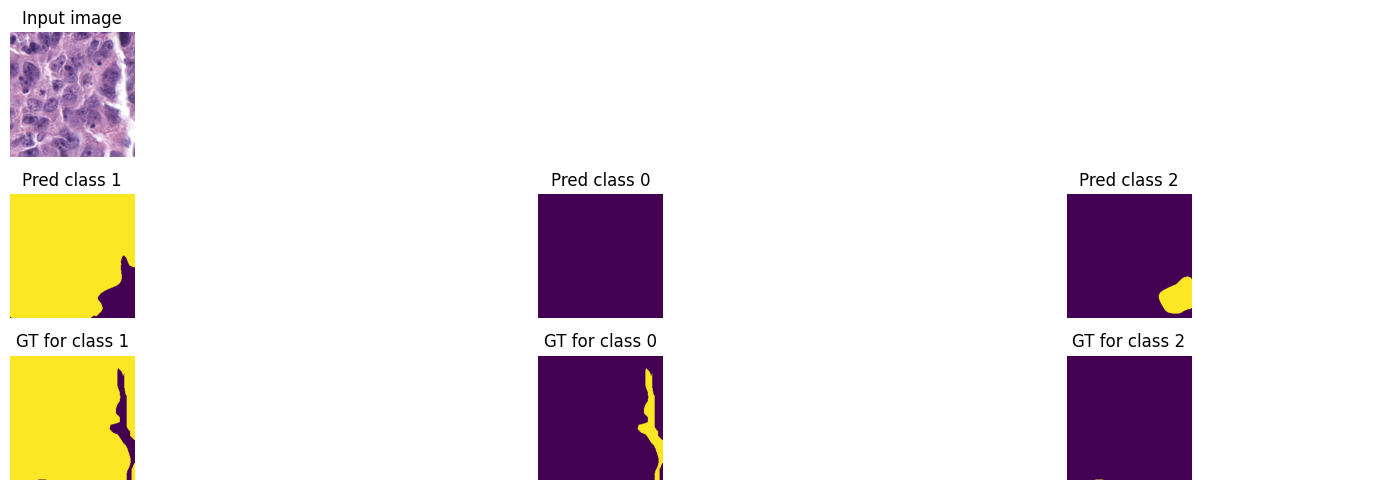

Train loss: 0.35103 | Time: 121m 17s | Val loss: 0.33911
Train_DICE_avg: 0.64276 | Train_Jaccard_avg: 0.58537 | Train_Sensitivity_avg: 0.77920 | Train_Specificity_avg: 0.83107 
Class 0 - Train_DICE: 0.62965 | Train_Jaccard: 0.58369 | Train_Sensitivity: 0.82703 | Train_Specificity: 0.84816 
Class 1 - Train_DICE: 0.74379 | Train_Jaccard: 0.69109 | Train_Sensitivity: 0.87432 | Train_Specificity: 0.80922 
Class 2 - Train_DICE: 0.55483 | Train_Jaccard: 0.48134 | Train_Sensitivity: 0.63626 | Train_Specificity: 0.83583 
Val_DICE_avg: 0.65886 | Val_Jaccard_avg: 0.60408 | Val_Sensitivity_avg: 0.79239 | Val_Specificity_avg: 0.81260 
Class 0 - Val_DICE: 0.66776 | Val_Jaccard: 0.62109 | Val_Sensitivity: 0.79452 | Val_Specificity: 0.85553 
Class 1 - Val_DICE: 0.75450 | Val_Jaccard: 0.70517 | Val_Sensitivity: 0.87099 | Val_Specificity: 0.78667 
Class 2 - Val_DICE: 0.55433 | Val_Jaccard: 0.48599 | Val_Sensitivity: 0.71165 | Val_Specificity: 0.79561 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.35051 | Time: 123m 26s | Val loss: 0.33783
Train_DICE_avg: 0.64376 | Train_Jaccard_avg: 0.58656 | Train_Sensitivity_avg: 0.77881 | Train_Specificity_avg: 0.83379 
Class 0 - Train_DICE: 0.62781 | Train_Jaccard: 0.58231 | Train_Sensitivity: 0.82988 | Train_Specificity: 0.84743 
Class 1 - Train_DICE: 0.74654 | Train_Jaccard: 0.69432 | Train_Sensitivity: 0.87042 | Train_Specificity: 0.81731 
Class 2 - Train_DICE: 0.55694 | Train_Jaccard: 0.48306 | Train_Sensitivity: 0.63613 | Train_Specificity: 0.83662 
Val_DICE_avg: 0.65955 | Val_Jaccard_avg: 0.60545 | Val_Sensitivity_avg: 0.79805 | Val_Specificity_avg: 0.80547 
Class 0 - Val_DICE: 0.66751 | Val_Jaccard: 0.62243 | Val_Sensitivity: 0.80216 | Val_Specificity: 0.86420 
Class 1 - Val_DICE: 0.75954 | Val_Jaccard: 0.71008 | Val_Sensitivity: 0.87413 | Val_Specificity: 0.75613 
Class 2 - Val_DICE: 0.55160 | Val_Jaccard: 0.48385 | Val_Sensitivity: 0.71786 | Val_Specificity: 0.79607 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 30/30 [00:11<00:00,  2.64it/s]


Train loss: 0.35181 | Time: 125m 35s | Val loss: 0.34174
Train_DICE_avg: 0.64262 | Train_Jaccard_avg: 0.58511 | Train_Sensitivity_avg: 0.77895 | Train_Specificity_avg: 0.82862 
Class 0 - Train_DICE: 0.63100 | Train_Jaccard: 0.58502 | Train_Sensitivity: 0.82786 | Train_Specificity: 0.84609 
Class 1 - Train_DICE: 0.74349 | Train_Jaccard: 0.69099 | Train_Sensitivity: 0.87858 | Train_Specificity: 0.80356 
Class 2 - Train_DICE: 0.55335 | Train_Jaccard: 0.47933 | Train_Sensitivity: 0.63042 | Train_Specificity: 0.83620 
Val_DICE_avg: 0.65442 | Val_Jaccard_avg: 0.60099 | Val_Sensitivity_avg: 0.80277 | Val_Specificity_avg: 0.80576 
Class 0 - Val_DICE: 0.66882 | Val_Jaccard: 0.62368 | Val_Sensitivity: 0.81462 | Val_Specificity: 0.85184 
Class 1 - Val_DICE: 0.75385 | Val_Jaccard: 0.70447 | Val_Sensitivity: 0.84911 | Val_Specificity: 0.78330 
Class 2 - Val_DICE: 0.54059 | Val_Jaccard: 0.47481 | Val_Sensitivity: 0.74458 | Val_Specificity: 0.78216 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Train loss: 0.35006 | Time: 127m 44s | Val loss: 0.33990
Train_DICE_avg: 0.64321 | Train_Jaccard_avg: 0.58617 | Train_Sensitivity_avg: 0.78564 | Train_Specificity_avg: 0.82915 
Class 0 - Train_DICE: 0.62748 | Train_Jaccard: 0.58204 | Train_Sensitivity: 0.83697 | Train_Specificity: 0.84294 
Class 1 - Train_DICE: 0.74707 | Train_Jaccard: 0.69459 | Train_Sensitivity: 0.86876 | Train_Specificity: 0.81266 
Class 2 - Train_DICE: 0.55508 | Train_Jaccard: 0.48187 | Train_Sensitivity: 0.65120 | Train_Specificity: 0.83183 
Val_DICE_avg: 0.65758 | Val_Jaccard_avg: 0.60403 | Val_Sensitivity_avg: 0.80665 | Val_Specificity_avg: 0.79706 
Class 0 - Val_DICE: 0.66791 | Val_Jaccard: 0.62236 | Val_Sensitivity: 0.80820 | Val_Specificity: 0.85379 
Class 1 - Val_DICE: 0.75843 | Val_Jaccard: 0.70885 | Val_Sensitivity: 0.86054 | Val_Specificity: 0.74968 
Class 2 - Val_DICE: 0.54640 | Val_Jaccard: 0.48089 | Val_Sensitivity: 0.75121 | Val_Specificity: 0.78770 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


Train loss: 0.34956 | Time: 129m 53s | Val loss: 0.33861
Train_DICE_avg: 0.64448 | Train_Jaccard_avg: 0.58730 | Train_Sensitivity_avg: 0.78667 | Train_Specificity_avg: 0.82725 
Class 0 - Train_DICE: 0.63165 | Train_Jaccard: 0.58635 | Train_Sensitivity: 0.84250 | Train_Specificity: 0.84297 
Class 1 - Train_DICE: 0.74437 | Train_Jaccard: 0.69169 | Train_Sensitivity: 0.87852 | Train_Specificity: 0.80243 
Class 2 - Train_DICE: 0.55741 | Train_Jaccard: 0.48386 | Train_Sensitivity: 0.63898 | Train_Specificity: 0.83637 
Val_DICE_avg: 0.65477 | Val_Jaccard_avg: 0.60040 | Val_Sensitivity_avg: 0.80321 | Val_Specificity_avg: 0.79641 
Class 0 - Val_DICE: 0.66313 | Val_Jaccard: 0.61788 | Val_Sensitivity: 0.82827 | Val_Specificity: 0.84503 
Class 1 - Val_DICE: 0.75551 | Val_Jaccard: 0.70550 | Val_Sensitivity: 0.87320 | Val_Specificity: 0.75042 
Class 2 - Val_DICE: 0.54568 | Val_Jaccard: 0.47782 | Val_Sensitivity: 0.70816 | Val_Specificity: 0.79377 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]


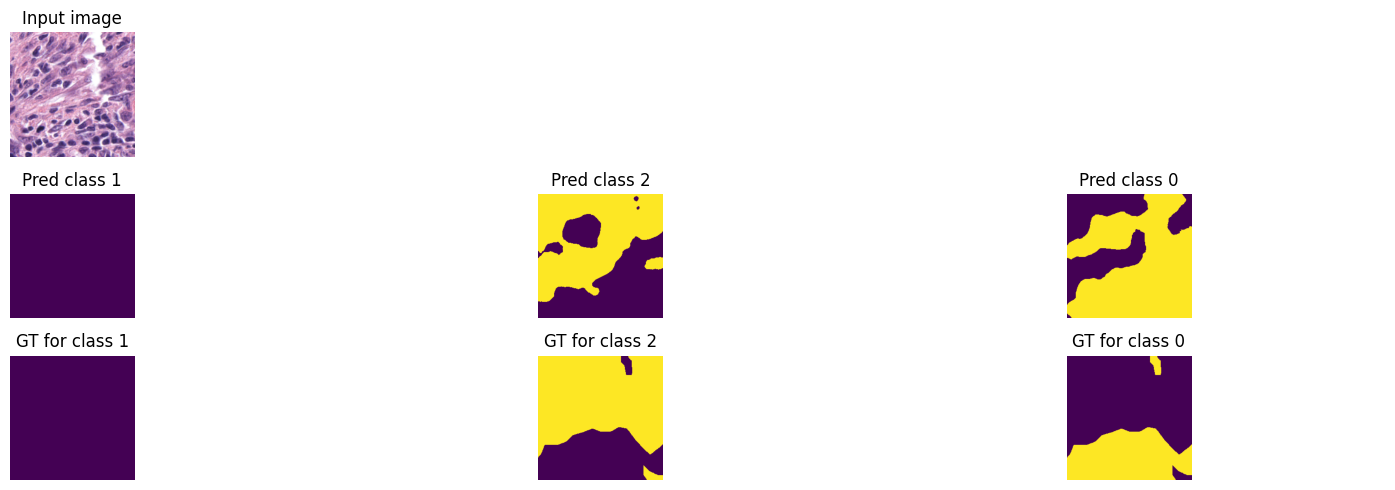

Train loss: 0.34786 | Time: 132m 3s | Val loss: 0.33827
Train_DICE_avg: 0.64543 | Train_Jaccard_avg: 0.58815 | Train_Sensitivity_avg: 0.78789 | Train_Specificity_avg: 0.82607 
Class 0 - Train_DICE: 0.63324 | Train_Jaccard: 0.58722 | Train_Sensitivity: 0.83418 | Train_Specificity: 0.84433 
Class 1 - Train_DICE: 0.74583 | Train_Jaccard: 0.69362 | Train_Sensitivity: 0.88149 | Train_Specificity: 0.80192 
Class 2 - Train_DICE: 0.55720 | Train_Jaccard: 0.48360 | Train_Sensitivity: 0.64799 | Train_Specificity: 0.83195 
Val_DICE_avg: 0.65777 | Val_Jaccard_avg: 0.60381 | Val_Sensitivity_avg: 0.80405 | Val_Specificity_avg: 0.79768 
Class 0 - Val_DICE: 0.66723 | Val_Jaccard: 0.62194 | Val_Sensitivity: 0.81476 | Val_Specificity: 0.85303 
Class 1 - Val_DICE: 0.75438 | Val_Jaccard: 0.70467 | Val_Sensitivity: 0.87350 | Val_Specificity: 0.74372 
Class 2 - Val_DICE: 0.55170 | Val_Jaccard: 0.48483 | Val_Sensitivity: 0.72390 | Val_Specificity: 0.79630 



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = UNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 30/30 [00:11<00:00,  2.63it/s]


Global Performance Metrics:
Loss mean: 0.33459, std: 0.06830
Dice Coefficient mean: 0.66453, std: 0.23450
Jaccard Index mean: 0.60906, std: 0.25066
Sensitivity mean: 0.73892, std: 0.20986
Specificity mean: 0.84382, std: 0.12508

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.66914, std: 0.39693
Jaccard mean: 0.62235, std: 0.40438
Sensitivity mean: 0.75974, std: 0.36669
Specificity mean: 0.85562, std: 0.26430

Class 1:
Dice mean: 0.76329, std: 0.34186
Jaccard mean: 0.71385, std: 0.35137
Sensitivity mean: 0.81255, std: 0.32081
Specificity mean: 0.83370, std: 0.30011

Class 2:
Dice mean: 0.56117, std: 0.38546
Jaccard mean: 0.49098, std: 0.38113
Sensitivity mean: 0.64449, std: 0.37629
Specificity mean: 0.84214, std: 0.24314
